In [ ]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Load uploaded CSV
data = pd.read_csv(io.BytesIO(uploaded['raw_data.csv']))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# Drop rows where price is missing (target variable)
data = data.dropna(subset=['price'])

# Fill missing numerical values
data['BHK'] = data['BHK'].fillna(data['BHK'].median())
data['total_sqft'] = data['total_sqft'].fillna(data['total_sqft'].median())
data['per_month_emi'] = data['per_month_emi'].fillna(data['per_month_emi'].median())

# Select features and target
categorical_cols = ['address', 'owners', 'housetype', 'house_condition']
numerical_cols = ['BHK', 'total_sqft', 'latitude', 'longitude', 'per_month_emi']

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

# Prepare features and target
X = data[categorical_cols + numerical_cols]
y = data['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Ready for model training
print("✅ Data upload and preprocessing complete. Ready for modeling.")


Missing Values in Each Column:
seller_type        0
bedroom            0
layout_type        0
property_type      0
locality           0
price              0
area               0
furnish_type       0
bathroom         171
dtype: int64

Number of Duplicate Rows: 8247

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB
None

Dataset Preview:
  seller_type  bedroom layout_type      property_type  loca

In [ ]:
# Train Support Vector Regression Model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Support Vector Regression Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Support Vector Regression Model Evaluation:
R²: -0.06036225352275926
Mean Absolute Error: 7629.630020433971
Mean Squared Error: 156038611.95936117
Root Mean Squared Error: 12491.54161660446


Linear Regression Model Evaluation:
R²: 0.4712477596166804
Mean Absolute Error: 5039.508064724084
Mean Squared Error: 77809036.85105082
Root Mean Squared Error: 8820.94308172606


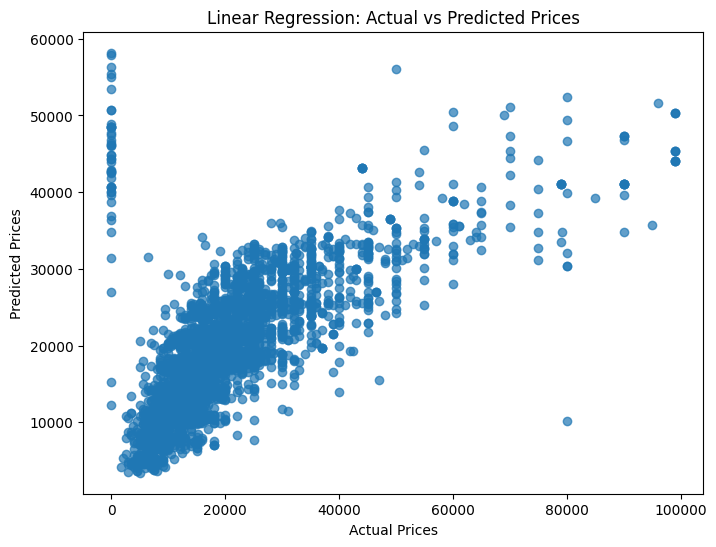

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


Random Forest Model Evaluation:
R²: 0.7717510702195549
Mean Absolute Error: 2764.2768292552014
Mean Squared Error: 33588187.495195396
Root Mean Squared Error: 5795.531683564105


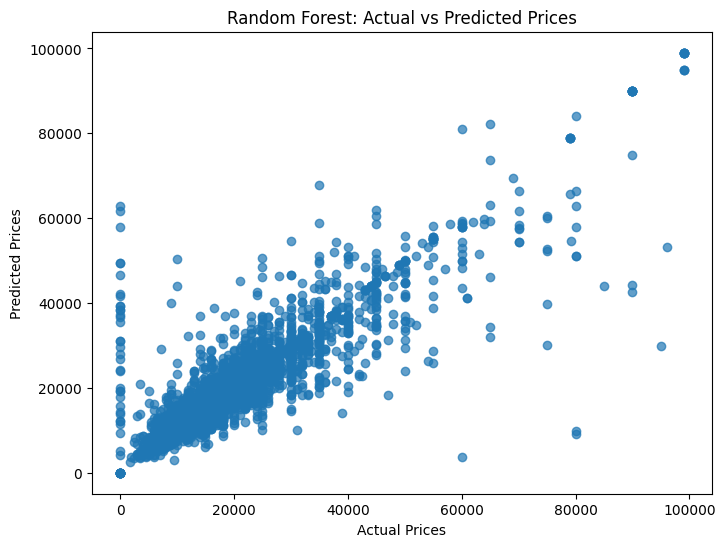

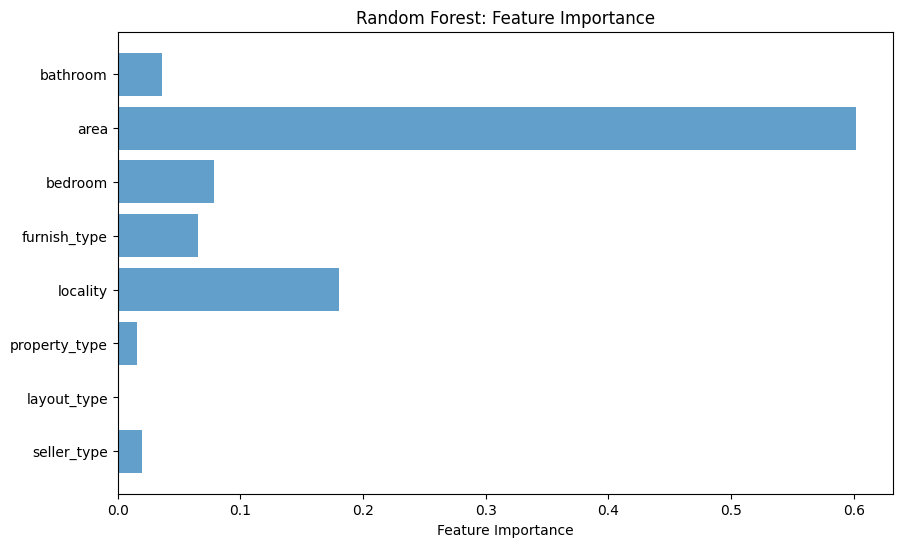

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('Random Forest: Feature Importance')
plt.show()


XGBoost Model Evaluation:
R²: 0.7628099273633878
Mean Absolute Error: 3032.7963408452083
Mean Squared Error: 34903929.842654124
Root Mean Squared Error: 5907.954793552006


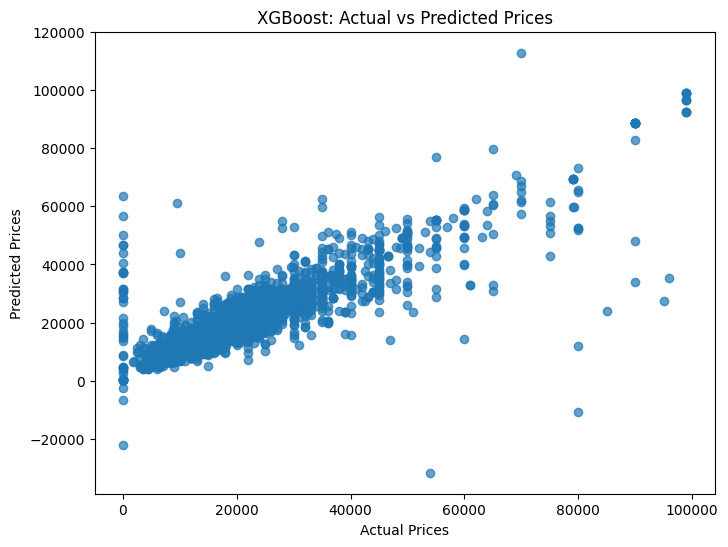

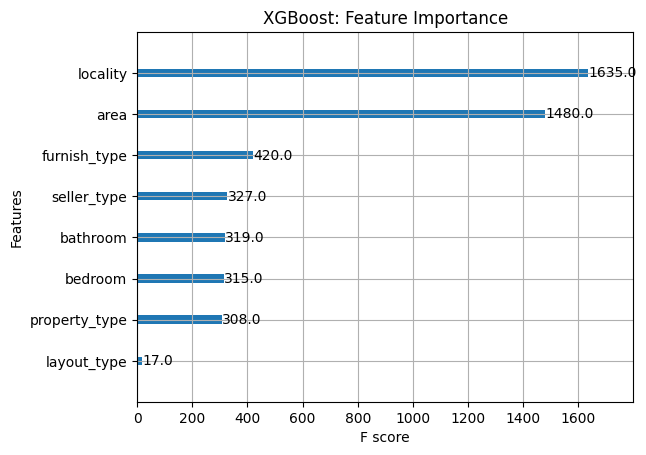

In [ ]:
import xgboost as xgb

# Train XGBoost Model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
xgb.plot_importance(model, importance_type='weight')
plt.title('XGBoost: Feature Importance')
plt.show()


In [ ]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
pip install numpy==1.21.6


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [ ]:
!pip install numpy==1.21.6


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

## Nashik Housing Dataset
This section analyzes housing data from Nashik.

In [ ]:
# Train Support Vector Regression Model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Support Vector Regression Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)  # R-squared

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"R²: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('Random Forest: Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import io

csv_data = """,address,owners,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,"Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Mahendra Kotwal,Apartment,old,3.0,75.0,39.72,1550.0,Sheetal Vihar,19.987960000000047,73.78739000000007
1,"Samraat Dream Citi, Samta Nagar, Nashik",Jiten Dadarkar,Apartment,old,2.0,41.0,21.71,1000.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2,"Suryaprakash Apartment,Nashik Road, Nashik",Pankaj,Apartment,old,2.0,53.35,28.25,970.0,Surya Prakash,19.975850000000037,73.78875000000005
3,"Adishvar Residency,Nashik Road, Nashik",Saurav,Apartment,old,2.0,55.0,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4,"Nashik Road, Nashik",Vivek Pavanaskar,Apartment,old,2.0,27.0,14.3,853.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5,"Gurucharani,Nashik Road, Nashik",Darshan Muley,Apartment,old,2.0,42.0,22.24,1050.0,Gurucharni,20.001320000000078,73.75503000000003
6,"CDO-MERI Colony, Nashik",Prashant,Apartment,old,2.0,35.5,18.8,1035.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
7,"Ram Sneh Apartment,Nashik Road, Nashik",Sweety Surana,Apartment,old,3.0,48.0,25.42,1375.0,Ram Sneha,19.95835000000005,73.82500000000005
8,"gajanan pushp aptshiram nagar,Nashik Road, Nashik",Shriram Kulkarni,Apartment,old,2.0,32.0,16.95,850.0,"Ram Nagar, Sane Guruji Nagar, Nashik, Maharashtra",19.95708000000008,73.83467000000007
9,"B2 LAXMI RESIDENCY ,Nashik Road, Nashik",GAURAV Chaturvedi,Apartment,old,2.0,32.0,16.95,1020.0,Laxmi Residency,20.016760000000037,73.79352000000007
10,"krishnabaug apartment,Nashik Road, Nashik",Suvarna,Apartment,old,2.0,28.0,14.83,810.0,Krishna Baug,19.94790000000006,73.83178000000005
11,"krishnabaug apartment,Nashik Road, Nashik",Suvarna,Apartment,old,2.0,28.0,14.83,810.0,Krishna Baug,19.94790000000006,73.83178000000005
12,"Nashik Road, Nashik",Swati Rajeshwari,Apartment,old,3.0,48.0,25.42,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
13,"Nashik Road, Nashik",Priti Kadam,Apartment,old,2.0,35.0,18.53,1900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
14,"Nashik Road, Nashik",SHIVAJI BHABAD,Apartment,old,2.0,25.0,13.24,840.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
15,"Shanti Prasad Cooperative Society, Nashik Road, Nashik",Pitambar C,Apartment,old,2.0,34.0,18.0,1100.0,Adarsh Credit Co-Operative Society-Nashik Road,19.952980000000025,73.83799000000005
16,"Town Squire City Apartment,Nashik Road, Nashik",Yas Tatiya,Apartment,old,1.0,25.0,13.24,713.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
17,"Panchawati, Hirawadi,Nashik",Komal Abhichandani,Apartment,old,2.0,40.0,21.18,950.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
18,"Anand Nagar, Nashik Road,Nashik",Mahesh,Apartment,old,2.0,40.0,21.18,990.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
19,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Laxman Kokane,Apartment,old,1.0,25.0,13.24,560.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
20,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Prashant Deodhar,Apartment,old,2.0,42.0,22.24,1050.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
21,"Deepak Panchdeep Renukamata Housing Society by Deepak Constructions, Gandhi Nagar Airport Area, Deolali Gaon,Nashik",D B CHAVAN,Apartment,old,1.0,23.04,12.2,720.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
22,"Sai Samarth Sankul, Nashik Road, Nashik",Mohsin Kadri,Apartment,old,2.0,40.0,21.18,845.0,Sai Samarth Sankul,19.977450000000037,73.80683000000005
23,"Jagtap Nagar, Nashik",Amol Pandey,Apartment,old,2.0,36.5,19.33,853.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
24,"Khutwad Nagar, Nashik",Vinod Chhabu Shinde,Apartment,old,2.0,38.0,20.12,900.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
25,"Gandharv Nagari, Nashik Road, Nashik",Swati,Apartment,old,3.0,55.0,29.13,1250.0,"Gandharva Nagri, Sane Guruji Nagar, Nashik, Maharashtra",19.964350000000024,73.83253000000008
26,"Chandravilas Housing Society Ingale Nagar Jail Road Nashik Road,Nashik Road, Nashik",Pradip Asarkar,Apartment,old,1.0,30.0,15.89,850.0,"Jail Road, Nashik Road, Nashik, Maharashtra, 422101",19.962212498975077,73.83917011965028
27,"Nashik Road, Nashik",Pradip Asarkar,Apartment,old,1.0,30.0,15.89,850.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
28,"Ayodhya Nagari, Nashik",Ravindra Arote,Apartment,old,2.0,36.0,19.06,850.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
29,"Nashik Road, Nashik",Mansi Sanap,Apartment,old,2.0,31.0,16.42,1395.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
30,"vitthal park apartment,Nashik Road, Nashik",Amol,Apartment,old,2.0,35.0,18.53,1100.0,Vitthal Park,19.974360000000047,73.83170000000007
31,"Time Residency,Shivaji Nagar, Nashik",Pratiksha Datta,Apartment,old,2.0,38.0,20.12,1000.0,Time Residency,19.97936000000004,73.81284000000005
32,"Rudraksh Apartment,Abhang Nagar, Om Nagar,Nashik",Rameshwar Magar,Apartment,old,1.0,17.95,9.51,610.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
33,"Dattanagar, Dattanagar,Nashik",Sugandrajesh,Apartment,old,2.0,32.0,16.95,741.0,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
34,"Shri Ram Nagar, Nashik",Ashok Kadam,Apartment,old,2.0,35.0,18.53,1100.0,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
35,"Prabhat Colony, Nashik",Ash,Apartment,old,1.0,20.0,10.59,610.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
36,"Neelkanth River View, Koknipura, Nashik",Harsh,Apartment,old,2.0,30.0,15.89,835.0,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
37,"Asher Enclave,Nashik Road, Nashik",Samrat Paul,Apartment,old,2.0,32.0,16.95,1035.0,Asher Enclave,19.969110000000054,73.81989000000004
38,"Nashik Road, Nashik",PRANTIK ROY,Apartment,old,3.0,55.0,29.13,1600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
39,"Mane complex,Nashik Road, Nashik",Jagdish Shankar Sonawane,Apartment,old,2.0,35.0,18.53,984.0,Mane Complex,19.961590000000054,73.82859000000008
40,"Matoshri Nagar, Nashik Road,Nashik",S K PAUL,Apartment,old,2.0,32.0,16.95,1035.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
41,"Mane complex,Nashik Road, Nashik",Ganesh Anna Badgujar,Apartment,old,2.0,29.25,15.49,750.0,Mane Complex,19.961590000000054,73.82859000000008
42,"sukhsagar appament,Pintoo Colony, Nashik Road,Nashik",Dipankar Sarkar,Apartment,old,2.0,30.0,15.89,900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
43,"Nashik Road, Nashik",Prabhakar Vadnere,Apartment,old,2.0,28.0,14.83,775.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
44,"Nashik Road, Nashik",Naveen Relan,Apartment,old,3.0,50.0,26.48,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
45,"Pawar Wadi, Nashik",Kunal,Apartment,old,2.0,25.0,13.24,750.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
46,"Nashik Road, Nashik",Saheli Paul,Apartment,old,2.0,30.0,15.89,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
47,"Shree Chintamani Palace,Ayodhya Nagar, Nashik Road,Nashik",Videndu,Apartment,old,3.0,50.0,26.48,1500.0,Shree Chintamani Palace,19.96175000000005,73.84017000000007
48,"Pawar Wadi, Nashik",NURMOHANMAD Yasin Attar,Apartment,old,2.0,25.0,13.24,700.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
49,"Nashik Road, Nashik",Minakshee Gaikwad,Apartment,old,2.0,42.0,22.24,786.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
50,"Nashik Road, Nashik",Jayendra नाईक,Apartment,old,2.0,26.0,13.77,733.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
51,"Nashik Road, Nashik",Prabhakar Vadnere,Apartment,old,2.0,28.0,14.83,775.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
52,"Tushar appartment,CDO-MERI Colony, Nashik",Kunal Patil,Apartment,old,2.0,35.0,18.53,960.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
53,"RTO Colony, Uttara Nagar,Nashik",Ganesh Shinde,Apartment,old,2.0,42.0,22.24,1050.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
54,"TIDKE NAGAR, Nashik",Amit Patil,Apartment,old,2.0,42.0,22.24,1050.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
55,"Suyog Park,Datey Nagar, Veer Sawarkar Nagar,Nashik",Anil Pathak,Apartment,old,2.0,42.0,22.24,1085.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
56,"sukdev appartment,Nashik Road, Nashik",Suresh Samant,Apartment,old,1.0,25.0,13.24,500.0,Sukhdev Apartment,20.01947000000007,73.79172000000004
57,"Rajashree app,Pawar Wadi, Nashik",Kavita,Apartment,old,2.0,23.0,12.18,850.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
58,"Asha Nagar, Nashik",Harshal Kulthe,Apartment,old,1.0,16.0,8.47,615.0,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
59,"Raviwar Karanja, Panchavati,Nashik",Samdeep Kothari,Apartment,old,2.0,48.0,25.42,800.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
60,"Nashik Road, Nashik",Yogesh Jadhav,Apartment,old,1.0,26.0,13.77,756.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
61,"Sreyash Plaza,Nashik Road, Nashik",Prashant Patl,Apartment,old,2.0,45.0,23.83,990.0,Shreyash Plaza,19.95167000000004,73.84152000000007
62,"Rajashree Enclave by Rajashree Developers, Saptashrungi Nagar, Kamatwade Gaon,Nashik",VAIBHAV D,Apartment,old,2.0,35.0,18.53,912.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
63,"No Available,Ambad Village, Nashik",Hemant,Apartment,old,2.0,28.0,14.83,850.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
64,"Laxmi Shubh Apt,Nashik Road, Nashik",Rajiv,Apartment,old,1.0,23.5,12.44,735.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
65,"Dnyaneshwari Appartment,Cidco, Nashik",Maxhuri Nagpure,Apartment,old,2.0,30.0,15.89,750.0,Dyaneshwar Apartment,20.010850000000058,73.79418000000005
66,"Hiren Court Apartment,Ganpati Nagar, Anandwalli Gaon,Nashik",Kiran Bagul,Apartment,old,2.0,29.5,15.62,800.0,Heren Court Apartment,20.01197000000008,73.74128000000006
67,"Rajashri empire,Abhiyanta Nagar, Nashik",Mayuri,Apartment,old,2.0,38.0,20.12,912.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
68,"Vascon Vista Phase 2, Kala Nagar, Indira Nagar,Nashik",Nitin,Apartment,old,3.0,54.0,28.6,1290.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
69,"Attri Krupa Apartment,Prabudha Nagar, Satpur,Nashik",AKSHAY JANGID,Apartment,old,3.0,110.0,54.61,1290.0,Atri Krupa,20.004290000000022,73.74321000000003
70,"shivalaya,Nashik Road, Nashik",Swapnil Mane,Apartment,old,2.0,28.5,15.09,850.0,Shivalaya,19.947150000000025,73.83453000000003
71,"cido building,Cidco, Nashik",SURAIYA MANSURI,Apartment,old,2.0,27.0,14.3,850.0,"Cidco, Nashik, Maharashtra",19.97616000000005,73.75902000000008
72,"Shantivan Appatment, Police Staff Colony, Nashik",Mandar Gaidhani,Apartment,old,1.0,45.0,23.83,720.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
73,"Mhasrul Gaon, Nashik",Plash Chavan,Apartment,old,2.0,21.0,11.12,650.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
74,"Siddhi Vinyak Park ,Ganesh Baba Nagar, Nashik",Jyoti Gautam,Apartment,old,2.0,30.0,15.89,900.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
75,"anand mangal apartment ,Gangapur, Nashik",Saneh,Apartment,old,4.0,150.0,74.47,2576.0,Anand Mangal Apartment,20.013910000000067,73.74033000000003
76,"Shubham Park, Indraprastha Colony, Nashik",Yogesh Chavan,Apartment,old,2.0,25.0,13.24,860.0,"Indraprasta Colony, Upnagar, Nashik, Maharashtra",19.971730000000036,73.82677000000007
77,"Avdha apt,Satpur, Nashik",AVINASH PAWAR,Apartment,old,,15.0,7.94,500.0,Apt,20.005420000000075,73.71993000000003
78,"Girija park appt ,Jagtap Nagar, Nashik",Rajendra Dagdu Shirode,Apartment,old,1.0,25.0,13.24,670.0,"Jagatap Nagar, Cidco, Nashik, Maharashtra",19.98592000000008,73.75964000000005
79,"S.T. Colony, Nashik",Gupta,Apartment,old,2.0,100.0,49.65,2470.0,"S T Colony, Gangapur Road, Nashik, Maharashtra",20.013290000000037,73.76088000000004
80,"Jejurkar Wadi, Sharanpur,Nashik",PRASHANT BHARGAVE,Apartment,old,2.0,50.0,26.48,980.0,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
81,"Prabhat pushp apartment adarsh nagar ramwadi,Vijaynagar Colony, Nashik",Deepali Ghaytad,Apartment,old,1.0,22.0,11.65,750.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
82,"Rajpal Colony, Nashik",Dattatray Patkar,Apartment,old,1.0,16.0,8.47,600.0,"Rajpal Colony, Panchavati, Nashik, Maharashtra",20.01424000000003,73.79160000000007
83,"Narayan Bapu Housing Society,Madsangavi, Nashik",Deepali Pradeep Chaudhari,Apartment,old,1.0,11.0,5.83,420.0,"Madsangavi, Nashik, Maharashtra",19.997550000000047,73.86567000000008
84,"bhawani nakshtra nashik,Gangapur, Nashik",Uday Phadte,Apartment,old,2.0,42.0,22.24,950.0,Nakshtra,20.012780000000078,73.76762000000008
85,"Nashik Road, Nashik",Purshottam,Apartment,old,1.0,25.0,13.24,660.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
86,"THAKKAR RETREAT,D'souza Colony, Nashik",AMAR GAUDSE,Apartment,old,1.0,28.0,14.83,650.0,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
87,"Shri Ashish Apartment,Gayakhe Colony, Nashik Road,Nashik",Shashikant,Apartment,old,1.0,25.0,13.24,650.0,Shree Uma Ashish Apartment,20.02699000000007,73.82511000000005
88,"Hari Sanskruti, Ghatkopar, Nashik",Vijay Raju Bhole,Apartment,old,1.0,28.35,15.01,630.0,Hari Sanskruti Phase LL,19.939900000000023,73.84584000000007
89,"Shree Gajanan Park, Nashik Road, Nashik",YK Rao,Apartment,old,3.0,40.5,21.45,1190.0,Shree Gajanan,19.950320000000037,73.83803000000006
90,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Nilesh,Apartment,old,2.0,45.0,23.83,1040.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
91,"Gurudatta Nagar, Nashik Road,Nashik",Vikrant Lokhande,Apartment,old,1.0,23.0,12.18,672.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
92,"siddhi apartment flat no 20 6th floor jail road nashik near rajrajeshwari mangal karyalay,Nashik Road, Nashik",Pratima Shardul,Apartment,old,2.0,32.0,16.95,905.0,"Jail Road, Nashik Road, Nashik, Maharashtra, 422101",19.962212498975077,73.83917011965028
93,"Archit Royale, Mahatma Nagar, Parijat Nagar,Nashik",Percy Asundaria,Apartment,old,2.0,83.0,41.21,955.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
94,"Omsai apartment,RTO Colony, Uttara Nagar,Nashik",Sudhakar Maid,Apartment,old,2.0,35.0,18.53,895.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
95,"Luvkush apartment,Apla Maharashtra Colony, Nashik",Vijay Juvekar,Apartment,old,2.0,36.5,19.33,800.0,Lavkush Apartment,19.997990000000073,73.75251000000003
96,"Nashik Road, Nashik",Amol Borhade,Apartment,old,2.0,42.0,22.24,1060.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
97,"Brahmachaitanya Society,Arcit Vihar Wing B, Shreerang Nagar,Nashik",Sanjeev Jagtap,Apartment,old,2.0,39.0,20.65,751.0,"Arcit Vihar Wing B Road, Gangapur Road, Nashik, Maharashtra, 422005",20.008826492274412,73.77049284003634
98,"palm residency,Nashik Road, Nashik",Suman,Apartment,old,2.0,34.0,18.0,800.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
99,"SHIV DARSHAN APARTMENT ,Vaiduwadi, Nashik",Capt Ramakrishnan,Apartment,old,1.0,25.0,13.24,700.0,Shiv Darshan Apartment,20.018940000000047,73.84099000000003
100,"Dream citi,Nashik Road, Nashik",K R Viswanathan,Apartment,old,2.0,38.0,20.12,911.0,"Dream City, Shivaji Nagar, Nashik, Maharashtra",19.982410000000073,73.81185000000005
101,"DHRUV APPT CHEATNA NAGAR,Koknipura, Nashik",DHIRAJKUMAR DAYMA,Apartment,old,2.0,44.0,23.3,950.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
102,"S.T. Colony, Nashik",Gupta,Apartment,old,1.0,40.0,21.18,690.0,"S T Colony, Gangapur Road, Nashik, Maharashtra",20.013290000000037,73.76088000000004
103,"Vrindavan Gardens, Shramik Nagar, Nashik",DILIP CHAVAN,Apartment,old,1.0,30.0,15.89,588.0,Vrindavan Garden,19.99774000000008,73.70887000000005
104,"happy home colony,Gulshan Colony, Nashik",Mohaneesh Ujjene,Apartment,old,1.0,30.0,15.89,850.0,"Happy Home Colony-Gulshan Colony, Wadala, Nashik, Maharashtra",19.98502000000008,73.79546000000005
105,"Ashapura Enclave, Damodar Nagar, Pathardi Phata,Nashik",Akash Agrawal,Apartment,old,2.0,35.0,18.53,947.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
106,"Manik Nagar, Nashik",Kailas Shejwal,Apartment,old,2.0,48.0,25.42,765.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
107,"HARIDARSHAN APARTMENT,Ojhar, Nashik",Rakeshkumar Yadav,Apartment,old,1.0,30.0,15.89,890.0,Hari Darshan Apartment,19.97198000000003,73.82090000000005
108,"Rishikesh Apartment,Nashik Road, Nashik",Anup Krishnan,Apartment,old,2.0,34.0,18.0,950.0,Rushikesh Apartment,19.982330000000047,73.75080000000007
109,"Executive residency,Jetvan Nagar, Nashik Road,Nashik",Suraj,Apartment,old,2.0,38.0,20.12,1020.0,Executive Residency,19.963330000000038,73.82527000000005
110,"Tejas Apartment, Nashik Road, Nashik",Maruti Datir,Apartment,old,1.0,40.0,21.18,800.0,Tejas Apartments,19.964950000000048,73.78253000000007
111,"No Apartment,Balawant Nagar, Anandwalli Gaon,Nashik",Sad,Apartment,old,3.0,97.0,48.16,1770.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
112,"Town Squire City Apartment,Nashik Road, Nashik",Yash Tatiya,Apartment,old,3.0,40.0,21.18,1100.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
113,"Town Squire City Apartment,Nashik Road, Nashik",Yash Tatiya,Apartment,old,2.0,35.0,18.53,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
114,"Town Squire City Apartment,Nashik Road, Nashik",Yash Tatiya,Apartment,old,3.0,40.0,21.18,1100.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
115,"Town Squire City Apartment,Nashik Road, Nashik",Yas Tatiya,Apartment,old,1.0,30.0,15.89,713.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
116,"Goutam Park Society,Ayodhya Nagar, Nashik Road,Nashik",Vinay Kajale,Apartment,old,2.0,28.0,14.83,693.0,Gautam Park,19.973520000000068,73.82030000000003
117,"Goutam Park Society,Ayodhya Nagar, Nashik Road,Nashik",Vinay Kajale,Apartment,old,2.0,28.0,14.83,693.0,Gautam Park,19.973520000000068,73.82030000000003
118,"Ambedkar Nagar, Chunchale,Nashik",Jayshree,Apartment,old,2.0,30.0,15.89,412.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
119,"Pokar Bhavan,CDO-MERI Colony, Nashik",Ashok Kulkarni,Apartment,old,1.0,24.0,12.71,685.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
120,"Nimbus heights,Mahalakshmi Nagar, MIDC Ambad,Nashik",Gautami Barve,Apartment,old,2.0,34.0,18.0,862.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
121,"Greenville,MIDC Ambad, Nashik",Smita,Apartment,old,3.0,40.0,21.18,1150.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
122,"Ashok Vrundavan ,Rajpal Colony, Nashik",Anujha,Apartment,old,2.0,42.0,22.24,986.0,"Rajpal Colony, Panchavati, Nashik, Maharashtra",20.01424000000003,73.79160000000007
123,"Adarsh complex,Kala Nagar, Indira Nagar,Nashik",Vedant Chaudhary,Apartment,old,1.0,50.0,26.48,1035.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
124,"Mahalakshmi Nagar, MIDC Ambad,Nashik",Pawan Tiwari,Apartment,old,2.0,28.0,14.83,790.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
125,"Om Residency, Prabudha Nagar, Satpur,Nashik",Arvind Sonje,Apartment,old,2.0,26.0,13.77,721.0,"Om Residency, Dwarka, Nashik, Maharashtra",19.98710000000005,73.80387000000006
126,"Vraj Vihar Apartment, Tirumla Nagar, Wadala Gaon,Nashik",Tushar Gunjal,Apartment,old,2.0,34.2,18.11,1060.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
127,"roongta Imperia,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anil Patil,Apartment,old,3.0,90.0,44.68,1567.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
128,"Sangeet Residency,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Hemant,Apartment,old,1.0,36.0,19.06,825.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
129,"Karda Constructions Hari Sanskruti Kharjjul Mala Nashik,Ghatkopar, Nashik",Prasad Kolambkar,Apartment,old,2.0,33.0,17.48,900.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
130,"Anmol Apartments,Gulshan Colony, Nashik",Akaash Dudwani,Apartment,old,3.0,40.0,21.18,1200.0,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
131,"Sai darshan,Shanker Nagar, Veer Sawarkar Nagar,Nashik",Samridh,Apartment,old,3.0,65.0,34.42,1250.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
132,"Akshardham Apartment, Panchavati, Nashik",Swami Sonar,Apartment,old,2.0,32.0,16.95,1250.0,Akshardham,20.012730000000037,73.79202000000005
133,"Chandradeep,Kishor Nagar, Nashik",Nikhil R Antapurkar,Apartment,old,1.0,21.0,11.12,680.0,Kishor Nagar,19.965990000000037,73.77292000000007
134,"Aradhana Apartment, Ashoknagar, Satpur,Nashik",Leena Pathak,Apartment,old,2.0,30.0,15.89,930.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
135,"Swaminarayan Nagar, Nashik",Amol Korde,Apartment,old,2.0,31.99,16.94,895.0,"Swami Narayan Nagar, Panchavati, Nashik, Maharashtra",20.012180000000054,73.81551000000006
136,"Shambhuraj Heights,Mahajan Nagar, Nashik",Nilesh Toke,Apartment,old,2.0,46.5,24.62,1010.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
137,"Patil Prestige, Trimbak, Nashik",Manish Aggarwal,Apartment,old,3.0,70.0,37.07,1800.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
138,"Trimbak, Nashik",Vishal,Apartment,old,6.0,40.0,21.18,2000.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
139,"Saptshrungi Indrayani Complex by Saptshrungi Assocaites, Gangapur, Nashik",Pushkar Bhat,Apartment,old,,73.0,38.66,1205.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
140,"Shree Shivram Prestige Pride D, Ghatkopar, Nashik",Sachin Arun Sanap,Apartment,old,1.0,22.0,11.65,670.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
141,"Nachiketa Society,Kausalya Nagar, Ram Wadi,Nashik",Mihir Padaya,Apartment,old,1.0,21.0,11.12,600.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
142,"Govinda Apartment,Panchavati, Nashik",Vishwajeet Dangale,Apartment,old,2.0,25.0,13.24,850.0,Panchvati Apartment,19.96715000000006,73.76979000000007
143,"Sairatan ,Laxman Nagar, Nashik Road,Nashik",Dattu Ahirrao,Apartment,old,1.0,20.0,10.59,590.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
144,"Aakar Building,Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kavita Dagaonkar,Apartment,old,3.0,190.0,94.33,2200.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
145,"Pratham Apartment Vidhate Nagar,RTO Colony, Uttara Nagar,Nashik",Vishal Kawale,Apartment,old,2.0,47.0,24.89,1250.0,"Vidhate Nagar, Panchavati, Nashik, Maharashtra",20.014290000000074,73.80489000000007
146,"Vinayak Residency, Janak Nagari, Nashik",Ashvin Patel,Apartment,old,2.0,35.0,18.53,901.0,Vinayak Residency,19.97807000000006,73.74697000000003
147,"Ruturang Park,Matoshree Nagar, Nashik",Sagar Sampat Sanap,Apartment,old,1.0,16.0,8.47,620.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
148,"Manik Nagar, Nashik",Rucha Shaha,Apartment,old,3.0,93.0,46.17,1130.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
149,"Saisiddhi Apartment, Cidco, Nashik",Santosh Ingle,Apartment,old,1.0,20.0,10.59,596.0,Saisiddhi Apartment,19.97141000000005,73.76944000000003
150,"Swaraj Maomay,Sadguru Nagar, Nashik",Praveen Endait,Apartment,old,3.0,67.3,35.64,1550.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
151,"Shree Swagat Apartment, Swami Samarth Nagar, Nashik Road,Nashik",JITENDRA POPATRAO VISAVE,Apartment,old,1.0,18.0,9.53,614.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
152,"Shiv sunder Apt,Jagtap Nagar, Nashik",Jitendra Patil,Apartment,old,1.0,28.0,14.83,650.0,"Jagatap Nagar, Cidco, Nashik, Maharashtra",19.98592000000008,73.75964000000005
153,"Vajravihar Aparatment,Chetana Nagar, Rane Nagar,Nashik",Dhiraj Ahire,Apartment,old,3.0,41.0,21.71,1000.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
154,"Lambodar heights Murlidhar nagar,Prashant Nagar, Pathardi Phata,Nashik",Purushottam K Kulkarni,Apartment,old,2.0,31.6,16.73,800.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
155,"Jagtap Nagar, Nashik",Trupti Chopade,Apartment,old,2.0,30.0,15.89,650.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
156,"Shalimar, Nashik",Sujeet Daware,Apartment,old,1.0,24.0,12.71,769.0,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
157,"Girija park,Jagtap Nagar, Nashik",Rajendra Dagdu Shirode,Apartment,old,1.0,25.0,13.24,670.0,"Jagatap Nagar, Cidco, Nashik, Maharashtra",19.98592000000008,73.75964000000005
158,"Panchavati, Nashik",Nitin Deshpande,Apartment,old,1.0,20.38,10.79,685.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
159,"Shree Sham Avenue,Balawant Nagar, Anandwalli Gaon,Nashik",Neeraj Sawaria,Apartment,old,3.0,70.0,37.07,1320.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
160,"Sree Sham Avenue,Prabudha Nagar, Satpur,Nashik",Neeraj Sawaria,Apartment,old,3.0,70.0,37.07,1320.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
161,"Girija Park Appt ,Jagtap Nagar, Nashik",Rajendra Dagdu Shirode,Apartment,old,,25.0,13.24,670.0,"Jagatap Nagar, Cidco, Nashik, Maharashtra",19.98592000000008,73.75964000000005
162,"Building ,Nashik Road, Nashik",Prashant,Apartment,old,1.0,18.0,9.53,700.0,Building,19.993390000000037,73.78378000000005
163,"Krupa, Makhmalabad, Nashik",Rajesh Malve,Apartment,old,2.0,45.0,23.83,1040.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
164,"Loksahakar Nagar, Nashik",Rohit,Apartment,old,1.0,20.0,10.59,670.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
165,"Patil Classic, Sadguru Nagar, Nashik",Mayur Borse,Apartment,old,2.0,50.0,26.48,1050.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
166,"Mhasrul Gaon, Nashik",Sneha,Apartment,old,1.0,20.0,10.59,730.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
167,"Upnagar bus stop,Ayodhya Nagar, Nashik Road,Nashik",Jyothi,Apartment,old,2.0,55.0,29.13,1135.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
168,"shree residency,Dwarka, Nashik",Milind Kantilal Dhakad,Apartment,old,2.0,44.5,23.57,980.0,Shree Residency,19.987670000000037,73.80410000000006
169,"Ganesh Parvati Apartment,Deepali Nagar, Nashik",Nitin Thorat,Apartment,old,,12.5,6.62,400.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
170,"Vishwanath Park,Atharv Colony, Veer Sawarkar Nagar,Nashik",Padmaja Dighe,Apartment,old,1.0,34.0,18.0,710.0,"Atharv Colony Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017982546045406,73.75409385810828
171,"Goutham Residency, Damodar Nagar, Pathardi Phata,Nashik",Kunal,Apartment,old,2.0,37.0,19.59,700.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
172,"Karma Galaxy,Dwarka, Nashik",Rajnish Kumar,Apartment,old,2.5,65.0,34.42,1300.0,Karmaa Galaxy,19.99730000000005,73.81223000000007
173,"Shrihar darshan Apartment,Shivshakti Nagar, Nashik",Gajanan Vispute,Apartment,old,2.0,28.0,14.83,825.0,"Shiv Shakti Nagar, Panchak, Nashik, Maharashtra",19.977320000000077,73.84347000000008
174,"Govinda apartment,CDO-MERI Colony, Nashik",Vishwajeet Dangale,Apartment,old,2.0,25.0,13.24,850.0,Meri Colony,20.030190000000058,73.80242000000005
175,"Divya coop Hsg Society,Shantipark, Nashik Road,Nashik",Nitin,Apartment,old,1.0,35.0,18.53,750.0,"Shanti Park, Upnagar, Nashik, Maharashtra",19.972110000000047,73.81902000000008
176,"Gurukrupra,Kala Nagar, Indira Nagar,Nashik",Prashant Bhalerao,Apartment,old,1.0,30.0,15.89,660.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
177,"gurukrupa Apartment,Kishor Nagar, Nashik",Prashant Bhalerao,Apartment,old,1.0,30.0,15.89,660.0,Kishor Nagar,19.965990000000037,73.77292000000007
178,"Dales Green Dale, Gandhi Nagar Airport Area, Nashik Road,Nashik",Sunil Dhadge,Apartment,old,2.0,25.0,13.24,800.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
179,"Professor Colony, Nashik",Vivek Aher,Apartment,old,,12.5,6.62,400.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
180,"Madhoor Mangal Avenue, Suyog Colony, Satpur,Nashik",Nilesh Kolte,Apartment,old,3.0,45.0,23.83,1270.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
181,"Ayodhya Nagari, Nashik",Iqbal,Apartment,old,1.0,16.0,8.47,600.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
182,"Hari Sanskruti, Ghatkopar, Nashik",Prasad Kolambkar,Apartment,old,2.0,33.0,17.48,823.0,Hari Sanskruti Phase LL,19.939900000000023,73.84584000000007
183,"Divya Shakti Apartment ,Mhasrul Gaon, Nashik",Prashant,Apartment,old,2.0,35.5,18.8,1035.0,Shakti Sankul Apartment,20.04717000000005,73.80352000000005
184,"Rishabh apartment,Kalpana Nagar, College Road,Nashik",Ashutosh,Apartment,old,2.0,52.0,27.54,750.0,"Kalpana Nagar, College Road, Nashik, Maharashtra",20.00619000000006,73.75742000000008
185,"Annapurna Heights, Vaiduwadi, Nashik",SANKALP ADHAV,Apartment,old,3.0,45.0,23.83,1400.0,Annapurna Height,20.03540000000004,73.80816000000004
186,"Dreamflower CHS,RTO Colony, Uttara Nagar,Nashik",K. P. Vasudeva Rao,Apartment,old,3.0,85.0,42.2,1500.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
187,"Vajravihar ,Chetana Nagar, Rane Nagar,Nashik",Suhas P Ahire,Apartment,old,3.0,41.0,21.71,1100.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
188,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Vishal Tile,Apartment,old,2.0,31.0,16.42,780.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
189,"Abhiyanta Nagar, Nashik",Bhushan,Apartment,old,2.0,30.0,15.89,1000.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
190,"prshant,Makhmalabad, Nashik",Prashant,Apartment,old,2.0,26.0,13.77,862.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
191,"Gayakhe Colony, Nashik Road,Nashik",Sameer Shaikh,Apartment,old,1.0,21.0,11.12,592.0,Gayakhe Colony,19.952660000000037,73.83650000000007
192,"Nilesh Apartment,Mhasrul Gaon, Nashik",Sunil Suryawanshi,Apartment,old,2.0,26.15,13.85,975.0,Nilesh,20.041330000000073,73.80167000000007
193,"Alaknanda Society, Dwarka, Nashik",TEJASWI,Apartment,old,2.0,45.0,23.83,968.0,Alaknanda,19.991580000000056,73.79979000000003
194,"Government,Kishor Nagar, Nashik",Mandar Lahare,Apartment,old,1.0,13.0,6.88,520.0,Kishor Nagar,19.965990000000037,73.77292000000007
195,"Sai ratna,Nashik Road, Nashik",Nilesh Nagare,Apartment,old,,16.0,8.47,650.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
196,"Vasantdadanagar, Adgaon,Nashik",Nandkuma Raju,Apartment,old,1.0,20.0,10.59,560.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
197,"Damodar Nagar, Pathardi Phata,Nashik",Chetan Deshpande,Apartment,old,1.0,20.0,10.59,600.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
198,"Vascon Vista Phase 2, Kala Nagar, Indira Nagar,Nashik",Padma Maira,Apartment,old,3.0,70.0,37.07,1550.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
199,"Wadala Gaon, Nashik",Chetan,Apartment,old,2.0,45.0,23.83,1150.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
200,"Hari krishna Park,Panchavati, Nashik",Sagar Kale,Apartment,old,1.0,15.0,7.94,500.0,Shree Harikrushna Park,20.005690000000072,73.79891000000003
201,"Rameshwar co op hsg society,Nashik Road, Nashik",Shamal,Apartment,old,1.0,18.0,9.53,650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
202,"College Road, Nashik",Santosh Sanap,Apartment,old,1.0,50.0,26.48,720.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
203,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Abhilash Vispute,Apartment,old,1.0,38.0,20.12,600.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
204,"Nashik Road, Nashik",Shamal,Apartment,old,1.0,20.0,10.59,750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
205,"Kalpataru Nagar, Nashik",Kasar,Apartment,old,2.0,45.0,23.83,600.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
206,"Suniti society,Bhadrakali, Koknipura,Nashik",Harish Ashtekar,Apartment,old,2.0,40.0,21.18,1100.0,"Bhadrakali, Old Nashik, Nashik, Maharashtra",20.00110000000007,73.79027000000008
207,"Nashik Road, Nashik",Nitin S Pagare,Apartment,old,1.0,18.0,9.53,640.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
208,"Thakkers Richmond Heights, Damodar Nagar, Pathardi Phata,Nashik",Bhushan Patil,Apartment,old,1.0,26.0,13.77,602.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
209,"Alaknanda Society, Dwarka, Nashik",TEJASWI,Apartment,old,2.0,45.0,23.83,960.0,Alaknanda,19.991580000000056,73.79979000000003
210,"Flora Heights,Hanuman Nagar, Nashik",Shamali Juikar,Apartment,old,2.0,50.0,26.48,900.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
211,"Yogiraj apartment,Abhiyanta Nagar, Nashik",Bhushan,Apartment,old,2.0,30.0,15.89,900.0,Yogiraj,20.033470000000023,73.80230000000007
212,"Ambika Nagar, Nashik",RUTUJA KARAD,Apartment,old,1.0,25.0,13.24,750.0,"Ambika Nagar, Niphad, Nashik, Maharashtra",20.185940000000073,73.99210000000005
213,"Bishnoi Residency, Prashant Nagar, Pathardi Phata,Nashik",Deepak Kumar,Apartment,old,2.0,29.5,15.62,840.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
214,"Maruti Park Apartment,Samta Nagar, Nashik",Mohit R Sood,Apartment,old,2.0,75.0,39.72,1500.0,Maruti Park,20.007450000000066,73.80875000000003
215,"Ganesh Signifia, Indira Nagar, Nashik",Dattatray Jadhav,Apartment,old,3.0,48.0,25.42,1171.0,Ganesh,19.969660000000037,73.78090000000003
216,"Noman Apartment Azad nagar,Dwarka, Nashik",Abdulkadar Ansari,Apartment,old,,9.5,5.03,300.0,"Azad Nagar, Renuka Nagar, Nashik, Maharashtra",19.99305000000004,73.79122000000007
217,"Maruti Park Apartment,Samta Nagar, Nashik",Nitin Sud,Apartment,old,2.0,70.0,37.07,1650.0,Maruti Park,20.007450000000066,73.80875000000003
218,"Vighnaharta apprtment,Shalimar, Nashik",Mithila Paithankar,Apartment,old,2.0,35.0,18.53,640.0,Vighnaharta Apartment,19.946750000000065,73.76337000000007
219,"Vighnaharta appartment,Shalimar, Nashik",Mithila Paithankar,Apartment,old,2.0,34.0,18.0,640.0,Vighnaharta Apartment,19.946750000000065,73.76337000000007
220,"Sriniketan apt,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Patil,Apartment,old,2.0,49.0,25.95,1000.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
221,"Kamathwada ,Abhiyanta Nagar, Nashik",Paresh Vishnu Mahajan,Apartment,old,1.0,39.0,20.65,750.0,"Kamatwade-Abhiyanta Nagar, Cidco, Nashik, Maharashtra",19.977940000000046,73.75154000000003
222,"Tirumla Nagar, Wadala Gaon,Nashik",Gprs,Apartment,old,2.0,27.5,14.56,750.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
223,"Ruddhi Enclave by Ruddhi Buildcon, Damodar Nagar, Pathardi Phata,Nashik",Vaibhav Bhalerao,Apartment,old,2.0,35.0,18.53,800.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
224,"Ruddhi Enclave by Ruddhi Buildcon, Damodar Nagar, Pathardi Phata,Nashik",Vaibhav Bhalerao,Apartment,old,2.0,35.0,18.53,800.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
225,"Damodar Nagar, Pathardi Phata,Nashik",Deepak Kumar,Apartment,old,2.0,31.0,16.42,840.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
226,"Kala Nagar, Indira Nagar,Nashik",Monica,Apartment,old,2.0,40.0,21.18,1100.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
227,"United Sneh, Sharanpur, Nashik",Prasad,Apartment,old,1.0,30.0,15.89,650.0,Sneh,20.003670000000056,73.77596000000005
228,"Prabhat Nagar, Nashik",Nikita Mhaispurkar,Apartment,old,2.0,55.0,29.13,1300.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
229,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Subodh B Pathak,Apartment,old,1.0,22.0,11.65,650.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
230,"Gaikwad Nagar, Nashik",Samrat Suryawanshi,Apartment,old,1.0,11.5,6.09,270.0,"Gaikwad Nagar, Tidke Colony, Nashik, Maharashtra",19.987450000000024,73.78168000000005
231,"Panchavati, Nashik",Hrishi Kumawat.,Apartment,old,2.0,29.0,15.36,918.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
232,"Kala Nagar, Indira Nagar,Nashik",Anthony,Apartment,old,2.0,45.0,23.83,853.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
233,"Sinnar Taluka, Nashik",Sharda Salunke,Apartment,old,2.0,40.0,21.18,1000.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
234,"HARI VIHAR CHS,Matoshree Nagar, Nashik",Samrat Suryawanshi,Apartment,old,,11.0,5.83,270.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
235,"Nayantara Presidency Phase 4 by Pancharatna Builcon Pvt. Ltd., Nashik Road, Nashik",Abhishek Jain,Apartment,old,2.0,55.0,29.13,950.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
236,"Ganesha Valley, Bridge Nagar, Nashik",Sudhir Kumar Shrivastava,Apartment,old,3.0,75.0,39.72,1560.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
237,"Rajiv Nagar, Nashik",Omkarkhairnar,Apartment,old,1.0,20.0,10.59,620.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
238,"Gangapur, Nashik",Dharankar,Apartment,old,1.0,27.0,14.3,615.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
239,"Liberty Glory,Shanker Nagar, Veer Sawarkar Nagar,Nashik",Swapnil Rastogi,Apartment,old,2.0,51.0,27.01,1100.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
240,"Gopal Park,Pandit Colony, Nashik",Malu,Apartment,old,2.0,71.0,37.6,1135.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
241,"Mhasoba Nagar, Modkeshwar Nagar,Nashik",Rohan Walzade,Apartment,old,1.0,26.0,13.77,700.0,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
242,"Kalpataru Apartment, Kathemala Colony, Uttara Nagar,Nashik",Kunal P,Apartment,old,,21.0,11.12,950.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
243,"YASHLAXMI NABHAGAN,Ganpati Nagar, Anandwalli Gaon,Nashik",NITIN UTTAM MOKAL,Apartment,old,2.0,45.0,23.83,1100.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
244,"Mukund Apatment,General Vaidya Nagar, Nashik",Mukut,Apartment,old,2.0,35.0,18.53,1100.0,Mukund Apartment,19.988180000000053,73.79933000000005
245,"Prasad Park ,Ojhar, Nashik",Shiv Shanker Ray,Apartment,old,,23.0,12.18,826.0,Prasasd Park,20.099980000000073,73.92808000000008
246,"Haribagayuay society ,Mhasrul Gaon, Nashik",Jitendra D Jamale,Apartment,old,1.0,14.0,7.41,639.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
247,"Jai balaji residency,Ashoknagar, Satpur,Nashik",Chetan Anantrao Patil,Apartment,old,1.0,17.81,9.43,545.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
248,"Pritam apartment,Mhasoba Nagar, Modkeshwar Nagar,Nashik",Rohan Walzade,Apartment,old,1.0,25.0,13.24,700.0,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
249,"Chetana Nagar, Rane Nagar,Nashik",Shraddha Ingole,Apartment,old,2.0,30.0,15.89,1150.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
250,"YASHLAXMI NABHAGAN,Ganpati Nagar, Anandwalli Gaon,Nashik",NITIN UTTAM MOKAL,Apartment,old,3.0,52.0,27.54,1150.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
251,"Shri Ram Nagar, Nashik",Sarvesh Thatte,Apartment,old,2.0,40.0,21.18,850.0,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
252,"Sai Residency, Samarth Nagar, Makhmalabad,Nashik",Asha Valvi,Apartment,old,1.0,23.0,12.18,662.0,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
253,"Samrat dream avenue,Nashik Road, Nashik",Vinay,Apartment,old,3.0,60.0,31.77,1314.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
254,"YEASLAXMI NABHAGAN,Ganpati Nagar, Anandwalli Gaon,Nashik",NITIN UTTAM MOKAL,Apartment,old,2.0,45.0,23.83,1100.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
255,"Kishor Nagar, Nashik",Rajeev Masawan,Apartment,old,2.0,27.0,14.3,855.0,Kishor Nagar,19.965990000000037,73.77292000000007
256,"Sai Residency, Samarth Nagar, Makhmalabad,Nashik",Asha Valvi,Apartment,old,1.0,22.0,11.65,662.0,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
257,"Sai Residency, Samarth Nagar, Makhmalabad,Nashik",Asha Valvi,Apartment,old,2.0,30.0,15.89,907.0,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
258,"Kalash appartment,Vrindavan Nagar, Nashik",Pushpak Khairnar,Apartment,old,2.0,26.0,13.77,850.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
259,"Damodar Nagar, Pathardi Phata,Nashik",Devanshu Asher,Apartment,old,1.0,28.0,14.83,620.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
260,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Krupa Vasani,Apartment,old,2.0,40.0,21.18,1050.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
261,"Shri Janaki Apartment,Balawant Nagar, Anandwalli Gaon,Nashik",Venunath,Apartment,old,2.0,40.0,21.18,1050.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
262,"Yash appartment Samarth nagar Mahatma nagar,Mahatma Nagar, Parijat Nagar,Nashik",Malay Warankar,Apartment,old,1.0,30.0,15.89,615.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
263,"Karda Hari Anand Soc Makhmalabad,Makhmalabad, Nashik",Anand,Apartment,old,2.0,28.1,14.88,830.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
264,"SAI KIRAN APPARTMENT JAIBHAVANI ROAD,Deolali Gaon, Nashik",Rajendra,Apartment,old,1.0,19.0,10.06,641.0,"Jai Bhavani Road, Gandhi Nagar, Nashik, Maharashtra, 422006",19.946105907052182,73.82680240059231
265,"Prabudha Nagar, Satpur,Nashik",Manoj Pawar,Apartment,old,1.0,18.0,9.53,550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
266,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",AJAY THAKUR,Apartment,old,2.0,21.0,11.12,650.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
267,"Damodar Nagar, Pathardi Phata,Nashik",Swati Bhadage,Apartment,old,2.0,35.0,18.53,1031.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
268,"Kathemala Colony, Uttara Nagar,Nashik",Anil Lahane,Apartment,old,2.0,29.49,15.62,986.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
269,"Madhoor Mangal Avenue Phase 1,Mahatma Nagar, Parijat Nagar,Nashik",Vishal Gangurde,Apartment,old,1.0,28.0,14.83,635.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
270,"Darshil park satpur,MIDC, Satpur,Nashik",Nakul Dipak Shirsale,Apartment,old,1.0,16.0,8.47,650.0,Park,19.992860000000068,73.75199000000003
271,"Parksyde Homes Phase 4A, Hanuman Nagar, Nashik",Sandeep Chavan,Apartment,old,2.0,47.5,25.15,832.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
272,"Oza consruction,Nashik Road, Nashik",Sonu Zankar,Apartment,old,2.0,24.0,12.71,730.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
273,"Laxmi Darshan Apartment,Kishor Nagar, Nashik",Yogesh Wankhede,Apartment,old,1.0,12.75,6.75,430.0,Laxmi Darshan Apartment,19.972180000000037,73.78610000000003
274,"Krishna Nagar, Nashik",Ajinkya Patil,Apartment,old,,15.0,7.94,440.0,"Krishna Nagar, Cidco, Nashik, Maharashtra",19.967800000000068,73.75231000000008
275,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Sunil Sethi,Apartment,old,1.0,16.0,8.47,650.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
276,"Nashik Road, Nashik",Ashok Ambade,Apartment,old,2.0,51.0,27.01,1057.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
277,"Damodar Nagar, Pathardi Phata,Nashik",Virender Kalia,Apartment,old,1.0,20.0,10.59,580.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
278,"Prabudha Nagar, Satpur,Nashik",RAJKUMAR PARDESHI,Apartment,old,1.0,17.0,9.0,675.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
279,"Vaiduwadi, Nashik",Rajendra Singh,Apartment,old,2.0,30.0,15.89,850.0,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
280,"Professor Colony, Nashik",Smita Sangle,Apartment,old,2.0,38.0,20.12,875.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
281,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Girish Mutha,Apartment,old,1.0,21.0,11.12,735.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
282,"Pimpalgaon Baswant, Nashik",Girish Mutha,Apartment,old,1.0,17.0,9.0,475.0,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
283,"KULSWAMINI APRT,Prabhat Colony, Nashik",AJINKYA RAHANE,Apartment,old,2.0,35.0,18.53,842.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
284,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Rishi Rachh,Apartment,old,2.0,30.0,15.89,1000.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
285,"Damodar Nagar, Pathardi Phata,Nashik",Leander Agnel,Apartment,old,2.0,47.0,24.89,1050.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
286,"Gandhi Nagar Airport Area, Nashik Road,Nashik",Azim,Apartment,old,,13.25,7.02,500.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
287,"Muktidham ,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Azim,Apartment,old,,13.25,7.02,500.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
288,"Shri Umiya Darshan Aparment,Takle Nagar, Krishna Nagar,Nashik",Vaibhav Choudhari,Apartment,old,1.0,22.0,11.65,624.0,Shree Umiya Darshan,20.00495000000007,73.80174000000005
289,"Damodar Nagar, Pathardi Phata,Nashik",Mustaq,Apartment,old,3.0,48.0,25.42,1250.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
290,"Sreeji Annex,Damodar Nagar, Pathardi Phata,Nashik",Gaurav,Apartment,old,2.0,35.5,18.8,2000.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
291,"Wadala Gaon, Nashik",Deepak,Apartment,old,1.0,21.0,11.12,605.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
292,"Professor Colony, Nashik",Sachin Kapoor,Apartment,old,3.0,72.0,38.13,1465.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
293,"Nashik Road, Nashik",,Apartment,old,1.0,20.0,10.59,575.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
294,"Nashik Road, Nashik",SP Dubey,Apartment,old,1.0,18.0,9.53,750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
295,"Damodar Nagar, Pathardi Phata,Nashik",Nikam,Apartment,old,1.0,22.51,11.92,630.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
296,"Damodar Nagar, Pathardi Phata,Nashik",Anjan Sur,Apartment,old,3.0,40.0,21.18,1574.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
297,"Anuj Housing Society ,Chetana Nagar, Rane Nagar,Nashik",Nityanand,Apartment,old,1.0,16.0,8.47,600.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
298,"Damodar Nagar, Pathardi Phata,Nashik",Bhushan Aher,Apartment,old,2.0,26.0,13.77,835.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
299,"Gangapur, Nashik",Swati Burhade,Apartment,old,1.0,15.0,7.94,500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
300,"Prabudha Nagar, Satpur,Nashik",Mahesh,Apartment,old,2.0,29.51,15.63,815.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
301,"Shanti Prasad Cooperative Society, Nashik Road, Nashik",Pitambar C,Apartment,old,1.0,17.0,9.0,550.0,Adarsh Credit Co-Operative Society-Nashik Road,19.952980000000025,73.83799000000005
302,"Shanti Prasad Cooperative Society, Nashik Road, Nashik",Pitambar C,Apartment,old,1.0,17.0,9.0,550.0,Adarsh Credit Co-Operative Society-Nashik Road,19.952980000000025,73.83799000000005
303,"Makhmalabad, Nashik",Nilesh Pawar,Apartment,old,1.0,18.0,9.53,554.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
304,"Vaiduwadi, Nashik",Vimal,Apartment,old,1.0,12.0,6.35,444.0,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
305,"Panchavati, Nashik",Hitesh,Apartment,old,2.0,30.0,15.89,846.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
306,"Kala Nagar, Indira Nagar,Nashik",Bipinchandra Jakate,Apartment,old,2.0,33.0,17.48,1010.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
307,"Balawant Nagar, Anandwalli Gaon,Nashik",Pallavi,Apartment,old,3.0,80.0,39.72,1472.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
308,"Damodar Nagar, Pathardi Phata,Nashik",Deepak Sachdev,Apartment,old,2.0,48.0,25.42,1480.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
309,"Konark Nagar, Nashik",Swapnil Ghorpade,Apartment,old,1.0,22.0,11.65,780.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
310,"VIGHNAHARTA APT,Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Gaurev,Apartment,old,2.0,34.99,18.53,1100.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
311,"Samta Nagar, Nashik",Pankaj,Apartment,old,2.0,40.0,21.18,975.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
312,"Krushna Apartment,Gayakhe Colony, Nashik Road,Nashik",Subhash Mhalas,Apartment,old,3.0,50.0,26.48,1084.0,Gayakhe Colony,19.952660000000037,73.83650000000007
313,"Panchawati, Hirawadi,Nashik",Shailesh Mehta,Apartment,old,1.0,27.5,14.56,685.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
314,"Yashodhan Apartment, Panchavati, Nashik",Sandeep Gaikwad,Apartment,old,1.0,21.0,11.12,575.0,Yashodhan Apartment,19.97420000000005,73.78648000000005
315,"Sai Anand Tower,Panchavati, Nashik",Kiran,Apartment,old,2.0,45.0,23.83,1050.0,Anand Towers,20.016710000000046,73.79459000000007
316,"Madhukumbh society,Amrutdham, Nashik",Chetan Apsunde,Apartment,old,,9.0,4.77,600.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
317,"Rutuja apartment Behind om nagar,Nashik Road, Nashik",Anil Patil,Apartment,old,,16.5,8.74,635.0,Rutuja,19.981110000000054,73.84150000000005
318,"Nashik Road, Nashik",Suhasini Deshmukh,Apartment,old,2.0,50.0,26.48,1400.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
319,"Sai ganraj apt ,Dhurav Nagar, Satpur,Nashik",Amol Shewre,Apartment,old,1.0,14.0,7.41,650.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
320,"Godavari chambers,Takle Nagar, Krishna Nagar,Nashik",Manoshi,Apartment,old,2.0,30.0,15.89,1000.0,"Krishna Nagar, Cidco, Nashik, Maharashtra",19.967800000000068,73.75231000000008
321,"Not Available,Panchavati, Nashik",Manoshi,Apartment,old,2.0,30.0,15.89,900.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
322,"Parijat Nagar, Nashik",Sumant,Apartment,old,2.0,50.0,26.48,900.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
323,"Sinnar Taluka, Nashik",Dr Rahul,Apartment,old,2.0,18.0,9.53,735.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
324,"Vithhal park,Laxman Nagar, Nashik Road,Nashik",Jadhav,Apartment,old,2.0,35.0,18.53,1100.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
325,"Madhuban Apartment, Balawant Nagar, Anandwalli Gaon,Nashik",Bhagyashree Shirke,Apartment,old,2.0,68.0,36.01,1585.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
326,"Samta Nagar, Nashik",Yamini,Apartment,old,2.0,34.0,18.0,980.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
327,"Panchavati, Nashik",Prabodhan,Apartment,old,2.0,38.51,20.39,886.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
328,"Gulshan Colony, Nashik",Rajesh,Apartment,old,2.0,30.0,15.89,900.0,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
329,"Hirawadi, Nashik",Venkatesh,Apartment,old,2.0,30.0,15.89,950.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
330,"Lotus Residency ,Adgaon, Nashik",PREM KAVIRE,Apartment,old,2.0,36.0,19.06,1100.0,LOTUS Residency,19.96496000000008,73.76212000000005
331,"Parksyde Homes, Hanuman Nagar, Nashik",Viraj,Apartment,old,2.0,42.5,22.51,960.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
332,"Sejal Glory,Panchavati, Nashik",Rakesh Suryawanshi,Apartment,old,2.0,36.0,19.06,600.0,Sejal,20.024400000000067,73.78810000000004
333,"Lavkush ,Vijaynagar Colony, Nashik",Omkar,Apartment,old,1.0,20.0,10.59,630.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
334,"College Road, Nashik",Alka,Apartment,old,2.0,65.0,34.42,825.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
335,"Shree Laxmi Narayan apprment,Kishor Nagar, Nashik",Sanjay Gunjal,Apartment,old,1.0,14.0,7.41,600.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
336,"PARTH SOCIETY,Nashik Road, Nashik",Vivek Kakade,Apartment,old,1.0,20.0,10.59,585.0,Parth Society,19.97956000000005,73.84487000000007
337,"Divesh Apartent,Srinivas Colony, Uttara Nagar,Nashik",Savli,Apartment,old,1.0,15.0,7.94,525.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
338,"Godavari Heritage,Uttara Nagar, Nashik",Mangesh,Apartment,old,,6.5,3.44,215.0,Godavari Heritage,19.98548000000005,73.80365000000006
339,"Shramik Nagar, Nashik",Pagan Balasaheb Tuplondhe,Apartment,old,1.0,17.0,9.0,625.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
340,"Nirman Ashiyana Apartment,Dwarka, Nashik",Niel Shinde,Apartment,old,1.0,25.0,13.24,550.0,Nirmans Ashiyana Building B Wing B,19.997670000000028,73.80071000000005
341,"Mankameshwar residency ,Panchawati, Hirawadi,Nashik",Chetan Wagh,Apartment,old,2.0,32.0,16.95,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
342,"Datar Apartment,Raviwar Karanja, Panchavati,Nashik",Pratap Mungi,Apartment,old,1.0,30.0,15.89,550.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
343,"Dhanlaxmi Apartment, Ganesh Baba Nagar, Nashik",Jitendra Dadlani,Apartment,old,2.0,25.0,13.24,725.0,Dhanlaxmi Apartment,19.981260000000077,73.80328000000003
344,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Balu Arjun Gavali,Apartment,old,2.0,55.0,29.13,1200.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
345,"Datar Apartment,Shalimar, Nashik",Pratap Mungi,Apartment,old,1.0,30.0,15.89,550.0,Shalimar,20.016580000000037,73.76731000000007
346,"Ashoknagar, Satpur,Nashik",Harshad Kulkarni,Apartment,old,1.0,25.0,13.24,615.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
347,"Satpur Colony,Prabudha Nagar, Satpur,Nashik",Atul Bapat,Apartment,old,2.0,25.0,13.24,755.0,"Satpur Colony, Satpur, Nashik, Maharashtra",19.990760000000023,73.72243000000003
348,"Ganesh Signifia,Indira Nagar, Nashik",Bhagyesh Patil,Apartment,old,2.0,42.0,22.24,1039.0,Ganesh,19.969660000000037,73.78090000000003
349,"Tirthraj Apartment,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",MILIND,Apartment,old,3.0,135.0,67.02,2900.0,Tirthraj Apartment,19.98422000000005,73.78170000000007
350,"shriram shilpa B2,Panchavati, Nashik",Vinayak Rajguru,Apartment,old,1.0,20.0,10.59,575.0,Shree Ram Shilp,20.00880000000007,73.79842000000008
351,"chief prmoter shree nandana apt ro,Ashoknagar, Satpur,Nashik",Meghraj Kshirsagar,Apartment,old,1.0,18.0,9.53,480.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
352,"Teerthraj Apartments,Renuka Nagar, Nashik",MILIND,Apartment,old,3.0,135.0,67.02,2900.0,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
353,"Jejurkar Wadi, Sharanpur,Nashik",Sheetal,Apartment,old,2.0,73.0,38.66,1162.0,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
354,"GajananNagar, Mahajan Nagar,Nashik",Lalit Pawar,Apartment,old,3.0,32.0,16.95,1050.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
355,"Shanti Mangal Apartment,Kamod Nagar, Indira Nagar,Nashik",Sharad,Apartment,old,2.0,32.0,16.95,960.0,Shanti Mangal Apartment 1,19.97395000000006,73.77575000000007
356,"Gaurav Shanti,Uttam Nagar, Nashik",Rahul,Apartment,old,1.0,7.0,3.71,360.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
357,"Kamal nagar bldg no 2nd flat no 2nd flat no 2nd flat no 6,Pandav Nagari, Pathardi Phata,Nashik",Ravi Vazirani,Apartment,old,1.0,17.5,9.27,510.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
358,"Green peace apartment,DattaMandir, Nashik Road,Nashik",Ishwaran Shankaran Nair,Apartment,old,1.0,22.0,11.65,685.0,Greenpece,19.953720000000036,73.83279000000005
359,"ashirwad park,Gangapur, Nashik",Harshal Bhamare,Apartment,old,2.0,35.0,18.53,750.0,Aashirwad,20.01828000000006,73.75895000000007
360,"Vrindavan Gardens,Shramik Nagar, Nashik",Yogesh Sawkar,Apartment,old,1.0,16.5,8.74,526.0,Vrindavan Garden,19.99774000000008,73.70887000000005
361,"Shree darshan apartment,Indira Nagar, Nashik",Akshay Bhujbal,Apartment,old,1.0,20.0,10.59,701.0,Shree Sai Darshan Apartment,19.97589000000005,73.77772000000004
362,"Gangapur, Nashik",Vijay Sakhare,Apartment,old,2.0,60.0,31.77,980.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
363,"Suprabhat Apartment, Jejurkar Wadi, Sharanpur,Nashik",Jitendra,Apartment,old,2.0,45.0,23.83,750.0,Jejurkarwadi,19.998450000000048,73.77502000000005
364,"RTO Colony, Uttara Nagar,Nashik",Sachin Wadkar,Apartment,old,3.0,70.0,37.07,1445.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
365,"Panchavati, Nashik",Sagar,Apartment,old,1.0,18.0,9.53,615.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
366,"MIDC, Satpur,Nashik",Komal Ashtekar,Apartment,old,1.0,20.5,10.86,507.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
367,"Sakharam 1,Vijaynagar Colony, Nashik",Akshay Mahajan,Apartment,old,1.0,18.0,9.53,522.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
368,"Panchavati, Nashik",Deepak Chaphekar,Apartment,old,1.0,14.51,7.68,514.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
369,"Ashirwad Park,Gangapur, Nashik",Harshal Bhamare,Apartment,old,1.0,36.0,19.06,800.0,Aashirwad,20.01828000000006,73.75895000000007
370,"Ninad Housings Society,Raviwar Karanja, Panchavati,Nashik",Rohit Junjarkar,Apartment,old,1.0,35.0,18.53,600.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
371,"Ninad Housing Society,Raviwar Karanja, Panchavati,Nashik",Rohit Junjarkar,Apartment,old,,35.0,18.53,600.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
372,"Vishwanath apartment,Swami Samarth Nagar, Nashik Road,Nashik",Vijay Jagtap,Apartment,old,1.0,15.0,7.94,591.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
373,"SwasSwastik,Pramod Nagar, Nashik",Sm,Apartment,old,2.0,47.0,24.89,950.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
374,"Panchavati, Nashik",Avinash Thakur,Apartment,old,2.0,32.0,16.95,905.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
375,"Vasant Vihar Apartment ,Balawant Nagar, Anandwalli Gaon,Nashik",Anay,Apartment,old,,14.0,7.41,335.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
376,"Metadesign MBLU, Viveka Nand Nagar, Anandwalli Gaon,Nashik",Soni Pawar,Apartment,old,2.0,38.5,20.39,960.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
377,"Krishna Nagar, Nashik",Milind Kapile,Apartment,old,1.0,25.0,13.24,625.0,"Krishna Nagar, Cidco, Nashik, Maharashtra",19.967800000000068,73.75231000000008
378,"Pooja park Apartment,Koknipura, Nashik",Rameshwari Rakshe,Apartment,old,1.0,18.0,9.53,700.0,Pooja Park,19.963360000000023,73.77065000000005
379,"Tushar appartment,Pokar Colony, Vaiduwadi,Nashik",Kunal Patil,Apartment,old,1.0,35.0,18.53,960.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
380,"Tushar appartment ,Pokar Colony, Vaiduwadi,Nashik",Kunal Patil,Apartment,old,2.0,30.0,15.89,960.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
381,"Ekdant Nagar, Nashik",PRASHANT KAVADE,Apartment,old,2.0,30.0,15.89,800.0,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
382,"CIDCO, Ashwin Nagar, Nashik",MATIN SHAIKH,Apartment,old,2.0,22.0,11.65,900.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
383,"Panchak, Nashik",Narendra Pagare,Apartment,old,1.0,14.0,7.41,550.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
384,"Nakshatra Apartment, Vrindavan Nagar, Nashik",Prakash Fugat,Apartment,old,1.0,14.5,7.68,500.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
385,"Rishikesh Plaza Apt,Indira Nagar, Nashik",Babulal Soude,Apartment,old,2.0,40.0,21.18,800.0,Rushikesh Plaza Apartment,19.97234000000003,73.78515000000004
386,"Madhushri Apartment ,D'souza Colony, Nashik",Megha,Apartment,old,2.0,67.0,35.48,1050.0,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
387,"Amarjyot Apartment,Anand Nagar, Nashik Road,Nashik",Bhushan,Apartment,old,1.0,23.0,12.18,675.0,Amarjyot,19.95018000000005,73.82961000000007
388,"Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Shripad,Apartment,old,1.0,27.0,14.3,840.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
389,"Sanghvi Nakshatra,Vaiduwadi, Nashik",Rushikeshdalvi,Apartment,old,3.0,47.0,24.89,1255.0,Sanghavi Nakshtra,20.034490000000066,73.80617000000007
390,"Mahavir society rohininagar pethroad panchvati nashik 3,Panchavati, Nashik",Dipika Anil Waniya,Apartment,old,1.0,17.0,9.0,550.0,"Peth Road, Panchavati, Nashik, Maharashtra, 422003",20.01717420161953,73.79359891727789
391,"Vinit Society ,Nashik Road, Nashik",S K Sahani,Apartment,old,3.0,65.0,34.42,1200.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
392,"Ganpati Nagar, Anandwalli Gaon,Nashik",Amol Palekar,Apartment,old,2.0,44.0,23.3,1000.0,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
393,"nilkenth b,Talathi Colony, Nashik",Ramdash Gangurde,Apartment,old,1.0,14.0,7.41,490.0,"Talathi Colony, Panchavati, Nashik, Maharashtra",20.027340000000038,73.80763000000006
394,"Samta Nagar, Nashik",Hemant Fule,Apartment,old,3.0,55.0,29.13,1350.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
395,"Le Regalia Phase I Bldg C And D,Bhor Town Ship, Nashik",Atul Bapat,Apartment,old,2.0,28.0,14.83,725.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
396,"Ambad Village, Nashik",Vaibhav Prabhudesai,Apartment,old,1.0,17.0,9.0,630.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
397,"Siemens Colony, Rane Nagar,Nashik",Neha Karad,Apartment,old,2.0,34.0,18.0,956.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
398,"ARJUN GRUHAB NIRMAN SOCITY,Kala Nagar, Indira Nagar,Nashik",PALLAVI,Apartment,old,,12.0,6.35,370.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
399,"Mahajan Nagar, Nashik",Jitendra Patil,Apartment,old,2.0,24.0,12.71,860.0,Mahajan Nagar,19.96523000000008,73.75143000000007
400,"Samrat chandragupta maurya Hsg Society,Konark Nagar, Nashik",Ganesh Bhalerao,Apartment,old,,10.0,5.3,400.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
401,"Nashik Road, Nashik",Sisir Ranjan Biswas,Apartment,old,2.0,30.0,15.89,925.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
402,"Abhiyanta Nagar, Nashik",Ravi Maharesh,Apartment,old,2.0,25.0,13.24,827.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
403,"Ashok Residency, Shramik Nagar, Nashik",Dilip Nagare,Apartment,old,1.0,20.0,10.59,670.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
404,"Panchavati, Nashik",Neelam Ambotkar,Apartment,old,2.0,25.0,13.24,735.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
405,"Saraf Bazar, Panchavati,Nashik",Akshay Sonawane,Apartment,old,1.0,22.0,11.65,837.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
406,"Mankameshwar residency ,Panchawati, Hirawadi,Nashik",Chetan Wagh,Apartment,old,2.0,32.0,16.95,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
407,"RTO Colony, Uttara Nagar,Nashik",Vishal Pawar,Apartment,old,3.0,55.0,29.13,1500.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
408,"Tirupati Apartment, Dwarka, Nashik",Harsh Thakkar,Apartment,old,2.0,50.0,26.48,1212.0,Aditya Apartment,19.992410000000067,73.80013000000008
409,"green vally,Trimbak, Nashik",Yusuf Shahjahanpurwala,Apartment,old,2.0,32.0,16.95,960.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
410,"Kausalya Nagar, Ram Wadi,Nashik",Sarika Vijay Patil,Apartment,old,2.0,27.0,14.3,725.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
411,"Ashwin Nagar, Nashik",Chetan Bhosale,Apartment,old,1.0,9.5,5.03,350.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
412,"Panchavati, Nashik",Ravindra Ahire,Apartment,old,2.0,43.0,22.77,950.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
413,"Chetana Nagar, Rane Nagar,Nashik",Taranjyot Singh,Apartment,old,2.0,50.0,26.48,980.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
414,"Durganagar, Nashik",Akshay Mahajan,Apartment,old,1.0,19.0,10.06,545.0,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
415,"Adhav Nagar, Nashik Road,Nashik",Suresh Samant,Apartment,old,1.0,25.0,13.24,500.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
416,"Parijat Nagar, Nashik",Vaisshali Babu,Apartment,old,1.0,160.0,79.43,530.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
417,"Ravindra Shreeji Annex, Damodar Nagar, Pathardi Phata,Nashik",Amit Vaidya,Apartment,old,2.0,30.0,15.89,1183.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
418,"Vaibhavlaxmi, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Nitin Gokhale,Apartment,old,2.0,35.0,18.53,870.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
419,"Goreram lane ,Raviwar Karanja, Panchavati,Nashik",Anjali Mulay,Apartment,old,1.0,21.0,11.12,684.0,"Gore Ram Lane, Old Nashik, Nashik, Maharashtra, 422001",20.006427684923125,73.79169820685273
420,"Panchavati, Nashik",Lila,Apartment,old,1.0,19.0,10.06,607.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
421,"Kala Nagar, Indira Nagar,Nashik",Revati Hemmady,Apartment,old,2.0,40.0,21.18,1000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
422,"College Road, Nashik",Dharmesh,Apartment,old,2.0,50.0,26.48,1100.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
423,"New Jay Ambe Lotus Park, Kalpataru Nagar, Nashik",Swapnil Patil,Apartment,old,2.0,34.0,18.0,900.0,LOTUS Park,19.97900000000004,73.80045000000007
424,"Kala Nagar, Indira Nagar,Nashik",Sudhir Pol,Apartment,old,2.0,45.0,23.83,1060.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
425,"Damodar Nagar, Pathardi Phata,Nashik",Ravindraaher,Apartment,old,2.0,50.0,26.48,930.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
426,"Hanuman Nagar, Nashik",DHANANJAY GAWALE,Apartment,old,2.0,23.0,12.18,725.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
427,"Cidco, Nashik",Abhishek Rajendra Metkar,Apartment,old,1.0,22.0,11.65,750.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
428,"Gangapur, Nashik",Vandana Rochiramani,Apartment,old,2.0,25.0,13.24,750.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
429,"Nirman Vrindavan Gardens Phase 3, Shramik Nagar, Nashik",DILIP CHAVAN,Apartment,old,1.0,30.0,15.89,585.0,Vrindavan Garden,19.99774000000008,73.70887000000005
430,"gangapur road,Manik Nagar, Nashik",Kailash,Apartment,old,2.0,70.0,37.07,1350.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
431,"Govinda Radha Residency, Pathardi Gaon, Pathardi Phata,Nashik",Sachin,Apartment,old,1.0,13.0,6.88,700.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
432,"Vitthal park gangapur road,Raviwar Karanja, Panchavati,Nashik",Gayatri,Apartment,old,1.0,25.0,13.24,620.0,Vithal Park,20.006680000000074,73.78309000000007
433,"Serene Meadows, Anandwalli Gaon,Nashik",Ajinkumar V V,Apartment,old,3.0,65.0,34.42,1297.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
434,"New Pandit Colony, Nashik",PRASAD SHINDE,Apartment,old,2.0,70.0,37.07,1004.0,"New Pandit Colony Road, Sharanpur, Nashik, Maharashtra, 422002",20.003219940725632,73.77556008276356
435,"Canada Corner, Nashik",Mayur M Bhutada,Apartment,old,3.0,75.0,39.72,1650.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
436,"Sai Purti,RTO Colony, Uttara Nagar,Nashik",Atul Gadekar,Apartment,old,,12.0,6.35,450.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
437,"Prabudha Nagar, Satpur,Nashik",Shankar Godge,Apartment,old,1.0,16.0,8.47,541.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
438,"Durga Nagar, Sneha Nagar,Nashik",DB Joshi,Apartment,old,1.0,18.0,9.53,606.0,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
439,"Radhika Buildcon,Ashwin Nagar, Nashik",Raghuttam,Apartment,old,3.0,45.0,23.83,1295.0,Radhika Buildcon,19.961080000000038,73.75819000000007
440,"Antariksha Apartment, Ramkrishna Nagar, Sanjeev Nagar,Nashik",Vipin Pillewan,Apartment,old,2.0,46.8,24.78,1050.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
441,"Ahimanyu co operative HSG sociey,Pandav Nagari, Pathardi Phata,Nashik",Rupali J Dixit,Apartment,old,,10.0,5.3,425.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
442,"Saptashrungi apartment krisha nagar,Krishna Nagar, Nashik",Milind Kapile,Apartment,old,1.0,18.0,9.53,630.0,Saptshrungi Apartment,20.00726000000003,73.80390000000007
443,"Kala Nagar, Indira Nagar,Nashik",Rupali J Dixit,Apartment,old,,10.0,5.3,425.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
444,"Panchavati, Nashik",Anuja Pawar,Apartment,old,2.0,50.0,26.48,1900.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
445,"Damodar Nagar, Pathardi Phata,Nashik",8983009414,Apartment,old,2.0,38.0,20.12,1080.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
446,"arham classic,Damodar Nagar, Pathardi Phata,Nashik",Ashish Doshi,Apartment,old,2.0,30.0,15.89,1200.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
447,"Hari Vishwa,Damodar Nagar, Pathardi Phata,Nashik",Swanand Navsarikar,Apartment,old,2.0,42.0,22.24,1160.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
448,"Kishor Nagar, Nashik",ABC,Apartment,old,2.0,40.0,21.18,900.0,Kishor Nagar,19.965990000000037,73.77292000000007
449,"Mahajan Nagar, Nashik",Trisha Suryawanshi,Apartment,old,1.0,23.0,12.18,890.0,Mahajan Nagar,19.96523000000008,73.75143000000007
450,"Mahajan Nagar, Nashik",HARSHAL PATIL,Apartment,old,2.0,38.0,20.12,872.0,Mahajan Nagar,19.96523000000008,73.75143000000007
451,"Panchavati, Nashik",Shriraj,Apartment,old,1.0,25.0,13.24,660.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
452,"Uttam Nagar, Nashik",Trisha Suryawanshi,Apartment,old,1.0,23.0,12.18,890.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
453,"Ravi Amrapali Towers, Ganesh Baba Nagar, Nashik",Swapnil Patil,Apartment,old,2.0,36.5,19.33,900.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
454,"Panchavati, Nashik",Hetal,Apartment,old,2.0,30.0,15.89,1000.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
455,"Shri ganapati sankul,Raviwar Karanja, Panchavati,Nashik",Parmar,Apartment,old,2.0,32.0,16.95,850.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
456,"Shri ganapati sankul,Raviwar Karanja, Panchavati,Nashik",Parmar,Apartment,old,2.0,32.0,16.95,850.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
457,"Shivmudra Appartment No 4,Durga Nagar, Sneha Nagar,Nashik",Shrikant Patil,Apartment,old,1.0,20.0,10.59,635.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
458,"Vasantdadanagar, Adgaon,Nashik",KIRTILAL SAKHALA,Apartment,old,3.0,45.0,23.83,1200.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
459,"Shree Gajanan Park,Nashik Road, Nashik",SURESH AGARAWAL,Apartment,old,3.0,40.0,21.18,1190.0,Shree Gajanan,19.950320000000037,73.83803000000006
460,"Ganga Sagar Apartment,Sneha Nagar, Nashik",Mandakini Patel,Apartment,old,1.0,18.0,9.53,570.0,Ganga Sagar,19.994180000000032,73.76770000000005
461,"Konark Nagar, Nashik",Tanishq,Apartment,old,1.0,16.0,8.47,750.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
462,"Orbit Residency,Balawant Nagar, Anandwalli Gaon,Nashik",Rajendra Patil,Apartment,old,3.0,45.0,23.83,1150.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
463,"Damodar Nagar, Pathardi Phata,Nashik",Jitendra Bhadane,Apartment,old,2.0,31.0,16.42,1100.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
464,"sai palace, Konark Nagar, Nashik",Tanishq,Apartment,old,1.0,16.0,8.47,750.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
465,"Raviwar Karanja, Panchavati,Nashik",C B Kulkarni,Apartment,old,3.0,65.0,34.42,1450.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
466,"Damodar Nagar, Pathardi Phata,Nashik",Prakash Tajane,Apartment,old,1.0,23.5,12.44,650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
467,"Kala Nagar, Indira Nagar,Nashik",Philipsppune,Apartment,old,2.0,35.0,18.53,850.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
468,"Chinchore Sukrut Apartment, Mhasrul Gaon, Nashik",Chinchore Assoicates,Apartment,old,1.0,21.0,11.12,613.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
469,"Ashoknagar, Satpur,Nashik",Ramesh Aggrwal,Apartment,old,2.0,32.0,16.95,890.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
470,"Raviwar Karanja, Panchavati,Nashik",Gayatri,Apartment,old,1.0,25.0,13.24,620.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
471,"Prashant Nagar, Pathardi Phata,Nashik",Vàrsha,Apartment,old,2.0,30.0,15.89,900.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
472,"Ashwin Nagar, Nashik",Madhukar,Apartment,old,1.0,45.0,23.83,1050.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
473,"Renuka Nagar, Nashik",Dr Mahesh Malu,Apartment,old,3.0,95.0,47.16,2400.0,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
474,"Upavan,Panchavati, Nashik",Anand Pachhapurkar,Apartment,old,2.0,45.0,23.83,901.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
475,"Lavkush apt,Panchavati, Nashik",Omkar,Apartment,old,1.0,19.0,10.06,660.0,Lavkush Apartment,20.008350000000068,73.79431000000005
476,"DJ park,Jejurkar Wadi, Sharanpur,Nashik",Shamalata Shetty,Apartment,old,2.0,45.0,23.83,975.0,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
477,"Kishor Nagar, Nashik",ABC,Apartment,old,2.0,35.0,18.53,900.0,Kishor Nagar,19.965990000000037,73.77292000000007
478,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Swati Patil,Apartment,old,2.0,58.0,30.71,1000.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
479,"Shrilekha Appartment,Chetana Nagar, Rane Nagar,Nashik",Santosh Nagpure,Apartment,old,2.0,38.0,20.12,850.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
480,"Sitaram Chambers Near State Bank,Panchavati, Nashik",KIRTILAL SAKHALA,Apartment,old,1.0,21.0,11.12,600.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
481,"Vrindavan Nagar, Nashik",Sandeep Totaram Waje,Apartment,old,1.0,20.0,10.59,602.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
482,"Damodar Nagar, Pathardi Phata,Nashik",Bharat Chaudhari,Apartment,old,2.0,26.0,13.77,1000.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
483,"Panchavati, Nashik",Hrishikesh Anawade,Apartment,old,2.0,31.0,16.42,900.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
484,"Vasant apartment ,Panchavati, Nashik",Ashish Ashish Bhalerao,Apartment,old,1.0,8.0,4.24,350.0,Vasant Apartment,20.008730000000067,73.79639000000003
485,"Nayantara society,Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Ketan Bedse,Apartment,old,2.0,40.0,21.18,835.0,Nayantara Society A,19.98693000000003,73.78712000000007
486,"Damodar Nagar, Pathardi Phata,Nashik",Roshan,Apartment,old,1.0,13.0,6.88,625.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
487,"Chetana Nagar, Rane Nagar,Nashik",Ronit Malegave,Apartment,old,1.0,10.0,5.3,400.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
488,"Hanuman Nagar, Nashik",Rajiv,Apartment,old,1.0,23.0,12.18,735.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
489,"Nashik Road, Nashik",SURESH AGARAWAL,Apartment,old,3.0,40.0,21.18,1190.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
490,"Balawant Nagar, Anandwalli Gaon,Nashik",Kiran Sarkar,Apartment,old,2.0,48.0,25.42,1160.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
491,"Patil Colony, Canada Corner,Nashik",Kartik Anand,Apartment,old,4.0,120.0,59.58,2200.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
492,"Vitthal Park ,Shivaji Nagar, Nashik",Siddhant Sharma,Apartment,old,1.0,18.0,9.53,650.0,Park,19.973380000000077,73.83893000000006
493,"Atharva Apartment, Kalpataru Nagar, Nashik",Swapnil Patil,Apartment,old,2.0,42.0,22.24,1180.0,Atharv,19.977080000000054,73.79968000000008
494,"kund kund kahan CHS,Deolali Gaon, Nashik",Bhartiben Shah,Apartment,old,1.0,13.0,6.88,750.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
495,"Dwarka, Nashik",Gauri Tani,Apartment,old,3.0,75.0,39.72,1800.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
496,"Ojhar, Nashik",SANJAY PAWAR,Apartment,old,1.0,18.0,9.53,600.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
497,"Vijaynagar Colony, Nashik",Chandrashekhar Jagtap,Apartment,old,1.0,17.0,9.0,420.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
498,"Panchavati, Nashik",Bharat Patil,Apartment,old,1.0,30.0,15.89,900.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
499,"Kala Nagar, Indira Nagar,Nashik",Rajendra Jadhav,Apartment,old,2.0,46.0,24.36,1050.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
500,"Ganesh Baba Nagar, Nashik",Jitendra Dadlani,Apartment,old,2.0,24.0,12.71,750.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
501,"Rajiv Nagar, Nashik",Ragini Chavan,Apartment,old,1.0,25.0,13.24,718.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
502,"Kalpataru Nagar, Nashik",Rajesh,Apartment,old,2.0,30.0,15.89,920.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
503,"College Road, Nashik",Kartik Anand,Apartment,old,4.0,110.0,54.61,1850.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
504,"New Pandit Colony, Nashik",Anil Mehta,Apartment,old,2.0,62.0,32.83,1000.0,"New Pandit Colony Road, Sharanpur, Nashik, Maharashtra, 422002",20.003219940725632,73.77556008276356
505,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Yogesh Deore,Apartment,old,1.0,28.0,14.83,770.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
506,"Sadguru Nagar, Nashik",Amrutkar,Apartment,old,1.0,25.0,13.24,725.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
507,"Shree Prakash Residency by Shree Prakash Developers,Ganpati Nagar, Anandwalli Gaon,Nashik",Shirish Upadhye,Apartment,old,2.0,30.0,15.89,958.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
508,"Shree Ganesh Residency ,Panchavati, Nashik",Vaibhav Shirpurkar,Apartment,old,2.0,35.0,18.53,850.0,Shree Ganesh Residency,20.01288000000005,73.82464000000004
509,"Trijya Apartment,Balawant Nagar, Anandwalli Gaon,Nashik",Anand Waikar,Apartment,old,1.0,31.0,16.42,753.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
510,"Satpur, Nashik",Sudhir Pande,Apartment,old,1.0,13.0,6.88,550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
511,"Panchavati, Nashik",Jksheth,Apartment,old,1.0,17.0,9.0,580.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
512,"Satpur, Nashik",MANOJ JADHAV,Apartment,old,2.0,27.0,14.3,750.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
513,"Shivneri Complex,Shalimar, Nashik",Sujeet Daware,Apartment,old,1.0,24.0,12.71,750.0,Shivneri Complex,20.00243000000006,73.78794000000005
514,"Spring valley Apts ,Srinivas Colony, Uttara Nagar,Nashik",Mcwann K.h,Apartment,old,2.0,28.0,14.83,812.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
515,"Kishor Nagar, Nashik",Saajan Sanjay Thorat,Apartment,old,3.0,48.0,25.42,1200.0,Kishor Nagar,19.965990000000037,73.77292000000007
516,"Gayakhe Colony, Nashik Road,Nashik",Barun Roy,Apartment,old,2.0,50.0,26.48,1200.0,Gayakhe Colony,19.952660000000037,73.83650000000007
517,"Nashik Road, Nashik",Rajesh Aher,Apartment,old,2.0,23.0,12.18,856.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
518,"Kala Nagar, Indira Nagar,Nashik",Imran Khankhankhan,Apartment,old,2.0,48.0,25.42,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
519,"Damodar Nagar, Pathardi Phata,Nashik",Sharad Mahajan,Apartment,old,1.0,20.0,10.59,600.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
520,"Prabudha Nagar, Satpur,Nashik",Kamlesh,Apartment,old,1.0,70.0,37.07,626.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
521,"Hari Om residency, Pandav Nagari, Pathardi Phata,Nashik",Ajit P,Apartment,old,1.0,24.5,12.97,700.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
522,"Gangapur, Nashik",Kailash,Apartment,old,3.0,85.0,42.2,1200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
523,"Makhmalabad, Nashik",Rameshwar Magar,Apartment,old,1.0,19.0,10.06,615.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
524,"Damodar Nagar, Pathardi Phata,Nashik",Sheru Bootwala,Apartment,old,3.0,60.35,31.96,1480.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
525,"Nashik Road, Nashik",Rajesh Aher,Apartment,old,2.0,23.0,12.18,816.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
526,"Nashik Road, Nashik",Sanjay,Apartment,old,1.0,16.0,8.47,640.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
527,"Ayodhya Nagar, Nashik Road,Nashik",Shashidharan Pillai Thattayil,Apartment,old,2.0,20.0,10.59,856.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
528,"Dwarka, Nashik",Vrushal Kulthe,Apartment,old,3.0,72.0,38.13,1642.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
529,"Chopda Empire,Gangapur, Nashik",Sameer Manjarekar,Apartment,old,2.0,58.2,30.82,970.0,Chopada Empire,20.009100000000046,73.77249000000006
530,"Samarth Apartment,Nashik Road, Nashik",Rahul S Shegudkar,Apartment,old,1.0,16.0,8.47,585.0,Samarth Apartment,19.974930000000032,73.84449000000006
531,"Gurudatta Nagar, Nashik Road,Nashik",R Adhikary,Apartment,old,1.0,15.0,7.94,534.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
532,"Pandav Nagari, Pathardi Phata,Nashik",Abhishek,Apartment,old,,12.0,6.35,430.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
533,"Nashik Road, Nashik",Sandeep Dhanawade,Apartment,old,1.0,15.0,7.94,535.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
534,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Sonal Gandhi,Apartment,old,2.0,40.0,21.18,800.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
535,"Makhmalabad, Nashik",Suyog Dhongade,Apartment,old,2.0,36.0,19.06,889.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
536,"Damodar Nagar, Pathardi Phata,Nashik",Dattatray,Apartment,old,2.0,33.0,17.48,962.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
537,"Madhu Villa Apartment,Rajpal Colony, Nashik",Jayeshk3382,Apartment,old,1.0,26.5,14.03,800.0,"Rajpal Colony, Panchavati, Nashik, Maharashtra",20.01424000000003,73.79160000000007
538,"Pranav Garden,Vasantdadanagar, Adgaon,Nashik",RAJESH VARMA,Apartment,old,1.0,25.0,13.24,550.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
539,"State Bank Colony, Indira Nagar,Nashik",Rahul Thakare,Apartment,old,1.0,22.75,12.05,815.0,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
540,"Chetana Nagar, Rane Nagar,Nashik",Divesh Majithiya,Apartment,old,1.0,23.0,12.18,573.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
541,"Kausalya Nagar, Ram Wadi,Nashik",Sarika Vijay Patil,Apartment,old,2.0,27.0,14.3,725.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
542,"Damodar Nagar, Pathardi Phata,Nashik",Dnyaneshwar Sharmale,Apartment,old,1.0,21.0,11.12,667.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
543,"Sanklecha Shrimant Chintamani,Nashik Road, Nashik",Swati,Apartment,old,3.0,62.0,32.83,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
544,"Nashik Road, Nashik",Mangesh,Apartment,old,3.0,30.0,15.89,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
545,"Nashik Road, Nashik",Mangesh,Apartment,old,3.0,30.0,15.89,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
546,"Gandhi Nagar Airport Area, Nashik Road,Nashik",Shweta Chakote,Apartment,old,2.0,20.0,10.59,660.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
547,"Makhmalabad, Nashik",Hitesh Ahire,Apartment,old,2.0,37.0,19.59,1450.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
548,"Satya Sakar,Samarth Nagar, Makhmalabad,Nashik",Rahul Patil,Apartment,old,2.0,23.0,12.18,725.0,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
549,"Makhmalabad, Nashik",Prasad Karkare,Apartment,old,2.0,50.0,26.48,1435.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
550,"Gayakhe Colony, Nashik Road,Nashik",Ashok Ambade,Apartment,old,2.0,51.0,27.01,1057.0,Gayakhe Colony,19.952660000000037,73.83650000000007
551,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Vithoba Yashwant Wandre,Apartment,old,3.0,50.0,26.48,1190.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
552,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",S Venkatachalam,Apartment,old,2.0,35.0,18.53,1040.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
553,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Yogesh Dhikale,Apartment,old,2.0,35.0,18.53,900.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
554,"Karda Hari Sanskruti Phase II, Ghatkopar, Nashik",Prasad Kolambkar,Apartment,old,2.0,36.0,19.06,1000.0,Hari Sanskruti Phase LL,19.939900000000023,73.84584000000007
555,"Urvashi Apartment, Nashik Road, Nashik",Riddhi Lakhwani,Apartment,old,1.0,17.0,9.0,478.0,Urvashi Apartment,19.95202000000006,73.84230000000008
556,"Nashik Road, Nashik",Rajaram Mahale,Apartment,old,1.0,20.0,10.59,750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
557,"Mahalaxmi Dham CHSL Building A And B, Gurudatta Nagar, Nashik Road,Nashik",Vinayak Ahire,Apartment,old,1.0,21.0,11.12,700.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
558,"Parksyde Residences,Pandav Nagari, Pathardi Phata,Nashik",Sharvari,Apartment,old,2.0,40.0,21.18,985.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
559,"matoshree bunglow,Damodar Nagar, Pathardi Phata,Nashik",Kiran Aher,Apartment,old,2.0,55.0,29.13,614.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
560,"Kausalya Nagar, Ram Wadi,Nashik",Manish,Apartment,old,3.0,50.0,26.48,1050.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
561,"Navshya Elite,Ganpati Nagar, Anandwalli Gaon,Nashik",Agravat,Apartment,old,3.0,75.0,39.72,1571.0,Navshya Elite,20.015570000000025,73.74439000000007
562,"Vista Phase 1,Indira Nagar, Nashik",Bhushan Joshi,Apartment,old,3.0,62.0,32.83,1545.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
563,"Vrindavan Gardens,Shramik Nagar, Nashik",Soma Das,Apartment,old,1.0,17.0,9.0,526.0,Vrindavan Garden,19.99774000000008,73.70887000000005
564,"Om sai Apartment,RTO Colony, Uttara Nagar,Nashik",Shyam,Apartment,old,2.0,38.0,20.12,840.0,Om Sai Apartment,19.96120000000008,73.78267000000005
565,"Kishor Nagar, Nashik",Ankush,Apartment,old,3.0,50.0,26.48,1350.0,Kishor Nagar,19.965990000000037,73.77292000000007
566,"Ruhi Society,Vijaynagar Colony, Nashik",Shantanu Patil,Apartment,old,1.0,25.0,13.24,600.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
567,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Sameer Manjarekar,Apartment,old,2.0,58.2,30.82,970.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
568,"godavari heights suchintan developers,Kathemala Colony, Uttara Nagar,Nashik",Sushil Patil,Apartment,old,3.0,60.0,31.77,1350.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
569,"Gajanan Darshan Co Op Hou Soc Pvt Ltd,Damodar Nagar, Pathardi Phata,Nashik",Ramchandra Jadhav,Apartment,old,1.0,30.0,15.89,685.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
570,"Greenville Villa,Buddha Vihar, Pathardi Phata,Nashik",Milind,Apartment,old,2.0,30.0,15.89,865.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
571,"Gokuldham Project 02,Hirawadi, Nashik",Ganesh Pawar,Apartment,old,,49.0,25.95,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
572,"Ayodhya Nagar, Nashik Road,Nashik",Sanjay Shah,Apartment,old,1.0,25.0,13.24,630.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
573,"Ghatkopar, Nashik",Komal Mohendra,Apartment,old,1.0,20.0,10.59,607.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
574,"Damodar Nagar, Pathardi Phata,Nashik",Pankaj Chhabiraj Vishwakarma,Apartment,old,2.0,40.0,21.18,970.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
575,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Prasad Vasant Pathak,Apartment,old,1.0,22.0,11.65,622.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
576,"Chetana Nagar, Rane Nagar,Nashik",Divya,Apartment,old,1.0,28.0,14.83,650.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
577,"Mahashakti Society,Panchavati, Nashik",Mohini Thakkar,Apartment,old,1.0,25.0,13.24,600.0,Mahashakti,20.00923000000006,73.79625000000004
578,"Sinnar Taluka, Nashik",Sakit B Dusane,Apartment,old,2.0,30.0,15.89,950.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
579,"Vasantdadanagar, Adgaon,Nashik",Sanjay Nikam,Apartment,old,2.0,38.0,20.12,950.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
580,"Damodar Nagar, Pathardi Phata,Nashik",Ravindraaher,Apartment,old,2.0,50.0,26.48,930.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
581,"Damodar Nagar, Pathardi Phata,Nashik",Ravindraaher,Apartment,old,2.0,36.0,19.06,930.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
582,"Gangapur, Nashik",Chandramani Sonawane,Apartment,old,3.0,80.0,39.72,1825.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
583,"Vasantdadanagar, Adgaon,Nashik",Maloy,Apartment,old,3.0,45.0,23.83,1275.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
584,"Sanskruti Apartment indira nagar,Sharda Vihar, Nashik",Sameer Maradwar,Apartment,old,2.0,40.0,21.18,1350.0,Sanskruti Apartment,19.966660000000047,73.78337000000005
585,"Damodar Nagar, Pathardi Phata,Nashik",Vinayak Shimpi,Apartment,old,3.0,60.0,31.77,1500.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
586,"Anmol Nayantara Gold,Damodar Nagar, Pathardi Phata,Nashik",Ashish,Apartment,old,3.0,61.0,32.3,1438.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
587,"Nashik Road, Nashik",Sanjay Kumar Verma,Apartment,old,3.0,60.0,31.77,1689.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
588,"Roongta Township Phase 1,Vaibhav Colony, Rajiv Nagar,Nashik",RANGNATH,Apartment,old,1.0,20.0,10.59,650.0,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
589,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Suhas,Apartment,old,2.0,59.0,31.24,1200.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
590,"Navjivan Society,Saptashrungi Nagar, Kamatwade Gaon,Nashik",Anupama Karpe,Apartment,old,2.0,27.0,14.3,750.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
591,"yashtri Apartment,Damodar Nagar, Pathardi Phata,Nashik",Manmohan,Apartment,old,1.0,30.0,15.89,650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
592,"yashtri Apartment,Damodar Nagar, Pathardi Phata,Nashik",Manmohan,Apartment,old,1.0,30.0,15.89,650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
593,"Shiv Palace Apartment,Damodar Nagar, Pathardi Phata,Nashik",Manmohan,Apartment,old,2.0,55.0,29.13,1400.0,Shiv Palace Apartment,19.946270000000027,73.76387000000005
594,"Konark Vihar Apartment , Nashik Road, Nashik",Sanjay,Apartment,old,1.0,16.0,8.47,640.0,Konark Vihar,19.977430000000027,73.84230000000008
595,"Shri Ram Nagar, Nashik",Yogesh Tanpathak,Apartment,old,2.0,30.0,15.89,780.0,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
596,"Kala Nagar, Indira Nagar,Nashik",Praveena M,Apartment,old,2.0,65.0,34.42,2100.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
597,"Nashik Road, Nashik",Rajesh Aher,Apartment,old,2.0,23.0,12.18,880.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
598,"Hari Vishwa Residency,Damodar Nagar, Pathardi Phata,Nashik",Amit Kumar,Apartment,old,3.0,60.0,31.77,1405.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
599,"Chetana Nagar, Rane Nagar,Nashik",Taranjyot Singh,Apartment,old,2.0,50.0,26.48,980.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
600,"Jalapur, Nashik",Prashant Pawar,Apartment,old,3.0,70.0,37.07,2100.0,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
601,"Kala Nagar, Indira Nagar,Nashik",Anupam Tripathi,Apartment,old,3.0,55.0,29.13,1253.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
602,"Sagar Sparsh Apartment,Panchavati, Nashik",Prasad,Apartment,old,1.0,18.5,9.8,600.0,Sagar,20.01233000000008,73.81458000000003
603,"Wadala Gaon, Nashik",Ankit,Apartment,old,2.0,40.0,21.18,1140.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
604,"Damodar Nagar, Pathardi Phata,Nashik",KD Nikale,Apartment,old,2.0,43.0,22.77,853.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
605,"Damodar Nagar, Pathardi Phata,Nashik",Manisha,Apartment,old,2.0,33.0,17.48,853.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
606,"Sharda Vihar, Nashik",Triyash Realty,Apartment,old,2.0,35.0,18.53,850.0,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
607,"Deepali Nagar, Nashik",Om,Apartment,old,1.0,25.0,13.24,550.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
608,"Jaikumar Parksyde Homes Phase 1, Hanuman Nagar, Nashik",A K Sinha,Apartment,old,3.0,50.0,26.48,1140.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
609,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Lt RP Yadav,Apartment,old,1.0,36.0,19.06,700.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
610,"Damodar Nagar, Pathardi Phata,Nashik",Rohan Kale,Apartment,old,1.0,27.0,14.3,567.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
611,"Prabhat Nagar, Nashik",Shrikant,Apartment,old,1.0,18.0,9.53,455.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
612,"Damodar Nagar, Pathardi Phata,Nashik",Rohan Kale,Apartment,old,1.0,27.0,14.3,567.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
613,"Gulmohar Colony,Nashik Road, Nashik",Manoj Surana,Apartment,old,4.0,134.0,66.53,2671.0,"Gulmohar Colony, Dhruv Nagar, Nashik, Maharashtra",20.014860000000056,73.71893000000007
614,"Damodar Nagar, Pathardi Phata,Nashik",Rohan Kale,Apartment,old,1.0,27.0,14.3,567.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
615,"Shivaji Nagar, Satpur,Nashik",Shubham Dhondage,Apartment,old,2.0,46.0,24.36,580.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
616,"Matoshree Nagar, Nashik",Vicky,Apartment,old,1.0,24.0,12.71,560.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
617,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Ganesh Borse,Apartment,old,1.0,21.0,11.12,635.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
618,"8 Legends Residency, Pandav Nagari, Pathardi Phata,Nashik",AKASH PITAMBAR DESHMUKH,Apartment,old,3.0,48.0,25.42,1200.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
619,"Ashoknagar, Satpur,Nashik",Shiwesh,Apartment,old,1.0,20.0,10.59,450.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
620,"Gauttam residency ,Buddha Vihar, Pathardi Phata,Nashik",VINAYAK PATIL,Apartment,old,2.0,37.0,19.59,1200.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
621,"Nashik Road, Nashik",Jadhav,Apartment,old,,15.0,7.94,430.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
622,"Prestige garden apartment ,Pimpalgaon Bahula, Nashik",Yashodip Parkhe,Apartment,old,1.0,16.0,8.47,419.0,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
623,"Janak Nagari, Nashik",Shashikant,Apartment,old,2.0,32.0,16.95,944.0,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
624,"Ambad Village, Nashik",Dhanashree Nagpure,Apartment,old,1.0,20.0,10.59,500.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
625,"Prashant Nagar, Pathardi Phata,Nashik",Vàrsha,Apartment,old,2.0,30.0,15.89,880.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
626,"Sivsakshi appartment,Shramik Nagar, Nashik",Pagan Balasaheb Tuplondhe,Apartment,old,1.0,17.0,9.0,625.0,Shivsakshi Apartment,19.997730000000047,73.70757000000003
627,"Matoshree Nagar, Nashik",AJAY Vijan,Apartment,old,3.0,100.0,49.65,1000.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
628,"Sinnar Taluka, Nashik",Raj Uttam Singh,Apartment,old,3.0,65.0,34.42,1847.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
629,"Hemvandan Apatment,Pandav Nagari, Pathardi Phata,Nashik",Ajay Maheshwari,Apartment,old,2.0,40.0,21.18,920.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
630,"Renuka Nagar, Nashik",MANISH DESHPANDE,Apartment,old,2.0,33.0,17.48,1250.0,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
631,"Damodar Nagar, Pathardi Phata,Nashik",Sheru Bootwala,Apartment,old,3.0,60.35,31.96,1480.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
632,"Damodar Nagar, Pathardi Phata,Nashik",Sheru Bootwala,Apartment,old,3.0,60.35,31.96,1480.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
633,"Damodar Nagar, Pathardi Phata,Nashik",Sheru Bootwala,Apartment,old,2.0,45.5,24.09,1087.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
634,"Vijaynagar Colony, Nashik",Shantanu Patil,Apartment,old,1.0,25.0,13.24,600.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
635,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Vikrant,Apartment,old,4.0,85.0,42.2,1750.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
636,"Patil Colony, Canada Corner,Nashik",Shreyas,Apartment,old,3.0,78.0,38.72,1500.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
637,"Heights, Nashik Road, Nashik",Jagdish Motwani,Apartment,old,2.0,40.0,21.18,1068.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
638,"Trinity Park, Nashik Road, Nashik",Jitendra Jain,Apartment,old,2.0,25.0,13.24,850.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
639,"Prabha anand sankul,Gayakhe Colony, Nashik Road,Nashik",Mangesh Bhalerao,Apartment,old,1.0,19.0,10.06,590.0,Prabhaanand Sankul,19.95410000000004,73.83208000000008
640,"Damodar Nagar, Pathardi Phata,Nashik",Mandaldevashish,Apartment,old,1.0,18.0,9.53,645.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
641,"Karda Hari Shrusthi,Indira Nagar, Nashik",Yash Bhatia,Apartment,old,2.0,48.0,25.42,1140.0,Hari Shrushti,19.97319000000005,73.79050000000007
642,"Indira Nagar, Nashik",Mohan Dhamdhere,Apartment,old,,15.0,7.94,410.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
643,"Sadashiv V Apartments,Sadguru Nagar, Nashik",Srikrishna Chervu,Apartment,old,3.0,58.0,30.71,1305.0,Sadashiv Park,19.982310000000037,73.77453000000007
644,"Panchavati, Nashik",Meena Sanjay Pagare,Apartment,old,1.0,20.0,10.59,573.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
645,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Sumit Chopda,Apartment,old,2.0,43.0,22.77,955.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
646,"Dhurav Nagar, Satpur,Nashik",Amol Shewre,Apartment,old,1.0,12.5,6.62,550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
647,"Ganesh Baba Nagar, Nashik",Yash Talwar,Apartment,old,2.0,48.0,25.42,1004.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
648,"Rajiv Nagar, Nashik",Sagar,Apartment,old,2.0,37.0,19.59,950.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
649,"Shee prakash residency,Balawant Nagar, Anandwalli Gaon,Nashik",Surekha Sanap,Apartment,old,2.0,40.0,21.18,870.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
650,"Tower,Indira Nagar, Nashik",Virat,Apartment,old,3.0,50.0,26.48,1400.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
651,"Pandit Colony, Nashik",Subhash,Apartment,old,1.0,40.0,21.18,465.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
652,"Kala Nagar, Indira Nagar,Nashik",Mohan Limaye,Apartment,old,1.0,20.0,10.59,600.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
653,"Mansi Apartment, Deolali Gaon, Nashik",Yogesg,Apartment,old,2.0,26.0,13.77,880.0,Manasi Apartment,19.932840000000056,73.83434000000005
654,"Shree hari apt,Panchak, Nashik",Datkhile Omkar Madhukar,Apartment,old,1.0,18.0,9.53,691.0,"Shree Hari Lane, Panchak, Nashik, Maharashtra, 422101",19.981262501884505,73.84510531864123
655,"Vijaynagar Colony, Nashik",Anand Pachhapurkar,Apartment,old,2.0,46.0,24.36,900.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
656,"Madhu Gaurav, Swami Samarth Nagar, Vrindavan Nagar,Konark Nagar, Nashik",Swapnil Patil,Apartment,old,1.0,10.5,5.56,440.0,"Konark Nagar-Vrindavan Nagar, Adgaon, Nashik, Maharashtra",20.01564000000008,73.84458000000006
657,"Indira Nagar, Nashik",Ganpat Satpute,Apartment,old,1.0,17.0,9.0,550.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
658,"Dwarka, Nashik",Priyadarshan Joshi,Apartment,old,2.0,45.0,23.83,1103.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
659,"Konark Vihar ,Ojhar, Nashik",Sanjay,Apartment,old,1.0,16.5,8.74,650.0,Konark Vihar,19.977430000000027,73.84230000000008
660,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Pramod Rane,Apartment,old,2.0,49.0,25.95,1068.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
661,"DattaMandir, Nashik Road,Nashik",Raghuveer S Chopade,Apartment,old,1.0,16.0,8.47,600.0,Datta Mandir,19.95146000000005,73.84069000000005
662,"CDO-MERI Colony, Nashik",Rahul,Apartment,old,1.0,18.0,9.53,698.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
663,"Kala Nagar, Indira Nagar,Nashik",Sachin Patil,Apartment,old,3.0,55.0,29.13,1135.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
664,"pankaj housing socity,Kala Nagar, Indira Nagar,Nashik",Ganpat Satpute,Apartment,old,1.0,17.0,9.0,550.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
665,"Ghadge Nagar, Makhmalabad,Nashik",Sagar Thakare,Apartment,old,2.0,23.0,12.18,980.0,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
666,"Megh Apartment,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Dr Manish Akare,Apartment,old,3.0,60.0,31.77,1137.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
667,"Balawant Nagar, Anandwalli Gaon,Nashik",Kirit Shah,Apartment,old,4.0,275.0,,3600.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
668,"Metadesign MBLU, Viveka Nand Nagar, Anandwalli Gaon,Nashik",Soni Pawar,Apartment,old,2.0,38.5,20.39,960.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
669,"Shrnivas appartment,Pathardi Phata, Nashik",Ankit Singh,Apartment,old,2.0,25.0,13.24,825.0,"Pathardi Phata, Nashik, Maharashtra",19.951530000000048,73.76944000000003
670,"Dwarka, Nashik",Dipalee Dipali,Apartment,old,2.0,36.0,19.06,934.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
671,"Sahil Park, Nashik Road, Nashik",Vivek Ambekar,Apartment,old,2.0,40.0,21.18,940.0,Sahil Park,20.002630000000067,73.74944000000005
672,"Apex Heights, Kalpataru Nagar, Nashik",Rohit Mahto,Apartment,old,3.0,100.0,49.65,2500.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
673,"Adhav Nagar, Nashik Road,Nashik",Sharad R Kambli,Apartment,old,1.0,14.0,7.41,600.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
674,"College Road, Nashik",Omkar Ketkar,Apartment,old,2.0,50.0,26.48,995.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
675,"Shreeji Avenue, Damodar Nagar, Pathardi Phata,Nashik",Amit,Apartment,old,2.0,45.0,23.83,1900.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
676,"Gandhi Nagar Airport Area, Nashik Road,Nashik",Harish Chakote,Apartment,old,1.0,17.0,9.0,650.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
677,"Kishor Nagar, Nashik",Pankaj Malviya,Apartment,old,3.0,29.0,15.36,1155.0,Kishor Nagar,19.965990000000037,73.77292000000007
678,"Nashik Road, Nashik",Pramod Kadlag,Apartment,old,2.0,20.0,10.59,700.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
679,"College Road, Nashik",Swati Vaidya,Apartment,old,1.0,47.0,24.89,950.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
680,"Amrita socety lokmanay nagar,Nashik Road, Nashik",Manish,Apartment,old,1.0,14.0,7.41,405.0,"Lokmanya Nagar-Malang Society, Sane Guruji Nagar, Nashik, Maharashtra",19.959420000000023,73.83610000000004
681,"Amreshwar Apartments,Nashik Road, Nashik",Livia Maria Pinto,Apartment,old,1.0,18.0,9.53,575.0,Parmeshwar Apartment,19.97758000000005,73.84197000000006
682,"Akshar enclave,Pathardi Gaon, Pathardi Phata,Nashik",Kundan Mahajan,Apartment,old,2.0,24.0,12.71,810.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
683,"Jay Developers ltd Vijay Darshan Makhmalabad Road PanchavatiNashik,Ghadge Nagar, Makhmalabad,Nashik",Girish,Apartment,old,2.0,25.0,13.24,1050.0,"Makhmalabad Road, Makhamalabad, Nashik, Maharashtra, 422003",20.034048710145168,73.78297375689726
684,"Rosa Colony, Nashik Road,Nashik",Rakesh Pagare,Apartment,old,1.0,20.0,10.59,554.0,Rosa Colony,19.958830000000034,73.83451000000008
685,"Nashik Road, Nashik",Bhushan Thete,Apartment,old,1.0,19.0,10.06,550.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
686,"Dream citi ,Nashik Road, Nashik",Gaurav Khohal,Apartment,old,2.0,36.0,19.06,945.0,"Dream City, Shivaji Nagar, Nashik, Maharashtra",19.982410000000073,73.81185000000005
687,"shrimant Chintamani Gandharv Nagari,Nashik Road, Nashik",Swati,Apartment,old,3.0,62.0,32.83,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
688,"Atreya Apartment Nasikroad,Nashik Road, Nashik",Ravindra,Apartment,old,1.0,30.0,15.89,655.0,"Nasik Road, Nashik Road, Nashik, Maharashtra, 422101",19.9476100364456,73.83697847940554
689,"Atreya Apartments,Bridge Nagar, Nashik",Ravindra,Apartment,old,1.0,30.0,15.89,655.0,Bridge,19.946580000000036,73.75802000000004
690,"Abhang Nagar, Om Nagar,Nashik",Jyoti Sakhala,Apartment,old,3.0,45.0,23.83,1220.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
691,"Parksyde Residences,Pandav Nagari, Pathardi Phata,Nashik",Sachin Patil,Apartment,old,3.0,55.0,29.13,1200.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
692,"Karda Hari Vishwa, Buddha Vihar, Pathardi Phata,Nashik",Kiran Khurana,Apartment,old,2.0,39.5,20.92,1224.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
693,"samraat dreamciti,RTO Colony, Uttara Nagar,Nashik",Rajesh,Apartment,old,3.0,45.0,23.83,1140.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
694,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Raj Taskar,Apartment,old,3.0,67.0,35.48,1117.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
695,"Ganraj apartment,Damodar Nagar, Pathardi Phata,Nashik",Suchita,Apartment,old,1.0,24.0,12.71,1120.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
696,"Gokuldham Society,Hirawadi, Nashik",R B MAHAJAN,Apartment,old,2.0,42.0,22.24,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
697,"Heights,Dwarka, Nashik",Pankaj,Apartment,old,2.0,38.0,20.12,975.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
698,"Gokuldham Society,Hirawadi, Nashik",R B MAHAJAN,Apartment,old,2.0,43.0,22.77,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
699,"Greenville Villa,Buddha Vihar, Pathardi Phata,Nashik",Dwivedi,Apartment,old,3.0,55.0,29.13,2000.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
700,"Dwarka, Nashik",Meghna Jogdiya,Apartment,old,1.0,24.0,12.71,725.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
701,"Jagtap Nagar, Nashik",Shekhar Joshi,Apartment,old,2.0,45.0,23.83,830.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
702,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Rahul,Apartment,old,3.0,80.0,39.72,1800.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
703,"Dwarka, Nashik",Pravin Narayan Bhavsar,Apartment,old,1.0,22.0,11.65,600.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
704,"Vijaynagar Colony, Nashik",Nitin Deshpande,Apartment,old,1.0,18.75,9.93,700.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
705,"Saimanorath society ,Durga Nagar, Sneha Nagar,Nashik",Ajinkya Thete,Apartment,old,1.0,9.5,5.03,400.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
706,"Saimanorath society ,Ashwamegh Nagar, Makhmalabad,Nashik",Ajinkya Thete,Apartment,old,,9.5,5.03,400.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
707,"Manik Tower,Sharanpur, Nashik",Shreyas,Apartment,old,3.0,77.0,38.23,1500.0,Manik Tower,20.002080000000035,73.76994000000008
708,"Pramod Nagar, Nashik",Rima,Apartment,old,3.0,85.0,42.2,1800.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
709,"Satpur, Nashik",Deepak Tamboli,Apartment,old,1.0,10.5,5.56,530.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
710,"Balawant Nagar, Anandwalli Gaon,Nashik",Ajay Gupta,Apartment,old,3.0,80.0,39.72,1500.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
711,"Shri Ram Nagar, Nashik",Khalique Sayyed,Apartment,old,3.0,56.5,29.92,1200.0,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
712,"Damodar Nagar, Pathardi Phata,Nashik",Deepak Sachdev,Apartment,old,3.0,48.0,25.42,1480.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
713,"Anand Apartment,Kala Nagar, Indira Nagar,Nashik",Amol Joshi,Apartment,old,1.0,18.0,9.53,605.0,Anand Apartment,19.96171000000004,73.78147000000007
714,"Pramod Nagar, Nashik",Priya,Apartment,old,2.0,55.0,29.13,1260.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
715,"DJ Park Society,Parijat Nagar, Nashik",Shamalata Shetty,Apartment,old,2.0,45.0,23.83,975.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
716,"Pranav Garden,Vasantdadanagar, Adgaon,Nashik",RAJESH VARMA,Apartment,old,1.0,25.0,13.24,550.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
717,"Amrutkumbh Apartment ,Damodar Nagar, Pathardi Phata,Nashik",Aneesha Bonde,Apartment,old,2.0,30.0,15.89,750.0,Amrutkumbh,19.951240000000038,73.77389000000005
718,"Unity Park,College Road, Nashik",Pravin,Apartment,old,2.0,60.0,31.77,1000.0,Unity Park,20.003940000000053,73.76788000000005
719,"Ayodhya Nagar, Nashik Road,Nashik",Sanjay Jadhav,Apartment,old,1.0,19.5,10.33,650.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
720,"Ayodhya Nagar, Nashik Road,Nashik",Sanjay Jadhav,Apartment,old,1.0,19.5,10.33,650.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
721,"Ganesh Baba Nagar, Nashik",Mrs Khairnar,Apartment,old,3.0,55.0,29.13,1740.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
722,"Karmaa Galaxy, Dwarka, Nashik",Gauri Tani,Apartment,old,3.0,75.0,39.72,1800.0,Karmaa Galaxy,19.99730000000005,73.81223000000007
723,"Vijaynagar Colony, Nashik",Ashutosh Sinha,Apartment,old,3.0,55.0,29.13,1140.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
724,"Mank tower,Patil Colony, Canada Corner,Nashik",Shreyas Parakh,Apartment,old,3.0,78.0,38.72,1500.0,Manik Tower,20.002080000000035,73.76994000000008
725,"Damodar Nagar, Pathardi Phata,Nashik",Mayur Chatankar,Apartment,old,2.0,21.0,11.12,650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
726,"College Road, Nashik",Girish,Apartment,old,4.0,240.0,,3200.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
727,"Ganesh Baba Nagar, Nashik",Yash Talwar,Apartment,old,2.0,48.0,25.42,1004.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
728,"Chintan Apartment,Kala Nagar, Indira Nagar,Nashik",Jaysing,Apartment,old,2.0,38.0,20.12,855.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
729,"Chetana Nagar, Rane Nagar,Nashik",Yash Talwar,Apartment,old,3.0,100.0,49.65,2350.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
730,"Parksyde Residences,Kala Nagar, Indira Nagar,Nashik",Kiran Dixit,Apartment,old,3.0,55.0,29.13,1135.0,Parksyde Residences,19.95103000000006,73.77544000000006
731,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Anjali,Apartment,old,2.0,35.0,18.53,1290.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
732,"Nashik Road, Nashik",Suresh Patil,Apartment,old,3.0,70.0,37.07,1400.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
733,"Balram Nagar, Nashik",Mcwann K.h,Apartment,old,2.0,28.0,14.83,812.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
734,"arjun sagar,Manik Nagar, Nashik",Kailash,Apartment,old,2.0,85.0,42.2,1150.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
735,"Panchak, Nashik",Livia Maria Pinto,Apartment,old,1.0,18.0,9.53,575.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
736,"Menlo Park,Balawant Nagar, Anandwalli Gaon,Nashik",Prasad Kshirsagar,Apartment,old,2.0,42.0,22.24,900.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
737,"Shree Gajanan Park, Nashik Road, Nashik",Kirty Bhadani,Apartment,old,2.0,38.0,20.12,1000.0,Shree Gajanan,19.950320000000037,73.83803000000006
738,"Nashik Road, Nashik",Jadhav,Apartment,old,2.0,36.0,19.06,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
739,"Swananda apartment Indira nagar,Kala Nagar, Indira Nagar,Nashik",Rama Dhopade,Apartment,old,1.0,21.0,11.12,650.0,"Kala Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.96914117619805,73.78248161970262
740,"Nashik Road, Nashik",Meena Lomte,Apartment,old,3.0,55.0,29.13,1355.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
741,"Deepali Nagar, Nashik",Kailas Gaidhani,Apartment,old,1.0,15.0,7.94,675.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
742,"Vitthal Rukmini Apt,Panchavati, Nashik",Siddhesh Chaphekar,Apartment,old,1.0,16.0,8.47,630.0,Vithal Rukmini Apartment,20.01047000000005,73.79049000000003
743,"Ashwin Nagar, Nashik",Ashwini,Apartment,old,1.0,25.0,13.24,500.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
744,"Amol Park B,Professor Colony, Nashik",Sumit Bagul,Apartment,old,1.0,18.0,9.53,527.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
745,"Pranav Apartment, Datey Nagar, Veer Sawarkar Nagar,Nashik",Yogesh,Apartment,old,2.0,42.0,22.24,950.0,Pranav,20.018790000000024,73.75663000000003
746,"Raviraj Riddhi Apartment ,Bhujbal Knowledge City, Adgaon,Nashik",KIRTILAL SAKHALA,Apartment,old,3.0,45.0,23.83,1200.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
747,"Nuarya Apartment,Nashik Road, Nashik",Sujit,Apartment,old,2.0,18.0,9.53,804.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
748,"Tapovan Vihar,Dwarka, Nashik",Jibby,Apartment,old,2.0,34.5,18.27,861.0,Tapovan Vihar,19.996150000000053,73.80839000000003
749,"Nashik Road, Nashik",Sarika Sawant,Apartment,old,1.0,19.0,10.06,700.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
750,"Sahil Park, Parijat Nagar, Nashik",Vivek Ambekar,Apartment,old,2.0,40.05,21.21,950.0,Park,19.99721000000005,73.76729000000007
751,"Not Abilable,Ashwin Nagar, Nashik",Saraf,Apartment,old,1.0,23.0,12.18,600.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
752,"Sahyadri nagr,Cidco, Nashik",Arti Shyam Dhenak,Apartment,old,1.0,21.0,11.12,800.0,"Sahyadri Nagar, Cidco, Nashik, Maharashtra",19.962510000000066,73.76431000000008
753,"Nirmans Vrindavan Gardens,Satpur, Nashik",Mukund Deore,Apartment,old,2.0,25.0,13.24,763.0,Vrindavan Garden,19.99774000000008,73.70887000000005
754,"Manas residancy,Kishor Nagar, Nashik",Nikita Sonar,Apartment,old,1.0,18.0,9.53,510.0,Manas Residency,19.964350000000024,73.78393000000004
755,"Narayan Park, Kamod Nagar, Indira Nagar,Nashik",Alpana Gupte,Apartment,old,2.0,35.0,18.53,1000.0,Narayan Park,19.96741000000003,73.78403000000003
756,"Vijaynagar Colony, Nashik",Abhijit Varade,Apartment,old,,18.0,9.53,550.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
757,"Pooja park Apartment,Chetana Nagar, Rane Nagar,Nashik",Yogesh Vibhute,Apartment,old,1.0,18.0,9.53,700.0,Pooja Park,19.963360000000023,73.77065000000005
758,"Amarjyot Apartment,Anand Nagar, Nashik Road,Nashik",Bhushan,Apartment,old,1.0,20.0,10.59,580.0,Amarjyot,19.95018000000005,73.82961000000007
759,"Vighnaharta Apartment, Kala Nagar, Indira Nagar,Nashik",Jyotsna Lonkar,Apartment,old,2.0,35.0,18.53,960.0,Vighnaharta,19.96768000000003,73.77098000000007
760,"Siddhivinayak Empire,Kala Nagar, Indira Nagar,Nashik",Abhijit Kulkarni,Apartment,old,1.0,30.0,15.89,765.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
761,"Panchavati, Nashik",Aishwarya Borse,Apartment,old,2.0,25.0,13.24,950.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
762,"Rajeshwari Apartment, Saptashrungi Nagar, Kamatwade Gaon,Nashik",Prashant Deore,Apartment,old,2.0,29.0,15.36,965.0,Saptashrungi Gagan,19.976900000000054,73.74490000000003
763,"Dhanlaxmi, Ghatkopar, Nashik",Awani Kakkad,Apartment,old,2.0,3.0,1.59,1200.0,Dhanlaxmi,19.08812000000006,72.90539000000007
764,"Mhasrul Gaon, Nashik",Nandkishor More,Apartment,old,,8.5,4.5,450.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
765,"Rajeshwari Apartment, Saptashrungi Nagar, Kamatwade Gaon,Nashik",Prashant Deore,Apartment,old,2.0,30.0,15.89,955.0,Saptashrungi Gagan,19.976900000000054,73.74490000000003
766,"Kala Nagar, Indira Nagar,Nashik",Sanjeev Pangarkar,Apartment,old,1.0,25.0,13.24,850.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
767,"Sai Shrushti Apartment,Panchavati, Nashik",Deepak Thakar,Apartment,old,2.0,28.0,14.83,750.0,Sai,20.019700000000054,73.78995000000003
768,"Vrindavan appt,Pramod Nagar, Nashik",Paurush Vatsa,Apartment,old,2.0,37.0,19.59,900.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
769,"Patil Garden 3, Pethe Nagar, Indira Nagar,Nashik",Pramod Patil,Apartment,old,2.0,38.0,20.12,831.0,"Pethe Nagar, Indira Nagar, Nashik, Maharashtra",19.97321000000005,73.77652000000006
770,"Roongta Imperia,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Tushar,Apartment,old,3.0,66.0,34.95,1291.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
771,"Shree Hari Park,Amrutdham, Nashik",Laxman,Apartment,old,2.0,28.0,14.83,945.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
772,"Viraj park apartment,Shri Ram Nagar, Nashik",Ravindra Gudi,Apartment,old,1.0,20.0,10.59,660.0,"Shri Ram Nagar, Dasak, Nashik, Maharashtra",19.97651000000008,73.83275000000003
773,"Gananayak Apartment, Durganagar, Nashik",Vithal,Apartment,old,1.0,18.0,9.53,700.0,Gannayak,19.98421000000008,73.77904000000007
774,"shubham heights,Kishor Nagar, Nashik",Abhisheak,Apartment,old,2.0,32.0,16.95,910.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
775,"Blooming Dale,D'souza Colony, Nashik",George K,Apartment,old,1.0,30.0,15.89,550.0,Blooming Dale,20.008140000000022,73.75841000000008
776,"shubham heights apartment,Kala Nagar, Indira Nagar,Nashik",Abhisheak,Apartment,old,2.0,32.0,16.95,910.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
777,"Shivam Park, Jagtap Nagar, Nashik",Siddhesh Chandwade,Apartment,old,2.0,41.0,21.71,1050.0,"Jagatap Nagar, Cidco, Nashik, Maharashtra",19.98592000000008,73.75964000000005
778,"Ravindra Shreeji Annex, Damodar Nagar, Pathardi Phata,Nashik",Trupti Menon,Apartment,old,2.0,26.0,13.77,972.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
779,"Aashiyana Estate,Dwarka, Nashik",Shekhar Vinayak Lokare,Apartment,old,1.0,20.0,10.59,650.0,Ashiyana Estate B,19.988720000000054,73.79783000000003
780,"KASHMIRA APARTMENT,Cidco, Nashik",,Apartment,old,1.0,22.0,11.65,700.0,Kashmira,19.97521000000006,73.75381000000004
781,"prabhu thirtha apartment,Khutwad Nagar, Nashik",Digamber Ghodekar,Apartment,old,2.0,32.0,16.95,1050.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
782,"Panchavati, Nashik",Ashish Dixit,Apartment,old,1.0,32.0,16.95,780.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
783,"Sai Kala Apartment,Kala Nagar, Indira Nagar,Nashik",Rakesh,Apartment,old,2.0,45.0,23.83,948.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
784,"Blooming Dale,D'souza Colony, Nashik",George K,Apartment,old,1.0,30.0,15.89,550.0,Blooming Dale,20.008140000000022,73.75841000000008
785,"Rajlaxmi Co operative Housing Society,Kala Nagar, Indira Nagar,Nashik",Dinesh Pawar,Apartment,old,1.0,25.0,13.24,609.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
786,"Rajlaxmi Co operative Housing Society,Kishor Nagar, Nashik",Dinesh Pawar,Apartment,old,1.0,25.0,13.24,609.0,Kishore Nagar Co-op Housing Society,19.184610000000077,72.97322000000008
787,"Koknipura, Nashik",Hemant Gurav,Apartment,old,1.0,13.5,7.15,571.0,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
788,"Sai Samarth Sankul, Kalpataru Nagar, Nashik",Mohsin Kadri,Apartment,old,2.0,33.0,17.48,845.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
789,"Pandav Nagari, Pathardi Phata,Nashik",Vithal,Apartment,old,1.0,20.0,10.59,700.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
790,"Nashik Road, Nashik",Kapil Patil,Apartment,old,3.0,38.0,20.12,1500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
791,"Ojhar, Nashik",Sanjay Kulshrestha,Apartment,old,2.0,25.0,13.24,790.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
792,"Laxman sty,Pandav Nagari, Pathardi Phata,Nashik",Mahendra,Apartment,old,2.0,20.0,10.59,850.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
793,"Pooja apartment vinaynager busstop wadala road,Cidco, Nashik",Vijay,Apartment,old,1.0,21.0,11.12,645.0,Pooja Apartment,19.97308000000004,73.78566000000006
794,"Kala Nagar, Indira Nagar,Nashik",Kush Ji Srivastava,Apartment,old,2.0,30.0,15.89,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
795,"Pooja apartment ,Kala Nagar, Indira Nagar,Nashik",Vijay,Apartment,old,1.0,21.0,11.12,645.0,Pooja Apartment,19.97308000000004,73.78566000000006
796,"Hari Om residency, Panchavati, Nashik",,Apartment,old,2.0,28.0,14.83,900.0,Hari Om Residency,20.009800000000038,73.79762000000005
797,"Parijat Nagar, Nashik",S T Khandway,Apartment,old,2.0,33.0,17.48,962.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
798,"Panchshil Complex ,Panchavati, Nashik",Vishal Shirsath,Apartment,old,,12.0,6.35,600.0,Panchashil Complex,20.017220000000066,73.79212000000007
799,"Shri darhan apartment,Kala Nagar, Indira Nagar,Nashik",Nandu Bhujbal,Apartment,old,,20.0,10.59,670.0,Shree Sai Darshan Apartment,19.97589000000005,73.77772000000004
800,"Sai Santoshi Society,Nashik Road, Nashik",Gaurav Shetye,Apartment,old,1.0,18.5,9.8,650.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
801,"Chetana Nagar, Rane Nagar,Nashik",Neha Brajesh Shrivastava,Apartment,old,2.0,25.0,13.24,800.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
802,"Kamatwade Gaon, Nashik",Rutuja Kumbhakarna,Apartment,old,2.0,16.0,8.47,700.0,"Kamatwade, Cidco, Nashik, Maharashtra",19.974880000000038,73.74920000000003
803,"Dhanoday society,CDO-MERI Colony, Nashik",Yogesh,Apartment,old,2.0,20.0,10.59,930.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
804,"Bethel Park,Gole Colony, Nashik",Desai,Apartment,old,1.0,20.0,10.59,500.0,"Gole Colony, Gangapur Road, Nashik, Maharashtra",20.00590000000005,73.78378000000005
805,"RTO Colony, Uttara Nagar,Nashik",Siddhesh Swami,Apartment,old,2.0,27.0,14.3,950.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
806,"bhaba nagar,Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Siddhesh Swami,Apartment,old,2.0,32.0,16.95,1270.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
807,"Uttam Nagar, Nashik",Nazeem Shaikh,Apartment,old,1.0,10.21,5.41,527.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
808,"Dhanoday society,CDO-MERI Colony, Nashik",Yogesh,Apartment,old,2.0,20.0,10.59,980.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
809,"Dwarka, Nashik",Vaibhav Navgire,Apartment,old,2.0,32.0,16.95,1100.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
810,"vijay tower,Makhmalabad, Nashik",Shamsu Hudda,Apartment,old,1.0,25.0,13.24,725.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
811,"Pandav Nagari, Pathardi Phata,Nashik",Rahul Chavan,Apartment,old,2.0,22.0,11.65,736.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
812,"Damodar Nagar, Pathardi Phata,Nashik",Nikhil,Apartment,old,1.0,18.0,9.53,600.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
813,"Shri darshan apartment,Kala Nagar, Indira Nagar,Nashik",Nandu Bhujbal,Apartment,old,1.0,20.0,10.59,670.0,Shree Sai Darshan Apartment,19.97589000000005,73.77772000000004
814,"Yashlaxmi Nabhangan,Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Harshad Bhamare,Apartment,old,3.0,52.0,27.54,1200.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
815,"RTO Colony, Uttara Nagar,Nashik",Pranay,Apartment,old,2.0,37.0,19.59,980.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
816,"RTO Colony, Uttara Nagar,Nashik",Pranay,Apartment,old,2.0,37.0,19.59,980.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
817,"Shreeyog Shree Heights, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Abhijeet,Apartment,old,3.0,64.0,33.89,1300.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
818,"Kishor Nagar, Nashik",Harnam Bhatia,Apartment,old,1.0,20.0,10.59,569.0,Kishor Nagar,19.965990000000037,73.77292000000007
819,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Durgesh Waghmare,Apartment,old,2.0,28.0,14.83,870.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
820,"Flat 12 mahashakti co op society ,Panchavati, Nashik",Yogesh Birari,Apartment,old,1.0,19.0,10.06,550.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
821,"Chandramouli apptswaraj nagar,Damodar Nagar, Pathardi Phata,Nashik",Rathod,Apartment,old,1.0,13.0,6.88,625.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
822,"Ashwin Nagar, Nashik",Saraf,Apartment,old,1.0,22.0,11.65,600.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
823,"Deepali Nagar, Nashik",Sunil Nikam,Apartment,old,1.0,18.0,9.53,560.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
824,"Sneh height apartment,Indira Nagar, Nashik",Pravin,Apartment,old,3.0,51.1,27.06,1275.0,Sneha Heights,19.970220000000037,73.77991000000003
825,"Panchak, Nashik",Umes,Apartment,old,1.0,15.0,7.94,660.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
826,"Panchak, Nashik",Umes,Apartment,old,1.0,15.0,7.94,660.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
827,"Shree Prakash Residency,Ganpati Nagar, Anandwalli Gaon,Nashik",Asmita,Apartment,old,2.0,30.0,15.89,850.0,Shree Prakash Residency,20.013680000000022,73.74651000000007
828,"Kala Nagar, Indira Nagar,Nashik",Fayyaz Ahmed,Apartment,old,3.0,70.0,37.07,1535.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
829,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Anil Jadhav,Apartment,old,2.0,24.0,12.71,764.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
830,"Vitthal park apartment ,Nashik Road, Nashik",Jadhav,Apartment,old,2.0,35.0,18.53,1100.0,Vitthal Park,19.974360000000047,73.83170000000007
831,"Pandit Colony, Nashik",Subhash,Apartment,old,1.0,40.0,21.18,465.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
832,"Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Girish,Apartment,old,2.0,38.0,20.12,1100.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
833,"Balawant Nagar, Anandwalli Gaon,Nashik",Rashmi Dawda,Apartment,old,2.0,32.0,16.95,890.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
834,"Chetana Nagar, Rane Nagar,Nashik",Sudhir Pundkar,Apartment,old,2.0,28.0,14.83,1000.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
835,"Shreeji Vrunda,Indira Nagar, Nashik",Suyog Gokul Pawar,Apartment,old,2.0,34.0,18.0,946.0,Shreeji,19.976810000000054,73.77884000000007
836,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Ankita,Apartment,old,2.0,30.0,15.89,1000.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
837,"Kishnra appartment,Chetana Nagar, Rane Nagar,Nashik",Sangle M M,Apartment,old,1.0,18.0,9.53,635.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
838,"SHREE ATI SOCIETY ,Kamod Nagar, Indira Nagar,Nashik",SWAPNIL BURKULE,Apartment,old,,12.0,6.35,460.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
839,"Atlantis, Amrutdham, Nashik",Music Pramod Zade NASHIK,Apartment,old,2.0,21.0,11.12,685.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
840,"Anmol Valley 1,Lavate Nager, Parijat Nagar,Nashik",Shekhar Joshi,Apartment,old,2.0,45.0,23.83,853.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
841,"Amrutdham, Nashik",Vipul Raut,Apartment,old,,11.0,5.83,560.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
842,"Nashik Road, Nashik",Kaamini,Apartment,old,1.0,14.0,7.41,640.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
843,"Shanmukh Sneh Dhara, Nashik Road, Nashik",Kaamini,Apartment,old,1.0,15.0,7.94,680.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
844,"Pandav Nagari, Pathardi Phata,Nashik",Narendra,Apartment,old,1.0,26.0,13.77,750.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
845,"Goreram complex,Raviwar Karanja, Panchavati,Nashik",Sidhuvinayak Vastu,Apartment,old,1.0,16.0,8.47,750.0,Goreram Complex,20.006610000000023,73.79035000000005
846,"Ishwar Park,Kala Nagar, Indira Nagar,Nashik",Manoj Patil,Apartment,old,2.0,30.0,15.89,1100.0,Ishwar Park,19.968200000000024,73.78178000000008
847,"Vihang Apartment, Panchavati, Nashik",Omkar,Apartment,old,1.0,18.0,9.53,640.0,Panchvati Apartment,19.96715000000006,73.76979000000007
848,"RTO Colony, Uttara Nagar,Nashik",Deepa Vineet Singh,Apartment,old,1.0,21.0,11.12,600.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
849,"Ashwin Nagar, Nashik",Mahesh,Apartment,old,1.0,21.0,11.12,700.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
850,"Shree Shivleela, Indira Nagar, Nashik",Mayuri,Apartment,old,3.0,70.0,37.07,1500.0,Shrer Shivleela,19.974720000000048,73.77994000000007
851,"Kamod Nagar, Indira Nagar,Nashik",SWAPNIL BURKULE,Apartment,old,,12.0,6.35,460.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
852,"Cidco, Nashik",Abhishek Metkat,Apartment,old,1.0,18.0,9.53,552.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
853,"Indira Nagar, Nashik",Liju,Apartment,old,3.0,46.0,24.36,1260.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
854,"Ashwin Nagar, Nashik",Narza Misra,Apartment,old,,8.0,4.24,350.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
855,"Golden Palm Apartment,Kala Nagar, Indira Nagar,Nashik",Hemant,Apartment,old,2.0,34.0,18.0,990.0,Golden Palm,19.976330000000075,73.78623000000005
856,"Rajiv Nagar, Nashik",Danish SHAIKH,Apartment,old,2.0,28.0,14.83,900.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
857,"College Road, Nashik",Uday Rakibe,Apartment,old,1.0,35.0,18.53,550.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
858,"Spring valley Apartment ,RTO Colony, Uttara Nagar,Nashik",Nishant Gaikwad,Apartment,old,2.0,24.5,12.97,840.0,Spring Valley Apt,19.983880000000056,73.80947000000003
859,"Shivam Park Shraddha Vihar Indiranagar,Kala Nagar, Indira Nagar,Nashik",Tushar Jadhav,Apartment,old,3.0,57.0,30.18,1605.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
860,"Kala Nagar, Indira Nagar,Nashik",Sneha Chaudhari,Apartment,old,1.0,19.0,10.06,562.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
861,"Parksyde Homes,Panchavati, Nashik",Alisha Godse,Apartment,old,3.0,52.0,27.54,1820.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
862,"Ganga Heights, Damodar Nagar, Pathardi Phata,Nashik",Tushar Shengar,Apartment,old,2.0,28.5,15.09,852.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
863,"Shubham Apartment shanti nagar makhmalabad road Nashik,Ramkrishna Nagar, Makhmalabad,Nashik",Somnath Rambhau Thorat,Apartment,old,2.0,25.0,13.24,825.0,"Makhmalabad Road, Makhamalabad, Nashik, Maharashtra, 422003",20.038658281061377,73.79266333555671
864,"Appts,Nashik Road, Nashik",Ricky,Apartment,old,1.0,17.5,9.27,750.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
865,"Dhanvi Residency, Murari Nagar, Nashik",Pradip Deore,Apartment,old,2.0,32.0,16.95,825.0,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
866,"Kamod Nagar, Indira Nagar,Nashik",Nilesh Kautikrao Bhosale,Apartment,old,1.0,22.0,11.65,725.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
867,"Prabhu tirtha ,Khutwad Nagar, Nashik",SHRIKANT WADNERE,Apartment,old,1.0,22.0,11.65,650.0,Prabhu Tirth,19.97769000000005,73.74700000000007
868,"Landmark building,College Road, Nashik",Swati Vaidya,Apartment,old,1.0,47.0,24.89,950.0,Land Mark,20.008260000000067,73.75756000000007
869,"Tulsi Puja Khole Mala nashik road ,Anand Nagar, Nashik Road,Nashik",Paritosh Ashok Lalwani,Apartment,old,3.0,31.0,16.42,1050.0,"Nashik Road, Devlali, Nashik, Maharashtra, 422401",19.959250027294853,73.82767006467455
870,"Damodar Nagar, Pathardi Phata,Nashik",Akshay Kulkarni,Apartment,old,1.0,22.0,11.65,750.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
871,"home sweet home,College Road, Nashik",ACP Associates,Apartment,old,3.0,85.0,42.2,1400.0,"College Road, Nashik, Maharashtra, 422005",20.00603320274299,73.76298014123186
872,"Nashik Road, Nashik",Faissal,Apartment,old,2.0,35.0,18.53,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
873,"Ganesh Signifia,Indira Nagar, Nashik",Deepak,Apartment,old,1.0,24.0,12.71,690.0,Ganesh,19.969660000000037,73.78090000000003
874,"Cidco, Nashik",Karan Gunjal,Apartment,old,1.0,17.0,9.0,550.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
875,"Nashik Road, Nashik",Rhidas,Apartment,old,,12.0,6.35,400.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
876,"Shreeyog Shree Kala, Pushpanjali, Rajiv Nagar,Nashik",Darshan Padol,Apartment,old,2.0,45.0,23.83,920.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
877,"kanchwala park,Tagore Nagar, Nashik",Shabbir Salumbarwala,Apartment,old,1.0,18.0,9.53,713.0,Kanchwala Park,19.977010000000067,73.80809000000005
878,"Centrum Apartment, Deepali Nagar, Nashik",Juned Shaikh,Apartment,old,1.0,20.0,10.59,630.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
879,"Cidco, Nashik",Yogesh Kulkarni,Apartment,old,,12.0,6.35,350.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
880,"Damodar Nagar, Pathardi Phata,Nashik",Karanjadhav,Apartment,old,1.0,19.5,10.33,621.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
881,"Gurudatta Nagar, Nashik Road,Nashik",Manoj,Apartment,old,1.0,15.0,7.94,625.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
882,"Adhav Nagar, Nashik Road,Nashik",Shyam Dubey,Apartment,old,1.0,21.5,11.39,768.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
883,"Nashik Road, Nashik",Sharad R Kambli,Apartment,old,1.0,14.0,7.41,572.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
884,"Pushpanjali, Rajiv Nagar,Nashik",CA Amol Sant,Apartment,old,2.0,24.0,12.71,800.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
885,"Balawant Nagar, Anandwalli Gaon,Nashik",Rashmi Dawda,Apartment,old,2.0,32.0,16.95,900.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
886,"Rajey co operative Housing Society,CDO-MERI Colony, Nashik",Amaratya Likhar,Apartment,old,1.0,19.36,10.25,680.0,Al Amin Co-Operative Housing Society,19.31063000000006,73.06899000000004
887,"Rajiv Nagar, Nashik",Ajay Singh,Apartment,old,2.0,30.0,15.89,950.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
888,"Chetana Nagar, Rane Nagar,Nashik",Ajay Chopade,Apartment,old,2.0,28.0,14.83,1154.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
889,"Vasantdadanagar, Adgaon,Nashik",Ashish Gite,Apartment,old,1.0,15.0,7.94,438.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
890,"Amruta society,Nashik Road, Nashik",Damini Nawale,Apartment,old,1.0,20.0,10.59,675.0,Amrut Society,20.00855000000007,73.80173000000008
891,"Nashik Road, Nashik",Damini Nawale,Apartment,old,1.0,20.0,10.59,675.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
892,"Kala Nagar, Indira Nagar,Nashik",Aarti Kshirsagar,Apartment,old,1.0,25.0,13.24,690.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
893,"Sahil Park, MIDC, Satpur,Nashik",Vivek Ambekar,Apartment,old,2.0,40.0,21.18,940.0,Sahil Park,20.002630000000067,73.74944000000005
894,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Ranjan Pradhan,Apartment,old,2.0,23.0,12.18,750.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
895,"Super residency ,Dwarka, Nashik",Nita Dinde,Apartment,old,2.0,45.0,23.83,1300.0,Supar Residency,19.99298000000005,73.79962000000006
896,"Dwarka, Nashik",Nita Dinde,Apartment,old,2.0,45.0,23.83,1000.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
897,"sarswati appartment,Mhasrul Gaon, Nashik",Mayur,Apartment,old,1.0,17.0,9.0,675.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
898,"Sociey,RTO Colony, Uttara Nagar,Nashik",Santosh Kothmire,Apartment,old,5.0,87.0,43.19,1850.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
899,"THE METROZONE,Kala Nagar, Indira Nagar,Nashik",METROZONE THEEM,Apartment,old,2.0,60.0,31.77,1471.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
900,"THE METROZONE ,Pandav Nagari, Pathardi Phata,Nashik",METROZONE THEEM,Apartment,old,2.0,70.0,37.07,1471.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
901,"Om Nagar, Nashik",Kirti Lal Sakhala,Apartment,old,3.0,48.0,25.42,1225.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
902,"Shree lakhan,Bhujbal Knowledge City, Adgaon,Nashik",Nitin Dhatrak,Apartment,old,,8.5,4.5,420.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
903,"Nirmal Avenue ,Gangapur, Nashik",Parag Patil,Apartment,old,2.0,35.0,18.53,960.0,Nirmla Avenue,20.01231000000007,73.76141000000007
904,"Rama apartment,Gulshan Colony, Nashik",Sudhir Bhadke,Apartment,old,1.0,22.0,11.65,835.0,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
905,"Hari Om Housing Society,Kala Nagar, Indira Nagar,Nashik",Parag,Apartment,old,1.0,18.5,9.8,640.0,New Hariom Co-op Housing Society,19.972140000000024,73.78787000000004
906,"vinayak residency,Khutwad Nagar, Nashik",Ashvin Patel,Apartment,old,2.0,35.0,18.53,901.0,Vinayak Residency,19.97807000000006,73.74697000000003
907,"Gurudevdatta Apartment, TIDKE NAGAR, Nashik",RUPALI CHANDRATRE,Apartment,old,1.0,27.0,14.3,620.0,Gurudevdatt Apartment,19.987520000000075,73.76083000000007
908,"Gurukrupa ,Kala Nagar, Indira Nagar,Nashik",Atul Joshi,Apartment,old,2.0,30.0,15.89,845.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
909,"Panchashil complex ,Panchavati, Nashik",Mayur Wagh,Apartment,old,,8.5,4.5,385.0,Panchashil Complex,20.017220000000066,73.79212000000007
910,"Nirman Residency, Patil Colony, Canada Corner,Nashik",Mayur Baheti,Apartment,old,2.0,50.0,26.48,925.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
911,"Patil Colony, Canada Corner,Nashik",Rajendra Sawant,Apartment,old,1.0,35.0,18.53,1350.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
912,"Vinay nagar,Kala Nagar, Indira Nagar,Nashik",Aniruddha Kulkarni,Apartment,old,2.0,25.0,13.24,735.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
913,"Shri Sarvesh Society,Ayodhya Nagar, Nashik Road,Nashik",Nikhil,Apartment,old,1.0,14.0,7.41,550.0,Shree Sarvesh,19.974610000000038,73.82055000000008
914,"Mahalaxmi Enclave, Kala Nagar, Indira Nagar,Nashik",Aniket,Apartment,old,2.0,30.0,15.89,850.0,Mahalaxmi Enclave,19.966220000000078,73.78095000000008
915,"Shrivinyak appt Vinay Nagar Indira Nagar Nashik,Deepali Nagar, Nashik",Aniruddha Kulkarni,Apartment,old,2.0,25.0,13.24,730.0,"Vinay Nagar Road, Indira Nagar, Nashik, Maharashtra, 422009",19.981485780400103,73.78603300537642
916,"Durga Nagar, Sneha Nagar,Nashik",Ashwini Joshi,Apartment,old,1.0,17.0,9.0,650.0,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
917,"Paras park,Dwarka, Nashik",Bhavesh Nandurdikar,Apartment,old,2.0,37.0,19.59,930.0,Paras Park,19.991630000000047,73.80638000000005
918,"Paras park,Dwarka, Nashik",Bhavesh Nandurdikar,Apartment,old,2.0,37.0,19.59,930.0,Paras Park,19.991630000000047,73.80638000000005
919,"Indira Nagar, Nashik",Rahul Chaudhari,Apartment,old,2.0,18.0,9.53,700.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
920,"Shreya Residency,Yogakshem LIC Colony, Rajiv Nagar,Nashik",Mithilesh Deshmukh,Apartment,old,1.0,18.0,9.53,875.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
921,"Akshay Apartment ,Jai Hind Colony, Mahajan Nagar,Nashik",Inamdar,Apartment,old,2.0,22.0,11.65,815.0,"Jayhind Colony Road, Cidco, Nashik, Maharashtra, 422010",19.965330161584877,73.75236128045844
922,"Shree Villa, Mhasrul Gaon, Nashik",Akash Dhame,Apartment,old,1.0,12.0,6.35,550.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
923,"promod,Shivaji Nagar, Nashik",Pramod Kankriya,Apartment,old,1.0,16.0,8.47,710.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
924,"krishna arjun apartment,Kala Nagar, Indira Nagar,Nashik",Prakash Ahuja,Apartment,old,1.0,12.0,6.35,500.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
925,"Nashik Road, Nashik",Narendra Kulthe,Apartment,old,1.0,14.0,7.41,700.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
926,"CIDCO, Ashwin Nagar, Nashik",Megha Mishra,Apartment,old,2.0,17.0,9.0,850.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
927,"Siddharth apt,Vijaynagar Colony, Nashik",Kalaben Sharma,Apartment,old,2.0,28.0,14.83,700.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
928,"Indira Nagar, Nashik",Neha Brajesh Shrivastava,Apartment,old,2.0,27.0,14.3,750.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
929,"HUSSAIN,Dwarka, Nashik",HUSSAIN TALWARI,Apartment,old,2.0,22.0,11.65,750.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
930,"Sai Samartha Apartment,Cidco, Nashik",Abhishek Metkat,Apartment,old,1.0,22.0,11.65,750.0,Sai Samarth,19.973040000000022,73.75898000000007
931,"Jejurkar Wadi, Sharanpur,Nashik",Rohan Gandhi,Apartment,old,1.0,35.0,18.53,650.0,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
932,"Chetana Nagar, Rane Nagar,Nashik",Sachin Suresh Pofale,Apartment,old,2.0,32.0,16.95,660.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
933,"Gangapur, Nashik",Prashant Surprise,Apartment,old,3.0,70.0,37.07,1350.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
934,"Spring valley ,RTO Colony, Uttara Nagar,Nashik",Nishant Gaikwad,Apartment,old,2.0,24.5,12.97,840.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
935,"Pooja park Apartment,Chetana Nagar, Rane Nagar,Nashik",Yogesh Vibhute,Apartment,old,1.0,19.0,10.06,700.0,Pooja Park,19.963360000000023,73.77065000000005
936,"Bankar Hights,Dwarka, Nashik",Ravi Ghate,Apartment,old,3.0,50.0,26.48,1250.0,Bankar Heights,19.990220000000022,73.80176000000007
937,"Saptashrungi Apartment Krishna Nagar,Ganeshwadi, Krishna Nagar,Nashik",Manisha Kapile,Apartment,old,1.0,18.0,9.53,630.0,Saptshrungi Apartment,20.00726000000003,73.80390000000007
938,"Pandit Colony, Nashik",Sahil Parashare,Apartment,old,1.0,42.0,22.24,790.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
939,"Renuka Nagar, Nashik",Madhav,Apartment,old,1.0,24.0,12.71,560.0,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
940,"Damodar Nagar, Pathardi Phata,Nashik",Girish K Hate,Apartment,old,2.0,21.0,11.12,900.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
941,"Rama apartment,Dwarka, Nashik",Sudhir Bhadke,Apartment,old,1.0,22.0,11.65,835.0,Raman Apartment,19.990240000000032,73.80708000000004
942,"Damodar Nagar, Pathardi Phata,Nashik",SANJAY WAGHMODE,Apartment,old,2.0,30.0,15.89,925.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
943,"Mangalmurti Nagar,RTO Colony, Uttara Nagar,Nashik",Hirwe,Apartment,old,1.0,12.0,6.35,535.0,"Mangal Murti Nagar, Dasak, Nashik, Maharashtra",19.97136000000006,73.83303000000006
944,"New Pandit Colony, Nashik",Varsha Javeri,Apartment,old,2.0,45.0,23.83,710.0,"New Pandit Colony Road, Sharanpur, Nashik, Maharashtra, 422002",20.003219940725632,73.77556008276356
945,"Thakker treasure D,New Pandit Colony, Nashik",Varsha Javeri,Apartment,old,2.0,45.0,23.83,710.0,Thakker Treasure D,20.00407000000007,73.77501000000007
946,"Park side,Cidco, Nashik",Yogesh Godse,Apartment,old,3.0,55.0,29.13,1100.0,Park,19.982110000000034,73.75850000000008
947,"Komal Apartment, Govind Nagar, Nashik",Shantanu,Apartment,old,2.0,48.0,25.42,1095.0,Komal Apartment,19.98510000000005,73.77971000000008
948,"Rajpal Complex,Panchavati, Nashik",Kalpesh Bhosale,Apartment,old,2.0,24.81,13.14,800.0,Rajpal Complex,20.012760000000068,73.79459000000007
949,"Shree Renuka Apartment, Sneha Nagar, Nashik",Nikita B,Apartment,old,2.0,26.0,13.77,765.0,Shree Renuka,20.04030000000006,73.78281000000005
950,"Rajpal Complex,Panchavati, Nashik",Kalpesh Bhosale,Apartment,old,2.0,24.81,13.14,800.0,Rajpal Complex,20.012760000000068,73.79459000000007
951,"Aaryavarta, Siddhivinayak Colony, Nashik",Anup Vazare,Apartment,old,1.0,25.0,13.24,703.0,Siddhivinayak Colony,19.95604000000003,73.76921000000004
952,"Gole Colony, Nashik",Add,Apartment,old,1.0,20.0,10.59,550.0,"Gole Colony, Gangapur Road, Nashik, Maharashtra",20.00590000000005,73.78378000000005
953,"Damodar Nagar, Pathardi Phata,Nashik",Sandip,Apartment,old,2.0,20.0,10.59,1000.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
954,"Shree Hari Tower,Holaram Colony, Sharanpur,Nashik",Arjun Gurule,Apartment,old,2.0,45.0,23.83,1150.0,"Holaram Colony, Sharanpur, Nashik, Maharashtra",19.99604000000005,73.77065000000005
955,"Shivaji Nagar, Nashik",Sandip,Apartment,old,2.0,20.0,10.59,1000.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
956,"Nashik Road, Nashik",Swapnil,Apartment,old,3.0,52.0,27.54,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
957,"Ayodhya Nagari, Nashik",Sagar Ramesh Jagtap,Apartment,old,1.0,12.5,6.62,585.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
958,"Kala Nagar, Indira Nagar,Nashik",Sangita,Apartment,old,1.0,20.0,10.59,640.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
959,"Chetana Nagar, Rane Nagar,Nashik",Jagdish Khambalwar,Apartment,old,2.0,20.0,10.59,630.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
960,"Pramod Nagar, Nashik",Paurush Vatsa,Apartment,old,2.0,35.0,18.53,900.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
961,"Ayodhya Nagari, Nashik",Sagar Ramesh Jagtap,Apartment,old,1.0,12.5,6.62,585.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
962,"Niki Heights Upnagar,Kalpataru Nagar, Nashik",Tushar Patil,Apartment,old,2.0,36.0,19.06,1000.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
963,"Nashik Road, Nashik",Sanjay,Apartment,old,1.0,16.0,8.47,640.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
964,"Amrutdham, Nashik",Panditpankaj,Apartment,old,1.0,13.5,7.15,460.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
965,"ROYAL PARK,Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Siddhesh Swami,Apartment,old,2.0,33.0,17.48,1270.0,Royal Park,19.98679000000004,73.78904000000007
966,"Gurupushpa Apartment ,Mahatma Nagar, Parijat Nagar,Nashik",Sachin Sahare,Apartment,old,3.0,70.0,37.07,1400.0,Gurupushpa,20.00207000000006,73.75537000000007
967,"Gangapur, Nashik",Kunal,Apartment,old,3.0,69.0,36.54,1360.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
968,"Makhmalabad, Nashik",Kunal,Apartment,old,4.0,51.0,27.01,1380.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
969,"Balawant Nagar, Anandwalli Gaon,Nashik",Kavita Bhambwani,Apartment,old,3.0,65.0,34.42,1600.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
970,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Dinesh Singh,Apartment,old,2.0,36.0,19.06,1075.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
971,"Bhanu Residency by Reputed Builder, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Pankaj Kothari,Apartment,old,2.0,47.0,24.89,1140.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
972,"Nashik Road, Nashik",Shankar Meshram,Apartment,old,1.0,12.0,6.35,580.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
973,"Bhanu Residency by Reputed Builder, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Pankaj Kothari,Apartment,old,2.0,47.0,24.89,1140.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
974,"Bhanu Residency by Reputed Builder, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Pankaj Kothari,Apartment,old,2.0,47.0,24.89,1140.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
975,"Rajiv Nagar, Nashik",Mokal Tatya,Apartment,old,1.0,30.0,15.89,850.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
976,"Ganesh Signifia,Indira Nagar, Nashik",Aditi Purohit,Apartment,old,2.0,40.0,21.18,990.0,Ganesh,19.969660000000037,73.78090000000003
977,"Chetana Nagar, Rane Nagar,Nashik",Yogesh Vibhute,Apartment,old,1.0,19.0,10.06,700.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
978,"Sneha Dhara ,College Road, Nashik",Prashant Ahirrao,Apartment,old,1.0,13.0,6.88,528.0,"College Road, Nashik, Maharashtra, 422005",20.00603320274299,73.76298014123186
979,"State Bank Colony, Indira Nagar,Nashik",Rajesh Gawali,Apartment,old,2.0,31.0,16.42,1000.0,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
980,"Amrutdham, Nashik",Pankaj Mishra,Apartment,old,,13.5,7.15,460.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
981,"Cidco, Nashik",Ramesh,Apartment,old,2.0,20.0,10.59,1000.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
982,"Shriniwas Apartment, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Dinesh Singh,Apartment,old,2.0,48.0,25.42,1100.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
983,"Vaibhav Pride, Kala Nagar, Indira Nagar,Nashik",Aniket Marathe,Apartment,old,2.0,45.0,23.83,1100.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
984,"Siddhart Apartment, Panchavati, Nashik",Kalaben Sharma,Apartment,old,2.0,25.0,13.24,750.0,Panchvati Apartment,19.96715000000006,73.76979000000007
985,"Indira Nagar, Nashik",Nitin,Apartment,old,,12.0,6.35,375.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
986,"Ashwamegh Nagar, Makhmalabad,Nashik",Pradeep Mahadu Abhang,Apartment,old,2.0,15.0,7.94,710.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
987,"Makhmalabad, Nashik",Shubham Dattatray Shinde,Apartment,old,1.0,12.75,6.75,497.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
988,"kanchwala park,Nashik Road, Nashik",Shabbir Salumbarwala,Apartment,old,1.0,18.0,9.53,750.0,Kanchwala Park,19.977010000000067,73.80809000000005
989,"Ganesh Signifia,Indira Nagar, Nashik",Nikhil,Apartment,old,2.0,35.38,18.74,976.0,Ganesh,19.969660000000037,73.78090000000003
990,"jivan parth socity pinto colny ,Nashik Road, Nashik",Sagar Thombare,Apartment,old,1.0,22.5,11.92,690.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
991,"Shivaji Nagar, Satpur,Nashik",Chetan Anil Chavan,Apartment,old,1.0,22.0,11.65,625.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
992,"Kala Nagar, Indira Nagar,Nashik",Ashwin Raje,Apartment,old,3.0,48.0,25.42,1316.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
993,"Rajiv Nagar, Nashik",Mohan,Apartment,old,2.0,28.0,14.83,950.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
994,"Kala Nagar, Indira Nagar,Nashik",Prathamesh Kulkarni,Apartment,old,3.0,52.0,27.54,1434.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
995,"Kala Nagar, Indira Nagar,Nashik",Prathamesh Kulkarni,Apartment,old,3.0,52.0,27.54,1434.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
996,"Shivaji Nagar, Nashik",Shashikala Pagar,Apartment,old,1.0,15.0,7.94,580.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
997,"Balawant Nagar, Anandwalli Gaon,Nashik",Mihir,Apartment,old,3.0,65.0,34.42,1700.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
998,"Pride Ganesh Row Houses,Nashik Road, Nashik",RAJESH KHEDKAR,Apartment,old,3.0,49.0,25.95,1490.0,Ganesh Row Houses,19.98915000000005,73.71908000000008
999,"Navnath Nagar, Nashik",Bhavik Group,Apartment,old,1.0,20.07,10.63,,"Navnath Nagar, Ambad, Nashik, Maharashtra",19.96677000000005,73.73907000000008
1000,"CDO-MERI Colony, Nashik",AK Builders And Developers,Apartment,old,1.0,,,,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
1001,"Shivshakti Nagar, Nashik",Shree Radhe Construction,Apartment,old,3.0,41.04,21.73,,"Shiv Shakti Nagar, Panchak, Nashik, Maharashtra",19.977320000000077,73.84347000000008
1002,"Vijay Nagar, Nashik",Shree Krushna Builders And Developers,Apartment,old,1.0,19.22,10.18,,"Vijay Nagar, Chehdi, Nashik, Maharashtra",19.935800000000032,73.85298000000007
1003,"Sinnar Taluka, Nashik",Samarth Buildcon,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1004,"Dwarka, Nashik",Om Sai Buildcon,Apartment,old,2.0,30.76,16.29,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1005,"Jalapur, Nashik",Shilpa Estate,Apartment,old,1.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1006,"Sinnar Taluka, Nashik",Ashoka Realty,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1007,"Deepali Nagar, Nashik",Roongta Group,Apartment,old,1.0,19.94,10.56,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
1008,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,3.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1009,"Vihitgaon, Nashik",Samnani Group,Apartment,old,1.0,24.0,12.71,,"Vihitgaon, Nashik, Maharashtra",19.93709000000007,73.82683000000003
1010,"RTO Colony, Uttara Nagar,Nashik",Shivshakti Buildcon,Apartment,old,1.0,14.05,7.44,,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
1011,"Dwarka, Nashik",Om Sai Buildcon,Apartment,old,2.0,50.0,26.48,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1012,"Lasalgaon, Nashik",Prithviraj Bramhecha,Apartment,old,2.0,,,,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
1013,"Janata Raja Colony, Nashik",Prabhat Developers Nashik,Apartment,old,2.0,21.42,11.34,,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
1014,"Nashik Road, Nashik",Shri Sadaguru Shivram Constructions,Apartment,old,1.0,8.46,4.48,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1015,"Wadala Gaon, Nashik",Vimal Builtech,Apartment,old,1.0,19.44,10.29,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1016,"Ramkrishna Nagar, Makhmalabad,Nashik",R D Buildwell,Apartment,old,1.0,9.62,5.1,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1017,"Pawar Wadi, Nashik",Shilp Darshan CHS,Apartment,old,1.0,,,,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
1018,"Matoshree Nagar, Nashik",Tridel Homes,Apartment,old,2.0,40.19,21.28,,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
1019,"Vihitgaon, Nashik",Jay Developers,Apartment,old,1.0,15.39,8.15,,"Vihitgaon, Nashik, Maharashtra",19.93709000000007,73.82683000000003
1020,"Shanti Nagar, Lekha Nagar,Nashik",Yogesh Wadnere And Kishor Wadnere,Apartment,old,1.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1021,"Panchavati, Nashik",Century Builders & Developers,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1022,"Bridge Nagar, Nashik",Om Developers Nashik,Apartment,old,1.0,12.59,6.67,,"Bridge Nagar Road, Mankar Mala, Nashik, Maharashtra, 422214",19.960900041892934,73.85513498034912
1023,"Asha Nagar, Nashik",Nerkar Properties,Apartment,old,1.0,,,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
1024,"Vasantdadanagar, Adgaon,Nashik",Govind Madhwai and Associate,Apartment,old,2.0,23.52,12.46,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1025,"Shramik Nagar, Nashik",Ashok Buildwell,Apartment,old,1.0,12.19,6.46,,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
1026,"Ghatkopar, Nashik",Suprabhat Constructions,Apartment,old,3.0,106.0,52.75,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1027,"Kailash Nagar, Nashik",Krishnadeep Builders And Developers,Apartment,old,1.0,12.41,6.57,,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
1028,"Bhagyodaya Colony, Nashik",Ojas Developers,Apartment,old,2.0,,,,Bhagyoday Colony,19.96256000000005,73.74947000000003
1029,"Professor Colony, Nashik",Mayuresh Constructions,Apartment,old,1.0,,,,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
1030,"Sinnar Taluka, Nashik",Ashoka Realty,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1031,"Mhasrul Gaon, Nashik",Jagdish Petha Patel,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1032,"DGP Nagar, Nashik",Sanjay M Bhavsar Builders And Developers,Apartment,old,1.0,,,,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
1033,"Atharv Colony, Veer Sawarkar Nagar,Nashik",Patil Shah Housing Corporation,Apartment,old,3.0,126.0,62.44,,"Atharv Colony Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017982546045406,73.75409385810828
1034,"Sinnar Taluka, Nashik",Shree Buildcon & Associates,Apartment,old,1.0,9.07,4.8,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1035,"Deolali Gaon, Nashik",Renuka Developers,Apartment,old,2.0,27.39,14.51,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1036,"Ayodhya Nagari, Nashik",Jay Developers,Apartment,old,1.0,18.76,9.93,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1037,"Kalachowki, Nashik",Yogeshwar Buildcon,Apartment,old,1.0,17.09,9.05,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1038,"Kathda, Nashik",Nirman Group,Apartment,old,1.0,14.61,7.74,,"Kathada, Old Nashik, Nashik, Maharashtra",19.997720000000076,73.79794000000005
1039,"Dattanagar, Dattanagar,Nashik",Ojas Build Tech,Apartment,old,1.0,,,,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
1040,"Bhagur Rural, Nashik",Harak Patil Realtors,Apartment,old,1.0,9.55,5.06,,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
1041,"Bhor Town Ship, Nashik",Shree Prakash Developers,Apartment,old,1.0,17.92,9.49,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
1042,"Shreerang Nagar, Nashik",Nerkar Properties,Apartment,old,1.0,17.05,9.03,,"Shreerang Nagar, Gangapur Road, Nashik, Maharashtra",20.012860000000046,73.76751000000007
1043,"Vaibhav Colony, Rajiv Nagar,Nashik",Roongta Group,Apartment,old,1.0,23.17,12.27,,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
1044,"Makhmalabad, Nashik",Subhadra Estates,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1045,"Ganesh Baba Nagar, Nashik",Karmaa Realty,Apartment,old,2.0,31.22,16.53,,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
1046,"Asha Nagar, Nashik",Rajashree Developers,Apartment,old,1.0,17.47,9.25,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
1047,"Gangapur, Nashik",Arnav Buildcon,Apartment,old,2.0,15.1,8.0,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1048,"Prashant Nagar, Pathardi Phata,Nashik",City Next Developers,Apartment,old,1.0,14.28,7.56,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1049,"DGP Nagar, Nashik",Deep Construction,Apartment,old,2.0,,,,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
1050,"Ganpati Nagar, Anandwalli Gaon,Nashik",Shree Tirumala Buildcon,Apartment,old,1.0,8.96,4.74,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1051,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Bora Hospitality,Apartment,old,1.0,18.83,9.97,,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
1052,"D. K. Nagar, Nashik",Tirupati Developers,Apartment,old,1.0,36.48,19.32,,"D K Nagar, Gangapur Road, Nashik, Maharashtra",20.018850000000047,73.76363000000003
1053,"Makhmalabad, Nashik",Roongta Group,Apartment,old,1.0,16.49,8.73,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1054,"Sagar Village, Nashik",R T Enterprises,Apartment,old,1.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
1055,"Ambad Village, Nashik",Bhanuj Developers,Apartment,old,2.0,,,,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
1056,"Sri Ram Nagar, Konark Nagar,Nashik",Pranav Buildtech,Apartment,old,2.0,17.2,9.11,,"Konark Nagar-Shri Ram Nagar, Adgaon, Nashik, Maharashtra",20.021080000000037,73.84393000000007
1057,"Balawant Nagar, Anandwalli Gaon,Nashik",Pacific Builder,Apartment,old,2.0,3124.0,16.55,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1058,"Vasantdadanagar, Adgaon,Nashik",Matoshri Buildcon,Apartment,old,1.0,16.48,8.73,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1059,"CDO-MERI Colony, Nashik",Sundram Construction,Apartment,old,1.0,18.23,9.65,,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
1060,"Chandshi, Nashik",Shrinathji Developers,Apartment,old,1.0,14.93,7.91,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1061,"Mogal Nagar, Nashik",Bodke Buildcon,Apartment,old,1.0,8.37,4.43,,"Mokal Nagar, Panchavati, Nashik, Maharashtra",20.015150000000066,73.80818000000005
1062,"Tagore Nagar, Nashik",Ashish Developers,Apartment,old,1.0,,,,"Tagor Nagar, Nashik, Maharashtra",19.97667000000007,73.80673000000007
1063,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,1.0,35.0,18.53,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1064,"Matoshree Nagar, Nashik",Dreamshelter Developers LLP,Apartment,old,1.0,13.2,6.99,,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
1065,"Dwarka, Nashik",Prayas Construction,Apartment,old,1.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1066,"Ambedkar Nagar, Chunchale,Nashik",N A Constructions Builder And Contractor,Apartment,old,1.0,11.7,6.2,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1067,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,2.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1068,"Mahalaxmi Nagar, Nashik",Fortune Buildcon,Apartment,old,2.0,,,,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
1069,"Ayodhya Nagari, Nashik",OM Construction And Infrastructures,Apartment,old,1.0,14.97,7.93,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1070,"Panchwati, MIDC Ambad,Nashik",Innovative Ventures,Apartment,old,1.0,18.07,9.57,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1071,"Wasan Nagar, Pathardi Phata,Nashik",Madhur Homes,Apartment,old,,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1072,"Prabhat Nagar, Nashik",Prayag Developer,Apartment,old,1.0,,,,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
1073,"Satpur, Nashik",Kunal Construction Builders And Developers,Apartment,old,1.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1074,"Kala Nagar, Indira Nagar,Nashik",R K Construction Nashik,Apartment,old,2.0,,,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
1075,"Srinivas Colony, Uttara Nagar,Nashik",Om Shreenand Co Op Housing Society Ltd,Apartment,old,2.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
1076,"Panchavati, Nashik",Sant Krupa Construction Builder And Developer,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1077,"Gayakhe Colony, Nashik Road,Nashik",Mahek Developer,Apartment,old,1.0,,,,Gayakhe Colony,19.952660000000037,73.83650000000007
1078,"Damodar Nagar, Pathardi Phata,Nashik",Shree Shubhlaxmi Developers,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1079,"Gulshan Colony, Nashik",K M Constructions,Apartment,old,1.0,,,,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
1080,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Ganore Builders And Developers,Apartment,old,1.0,,,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
1081,"Wadala Gaon, Nashik",Atharva Sai Builders And Developers,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1082,"Mhasrul Gaon, Nashik",Pankaj C Patil Builders And Developers,Apartment,old,1.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1083,"Prabudha Nagar, Satpur,Nashik",Sairaj Associates,Apartment,old,2.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1084,"Balawant Nagar, Anandwalli Gaon,Nashik",Reya Constructions,Apartment,old,1.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1085,"Deolali Gaon, Nashik",K K Construction Nashik,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1086,"Sadguru Nagar, Nashik",Mahalaxmi Homes,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1087,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",A C Jain Builders & Developers,Apartment,old,1.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
1088,"Kalpataru Nagar, Nashik",SWAMI CONSTRUCTIONS,Apartment,old,2.0,,,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1089,"Nashik Road, Nashik",Archi Builders And Developers,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1090,"Shanti Nagar, Lekha Nagar,Nashik",Shivam Builders And Developers,Apartment,old,1.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1091,"Ojhar, Nashik",Khan Constructions,Apartment,old,1.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
1092,"Sadguru Nagar, Nashik",Sahajanand Builders And Developers,Apartment,old,1.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1093,"Chandshi, Nashik",Dharmistaben Arvindbhai Rakholiya,Apartment,old,1.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1094,"Mhasrul Gaon, Nashik",Om Sai Builders And Developers,Apartment,old,1.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1095,"Prashant Nagar, Pathardi Phata,Nashik",Corner Stone Construction,Apartment,old,1.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1096,"Deolali Gaon, Nashik",ARKK Builders And Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1097,"Panchavati, Nashik",Devshree Developers,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1098,"Durganagar, Nashik",Palaj Buildcon,Apartment,old,1.0,,,,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
1099,"Manik Nagar, Nashik",Rushiraj Builders,Apartment,old,3.0,,,,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
1100,"Gurudatta Nagar, Nashik Road,Nashik",Gajanan Realtors,Apartment,old,1.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
1101,"Mahalaxmi Nagar, Nashik",OM Vighnharta Construction,Apartment,old,1.0,,,,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
1102,"Koknipura, Nashik",Rushiraj Realtors,Apartment,old,1.0,,,,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
1103,"Pintoo Colony, Nashik Road,Nashik",Shree Ashtavinayak Infrastructure Nashik,Apartment,old,1.0,,,,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
1104,"Shramik Nagar, Nashik",Prashant Patil,Apartment,old,1.0,,,,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
1105,"Srinivas Colony, Uttara Nagar,Nashik",Samnani Group,Apartment,old,2.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
1106,"Janak Nagari, Nashik",Kanak Developers,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1107,"Pintoo Colony, Nashik Road,Nashik",Varsha Constructions,Apartment,old,1.0,,,,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
1108,"Nashik Road, Nashik",Swami Narayan Heights CO OP HSG SOC Maryadit,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1109,"Jagtap Nagar, Nashik",Samruddhi Developers Nashik,Apartment,old,2.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
1110,"Jagtap Nagar, Nashik",Mahalaxmi Buildcon Nashik,Apartment,old,2.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
1111,"Balawant Nagar, Anandwalli Gaon,Nashik",Vaishnav Constructions,Apartment,old,3.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1112,"Ashoknagar, Satpur,Nashik",Vivek Construction,Apartment,old,1.0,,,,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
1113,"Janak Nagari, Nashik",Alkaben Pravinbhai Vaghela,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1114,"Balawant Nagar, Anandwalli Gaon,Nashik",Mahesh Hiralal Panjwani Huf,Apartment,old,1.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1115,"Janak Nagari, Nashik",Shree Vyanktesh Construction,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1116,"Ambedkar Nagar, Chunchale,Nashik",Kaivalya Shamsunder Jagtap,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1117,"Nashik Road, Nashik",Shree Annpurna Realcons Pvt Ltd,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1118,"Sinnar Taluka, Nashik",Rahul Balasaheb Targe,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1119,"Nashik Road, Nashik",M K Realities,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1120,"Ambedkar Nagar, Chunchale,Nashik",Gaurav Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1121,"Shri Ram Nagar, Nashik",Pritam Purshottam Patel,Apartment,old,1.0,,,,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
1122,"State Bank Colony, Indira Nagar,Nashik",Shree Tirumala Buildcon,Apartment,old,1.0,,,,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
1123,"Parijat Nagar, Nashik",Jayashree Vinod Patkar,Apartment,old,1.0,,,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
1124,"Tirumla Nagar, Wadala Gaon,Nashik",Shree Gajanan Developers,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1125,"Ambedkar Nagar, Chunchale,Nashik",Sarode Builders And Land Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1126,"Sharda Vihar, Nashik",Mangalam Developers,Apartment,old,1.0,,,,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
1127,"Ojhar, Nashik",Siddhi Developers,Apartment,old,2.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
1128,"Nandur Village, Nashik",H M Builders,Apartment,old,1.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1129,"Adgaon, Nashik",Kabir Estates,Apartment,old,1.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
1130,"Indira Nagar, Nashik",Prathamesh Vivek Gangurde,Apartment,old,2.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1131,"Ojhar, Nashik",Amar Infrastructures,Apartment,old,1.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
1132,"Dhurav Nagar, Satpur,Nashik",Sai Samarth Construction,Apartment,old,1.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1133,"Vijaynagar Colony, Nashik",S S Constructions,Apartment,old,2.0,,,,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
1134,"Wadala Gaon, Nashik",Ind Developers,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1135,"Panchavati, Nashik",Suman Leela Associate,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1136,"Vaiduwadi, Mhasrul Gaon,Nashik",Shree Ekdanta Associates,Apartment,old,3.0,,,,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
1137,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Omkar Buildcon,Apartment,old,1.0,,,,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
1138,"Pandav Nagari, Pathardi Phata,Nashik",Yogeshwar Realty,Apartment,old,2.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1139,"Deolali Gaon, Nashik",ASK Buildcon,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1140,"Wasan Nagar, Pathardi Phata,Nashik",Apex Buildcon Nashik,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1141,"Nashik Road, Nashik",Sainath Builders And Developers,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1142,"Makhmalabad, Nashik",Shivshakti Buildcon,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1143,"Nashik Road, Nashik",Buniyad Constructions,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1144,"Chandshi, Nashik",Soham Enterprises Nashik,Apartment,old,3.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1145,"Ashoknagar, Satpur,Nashik",Sairaj Builders And Developers,Apartment,old,1.0,,,,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
1146,"Upendra Nagar Colony, Nashik",Yogeshwar Realty,Apartment,old,1.0,,,,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
1147,"Deolali Gaon, Nashik",Saibaba Realtors,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1148,"Panchavati, Nashik",Rudra Developers,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1149,"Prashant Nagar, Pathardi Phata,Nashik",S K Buildcon,Apartment,old,1.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1150,"Sinnar Taluka, Nashik",Sai Builders And Developers,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1151,"MIDC, Satpur,Nashik",Span Constructions,Apartment,old,3.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
1152,"Sadguru Nagar, Nashik",Sunil Bhausing Pawar,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1153,"Panchavati, Nashik",Hariom Infrastructure,Apartment,old,3.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1154,"Wadala Gaon, Nashik",Rakasheth Mali Builders LLP,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1155,"Dwarka, Nashik",Pravin Balasaheb Kedar,Apartment,old,1.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1156,"Chandshi, Nashik",Kishorkumar Vashrambhai Viramgama Builders And Contractors,Apartment,old,1.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1157,"Jalapur, Nashik",Omkar Buildcon,Apartment,old,1.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1158,"Mhasrul Gaon, Nashik",Shekhar Ramdas Amale,Apartment,old,1.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1159,"Bajrang Nagar, Nashik",Suvarna Sanjay Sayankar,Apartment,old,1.0,,,,"Bajrang Nagar, Satpur, Nashik, Maharashtra",19.979670000000056,73.72749000000005
1160,"Panchavati, Nashik",Pawar Developers,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1161,"Vasantdadanagar, Adgaon,Nashik",Maahi Developers,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1162,"Sadguru Nagar, Nashik",Anita Pralhad Keskar,Apartment,old,1.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1163,"Indira Nagar, Nashik",Shree Developers Nashik,Apartment,old,1.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1164,"Prabhat Colony, Nashik",Kamal Wamanrao Jejurkar,Apartment,old,1.0,,,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
1165,"Govind Nagar, Nashik",Roongta Group,Apartment,old,2.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1166,"Pimpalgaon Bahula, Nashik",Om Sai Builder And Developers,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1167,"Serene Meadows, Anandwalli Gaon,Nashik",Shrinathji Developers,Apartment,old,4.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1168,"Panchavati, Nashik",Tukaram Tanaji Wagh,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1169,"Mhasrul Gaon, Nashik",New Jay Ambe Associates,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1170,"Sadguru Nagar, Nashik",Ambika Buildcon,Apartment,old,3.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1171,"Balawant Nagar, Anandwalli Gaon,Nashik",Amit Enterprises,Apartment,old,2.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1172,"Gaikwad Nagar, Nashik",Krishna Pooja Buildcon,Apartment,old,4.0,,,,"Gaikwad Nagar, Tidke Colony, Nashik, Maharashtra",19.987450000000024,73.78168000000005
1173,"Ganpati Nagar, Anandwalli Gaon,Nashik",Revati Builders And Developers,Apartment,old,1.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1174,"Bhujbal Knowledge City, Adgaon,Nashik",Roopsanyog Co Op Housing Society Ltd Nashik,Apartment,old,2.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
1175,"Vaibhav Colony, Rajiv Nagar,Nashik",Bhavin Hemantkumar Bharatia,Apartment,old,1.0,,,,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
1176,"Gurudatta Nagar, Nashik Road,Nashik",Sunil Popatrao Adhav,Apartment,old,1.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
1177,"Ramkrishna Nagar, Makhmalabad,Nashik",Prakash Trambak Jagpat,Apartment,old,2.0,,,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1178,"Chetana Nagar, Rane Nagar,Nashik",Prashant Construction,Apartment,old,2.0,,,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1179,"Pimpalgaon Bahula, Nashik",Niwas Developers Nashik,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1180,"MIDC, Satpur,Nashik",Shiv Shambhu Developers,Apartment,old,2.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
1181,"Janak Nagari, Nashik",Rajashree Properties,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1182,"Professor Colony, Nashik",Apurva Builders And Developers,Apartment,old,2.0,,,,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
1183,"Sadguru Nagar, Nashik",Bhishmachary Jagataro Patil,Apartment,old,3.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1184,"Hirawadi, Nashik",Zenith Enterprises Nashik,Apartment,old,1.0,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1185,"Kala Nagar, Indira Nagar,Nashik",Shree Sai Samarth Builder And Developer,Apartment,old,2.0,,,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
1186,"Ramkrishna Nagar, Makhmalabad,Nashik",Shreeraj Developers,Apartment,old,1.0,,,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1187,"Adgaon,",Sunny Developers,Apartment,old,1.0,,,,"Adgaon, Mahārāshtra",18.222500000000025,72.94833000000007
1188,"Bhujbal Knowledge City, Adgaon,Nashik",Govind Madhwai and Associate,Apartment,old,1.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
1189,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Mahavir Builders And Developers Pvt Ltd,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1190,"Kala Nagar, Indira Nagar,Nashik",Vimal Builtech,Apartment,old,1.0,,,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
1191,"Vaiduwadi, Nashik",Krishna Developers Kala Nagar,Apartment,old,2.0,,,,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
1192,"Damodar Nagar, Pathardi Phata,Nashik",Shree Riddhi Siddhi Developers,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1193,"Nashik Road, Nashik",S J Constructions,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1194,"Balawant Nagar, Anandwalli Gaon,Nashik",Gajanan Developers Nashik,Apartment,old,1.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1195,"Pimpalgaon Bahula, Nashik",Chintamani Enterprises,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1196,"Ambedkar Nagar, Chunchale,Nashik",N A Constructions Builder And Contractor,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1197,"MIDC Ambad, Nashik",Ambadas Sitaram Korade,Apartment,old,1.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1198,"Indira Nagar, Nashik",Anand Group Builders And Developers,Apartment,old,,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1199,"Jalapur, Nashik",ABH Developers,Apartment,old,2.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1200,"Amrutdham, Nashik",Vsan Developers,Apartment,old,3.0,,,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
1201,"Gayakhe Colony, Nashik Road,Nashik",A C Jain Builders & Developers,Apartment,old,2.0,,,,Gayakhe Colony,19.952660000000037,73.83650000000007
1202,"Wasan Nagar, Pathardi Phata,Nashik",Shree Construction,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1203,"Hirawadi, Nashik",Ahirrao Buildcon,Apartment,old,1.0,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1204,"Deolali Gaon, Nashik",ARKK Builders And Developers,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1205,"Damodar Nagar, Pathardi Phata,Nashik",Deepak Pandurang Matale,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1206,"Pathardi Gaon, Pathardi Phata,Nashik",Madhubhai B Kothiya,Apartment,old,2.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1207,"MIDC, Satpur,Nashik",Ganesh Tukaram Bolkar Builders And Developers,Apartment,old,1.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
1208,"Makhmalabad, Nashik",Mauli Builders And Developers,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1209,"Dwarka, Nashik",Swami Buildcon,Apartment,old,1.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1210,"Pandav Nagari, Pathardi Phata,Nashik",Atreya Developers Nashik,Apartment,old,1.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1211,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Kalash Developers Associates,Apartment,old,3.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1212,"MIDC, Satpur,Nashik",Soni And Sons Builder And Developer,Apartment,old,1.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
1213,"Prabhat Colony, Nashik",Swami Narayan Heights CO OP HSG SOC Maryadit,Apartment,old,1.0,,,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
1214,"Samarth Nagar, Makhmalabad,Nashik",Om Builders And Develpers,Apartment,old,1.0,,,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
1215,"Sadguru Nagar, Nashik",Shreeyog Builders,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1216,"Wadala Gaon, Nashik",Kapse Developers,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1217,"Nashik Road, Nashik",Shree Hari Park Co-op Hsg Soc,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1218,"Samta Nagar, Nashik",Arihant Realty,Apartment,old,1.0,,,,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
1219,"Kishor Nagar, Nashik",Aakar Builders And Developers,Apartment,old,3.0,,,,Kishor Nagar,19.965990000000037,73.77292000000007
1220,"Panchavati, Nashik",Nitin Haribhau Dhatrak,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1221,"Patil Nagar, Nashik",Sonaje Developers,Apartment,old,,,,,"Patil Nagar, Cidco, Nashik, Maharashtra",19.982220000000037,73.75819000000007
1222,"Tirumla Nagar, Wadala Gaon,Nashik",Samnani Group,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1223,"Mhasrul Gaon, Nashik",Ganesh Chintaman Chavan,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1224,"Vihitgaon, Nashik",Palde Construction,Apartment,old,1.0,,,,"Vihitgaon, Nashik, Maharashtra",19.93709000000007,73.82683000000003
1225,"College Road, Nashik",Samruddhi Realty,Apartment,old,1.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
1226,"Makhmalabad, Nashik",Suman Leela Associate,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1227,"Hirawadi, Nashik",Vinayak Construction Builder And Developers,Apartment,old,,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1228,"Amrutdham, Nashik",Rajesh Namdeo Sangle,Apartment,old,1.0,,,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
1229,"MIDC, Satpur,Nashik",Vivek Construction,Apartment,old,1.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
1230,"Wadala Gaon, Nashik",Riddheesh Developers,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1231,"Mhasrul Gaon, Nashik",Tulsi Developers,Apartment,old,,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1232,"Panchwati, MIDC Ambad,Nashik",Lalit Sanjay Agrawal,Apartment,old,1.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1233,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Rishikesh Realty,Apartment,old,1.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
1234,"Nashik Road, Nashik",Swastik Estates,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1235,"Dwarka, Nashik",Pooja Construction,Apartment,old,,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1236,"Nashik Road, Nashik",Saakar Infra,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1237,"Ganesh Nagar, Satpur,Nashik",Prabhat Developers Nashik,Apartment,old,2.0,,,,"Ganesh Nagar, Satpur, Nashik, Maharashtra",20.005980000000022,73.73795000000007
1238,"Indira Nagar, Nashik",Alai Builders And Developers,Apartment,old,1.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1239,"Janata Raja Colony, Nashik",Dhatrak Construwell,Apartment,old,1.0,,,,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
1240,"Damodar Nagar, Pathardi Phata,Nashik",Hemant Enterprises,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1241,"Janak Nagari, Nashik",Shree Shubhlaxmi Developers Nashik,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1242,"Nandur Village, Nashik",Shaan Developers,Apartment,old,1.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1243,"Jejurkar Wadi, Sharanpur,Nashik",Perfect Buildcon,Apartment,old,4.0,,,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
1244,"Panchak, Nashik",Makani Infra,Apartment,old,1.0,,,,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
1245,"Sagar Village, Nashik",Kanaklaxmi Developers,Apartment,old,2.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
1246,"Mhasrul Gaon, Nashik",DA Associates,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1247,"Prabhat Nagar, Nashik",Hariom Infrastructure,Apartment,old,3.0,,,,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
1248,"Vaishnavi Park, Nashik",Dusane Developers,Apartment,old,1.0,,,,Vaishnavi Park,20.02378000000005,73.84229000000005
1249,"Ayodhya Nagari, Nashik",Laxmi Associates Nashik,Apartment,old,1.0,,,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1250,"Nashik Road, Nashik",Sahyadri Construction,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1251,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Om Developers Nashik,Apartment,old,1.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
1252,"Mhasrul Gaon, Nashik",Siddhivinayak Developers,Apartment,old,1.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1253,"Siddhtek Nagar, Nashik",Om Shree Construction,Apartment,old,1.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
1254,"Konark Nagar, Nashik",H K Infrastructure,Apartment,old,2.0,,,,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
1255,"Panchavati, Nashik",Rahul Popatrao Kakulte,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1256,"Dwarka, Nashik",Shri Vrindavan Builders And Developers Llp,Apartment,old,1.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1257,"Nashik Road, Nashik",Aavira Vastu,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1258,"Prabhat Colony, Nashik",Roongta Group,Apartment,old,1.0,,,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
1259,"Wasan Nagar, Pathardi Phata,Nashik",Krushna Builders And Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1260,"Someshwar Colony, Satpur,Nashik",Tulsi Developers,Apartment,old,1.0,,,,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
1261,"Janak Nagari, Nashik",Roongta Group,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1262,"Prashant Nagar, Pathardi Phata,Nashik",Pragati Developers,Apartment,old,1.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1263,"Tarwala Nagar, Nashik",Shivmangal Developers,Apartment,old,1.0,,,,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
1264,"Buddha Vihar, Pathardi Phata,Nashik",Sanskar Developers,Apartment,old,1.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1265,"Janak Nagari, Nashik",B-Orbit,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1266,"Nashik Road, Nashik",Vinay Maganlal Karnavat,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1267,"Ambad Village, Nashik",Ashvinbhai Bavanjibhai Bokarvadiya,Apartment,old,2.0,,,,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
1268,"Mahatma Nagar, Parijat Nagar,Nashik",Amit Jitu Khemani,Apartment,old,1.0,,,,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
1269,"Ganpati Nagar, Anandwalli Gaon,Nashik",Sai Prasad Builders And Developers,Apartment,old,1.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1270,"Siddhtek Nagar, Nashik",Shubhangi Balwant Patil,Apartment,old,1.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
1271,"Shri Ram Nagar, Nashik",Shakil Shaikh,Apartment,old,1.0,,,,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
1272,"Medage Nagar, Nashik",Ashoka Infraways Limited,Apartment,old,,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
1273,"Pandav Nagari, Pathardi Phata,Nashik",Deepak Builders And Developers,Apartment,old,2.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1274,"Ganpati Nagar, Anandwalli Gaon,Nashik",Siddhi Construction Old Gangapur Naka,Apartment,old,2.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1275,"Sinnar Taluka, Nashik",Rahul Balasaheb Targe,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1276,"Samarth Nagar, Makhmalabad,Nashik",Popat Trimbak Shinde,Apartment,old,1.0,,,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
1277,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sarthak Constructions,Apartment,old,1.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1278,"Ganpati Nagar, Anandwalli Gaon,Nashik",P G Pawar Estate,Apartment,old,3.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1279,"Deolali Gaon, Nashik",Shree Siddhivinayak Builders & Developers,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1280,"Mhasrul Gaon, Nashik",Shiv Developers,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1281,"Siemens Colony, Rane Nagar,Nashik",Vinayak Premises Pvt Ltd,Apartment,old,2.0,,,,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
1282,"Kalpataru Nagar, Nashik",Gaus Buildcon And Developers,Apartment,old,1.0,,,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1283,"Vinchur, Nashik",Vighanharta Developers And Builders,Apartment,old,1.0,,,,"Vinchur, Niphad, Nashik, Maharashtra",20.069750000000056,74.28058000000004
1284,"Janak Nagari, Nashik",Anil Hiraman Rikame,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1285,"Wasan Nagar, Pathardi Phata,Nashik",Gaus Buildcon And Developers,Apartment,old,3.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1286,"Shanti Nagar, Lekha Nagar,Nashik",Aakash Buildcon Builders And Developers,Apartment,old,2.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1287,"Panchavati, Nashik",Sai Sakshi Developers,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1288,"Shivaji Nagar, Satpur,Nashik",Rajendra Builders And Developers,Apartment,old,1.0,,,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
1289,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Deepak Pandurang Matale,Apartment,old,2.0,,,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
1290,"Wasan Nagar, Pathardi Phata,Nashik",Vinayaka Builders,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1291,"Kalpataru Nagar, Nashik",Nasim Bano Jabbar Khan Tamboli,Apartment,old,1.0,,,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1292,"Sinnar Taluka, Nashik",Kalpataru Enterprises,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1293,"Panchavati, Nashik",Samruddhi Buildcon nasik pune,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1294,"Murari Nagar, Nashik",Sanjay Madhavrao Bhavsar,Apartment,old,1.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
1295,"Janak Nagari, Nashik",JND Homess Llp,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1296,"Wadala Gaon, Nashik",Shyam Buildcon Nashik,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1297,"Wasan Nagar, Pathardi Phata,Nashik",Pushpa Raghuvir Deoghare,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1298,"Chandshi, Nashik",Rushiraj Realtors,Apartment,old,1.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1299,"Sai Nath Nagar, Nashik",Mehrein Builders And Developers,Apartment,old,1.0,,,,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
1300,"Balawant Nagar, Anandwalli Gaon,Nashik",Aakar Buildcon,Apartment,old,3.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1301,"Sadguru Nagar, Nashik",Shree Venkatesh Developers,Apartment,old,3.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1302,"Gangapur, Nashik",Sanjay K Sayankar Builders And Developers,Apartment,old,1.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1303,"Adhav Nagar, Nashik Road,Nashik",Radhika Construction,Apartment,old,3.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1304,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Gurukrupa Infra,Apartment,old,1.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
1305,"Kamod Nagar, Indira Nagar,Nashik",Isha Construction,Apartment,old,2.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1306,"Vijaynagar Colony, Nashik",Imperial Realty,Apartment,old,3.0,,,,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
1307,"Buddha Vihar, Pathardi Phata,Nashik",Prakash Ambadas Dagale,Apartment,old,2.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1308,"Mhasrul Gaon, Nashik",Prayag Developer,Apartment,old,1.0,19.9,10.54,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1309,"Mhasrul Gaon, Nashik",Paras Builders And Developers,Apartment,old,1.0,11.17,5.91,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1310,"Jagtap Nagar, Nashik",Bholehar Constructions,Apartment,old,1.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
1311,"Dwarka, Nashik",Aakar Buildcon,Apartment,old,1.0,23.5,12.44,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1312,"Deolali Gaon, Nashik",A C Jain Builders & Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1313,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,1.0,35.0,18.53,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1314,"Adhav Nagar, Nashik Road,Nashik",Yogeshwar Properties,Apartment,old,1.0,15.37,8.14,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1315,"Vijaynagar Colony, Nashik",G K Infra,Apartment,old,1.0,12.28,6.5,,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
1316,"Khutwad Nagar, Nashik",Ashok Dhondiram Matale Builders And Developers,Apartment,old,2.0,29.35,15.54,,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
1317,"Shalimar, Nashik",Vasturang Infrastructure Pvt. Ltd.,Apartment,old,1.0,,,,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
1318,"Deepali Nagar, Nashik",S M Enterprises,Apartment,old,2.0,22.07,11.69,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
1319,"Chandshi, Nashik",Chhayaben Maheshbhai Rakholiya,Apartment,old,1.0,16.12,8.54,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1320,"Chandshi, Nashik",Gautam Enterprises,Apartment,old,1.0,16.75,8.87,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1321,"Wasan Nagar, Pathardi Phata,Nashik",Gaurav Construction,Apartment,old,1.0,11.99,6.35,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1322,"Kailash Nagar, Nashik",Jay Developers,Apartment,old,2.0,28.9,15.3,,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
1323,"Kailash Nagar, Nashik",Jay Developers,Apartment,old,2.0,,,,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
1324,"Canada Corner, Nashik",Marvel Properties,Apartment,old,2.0,57.54,30.47,,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
1325,"Makhmalabad, Nashik",Shree Buildcons,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1326,"Deepali Nagar, Nashik",Dhatrak Construwell,Apartment,old,2.0,23.79,12.6,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
1327,"Kamod Nagar, Indira Nagar,Nashik",Amma Builders And Developers,Apartment,old,1.0,9.74,5.16,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1328,"Ambedkar Nagar, Chunchale,Nashik",New Sairam Construction,Apartment,old,1.0,17.71,9.38,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1329,"Makhmalabad, Nashik",Suchita Pramod Patkar,Apartment,old,1.0,13.67,7.24,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1330,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,4.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1331,"Ganpati Nagar, Anandwalli Gaon,Nashik",Revati Group,Apartment,old,2.0,34.32,18.17,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1332,"Siddhivinayak Colony, Nashik",Paranjape Schemes Construction Ltd.,Apartment,old,1.0,25.21,13.35,,Siddhivinayak Colony,19.95604000000003,73.76921000000004
1333,"Ghatkopar, Nashik",Shree Buildcon & Associates,Apartment,old,1.0,14.58,7.72,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1334,"Rajwada Nagar, Deolali Gaon,Nashik",Subhadra Estates,Apartment,old,1.0,12.46,6.6,,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
1335,"Chandshi, Nashik",Maheshbhai Bavchandbhai Rakholiya,Apartment,old,2.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1336,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,4.0,125.0,62.26,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1337,"Hirawadi, Nashik",Naresh Gurbaxrai Sewlani,Apartment,old,1.0,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1338,"Rehnuma Nagar, Nashik",Raza Builders,Apartment,old,2.0,,,,"Rehanuma Nagar, Wadala, Nashik, Maharashtra",19.98262000000005,73.79375000000005
1339,"Dwarka, Nashik",M L Developers,Apartment,old,2.0,34.67,18.36,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1340,"MIDC Ambad, Nashik",Shree Yashashree Group,Apartment,old,1.0,18.3,9.69,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1341,"Chetana Nagar, Rane Nagar,Nashik",Krishnai Estates,Apartment,old,1.0,19.77,10.47,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1342,"Mhasrul Gaon, Nashik",Chinchore Associate,Apartment,old,1.0,11.83,6.27,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1343,"Wadala Gaon, Nashik",Gaus Buildcon And Developers,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1344,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,1.0,29.68,15.72,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1345,"Ashwamegh Nagar, Makhmalabad,Nashik",Tulsi Construction,Apartment,old,4.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1346,"Panchwati, MIDC Ambad,Nashik",Varsha Developers,Apartment,old,1.0,9.39,4.97,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1347,"Vaiduwadi, Nashik",Kunal Builders And Developers,Apartment,old,2.0,19.58,10.37,,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
1348,"Ganesh Baba Nagar, Nashik",Karmaa Realty,Apartment,old,2.0,29.63,15.69,,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
1349,"Wasan Nagar, Pathardi Phata,Nashik",Chaitanyaraj Buildtech,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1350,"Vasantdadanagar, Adgaon,Nashik",Gare Brothers,Apartment,old,1.0,1.6,844.0,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1351,"Dwarka, Nashik",City Next Developers,Apartment,old,1.0,21.39,11.33,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1352,"Shivaji Nagar, Satpur,Nashik",S P Construction,Apartment,old,1.0,,,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
1353,"Nashik Road, Nashik",Avi Construction,Apartment,old,1.0,12.78,6.77,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1354,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Suprabhat Constructions,Apartment,old,3.0,52.88,28.0,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1355,"Dwarka, Nashik",Sanklecha Constructions,Apartment,old,2.0,28.09,14.87,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1356,"Kalpataru Nagar, Nashik",Adarssh Buildcon,Apartment,old,1.0,15.74,8.33,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1357,"Pimpalgaon Bahula, Nashik",J P Construction,Apartment,old,1.0,16.0,8.47,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1358,"Makhmalabad, Nashik",Hitesh Mansukhbhai Virpara Builders And Developers,Apartment,old,1.0,7.43,3.93,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1359,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Jhala Infratech,Apartment,old,4.0,11.64,6.16,,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
1360,"Mhasrul Gaon, Nashik",Shree Padmavati Developers,Apartment,old,1.0,21.0,11.12,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1361,"Serene Meadows, Anandwalli Gaon,Nashik",Jay Developers,Apartment,old,1.0,30.87,16.35,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1362,"Samta Nagar, Nashik",Jai Padmavati Builders,Apartment,old,1.0,13.65,7.23,,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
1363,"Sharda Vihar, Nashik",Shree Shyam Builders,Apartment,old,2.0,29.77,15.77,,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
1364,"Sinnar Taluka, Nashik",Vedant Buildcon,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1365,"Wasan Nagar, Pathardi Phata,Nashik",Aaradhana Developers,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1366,"Ramkrishna Nagar, Makhmalabad,Nashik",Atharva Developers,Apartment,old,1.0,15.21,8.05,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1367,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,4.0,120.0,59.64,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1368,"Panchavati, Nashik",Anil Sharad Kullkarni,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1369,"Hirawadi, Nashik",Samraat Group,Apartment,old,2.0,25.81,13.67,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1370,"Nandur Village, Nashik",Mahalaxmi Dham,Apartment,old,1.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1371,"Adhav Nagar, Nashik Road,Nashik",Ashoka Realty,Apartment,old,2.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1372,"Renuka Nagar, Nashik",Shreeji Realty Nashik,Apartment,old,2.0,39.21,20.77,,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
1373,"Chetana Nagar, Rane Nagar,Nashik",Radheraman Construction,Apartment,old,1.0,15.2,8.05,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1374,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Kamdhenu CHSL Nashik,Apartment,old,1.0,20.45,10.83,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
1375,"Gangapur, Nashik",Anand Constructions,Apartment,old,1.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1376,"D. K. Nagar, Nashik",Oswal Developers,Apartment,old,1.0,,,,"D K Nagar, Gangapur Road, Nashik, Maharashtra",20.018850000000047,73.76363000000003
1377,"Panchavati, Nashik",Allwin Infrastructure,Apartment,old,1.0,11.87,6.29,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1378,"Panchavati, Nashik",S.R. Construction,Apartment,old,1.0,16.46,8.72,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1379,"Damodar Nagar, Pathardi Phata,Nashik",Sahajanand Builders And Developers,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1380,"Kalpataru Nagar, Nashik",Shaikh Parvin Gamir And Shaikh Hajrabe Gamir,Apartment,old,1.0,18.69,9.9,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1381,"Siddhtek Nagar, Nashik",Shree Swami Samrth Builders,Apartment,old,2.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
1382,"Adgaon, Nashik",Allwin Developers,Apartment,old,2.0,19.82,10.5,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
1383,"Wasan Nagar, Pathardi Phata,Nashik",Viraj Buildcon,Apartment,old,1.0,13.12,6.95,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1384,"Pathardi Gaon, Pathardi Phata,Nashik",Shree Sai Builders And Developers Nashik,Apartment,old,1.0,13.2,6.99,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1385,"Ganpati Nagar, Anandwalli Gaon,Nashik",Krissh Infra,Apartment,old,1.0,11.91,6.31,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1386,"Matoshree Nagar, Nashik",Rajeshwar Builders,Apartment,old,1.0,,,,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
1387,"Dhurav Nagar, Satpur,Nashik",Samraat Group,Apartment,old,2.0,25.0,13.24,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1388,"Pathardi Gaon, Pathardi Phata,Nashik",Monika Constructions,Apartment,old,1.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1389,"Adke Nagar, Nashik Road,Nashik",Arav Construction,Apartment,old,1.0,,,,"Adke Nagar, Devlali, Nashik, Maharashtra",19.95318000000003,73.82594000000007
1390,"D'souza Colony, Nashik",Mahalaxmi Buildcon Nashik,Apartment,old,1.0,,,,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
1391,"Makhmalabad, Nashik",Ojas Buildcon,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1392,"Koknipura, Nashik",Atul Batukbhai Adroja And Rina Atulbhai Adroja,Apartment,old,1.0,,,,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
1393,"Kalpataru Nagar, Nashik",Recon Constructions,Apartment,old,1.0,,,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1394,"Samarth Nagar, Makhmalabad,Nashik",Sejal Buildcon,Apartment,old,1.0,16.81,8.9,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
1395,"Uttam Nagar, Nashik",Gajsiddhi Developers,Apartment,old,1.0,,,,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
1396,"Chetana Nagar, Rane Nagar,Nashik",Chaitra Builders,Apartment,old,1.0,19.66,10.41,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1397,"Ganpati Nagar, Anandwalli Gaon,Nashik",Renuka Developers,Apartment,old,4.0,213.0,1.06,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1398,"Nandur Village, Nashik",Ekya Designs,Apartment,old,1.0,10.02,5.31,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1399,"Ambedkar Nagar, Chunchale,Nashik",Sarode Builders And Land Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1400,"Tirumla Nagar, Wadala Gaon,Nashik",Gaus Buildcon And Developers,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1401,"Kamatwade Gaon, Nashik",New Sadguru Builders And Developers,Apartment,old,1.0,,,,"Kamatwade, Cidco, Nashik, Maharashtra",19.974880000000038,73.74920000000003
1402,"Jejurkar Wadi, Sharanpur,Nashik",Viraj Estates,Apartment,old,3.0,,,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
1403,"Deolali Gaon, Nashik",Bhika Nivrutti Godse,Apartment,old,2.0,26.06,13.8,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1404,"Lamkhade Mala, Nashik",Chandubhai Laxmanbhai Patel,Apartment,old,1.0,,,,"Lamkhade Mala Road, Panchavati, Nashik, Maharashtra, 422004",20.02354710899151,73.80691932661435
1405,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Utkarsh Builders And Developers,Apartment,old,2.0,43.01,22.78,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1406,"Gangapur, Nashik",Pratik Balasaheb Sable,Apartment,old,1.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1407,"Sinnar Taluka, Nashik",Sai Builders And Developers,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1408,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Ruddhi Buildcon,Apartment,old,2.0,19.1,10.11,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1409,"Rajiv Nagar, Nashik",Roongta Group,Apartment,old,1.0,,,,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
1410,"Ashwamegh Nagar, Makhmalabad,Nashik",Jay Developers,Apartment,old,1.0,10.49,5.56,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1411,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,2.0,48.24,25.54,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1412,"Koknipura, Nashik",SSV Realty,Apartment,old,1.0,16.5,8.74,,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
1413,"College Road, Nashik",Kranti Buildcon,Apartment,old,1.0,18.5,9.8,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
1414,"MIDC, Satpur,Nashik",Hruturaj Builders And Developers,Apartment,old,1.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
1415,"Kamod Nagar, Indira Nagar,Nashik",Alai Builders And Developers,Apartment,old,1.0,23.47,12.43,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1416,"Panchavati, Nashik",Rudra Builders And Developers,Apartment,old,1.0,16.84,8.92,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1417,"Balawant Nagar, Anandwalli Gaon,Nashik",Tirupati Balaji Buildcon,Apartment,old,1.0,18.68,9.89,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1418,"Nashik Road, Nashik",H M Builders,Apartment,old,1.0,9.47,5.02,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1419,"Balawant Nagar, Anandwalli Gaon,Nashik",Siddhi Construction,Apartment,old,1.0,18.36,9.72,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1420,"Mhasrul Gaon, Nashik",Dhanait Ahire Associates,Apartment,old,2.0,27.74,14.69,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1421,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,2.0,26.82,14.2,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1422,"Jai Hind Colony, Mahajan Nagar,Nashik",Indrakumar Ramchandra Shende,Apartment,old,1.0,12.11,6.41,,Mahajan Nagar,19.96523000000008,73.75143000000007
1423,"Buddha Vihar, Pathardi Phata,Nashik",Sunil Bhaybhang And Associates,Apartment,old,1.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1424,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Yogeshwar Realty,Apartment,old,1.0,17.37,9.2,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1425,"Dwarka, Nashik",Shreeji Realty Nashik,Apartment,old,2.0,41.69,22.08,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1426,"Lavate Nager, Parijat Nagar,Nashik",Shreeji Realty Nashik,Apartment,old,2.0,35.48,18.79,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
1427,"Nandur Village, Nashik",Venus Constructions,Apartment,old,1.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1428,"Ambedkar Nagar, Chunchale,Nashik",Kalpana Vijay Tatiya,Apartment,old,1.0,10.06,5.32,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1429,"Prashant Nagar, Pathardi Phata,Nashik",Yogeshwar Realty,Apartment,old,1.0,15.37,8.14,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1430,"Jejurkar Wadi, Sharanpur,Nashik",Pancharatna Builcon Pvt. Ltd.,Apartment,old,1.0,24.08,12.75,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
1431,"Dhurav Nagar, Satpur,Nashik",Shriniwas Construction,Apartment,old,1.0,14.49,7.67,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1432,"Dwarka, Nashik",Ravi Mahajan Builders & Developers,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1433,"Nashik Road, Nashik",Icchamani Developers,Apartment,old,1.0,20.32,10.76,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1434,"Ghatkopar, Nashik",Kimnbhai V Patel,Apartment,old,1.0,15.22,8.06,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1435,"Ghatkopar, Nashik",S V Thombare And Associates,Apartment,old,1.0,15.26,8.08,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1436,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Unity Buildtech,Apartment,old,1.0,20.99,11.12,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1437,"Gurudatta Nagar, Nashik Road,Nashik",Mahalaxmi Dham,Apartment,old,1.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
1438,"College Road, Nashik",Hiray And Jagtap Associates,Apartment,old,1.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
1439,"Lasalgaon, Nashik",Anil Gulabchand Sabadra,Apartment,old,1.0,13.16,6.97,,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
1440,"Lasalgaon, Nashik",Sadanand Buildtech,Apartment,old,1.0,,,,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
1441,"Makhmalabad, Nashik",Aditya Construction Nashik,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1442,"Janak Nagari, Nashik",Icon Construction,Apartment,old,1.0,21.02,11.13,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1443,"Ashwamegh Nagar, Makhmalabad,Nashik",New Jay Ambe Associates,Apartment,old,1.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1444,"Chetana Nagar, Rane Nagar,Nashik",Shree Gurudatta Constructions,Apartment,old,1.0,,,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1445,"Chetana Nagar, Rane Nagar,Nashik",Mahesh P Kathiriya,Apartment,old,1.0,24.61,13.03,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1446,"Hirawadi, Nashik",Samraat Group,Apartment,old,2.0,35.0,18.53,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1447,"Indira Nagar, Nashik",Nitin Amrutkar And Associates,Apartment,old,3.0,46.55,24.65,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1448,"Deepali Nagar, Nashik",Roongta Group,Apartment,old,3.0,34.28,18.15,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
1449,"Dwarka, Nashik",Karda Constructions,Apartment,old,1.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1450,"Kalpataru Nagar, Nashik",A C Jain Builders & Developers,Apartment,old,2.0,38.54,20.41,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1451,"Amrutdham, Nashik",Dhruvatara,Apartment,old,2.0,16.04,8.49,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
1452,"Dhurav Nagar, Satpur,Nashik",Anant Buildcon,Apartment,old,1.0,14.84,7.86,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1453,"Chetana Nagar, Rane Nagar,Nashik",Devkinandan Buildcon,Apartment,old,2.0,,,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1454,"Wadala Gaon, Nashik",Kalim Niazoddin Shaikh And Others,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1455,"Gangapur, Nashik",Swapnil Subhash Sakala And Yadnik Ravindra Patil,Apartment,old,1.0,9.96,5.28,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1456,"Deolali Gaon, Nashik",Sai Construction,Apartment,old,1.0,5.61,2.97,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1457,"Sai Nath Nagar, Nashik",Mrs Maya Vijay Gujrathi,Apartment,old,3.0,60.0,31.77,,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
1458,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,3.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1459,"Matoshree Nagar, Nashik",Aakar Buildcon,Apartment,old,2.0,54.29,28.75,,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
1460,"Sinnar Taluka, Nashik",Angira Infra Developer,Apartment,old,1.0,14.46,7.66,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1461,"Hirawadi, Nashik",Deal Construction,Apartment,old,1.0,16.94,8.97,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1462,"Panchavati, Nashik",Pranav Vasant Pawar,Apartment,old,1.0,12.13,6.42,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1463,"Srinivas Colony, Uttara Nagar,Nashik",Vinit Constructions,Apartment,old,1.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
1464,"Swami Samarth Nagar, Nashik Road,Nashik",Swastik Estates,Apartment,old,1.0,,,,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
1465,"Jalapur, Nashik",Prakash Laxman Jagtap,Apartment,old,1.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1466,"Mohan Nagar, Nashik",Kanaklaxmi Developers,Apartment,old,1.0,19.5,10.33,,Mohan R Nagra,20.014740000000074,73.79498000000007
1467,"Rambhoomi, Veer Sawarkar Nagar,Nashik",Jhala Infratech,Apartment,old,2.0,9.7,5.14,,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
1468,"Wadala Gaon, Nashik",Gajanan Sparsh Co-Op Housing Society Ltd,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1469,"Wadala Gaon, Nashik",Shreenathji Developers,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1470,"Palase, Nashik",Ashtvinayak Construction,Apartment,old,1.0,9.1,4.82,,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
1471,"Pathardi Gaon, Pathardi Phata,Nashik",Madhubhai B Kothiya,Apartment,old,1.0,16.66,8.82,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1472,"Makhmalabad, Nashik",Aniruddha Builders Developers And Contractor,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1473,"Ambedkar Nagar, Chunchale,Nashik",Five Star Enterprises,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1474,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,4.0,308.0,1.53,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1475,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,1.0,21.0,11.12,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1476,"Panchwati, MIDC Ambad,Nashik",Sanjay M Bhavsar Builders And Developers,Apartment,old,1.0,22.0,11.65,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1477,"Pimpalgaon Baswant, Nashik",Sumangal Developers,Apartment,old,1.0,,,,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
1478,"Someshwar Colony, Satpur,Nashik",Shyamlaji Developers,Apartment,old,1.0,12.0,6.35,,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
1479,"Wadala Gaon, Nashik",J A Khatik And A H Malik,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1480,"Siddhivinayak Colony, Nashik",Lambodar Hights Co Op Hsg Soc Ltd,Apartment,old,1.0,,,,Siddhivinayak Colony,19.95604000000003,73.76921000000004
1481,"Belatgavhan, Nashik",Shree Mahavir Realtor,Apartment,old,1.0,,,,"Belatgavhan, Nashik, Maharashtra",19.92345000000006,73.84209000000004
1482,"Makhmalabad, Nashik",VSV Builder And Developer,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1483,"Gulshan Colony, Nashik",S P Builders,Apartment,old,1.0,,,,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
1484,"Siddhtek Nagar, Nashik",Padma Buildcon,Apartment,old,1.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
1485,"Ashwin Nagar, Nashik",Ashokbhai Batukbhai Adroja Huf,Apartment,old,1.0,,,,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
1486,"Sant Kabir Nagar, Veer Sawarkar Nagar,Nashik",Sagar Constructions,Apartment,old,2.0,,,,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
1487,"Bhagur Rural, Nashik",Shah Builders & land Developers,Apartment,old,1.0,,,,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
1488,"Ambad Village, Nashik",Gorakshanath Developers Pvt Ltd,Apartment,old,1.0,,,,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
1489,"Samarth Nagar, Makhmalabad,Nashik",Keystone Developers,Apartment,old,2.0,,,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
1490,"Gangapur, Nashik",Kunal Construction Builders And Developers,Apartment,old,1.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1491,"Pimpalgaon Bahula, Nashik",Gopal Construwell,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1492,"Renuka Nagar, Nashik",Aroma Realty,Apartment,old,1.0,19.0,10.06,,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
1493,"Adgaon, Nashik",Muktaben Purushottam Narodia Builders And Contactor,Apartment,old,1.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
1494,"Janak Nagari, Nashik",Gokul Infrastructure,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1495,"Patrakar Colony, Parijat Nagar,Nashik",DG Group And Shree Balaji Developers,Apartment,old,1.0,,,,"Patrakar Colony, Parijat Nagar, Nashik, Maharashtra",19.992580000000032,73.77201000000008
1496,"DGP Nagar, Nashik",Subhash Patil And Company,Apartment,old,1.0,,,,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
1497,"Rehnuma Nagar, Nashik",Creative Constructions,Apartment,old,2.0,,,,"Rehanuma Nagar, Wadala, Nashik, Maharashtra",19.98262000000005,73.79375000000005
1498,"Rosa Colony, Nashik Road,Nashik",Ananda Buildcon,Apartment,old,4.0,,,,Rosa Colony,19.958830000000034,73.83451000000008
1499,"Makhmalabad, Nashik",Omkar Residency,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1500,"Pimpalgaon Bahula, Nashik",Yogisai Construction,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1501,"Pimpalgaon Bahula, Nashik",Nandan Devlopers,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1502,"Professor Colony, Nashik",Jadhav Builders Nashik,Apartment,old,2.0,,,,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
1503,"Wasan Nagar, Pathardi Phata,Nashik",Sahyadri Buildcon Nashik,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1504,"Makhmalabad, Nashik",Shree Sagar Associates,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1505,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Rashmi Narendra Jadhav Builders And Developers,Apartment,old,,,,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
1506,"Takle Nagar, Krishna Nagar,Nashik",Shreeved Builders And Developers,Apartment,old,1.0,20.28,10.74,,"Krishna Nagar, Cidco, Nashik, Maharashtra",19.967800000000068,73.75231000000008
1507,"Panchavati, Nashik",Shri Sai Buildcon Nashik,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1508,"Murari Nagar, Nashik",SM Buildcon,Apartment,old,1.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
1509,"Indira Nagar, Nashik",Laxmi Construction And Developer,Apartment,old,1.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1510,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Karda Infrastructure,Apartment,old,2.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
1511,"Prashant Nagar, Pathardi Phata,Nashik",Vikas Gemini,Apartment,old,1.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1512,"Chandshi, Nashik",Sushant Gangurde,Apartment,old,2.0,26.22,13.88,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1513,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,1.0,29.68,15.72,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1514,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Hardik Developers,Apartment,old,3.0,34.65,18.35,,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
1515,"Shinde, Nashik",Rajee Infrastructure,Apartment,old,1.0,13.92,7.37,,"Shinde, Nashik Sub-District, Nashik, Maharashtra",19.917850000000048,73.90068000000008
1516,"Ghadge Nagar, Makhmalabad,Nashik",Hasmukhbhai Jerambhai Suhagiya Construction And Developers,Apartment,old,1.0,17.27,9.14,,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
1517,"Vasantdadanagar, Adgaon,Nashik",Matoshri Buildcon,Apartment,old,1.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1518,"Panchavati, Nashik",Maruti Constructions,Apartment,old,1.0,17.05,9.03,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1519,"Serene Meadows, Anandwalli Gaon,Nashik",Shri Balajee Buiders And Developers,Apartment,old,2.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1520,"Makhmalabad, Nashik",Maa Buildwell,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1521,"Nandur Village, Nashik",Shyam Buildcon Nashik,Apartment,old,1.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1522,"Nandur Village, Nashik",Elite Constructions Nashik,Apartment,old,2.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1523,"Ashwamegh Nagar, Makhmalabad,Nashik",Om Builders And Developers,Apartment,old,1.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1524,"Vasantdadanagar, Adgaon,Nashik",Prathamesh Vivek Gangurde,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1525,"Shivaji Nagar, Satpur,Nashik",Bhagyalaxmi Builders And Developers,Apartment,old,1.0,,,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
1526,"Sadguru Nagar, Nashik",Dilip Veljibhai Patel,Apartment,old,1.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1527,"Adgaon, Nashik",Sadguru Associates,Apartment,old,1.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
1528,"Balawant Nagar, Anandwalli Gaon,Nashik",Shinde And Shinde Builders And Contractors,Apartment,old,2.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1529,"Nashik Road, Nashik",Pavan Construction,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1530,"Govind Nagar, Nashik",Rajeshbhai Gordhanbhai Makwana,Apartment,old,2.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1531,"Gurudatta Nagar, Nashik Road,Nashik",Gayatri Developers,Apartment,old,1.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
1532,"Kamod Nagar, Indira Nagar,Nashik",Nilam Chandrakant Tejale,Apartment,old,2.0,37.79,20.01,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1533,"Pokar Colony, Vaiduwadi,Nashik",Divyesh Pramod Kothari,Apartment,old,1.0,,,,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
1534,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1535,"Adhav Nagar, Nashik Road,Nashik",Sai Home Builders,Apartment,old,1.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1536,"Tirumla Nagar, Wadala Gaon,Nashik",Unity Associates,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1537,"Serene Meadows, Anandwalli Gaon,Nashik",Dhatrak group,Apartment,old,3.0,6580.0,34.84,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1538,"Gangapur, Nashik",Vira Enterprises,Apartment,old,1.0,11.82,6.26,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1539,"Damodar Nagar, Pathardi Phata,Nashik",New Akshara Construction,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1540,"Prashant Nagar, Pathardi Phata,Nashik",Ozone Buildcon,Apartment,old,2.0,26.0,13.77,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1541,"Pimpalgaon Baswant, Nashik",Sandeep Kantilal Kochar,Apartment,old,,,,,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
1542,"Murari Nagar, Nashik",Shree Yashashree Construction,Apartment,old,2.0,53.26,28.2,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
1543,"Makhmalabad, Nashik",Surya Builders,Apartment,old,1.0,18.0,9.53,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1544,"Ayodhya Nagari, Nashik",Reputed Builder,Apartment,old,2.0,,,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1545,"Gurudatta Nagar, Nashik Road,Nashik",K D Construction,Apartment,old,1.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
1546,"Janata Raja Colony, Nashik",Bhamare Builders,Apartment,old,1.0,16.05,8.5,,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
1547,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Abhishek Builder,Apartment,old,1.0,10.47,5.54,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1548,"Hirawadi, Nashik",Samraat Group,Apartment,old,2.0,25.81,13.67,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1549,"Vaiduwadi, Mhasrul Gaon,Nashik",Vashudev Developers,Apartment,old,1.0,14.93,7.91,,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
1550,"Janak Nagari, Nashik",Jaap Builders,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1551,"Ashwamegh Nagar, Makhmalabad,Nashik",Maa Buildwell,Apartment,old,1.0,11.93,6.32,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1552,"Pathardi Gaon, Pathardi Phata,Nashik",Shree Samarth Builders And Developers,Apartment,old,2.0,19.39,10.27,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1553,"Pandavnagri, Mogal Nagar,Nashik",Maheshwar Enterprises,Apartment,old,2.0,,,,"Pandav Nagri, Indira Nagar, Nashik, Maharashtra",19.95750000000004,73.77972000000005
1554,"Gangapur, Nashik",Partract Estate And Investment,Apartment,old,2.0,58.6,31.03,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1555,"Deepali Nagar, Nashik",Shreeji Group,Apartment,old,2.0,35.0,18.53,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
1556,"Medage Nagar, Nashik",Sai Veer Construction,Apartment,old,1.0,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
1557,"Indira Nagar, Nashik",Shreeji Realty Nashik,Apartment,old,1.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1558,"Pandav Nagari, Pathardi Phata,Nashik",Talware Builders,Apartment,old,1.0,18.84,9.98,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1559,"Sinnar Taluka, Nashik",Ashoka Realty,Apartment,old,1.0,12.81,6.78,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1560,"Modkeshwar Nagar, Nashik",Shree Madhav Buildcon,Apartment,old,1.0,20.46,10.83,,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
1561,"Bhujbal Knowledge City, Adgaon,Nashik",Siddhivinayak Buildcon,Apartment,old,1.0,20.33,10.77,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
1562,"Upendra Nagar Colony, Nashik",Soumya Buildcon,Apartment,old,1.0,,,,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
1563,"Pandav Nagari, Pathardi Phata,Nashik",Amit Enterprises Housing LTD,Apartment,old,2.0,29.4,15.57,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1564,"Medage Nagar, Nashik",Gaurav Construction Builders And Developers,Apartment,old,1.0,8.49,4.5,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
1565,"Serene Meadows, Anandwalli Gaon,Nashik",Archit Group,Apartment,old,2.0,32.15,17.02,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1566,"Balawant Nagar, Anandwalli Gaon,Nashik",Greenwood Builder Pvt Ltd,Apartment,old,3.0,77.41,38.43,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1567,"Balawant Nagar, Anandwalli Gaon,Nashik",Ganesh Enterprises,Apartment,old,2.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1568,"Shalimar, Nashik",Vasturang Infrastructure Pvt. Ltd.,Apartment,old,1.0,18.0,9.53,,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
1569,"Adhav Nagar, Nashik Road,Nashik",Sainath Enterprises Nashik,Apartment,old,1.0,15.34,8.12,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1570,"Nandur Village, Nashik",Shree Hari Vithal CHS,Apartment,old,2.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1571,"Laxman Nagar, Nashik Road,Nashik",Vaastu Vaibhav Constructions,Apartment,old,1.0,15.98,8.46,,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
1572,"Prashant Nagar, Pathardi Phata,Nashik",Malpani Estates,Apartment,old,2.0,42.24,22.37,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1573,"Adhav Nagar, Nashik Road,Nashik",Prabhavi Constructions,Apartment,old,3.0,28.68,15.19,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1574,"Hanuman Nagar, Nashik",Bhagya Developer,Apartment,old,1.0,36.94,19.56,,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
1575,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",City Next Developers,Apartment,old,1.0,19.59,10.37,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1576,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Chetan Dilip Patkar,Apartment,old,1.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1577,"Pimpalgaon Bahula, Nashik",Manisha Pratap Hyalij And Umesh Bhalchandra Shende,Apartment,old,1.0,12.33,6.53,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1578,"Kalpataru Nagar, Nashik",Ashoka Realty,Apartment,old,3.0,71.0,37.6,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1579,"Pathardi Gaon, Pathardi Phata,Nashik",Balaji Developers,Apartment,old,1.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1580,"Laxman Nagar, Nashik Road,Nashik",M K Realities,Apartment,old,1.0,,,,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
1581,"Nandur Village, Nashik",Yug Builders,Apartment,old,1.0,12.23,6.48,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1582,"Adhav Nagar, Nashik Road,Nashik",Prabhavi Constructions,Apartment,old,2.0,29.47,15.61,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1583,"Nashik Road, Nashik",Deepak Builders And Developers,Apartment,old,2.0,5678.0,30.07,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1584,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,3.0,7050.0,37.34,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1585,"Damodar Nagar, Pathardi Phata,Nashik",Shree Builders and Contractors,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1586,"Gangapur, Nashik",Shree Venkatesh Developers,Apartment,old,1.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1587,"Balawant Nagar, Anandwalli Gaon,Nashik",Shivpraj Builder And Developer,Apartment,old,1.0,14.11,7.47,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1588,"Deolali Gaon, Nashik",Abhay C Jain Builders And Developers,Apartment,old,2.0,37.87,20.05,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1589,"Vrindavan Nagar, Nashik",Sanket Buildtech,Apartment,old,1.0,15.12,8.01,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
1590,"Manik Nagar, Nashik",Maitri Builders And Developers,Apartment,old,2.0,,,,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
1591,"Makhmalabad, Nashik",Vastulaxmi Builders And Contractors,Apartment,old,1.0,21.91,11.6,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1592,"Panchavati, Nashik",H M Builders,Apartment,old,1.0,10.79,5.71,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1593,"Serene Meadows, Anandwalli Gaon,Nashik",B Orbit Ventures,Apartment,old,3.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1594,"Gangapur, Nashik",Mahadev Construction,Apartment,old,1.0,11.58,6.13,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1595,"Deolali Gaon, Nashik",ND Developers,Apartment,old,1.0,22.0,11.65,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1596,"Ganpati Nagar, Anandwalli Gaon,Nashik",Karda Constructions,Apartment,old,2.0,5306.0,28.1,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1597,"Makhmalabad, Nashik",Kalubhai Keshubhai Chawada,Apartment,old,1.0,10.34,5.48,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1598,"Amrutdham, Nashik",Kabir Construction,Apartment,old,2.0,,,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
1599,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Soham Constructions,Apartment,old,2.0,20.59,10.91,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1600,"Nashik Road, Nashik",Landmark infra,Apartment,old,1.0,9.41,4.98,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1601,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,3.0,9668.0,48.0,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1602,"Jejurkar Wadi, Sharanpur,Nashik",Pancharatna Builcon Pvt. Ltd.,Apartment,old,1.0,23.19,12.28,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
1603,"Wasan Nagar, Pathardi Phata,Nashik",Shree Sai Associates,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1604,"Makhmalabad, Nashik",Ambika Projects,Apartment,old,2.0,26.07,13.81,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1605,"Murari Nagar, Nashik",Trimurti Developer,Apartment,old,1.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
1606,"Sant Kabir Nagar, Veer Sawarkar Nagar,Nashik",Ms Amber Estate,Apartment,old,3.0,59.91,31.72,,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
1607,"Nashik Road, Nashik",Mahajan Buildcon,Apartment,old,1.0,21.85,11.57,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1608,"Sadguru Nagar, Nashik",R V Construction,Apartment,old,1.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1609,"Sadguru Nagar, Satpur,Nashik",Crown Builders And Developers,Apartment,old,1.0,25.52,13.51,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1610,"Ashwamegh Nagar, Makhmalabad,Nashik",Girish Ramchandra Satpute,Apartment,old,2.0,25.0,13.24,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1611,"Anand Nagar, Nashik Road,Nashik",Ravindra Ambadas Maind,Apartment,old,1.0,,,,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
1612,"Vaiduwadi, Nashik",Icon Infrastructures,Apartment,old,1.0,18.88,10.0,,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
1613,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Samraat Group,Apartment,old,2.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1614,"Nashik Road, Nashik",Palde Construction,Apartment,old,2.0,24.73,13.1,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1615,"Siddhtek Nagar, Nashik",Vishal Shivaji Matale,Apartment,old,1.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
1616,"Deolali Gaon, Nashik",ARKK Builders And Developers,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1617,"Raviwar Karanja, Panchavati,Nashik",Dyneshwar Keshavrao Bhosale,Apartment,old,,,,,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
1618,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sairaj Builders & Developers,Apartment,old,3.0,61.56,32.6,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1619,"Ganpati Nagar, Anandwalli Gaon,Nashik",Shrinathji Developers,Apartment,old,2.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1620,"Pandav Nagari, Pathardi Phata,Nashik",Sanklecha Constructions,Apartment,old,4.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1621,"Mhasrul Gaon, Nashik",Devshree Developers,Apartment,old,1.0,11.25,5.96,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1622,"Dwarka, Nashik",Om Builders And Developers,Apartment,old,2.0,33.04,17.49,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1623,"Deolali Gaon, Nashik",Nest Developers,Apartment,old,1.0,26.33,13.94,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1624,"Gangapur, Nashik",Shri Sanderi Group,Apartment,old,1.0,13.54,7.17,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1625,"Balawant Nagar, Anandwalli Gaon,Nashik",Anubhooti Infrastructures Pvt Ltd,Apartment,old,1.0,1395.0,7.39,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1626,"Adhav Nagar, Nashik Road,Nashik",V R V Construction,Apartment,old,1.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1627,"Panchavati, Nashik",Maitra Buildtech,Apartment,old,2.0,28.35,15.01,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1628,"Pandav Nagari, Pathardi Phata,Nashik",Shantai Developers,Apartment,old,1.0,11.71,6.2,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1629,"Makhmalabad, Nashik",Abhay C Jain Builders And Developers,Apartment,old,1.0,13.71,7.26,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1630,"Sadguru Nagar, Nashik",Sara Infrastructure,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1631,"Murari Nagar, Nashik",Sunil Bhausing Pawar,Apartment,old,1.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
1632,"Amrutdham, Nashik",Dhruvatara,Apartment,old,2.0,30.0,15.89,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
1633,"Deolali Gaon, Nashik",ND Developers,Apartment,old,2.0,50.0,26.48,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1634,"Sharda Vihar, Nashik",Hashmukh K Jogani Bhagvandas Builder And Developers,Apartment,old,2.0,34.85,18.45,,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
1635,"Pathardi Gaon, Pathardi Phata,Nashik",Rajiv Developers,Apartment,old,2.0,29.0,15.36,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1636,"Makhmalabad, Nashik",L M Enterprises,Apartment,old,1.0,10.23,5.42,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1637,"Kamgar Nagar, Satpur,Nashik",Arun Pundlik Nikam,Apartment,old,2.0,22.4,11.86,,Kamgar Nagar,20.002810000000068,73.74440000000004
1638,"Samarth Nagar, Makhmalabad,Nashik",Laxmi Associates Nashik,Apartment,old,1.0,18.19,9.63,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
1639,"Damodar Nagar, Pathardi Phata,Nashik",KiranKumar Damodar Gite,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1640,"Kalpataru Nagar, Nashik",Gaus Buildcon And Developers,Apartment,old,1.0,16.8,8.9,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1641,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,3.0,7028.0,37.22,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1642,"Ekdant Nagar, Nashik",Shree Gajanan Builders And Realtors,Apartment,old,1.0,,,,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
1643,"Damodar Nagar, Pathardi Phata,Nashik",Renuka Heights Co Op Housing Society Ltd,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1644,"Nashik Road, Nashik",M K Realities,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1645,"Damodar Nagar, Pathardi Phata,Nashik",Sai Kripa Buildcon,Apartment,old,3.0,39.0,20.66,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1646,"Janak Nagari, Nashik",Vijan Realty Private Limited,Apartment,old,2.0,26.94,14.26,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1647,"Janak Nagari, Nashik",J K Associates,Apartment,old,1.0,26.0,13.77,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1648,"Vrindavan Nagar, Nashik",Sanket Buildtech,Apartment,old,1.0,15.02,7.95,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
1649,"Damodar Nagar, Pathardi Phata,Nashik",Nisarg Enterprises,Apartment,old,1.0,14.19,7.51,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1650,"Makhmalabad, Nashik",Prashant Prabhakar Gurule,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1651,"Nashik Road, Nashik",S S Constructions,Apartment,old,2.0,17.27,9.15,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1652,"Kamod Nagar, Indira Nagar,Nashik",Amit Jadhav and Associates,Apartment,old,2.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1653,"Panchwati, MIDC Ambad,Nashik",Geeta Developers,Apartment,old,1.0,13.28,7.03,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1654,"Wasan Nagar, Pathardi Phata,Nashik",Sanskar Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1655,"Sinnar Taluka, Nashik",Savali Infrastructure,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1656,"Buddha Vihar, Pathardi Phata,Nashik",Ekta World,Apartment,old,3.0,49.02,25.96,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1657,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Shree Sai Associate,Apartment,old,1.0,17.29,9.15,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1658,"Panchavati, Nashik",S.R. Construction,Apartment,old,3.0,41.15,21.79,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1659,"Ganpati Nagar, Anandwalli Gaon,Nashik",Laxminarayan Developer,Apartment,old,2.0,17.62,9.33,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1660,"Buddha Vihar, Pathardi Phata,Nashik",Nirmiti Builders And Developers,Apartment,old,1.0,21.26,11.26,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1661,"Vaiduwadi, Mhasrul Gaon,Nashik",Satish Manohar Deshpande,Apartment,old,2.0,27.5,14.56,,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
1662,"Hirawadi, Nashik",Shyam Corporation,Apartment,old,2.0,31.18,16.51,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1663,"Bhujbal Knowledge City, Adgaon,Nashik",Sanket Buildtech,Apartment,old,1.0,16.55,8.77,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
1664,"Sharda Nagar, Veer Sawarkar Nagar,Nashik",Shri Vinayaka Buildcon,Apartment,old,3.0,65.0,34.42,,"Sharda Nagar Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017063546402444,73.7530157777976
1665,"Kamod Nagar, Indira Nagar,Nashik",Karmayogi Builders And Developers,Apartment,old,1.0,17.52,9.28,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1666,"Shramik Nagar, Nashik",Nirmiti Lifestyle,Apartment,old,1.0,12.13,6.42,,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
1667,"Balawant Nagar, Anandwalli Gaon,Nashik",Ratan Civil Associates,Apartment,old,3.0,7474.0,39.58,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1668,"Matoshri Nagar, Nashik Road,Nashik",Balaji Buildcon,Apartment,old,2.0,20.92,11.08,,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
1669,"Srinivas Colony, Uttara Nagar,Nashik",Ajinkya Pride Co operative Housing Society,Apartment,old,2.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
1670,"Prabhat Nagar, Nashik",New Pushkaraj Construction,Apartment,old,1.0,,,,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
1671,"College Road, Nashik",Shilp Buildcon,Apartment,old,2.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
1672,"Panchavati, Nashik",Leela Builders And Developers,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1673,"Raviwar Karanja, Panchavati,Nashik",Dyneshwar Keshavrao Bhosale,Apartment,old,,,,,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
1674,"Buddha Vihar, Pathardi Phata,Nashik",Ekta World,Apartment,old,3.0,49.0,25.95,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1675,"Deolali Gaon, Nashik",Shree Ekadanta Builders And Developers,Apartment,old,2.0,35.0,18.53,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1676,"Vasantdadanagar, Adgaon,Nashik",Sparsh Buildcon,Apartment,old,1.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1677,"Pandav Nagari, Pathardi Phata,Nashik",Sanklecha Constructions,Apartment,old,3.0,57.35,30.37,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1678,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,3.0,73.35,38.84,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1679,"Ashoknagar, Satpur,Nashik",Kalyan Toll Infrastructure,Apartment,old,1.0,13.45,7.12,,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
1680,"Mhasrul Gaon, Nashik",Kishorkumar Vashrambhai Viramgama Builders And Contractors,Apartment,old,1.0,18.0,9.53,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1681,"Sri Ram Nagar, Konark Nagar,Nashik",United Buildcon,Apartment,old,2.0,,,,"Konark Nagar-Shri Ram Nagar, Adgaon, Nashik, Maharashtra",20.021080000000037,73.84393000000007
1682,"Pathardi Gaon, Pathardi Phata,Nashik",Shubham Developers,Apartment,old,1.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1683,"College Road, Nashik",Prathamesh Buildwell,Apartment,old,3.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
1684,"Pandav Nagari, Pathardi Phata,Nashik",Om Sai Builders,Apartment,old,2.0,37.29,19.75,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1685,"Makhmalabad, Nashik",Akshar Enterprises,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1686,"Janak Nagari, Nashik",Sukruti Constructions,Apartment,old,3.0,142.0,70.39,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1687,"Dhurav Nagar, Satpur,Nashik",Kishor Karbhari Malode,Apartment,old,1.0,19.0,10.06,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1688,"Shreerang Nagar, Nashik",Shirsat And Dahivelkar Malpure Associates,Apartment,old,2.0,,,,"Shreerang Nagar, Gangapur Road, Nashik, Maharashtra",20.012860000000046,73.76751000000007
1689,"Pandav Nagari, Pathardi Phata,Nashik",Sanklecha Constructions,Apartment,old,4.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1690,"Ghadge Nagar, Makhmalabad,Nashik",Ajay M Bachhav And Vijay S Ahire And Pravin P Bachhav,Apartment,old,2.0,,,,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
1691,"Panchak, Nashik",Krishna Developers Anand Nagar,Apartment,old,2.0,15.64,8.28,,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
1692,"Pramod Nagar, Nashik",D G Group,Apartment,old,2.0,,,,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
1693,"Dhurav Nagar, Satpur,Nashik",Sanghi Builders And Developers,Apartment,old,1.0,9.2,4.87,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1694,"Pandav Nagari, Pathardi Phata,Nashik",Sanklecha Constructions,Apartment,old,2.0,48.28,25.56,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1695,"Ambika Nagar, Nashik",Laxmi Buildcon,Apartment,old,2.0,51.0,27.01,,"Ambika Nagar, Niphad, Nashik, Maharashtra",20.185940000000073,73.99210000000005
1696,"Dhurav Nagar, Satpur,Nashik",Kishor Karbhari Malode,Apartment,old,1.0,11.05,5.85,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1697,"Pandav Nagari, Pathardi Phata,Nashik",Sanklecha Constructions,Apartment,old,2.0,48.28,25.57,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1698,"Parijat Nagar, Nashik",Brahmecha Estate,Apartment,old,3.0,150.0,74.47,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
1699,"Fulenagar, Nashik",Nirmiti Buildtech,Apartment,old,2.0,21.14,11.19,,"Phule Nagar, Deolali, Nashik Sub-District, Nashik, Maharashtra",19.931260000000066,73.86616000000005
1700,"Jejurkar Wadi, Sharanpur,Nashik",Shri Radhamadan Gopal Construction And Developers,Apartment,old,1.0,,,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
1701,"Parijat Nagar, Nashik",M And M,Apartment,old,2.0,,,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
1702,"Wadala Gaon, Nashik",Bharat Vithalbhai Ajugia,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1703,"Vaishnavi Park, Nashik",Pratap Marketing,Apartment,old,1.0,30.48,16.14,,Vaishnavi Park,20.02378000000005,73.84229000000005
1704,"Prabhat Colony, Nashik",Urja Builders And Developers,Apartment,old,2.0,,,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
1705,"Ganpati Nagar, Anandwalli Gaon,Nashik",Samruddhi Developers Nashik,Apartment,old,2.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1706,"Dhurav Nagar, Satpur,Nashik",Samarth Developers Nashik,Apartment,old,2.0,32.0,16.95,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1707,"Wadala Gaon, Nashik",Shivpraj Builder And Developer,Apartment,old,1.0,19.97,10.57,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1708,"Ashwamegh Nagar, Makhmalabad,Nashik",Sagar Constructions Nashik,Apartment,old,1.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1709,"Wadala Gaon, Nashik",Saakar Group,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1710,"Buddha Vihar, Pathardi Phata,Nashik",Shivalaya Builders And Developers,Apartment,old,1.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1711,"Balawant Nagar, Anandwalli Gaon,Nashik",Grandeure Realtors,Apartment,old,4.0,105.0,52.13,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1712,"Makhmalabad, Nashik",Nilam Jagdish Vaghela,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1713,"Pandav Nagari, Pathardi Phata,Nashik",Om Sai Developers,Apartment,old,1.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1714,"Pimpalgaon Bahula, Nashik",Ashok Buildwell,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1715,"Adhav Nagar, Nashik Road,Nashik",Kamal Buildcon,Apartment,old,1.0,16.06,8.5,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1716,"Vasantdadanagar, Adgaon,Nashik",Govind Madhwai and Associate,Apartment,old,2.0,33.28,17.62,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1717,"Makhmalabad, Nashik",Dhawal Construction,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1718,"Dwarka, Nashik",Aakar Enterprises,Apartment,old,3.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1719,"Makhmalabad, Nashik",S B Constructions,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1720,"Ganpati Nagar, Anandwalli Gaon,Nashik",Dhruv Developers,Apartment,old,3.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1721,"Makhmalabad, Nashik",Ocean Properties,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1722,"Wadala Gaon, Nashik",Wagh And Company,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1723,"Shanti Nagar, Lekha Nagar,Nashik",Akshay Infrastructure,Apartment,old,2.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1724,"Makhmalabad, Nashik",Bhamre Builders,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1725,"Pathardi Gaon, Pathardi Phata,Nashik",Crown Makers Builders And Developers,Apartment,old,1.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1726,"Makhmalabad, Nashik",S M Constructions,Apartment,old,1.0,19.95,10.56,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1727,"Koroli, Nashik",E & G Global Estate Limited,Apartment,old,,,,,"Kojoli, Trimbakeshwar, Nashik, Maharashtra",19.895950000000028,73.54597000000007
1728,"Shramik Nagar, Nashik",Siddhivinayak Developers,Apartment,old,1.0,,,,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
1729,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Shri Hari Vaikuntha CHS,Apartment,old,2.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
1730,"Palase, Nashik",Krupasindhu Enterprises,Apartment,old,1.0,,,,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
1731,"Panchwati, MIDC Ambad,Nashik",Sandeep Ramdas Shinde,Apartment,old,1.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1732,"Vasantdadanagar, Adgaon,Nashik",Pekhale Patil Construction,Apartment,old,1.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1733,"Vasantdadanagar, Adgaon,Nashik",Darsh Buildcon,Apartment,old,1.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1734,"Vasantdadanagar, Adgaon,Nashik",Govind Madhwai and Associate,Apartment,old,1.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1735,"Janak Nagari, Nashik",Vande Developers,Apartment,old,1.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1736,"Sagar Village, Nashik",Pranav Buildtech,Apartment,old,1.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
1737,"Pandavnagri, Mogal Nagar,Nashik",Rachana Construction,Apartment,old,1.0,,,,"Pandav Nagri, Indira Nagar, Nashik, Maharashtra",19.95750000000004,73.77972000000005
1738,"Vasantdadanagar, Adgaon,Nashik",Pushpak Projects Builders and Developers,Apartment,old,1.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1739,"Makhmalabad, Nashik",SHREE KRISHNA BUILDERS,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1740,"Madsangavi, Nashik",Nachiket Gopalrao Patil Builders,Apartment,old,1.0,,,,"Madsangavi, Nashik, Maharashtra",19.997550000000047,73.86567000000008
1741,"Makhmalabad, Nashik",Suraj Construction,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1742,"Wadala Gaon, Nashik",Ismail Bashir Shaikh,Apartment,old,1.0,9.87,5.23,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1743,"Dhurav Nagar, Satpur,Nashik",Yash Constructions,Apartment,old,1.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1744,"Chetana Nagar, Rane Nagar,Nashik",Shreeji Group,Apartment,old,1.0,26.5,14.03,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
1745,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,1.0,21.11,11.18,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1746,"Shalimar, Nashik",Vasturang Infrastructure Pvt. Ltd.,Apartment,old,1.0,,,,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
1747,"Asha Nagar, Nashik",Rajashree Developers,Apartment,old,1.0,17.47,9.25,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
1748,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,1.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1749,"Pandav Nagari, Pathardi Phata,Nashik",Amit Enterprises Housing LTD,Apartment,old,2.0,29.39,15.56,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
1750,"Nirmal Nagar, Bandra East,Mumbai",Sunshine Realspaces LLP,Apartment,old,1.0,,,,"Nirmal Nagar, Bandra East, Mumbai, Mumbai Suburban, Maharashtra",19.06582000000003,72.84531000000005
1751,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Samraat Group,Apartment,old,2.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1752,"Buddha Vihar, Pathardi Phata,Nashik",Ekta World,Apartment,old,3.0,49.0,25.95,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1753,"Patil Colony, College Road,Nashik",SR Constructions,Apartment,old,1.0,,,,"Patil Colony, College Road, Nashik, Maharashtra",20.007120000000047,73.76633000000005
1754,"Prabhat Colony, Nashik",Pal Developers,Apartment,old,1.0,13.01,6.89,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
1755,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Matale Buildcon,Apartment,old,1.0,19.32,10.23,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
1756,"Madsangavi, Nashik",Nachiket Gopalrao Patil Builders,Apartment,old,1.0,,,,"Madsangavi, Nashik, Maharashtra",19.997550000000047,73.86567000000008
1757,"Swaminarayan Nagar, Nashik",United Builders,Apartment,old,1.0,,,,"Swami Narayan Nagar, Panchavati, Nashik, Maharashtra",20.012180000000054,73.81551000000006
1758,"Vaiduwadi, Mhasrul Gaon,Nashik",Hari Om Group,Apartment,old,3.0,35.3,18.69,,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
1759,"Medage Nagar, Nashik",Jadhav Builders Nashik,Apartment,old,1.0,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
1760,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Nirman Group,Apartment,old,1.0,33.25,17.61,,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
1761,"Ashwamegh Nagar, Makhmalabad,Nashik",Atharvashree Buildmat Private Limited,Apartment,old,1.0,13.26,7.02,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1762,"Prashant Nagar, Pathardi Phata,Nashik",Om Construction,Apartment,old,1.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1763,"Kamod Nagar, Indira Nagar,Nashik",Govinda Constructions,Apartment,old,1.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1764,"Vaishnavi Park, Nashik",Om Developers Nashik M Corp,Apartment,old,2.0,,,,Vaishnavi Park,20.02378000000005,73.84229000000005
1765,"Shanti Nagar, Lekha Nagar,Nashik",Tirupati Developers Prashant Nagar,Apartment,old,1.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1766,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sahyog Vastu Udyog,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1767,"Wasan Nagar, Pathardi Phata,Nashik",Aayushi Construction Developer And Builder,Apartment,old,3.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1768,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sai Ganraj Developers Nashik,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1769,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Tirupati Developers Prashant Nagar,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1770,"Pimpalgaon Bahula, Nashik",Kanhaiya Infratech,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1771,"Pimpalgaon Bahula, Nashik",Shree Parshwa Developer,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1772,"Renuka Nagar, Nashik",Suhail Umar Shaikh,Apartment,old,1.0,,,,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
1773,"Sneha Nagar, Nashik",Nirmala Narayan Shelar,Apartment,old,1.0,,,,"Sneh Nagar, Mhasrul, Nashik, Maharashtra",20.042730000000066,73.80302000000006
1774,"Wasan Nagar, Pathardi Phata,Nashik",Archit Group,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1775,"Nashik Road, Nashik",Siddhivinayak Constructions,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1776,"Govind Nagar, Nashik",Avenue Casa,Apartment,old,2.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1777,"General Vaidya Nagar, Nashik",Shreya Construction Nashik,Apartment,old,2.0,,,,"General Arun Kumar Vaidya Nagar, Nashik, Maharashtra",19.990560000000073,73.79596000000005
1778,"Sinnar Taluka, Nashik",Atharva Builders And Developers Nashik,Apartment,old,1.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1779,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Omkar Buildcon Jalalpur,Apartment,old,1.0,,,,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
1780,"Indira Nagar, Nashik",H K Properties Nashik,Apartment,old,1.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1781,"Deolali Gaon, Nashik",Kapse Developers,Apartment,old,1.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1782,"Ojhar, Nashik",Kalpataru Buildcon,Apartment,old,2.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
1783,"Shalimar, Nashik",Shyam Buildcon Nashik,Apartment,old,1.0,,,,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
1784,"Rehnuma Nagar, Nashik",Riddhi infrastructure,Apartment,old,1.0,,,,"Rehanuma Nagar, Wadala, Nashik, Maharashtra",19.98262000000005,73.79375000000005
1785,"Laxman Nagar, Nashik Road,Nashik",Prabhavi Constructions,Apartment,old,1.0,,,,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
1786,"MIDC Ambad, Nashik",VSK Construction,Apartment,old,1.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1787,"Kamod Nagar, Indira Nagar,Nashik",JK Infrastructures,Apartment,old,1.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1788,"Damodar Nagar, Pathardi Phata,Nashik",Saptashrungi Developers,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1789,"Adgaon, Nashik",Ashapura Infra,Apartment,old,1.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
1790,"Wadala Gaon, Nashik",Unique Builders Nashik,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1791,"Vrindavan Nagar, Nashik",SP Builders,Apartment,old,1.0,,,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
1792,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Shiv Enterprises,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1793,"Vrindavan Nagar, Nashik",Siddhivinayak Buildtech,Apartment,old,1.0,,,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
1794,"Ramkrishna Nagar, Makhmalabad,Nashik",Shivpooja Buildcon,Apartment,old,1.0,,,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1795,"Hirawadi, Nashik",Om Developers Kamatwada,Apartment,old,1.0,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1796,"Wadala Gaon, Nashik",Khot Builder,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1797,"Ramkrishna Nagar, Makhmalabad,Nashik",P K Developers,Apartment,old,1.0,,,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1798,"Ashwamegh Nagar, Makhmalabad,Nashik",Ashok Chunilal Samsukha,Apartment,old,2.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
1799,"Deolali Gaon, Nashik",ARKK Builders And Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1800,"Jagtap Nagar, Nashik",RSM Infra,Apartment,old,1.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
1801,"Sagar Village, Nashik",Adarsh Builders And Developers,Apartment,old,1.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
1802,"Ganpati Nagar, Anandwalli Gaon,Nashik",JSM Enterprises,Apartment,old,3.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1803,"Serene Meadows, Anandwalli Gaon,Nashik",JSM Enterprises,Apartment,old,3.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1804,"Dwarka, Nashik",Roger Rajkumar Mundada,Apartment,old,3.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1805,"Arcit Vihar Wing B, Shreerang Nagar,Nashik",Green Woods Combine,Apartment,old,3.0,,,,"Arcit Vihar Wing B Road, Gangapur Road, Nashik, Maharashtra, 422005",20.008826492274412,73.77049284003634
1806,"Wadala Gaon, Nashik",Tamboli Buildtech,Apartment,old,1.0,15.47,8.19,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1807,"Wasan Nagar, Pathardi Phata,Nashik",Govinda Constructions,Apartment,old,1.0,16.03,8.49,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1808,"Buddha Vihar, Pathardi Phata,Nashik",Navnirman Infrastructure,Apartment,old,1.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
1809,"Chandshi, Nashik",Arvindbhai Bavchandbhai Rakholiya,Apartment,old,3.0,39.95,21.15,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1810,"Nashik Road, Nashik",Shivam P Patel Builders And Developers,Apartment,old,3.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1811,"Ojhar, Nashik",Samarth Group Nashik,Apartment,old,1.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
1812,"General Vaidya Nagar, Nashik",Venus Construction,Apartment,old,1.0,,,,"General Arun Kumar Vaidya Nagar, Nashik, Maharashtra",19.990560000000073,73.79596000000005
1813,"Dwarka, Nashik",Venus Constructions,Apartment,old,1.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1814,"Wadala Gaon, Nashik",Skylark Mansions Pvt. Ltd,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1815,"Dwarka, Nashik",Reputed Builder,Apartment,old,3.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1816,"Chandshi, Nashik",Shree Patil Associates,Apartment,old,2.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1817,"Pathardi Gaon, Pathardi Phata,Nashik",Reputed Builder,Apartment,old,1.0,19.99,10.59,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1818,"Kamod Nagar, Indira Nagar,Nashik",Pacific Builder,Apartment,old,2.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
1819,"Nashik Road, Nashik",Deepak Builders And Developers,Apartment,old,3.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1820,"Serene Meadows, Anandwalli Gaon,Nashik",Sheth Buildcon,Apartment,old,2.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1821,"Bhagur Rural, Nashik",Yogesh Ramdas Popatkar,Apartment,old,1.0,,,,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
1822,"Prashant Nagar, Pathardi Phata,Nashik",Sanket Maheshbhai Kathiriya,Apartment,old,1.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1823,"Adhav Nagar, Nashik Road,Nashik",Shree Om Buildcon,Apartment,old,1.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
1824,"Prashant Nagar, Pathardi Phata,Nashik",Shrinivas Buildwell,Apartment,old,2.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1825,"Balawant Nagar, Anandwalli Gaon,Nashik",Zion Worldwide,Apartment,old,2.0,55.11,29.18,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1826,"Kala Nagar, Indira Nagar,Nashik",Shree Om Buildcon,Apartment,old,1.0,24.62,13.04,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
1827,"Dhurav Nagar, Satpur,Nashik",J V Associates Nashik,Apartment,old,2.0,22.06,11.68,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1828,"Kala Nagar, Indira Nagar,Nashik",Royal Developer,Apartment,old,2.0,,,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
1829,"Dhurav Nagar, Satpur,Nashik",Akshar Buildwell,Apartment,old,1.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1830,"Dwarka, Nashik",Sanklecha Constructions,Apartment,old,2.0,28.09,14.87,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1831,"Deolali Gaon, Nashik",Ajit Damji Pokar HUF,Apartment,old,1.0,19.97,10.58,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1832,"Damodar Nagar, Pathardi Phata,Nashik",Laxman Eknath Gomase,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1833,"Sadguru Nagar, Nashik",Tirupati Developers Prashant Nagar,Apartment,old,1.0,15.37,8.14,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1834,"Ghatkopar, Nashik",Hitesh Mansukhbhai Virpara Builders And Developers,Apartment,old,1.0,,,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1835,"Panchwati, MIDC Ambad,Nashik",Parishram Residency CHSL,Apartment,old,1.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1836,"Prabhat Nagar, Nashik",Riddhi Siddhi Enterprises,Apartment,old,2.0,,,,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
1837,"Janak Nagari, Nashik",Pal Developers,Apartment,old,1.0,12.53,6.63,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1838,"Amrutdham, Nashik",Bharatbhai Karsanbhai Adroja Contractors And Developers,Apartment,old,1.0,,,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
1839,"Jai Hind Colony, Mahajan Nagar,Nashik",Shradha Hights CHSL,Apartment,old,2.0,,,,Mahajan Nagar,19.96523000000008,73.75143000000007
1840,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Manishaben Hiteshbhai Narodiya,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1841,"Balawant Nagar, Anandwalli Gaon,Nashik",Roongta Group,Apartment,old,2.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1842,"Wasan Nagar, Pathardi Phata,Nashik",Shree Sai Buildcon,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1843,"Ghadge Nagar, Makhmalabad,Nashik",Shubh Developers Nashik,Apartment,old,1.0,,,,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
1844,"Panchavati, Nashik",Kanhaiyya Builders,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1845,"Nashik Road, Nashik",Rushikesh Builders And Developers,Apartment,old,2.0,45.96,24.34,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1846,"Suyog Colony, Satpur,Nashik",Laxmi Enterprises,Apartment,old,1.0,31.99,16.94,,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
1847,"Ayodhya Nagari, Nashik",Shree Harikrushna Developers,Apartment,old,1.0,,,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1848,"Holaram Colony, Sharanpur,Nashik",Century Real Estate Holdings,Apartment,old,3.0,,,,"Holaram Colony, Sharanpur, Nashik, Maharashtra",19.99604000000005,73.77065000000005
1849,"Bhujbal Knowledge City, Adgaon,Nashik",Roongta Group,Apartment,old,2.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
1850,"Pathardi Gaon, Pathardi Phata,Nashik",Shree Enterprises Nashik,Apartment,old,1.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
1851,"Wasan Nagar, Pathardi Phata,Nashik",Laxmi Consructions,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1852,"Jagtap Nagar, Nashik",Prakashkumar Chhaganbhai Patel,Apartment,old,2.0,2.75,1.46,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
1853,"Makhmalabad, Nashik",Maa Buildwell,Apartment,old,1.0,12.79,6.77,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1854,"Wasan Nagar, Pathardi Phata,Nashik",Govinda Constructions,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1855,"Wasan Nagar, Pathardi Phata,Nashik",Shree Ballaleshwar Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1856,"Mahatma Nagar, Parijat Nagar,Nashik",Yog Builders And Developers,Apartment,old,1.0,19.76,10.46,,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
1857,"Belatgavhan, Nashik",ARKK Builders And Developers,Apartment,old,1.0,,,,"Belatgavhan, Nashik, Maharashtra",19.92345000000006,73.84209000000004
1858,"Tirumla Nagar, Wadala Gaon,Nashik",Ashoka Realty,Apartment,old,,9.11,4.82,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1859,"Gangapur, Nashik",Seva Developers,Apartment,old,1.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
1860,"Panchavati, Nashik",Om Sai Buildcon Sharanpur,Apartment,old,1.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1861,"Bhor Town Ship, Nashik",Shree Prakash Developers,Apartment,old,1.0,,,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
1862,"Siddhivinayak Colony, Nashik",Paranjape Schemes Construction Ltd.,Apartment,old,1.0,25.21,13.35,,Siddhivinayak Colony,19.95604000000003,73.76921000000004
1863,"Wasan Nagar, Pathardi Phata,Nashik",Krushna Builders And Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1864,"Nashik Road, Nashik",Swastik Estates,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1865,"Wadala Gaon, Nashik",Khot Builder,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1866,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Omkar Buildcon,Apartment,old,1.0,,,,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
1867,"Jalapur, Nashik",Vistacore Ventures,Apartment,old,3.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1868,"Prashant Nagar, Pathardi Phata,Nashik",Malpani Gruh Nirman,Apartment,old,2.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1869,"Raviwar Karanja, Panchavati,Nashik",Shree Sakshi Enterprises,Apartment,old,1.0,,,,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
1870,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Pooja Construction,Apartment,old,2.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
1871,"Ganpati Nagar, Anandwalli Gaon,Nashik",Roongta Group,Apartment,old,2.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1872,"General Vaidya Nagar, Nashik",Real Land Developers And Builder,Apartment,old,1.0,,,,"General Arun Kumar Vaidya Nagar, Nashik, Maharashtra",19.990560000000073,73.79596000000005
1873,"Serene Meadows, Anandwalli Gaon,Nashik",Vistacore Ventures,Apartment,old,3.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
1874,"Bhor Town Ship, Nashik",Shree Prakash Developers,Apartment,old,2.0,,,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
1875,"Ambedkar Nagar, Chunchale,Nashik",Sarode Builders And Land Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1876,"Navnath Nagar, Nashik",Bhavik Group,Apartment,old,2.0,37.32,10.63,,"Navnath Nagar, Ambad, Nashik, Maharashtra",19.96677000000005,73.73907000000008
1877,"CDO-MERI Colony, Nashik",AK Builders And Developers,Apartment,old,2.0,,,,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
1878,"Vijay Nagar, Nashik",Shree Krushna Builders And Developers,Apartment,old,2.0,26.83,10.18,,"Vijay Nagar, Chehdi, Nashik, Maharashtra",19.935800000000032,73.85298000000007
1879,"Sinnar Taluka, Nashik",Samarth Buildcon,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1880,"Jalapur, Nashik",Shilpa Estate,Apartment,old,2.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1881,"Deepali Nagar, Nashik",Roongta Group,Apartment,old,2.0,32.6,10.56,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
1882,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,4.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1883,"Vihitgaon, Nashik",Samnani Group,Apartment,old,2.0,42.0,12.71,,"Vihitgaon, Nashik, Maharashtra",19.93709000000007,73.82683000000003
1884,"RTO Colony, Uttara Nagar,Nashik",Shivshakti Buildcon,Apartment,old,2.0,21.8,7.44,,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
1885,"Janata Raja Colony, Nashik",Prabhat Developers Nashik,Apartment,old,3.0,38.5,11.34,,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
1886,"Nashik Road, Nashik",Shri Sadaguru Shivram Constructions,Apartment,old,1.0,15.76,4.48,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1887,"Wadala Gaon, Nashik",Vimal Builtech,Apartment,old,2.0,28.36,10.29,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1888,"Ramkrishna Nagar, Makhmalabad,Nashik",R D Buildwell,Apartment,old,2.0,21.97,5.1,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
1889,"Pawar Wadi, Nashik",Shilp Darshan CHS,Apartment,old,2.0,,,,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
1890,"Matoshree Nagar, Nashik",Tridel Homes,Apartment,old,3.0,45.97,21.28,,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
1891,"Vihitgaon, Nashik",Jay Developers,Apartment,old,2.0,21.67,8.15,,"Vihitgaon, Nashik, Maharashtra",19.93709000000007,73.82683000000003
1892,"Shanti Nagar, Lekha Nagar,Nashik",Yogesh Wadnere And Kishor Wadnere,Apartment,old,2.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1893,"Bridge Nagar, Nashik",Om Developers Nashik,Apartment,old,2.0,15.09,6.67,,"Bridge Nagar Road, Mankar Mala, Nashik, Maharashtra, 422214",19.960900041892934,73.85513498034912
1894,"Asha Nagar, Nashik",Nerkar Properties,Apartment,old,2.0,,,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
1895,"Kailash Nagar, Nashik",Krishnadeep Builders And Developers,Apartment,old,2.0,15.61,6.57,,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
1896,"Professor Colony, Nashik",Mayuresh Constructions,Apartment,old,2.0,,,,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
1897,"Mhasrul Gaon, Nashik",Jagdish Petha Patel,Apartment,old,3.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1898,"DGP Nagar, Nashik",Sanjay M Bhavsar Builders And Developers,Apartment,old,2.0,,,,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
1899,"Atharv Colony, Veer Sawarkar Nagar,Nashik",Patil Shah Housing Corporation,Apartment,old,4.0,153.0,62.44,,"Atharv Colony Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017982546045406,73.75409385810828
1900,"Sinnar Taluka, Nashik",Shree Buildcon & Associates,Apartment,old,2.0,14.08,4.8,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
1901,"Ayodhya Nagari, Nashik",Jay Developers,Apartment,old,2.0,25.38,9.93,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1902,"Kalachowki, Nashik",Yogeshwar Buildcon,Apartment,old,2.0,21.34,9.05,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
1903,"Kathda, Nashik",Nirman Group,Apartment,old,2.0,37.94,7.74,,"Kathada, Old Nashik, Nashik, Maharashtra",19.997720000000076,73.79794000000005
1904,"Bhagur Rural, Nashik",Harak Patil Realtors,Apartment,old,1.0,15.09,5.06,,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
1905,"Bhor Town Ship, Nashik",Shree Prakash Developers,Apartment,old,2.0,50.27,9.49,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
1906,"Shreerang Nagar, Nashik",Nerkar Properties,Apartment,old,2.0,28.62,9.03,,"Shreerang Nagar, Gangapur Road, Nashik, Maharashtra",20.012860000000046,73.76751000000007
1907,"Vaibhav Colony, Rajiv Nagar,Nashik",Roongta Group,Apartment,old,2.0,28.95,12.27,,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
1908,"Makhmalabad, Nashik",Subhadra Estates,Apartment,old,1.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1909,"Asha Nagar, Nashik",Rajashree Developers,Apartment,old,2.0,24.22,9.25,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
1910,"Prashant Nagar, Pathardi Phata,Nashik",City Next Developers,Apartment,old,2.0,29.3,7.56,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
1911,"Ganpati Nagar, Anandwalli Gaon,Nashik",Shree Tirumala Buildcon,Apartment,old,1.0,48.76,4.74,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
1912,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Bora Hospitality,Apartment,old,2.0,27.59,9.97,,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
1913,"D. K. Nagar, Nashik",Tirupati Developers,Apartment,old,2.0,75.81,19.32,,"D K Nagar, Gangapur Road, Nashik, Maharashtra",20.018850000000047,73.76363000000003
1914,"Makhmalabad, Nashik",Roongta Group,Apartment,old,2.0,18.66,8.73,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1915,"Sri Ram Nagar, Konark Nagar,Nashik",Pranav Buildtech,Apartment,old,3.0,44.7,9.11,,"Konark Nagar-Shri Ram Nagar, Adgaon, Nashik, Maharashtra",20.021080000000037,73.84393000000007
1916,"Balawant Nagar, Anandwalli Gaon,Nashik",Pacific Builder,Apartment,old,3.0,105.0,16.55,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1917,"Vasantdadanagar, Adgaon,Nashik",Matoshri Buildcon,Apartment,old,2.0,23.26,8.73,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1918,"CDO-MERI Colony, Nashik",Sundram Construction,Apartment,old,2.0,26.33,9.65,,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
1919,"Chandshi, Nashik",Shrinathji Developers,Apartment,old,2.0,24.77,7.91,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1920,"Mogal Nagar, Nashik",Bodke Buildcon,Apartment,old,1.0,43.81,4.43,,"Mokal Nagar, Panchavati, Nashik, Maharashtra",20.015150000000066,73.80818000000005
1921,"Tagore Nagar, Nashik",Ashish Developers,Apartment,old,2.0,,,,"Tagor Nagar, Nashik, Maharashtra",19.97667000000007,73.80673000000007
1922,"Dwarka, Nashik",Prayas Construction,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1923,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,3.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1924,"Ayodhya Nagari, Nashik",OM Construction And Infrastructures,Apartment,old,2.0,41.21,7.93,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
1925,"Wasan Nagar, Pathardi Phata,Nashik",Madhur Homes,Apartment,old,,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
1926,"Prabhat Nagar, Nashik",Prayag Developer,Apartment,old,2.0,,,,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
1927,"Satpur, Nashik",Kunal Construction Builders And Developers,Apartment,old,2.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
1928,"Panchavati, Nashik",Sant Krupa Construction Builder And Developer,Apartment,old,3.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1929,"Gayakhe Colony, Nashik Road,Nashik",Mahek Developer,Apartment,old,2.0,,,,Gayakhe Colony,19.952660000000037,73.83650000000007
1930,"Gulshan Colony, Nashik",K M Constructions,Apartment,old,1.0,,,,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
1931,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Ganore Builders And Developers,Apartment,old,2.0,,,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
1932,"Wadala Gaon, Nashik",Atharva Sai Builders And Developers,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1933,"Balawant Nagar, Anandwalli Gaon,Nashik",Reya Constructions,Apartment,old,3.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1934,"Kalpataru Nagar, Nashik",SWAMI CONSTRUCTIONS,Apartment,old,3.0,,,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
1935,"Shanti Nagar, Lekha Nagar,Nashik",Shivam Builders And Developers,Apartment,old,2.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
1936,"Ojhar, Nashik",Khan Constructions,Apartment,old,2.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
1937,"Sadguru Nagar, Nashik",Sahajanand Builders And Developers,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1938,"Mhasrul Gaon, Nashik",Om Sai Builders And Developers,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1939,"Panchavati, Nashik",Devshree Developers,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1940,"Durganagar, Nashik",Palaj Buildcon,Apartment,old,2.0,,,,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
1941,"Manik Nagar, Nashik",Rushiraj Builders,Apartment,old,4.0,,,,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
1942,"Koknipura, Nashik",Rushiraj Realtors,Apartment,old,2.0,,,,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
1943,"Pintoo Colony, Nashik Road,Nashik",Shree Ashtavinayak Infrastructure Nashik,Apartment,old,2.0,,,,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
1944,"Shramik Nagar, Nashik",Prashant Patil,Apartment,old,1.0,,,,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
1945,"Srinivas Colony, Uttara Nagar,Nashik",Samnani Group,Apartment,old,3.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
1946,"Janak Nagari, Nashik",Kanak Developers,Apartment,old,3.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
1947,"Pintoo Colony, Nashik Road,Nashik",Varsha Constructions,Apartment,old,2.0,,,,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
1948,"Nashik Road, Nashik",Swami Narayan Heights CO OP HSG SOC Maryadit,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1949,"Jagtap Nagar, Nashik",Samruddhi Developers Nashik,Apartment,old,3.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
1950,"Ashoknagar, Satpur,Nashik",Vivek Construction,Apartment,old,1.0,,,,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
1951,"Nashik Road, Nashik",Shree Annpurna Realcons Pvt Ltd,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1952,"Nashik Road, Nashik",M K Realities,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1953,"Ambedkar Nagar, Chunchale,Nashik",Gaurav Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1954,"State Bank Colony, Indira Nagar,Nashik",Shree Tirumala Buildcon,Apartment,old,1.0,,,,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
1955,"Parijat Nagar, Nashik",Jayashree Vinod Patkar,Apartment,old,1.0,,,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
1956,"Ambedkar Nagar, Chunchale,Nashik",Sarode Builders And Land Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1957,"Sharda Vihar, Nashik",Mangalam Developers,Apartment,old,1.0,,,,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
1958,"Nandur Village, Nashik",H M Builders,Apartment,old,2.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
1959,"Adgaon, Nashik",Kabir Estates,Apartment,old,2.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
1960,"Indira Nagar, Nashik",Prathamesh Vivek Gangurde,Apartment,old,3.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1961,"Vijaynagar Colony, Nashik",S S Constructions,Apartment,old,3.0,,,,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
1962,"Wadala Gaon, Nashik",Ind Developers,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
1963,"Panchavati, Nashik",Suman Leela Associate,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1964,"Makhmalabad, Nashik",Shivshakti Buildcon,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
1965,"Nashik Road, Nashik",Buniyad Constructions,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1966,"Ashoknagar, Satpur,Nashik",Sairaj Builders And Developers,Apartment,old,1.0,,,,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
1967,"Upendra Nagar Colony, Nashik",Yogeshwar Realty,Apartment,old,2.0,,,,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
1968,"Deolali Gaon, Nashik",Saibaba Realtors,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
1969,"Panchavati, Nashik",Rudra Developers,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1970,"Sadguru Nagar, Nashik",Sunil Bhausing Pawar,Apartment,old,3.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1971,"Dwarka, Nashik",Pravin Balasaheb Kedar,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
1972,"Chandshi, Nashik",Kishorkumar Vashrambhai Viramgama Builders And Contractors,Apartment,old,2.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
1973,"Jalapur, Nashik",Omkar Buildcon,Apartment,old,1.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
1974,"Mhasrul Gaon, Nashik",Shekhar Ramdas Amale,Apartment,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1975,"Bajrang Nagar, Nashik",Suvarna Sanjay Sayankar,Apartment,old,2.0,,,,"Bajrang Nagar, Satpur, Nashik, Maharashtra",19.979670000000056,73.72749000000005
1976,"Panchavati, Nashik",Pawar Developers,Apartment,old,3.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
1977,"Vasantdadanagar, Adgaon,Nashik",Maahi Developers,Apartment,old,3.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
1978,"Sadguru Nagar, Nashik",Anita Pralhad Keskar,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
1979,"Indira Nagar, Nashik",Shree Developers Nashik,Apartment,old,2.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1980,"Prabhat Colony, Nashik",Kamal Wamanrao Jejurkar,Apartment,old,3.0,,,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
1981,"Govind Nagar, Nashik",Roongta Group,Apartment,old,3.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
1982,"Mhasrul Gaon, Nashik",New Jay Ambe Associates,Apartment,old,3.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
1983,"Vaibhav Colony, Rajiv Nagar,Nashik",Bhavin Hemantkumar Bharatia,Apartment,old,2.0,,,,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
1984,"Gurudatta Nagar, Nashik Road,Nashik",Sunil Popatrao Adhav,Apartment,old,2.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
1985,"Pimpalgaon Bahula, Nashik",Niwas Developers Nashik,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1986,"Professor Colony, Nashik",Apurva Builders And Developers,Apartment,old,3.0,,,,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
1987,"Hirawadi, Nashik",Zenith Enterprises Nashik,Apartment,old,2.0,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
1988,"Adgaon,",Sunny Developers,Apartment,old,2.0,,,,"Adgaon, Mahārāshtra",18.222500000000025,72.94833000000007
1989,"Bhujbal Knowledge City, Adgaon,Nashik",Govind Madhwai and Associate,Apartment,old,1.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
1990,"Kala Nagar, Indira Nagar,Nashik",Vimal Builtech,Apartment,old,2.0,,,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
1991,"Vaiduwadi, Nashik",Krishna Developers Kala Nagar,Apartment,old,3.0,,,,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
1992,"Damodar Nagar, Pathardi Phata,Nashik",Shree Riddhi Siddhi Developers,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
1993,"Nashik Road, Nashik",S J Constructions,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
1994,"Balawant Nagar, Anandwalli Gaon,Nashik",Gajanan Developers Nashik,Apartment,old,2.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
1995,"Pimpalgaon Bahula, Nashik",Chintamani Enterprises,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
1996,"Ambedkar Nagar, Chunchale,Nashik",N A Constructions Builder And Contractor,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
1997,"MIDC Ambad, Nashik",Ambadas Sitaram Korade,Apartment,old,2.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
1998,"Indira Nagar, Nashik",Anand Group Builders And Developers,Apartment,old,,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
1999,"Jalapur, Nashik",ABH Developers,Apartment,old,3.0,,,,"Jalapur, Chandsi, Nashik, Maharashtra",20.03350000000006,73.72764000000006
2000,"Hirawadi, Nashik",Ahirrao Buildcon,Apartment,old,1.0,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2001,"Deolali Gaon, Nashik",ARKK Builders And Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2002,"Damodar Nagar, Pathardi Phata,Nashik",Deepak Pandurang Matale,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2003,"MIDC, Satpur,Nashik",Ganesh Tukaram Bolkar Builders And Developers,Apartment,old,2.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
2004,"Makhmalabad, Nashik",Mauli Builders And Developers,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2005,"Dwarka, Nashik",Swami Buildcon,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2006,"Pandav Nagari, Pathardi Phata,Nashik",Atreya Developers Nashik,Apartment,old,2.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2007,"MIDC, Satpur,Nashik",Soni And Sons Builder And Developer,Apartment,old,2.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
2008,"Prabhat Colony, Nashik",Swami Narayan Heights CO OP HSG SOC Maryadit,Apartment,old,1.0,,,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
2009,"Samarth Nagar, Makhmalabad,Nashik",Om Builders And Develpers,Apartment,old,2.0,,,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
2010,"Sadguru Nagar, Nashik",Shreeyog Builders,Apartment,old,3.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
2011,"Wadala Gaon, Nashik",Kapse Developers,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2012,"Nashik Road, Nashik",Shree Hari Park Co-op Hsg Soc,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2013,"Samta Nagar, Nashik",Arihant Realty,Apartment,old,2.0,,,,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
2014,"Panchavati, Nashik",Nitin Haribhau Dhatrak,Apartment,old,3.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2015,"Patil Nagar, Nashik",Sonaje Developers,Apartment,old,,,,,"Patil Nagar, Cidco, Nashik, Maharashtra",19.982220000000037,73.75819000000007
2016,"Tirumla Nagar, Wadala Gaon,Nashik",Samnani Group,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2017,"Vihitgaon, Nashik",Palde Construction,Apartment,old,2.0,,,,"Vihitgaon, Nashik, Maharashtra",19.93709000000007,73.82683000000003
2018,"College Road, Nashik",Samruddhi Realty,Apartment,old,3.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2019,"Makhmalabad, Nashik",Suman Leela Associate,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2020,"Hirawadi, Nashik",Vinayak Construction Builder And Developers,Apartment,old,,,,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2021,"Amrutdham, Nashik",Rajesh Namdeo Sangle,Apartment,old,1.0,,,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
2022,"Wadala Gaon, Nashik",Riddheesh Developers,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2023,"Mhasrul Gaon, Nashik",Tulsi Developers,Apartment,old,,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2024,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Rishikesh Realty,Apartment,old,2.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2025,"Nashik Road, Nashik",Swastik Estates,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2026,"Dwarka, Nashik",Pooja Construction,Apartment,old,,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2027,"Nashik Road, Nashik",Saakar Infra,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2028,"Ganesh Nagar, Satpur,Nashik",Prabhat Developers Nashik,Apartment,old,3.0,,,,"Ganesh Nagar, Satpur, Nashik, Maharashtra",20.005980000000022,73.73795000000007
2029,"Indira Nagar, Nashik",Alai Builders And Developers,Apartment,old,2.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2030,"Janata Raja Colony, Nashik",Dhatrak Construwell,Apartment,old,2.0,,,,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
2031,"Damodar Nagar, Pathardi Phata,Nashik",Hemant Enterprises,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2032,"Vaishnavi Park, Nashik",Dusane Developers,Apartment,old,2.0,,,,Vaishnavi Park,20.02378000000005,73.84229000000005
2033,"Ayodhya Nagari, Nashik",Laxmi Associates Nashik,Apartment,old,2.0,,,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
2034,"Nashik Road, Nashik",Sahyadri Construction,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2035,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Om Developers Nashik,Apartment,old,2.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2036,"Mhasrul Gaon, Nashik",Siddhivinayak Developers,Apartment,old,3.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2037,"Dwarka, Nashik",Shri Vrindavan Builders And Developers Llp,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2038,"Wasan Nagar, Pathardi Phata,Nashik",Krushna Builders And Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2039,"Tarwala Nagar, Nashik",Shivmangal Developers,Apartment,old,2.0,,,,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
2040,"Buddha Vihar, Pathardi Phata,Nashik",Sanskar Developers,Apartment,old,2.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
2041,"Janak Nagari, Nashik",B-Orbit,Apartment,old,4.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2042,"Nashik Road, Nashik",Vinay Maganlal Karnavat,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2043,"Ganpati Nagar, Anandwalli Gaon,Nashik",Sai Prasad Builders And Developers,Apartment,old,2.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2044,"Siddhtek Nagar, Nashik",Shubhangi Balwant Patil,Apartment,old,2.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
2045,"Shri Ram Nagar, Nashik",Shakil Shaikh,Apartment,old,2.0,,,,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
2046,"Medage Nagar, Nashik",Ashoka Infraways Limited,Apartment,old,,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
2047,"Pandav Nagari, Pathardi Phata,Nashik",Deepak Builders And Developers,Apartment,old,3.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2048,"Ganpati Nagar, Anandwalli Gaon,Nashik",Siddhi Construction Old Gangapur Naka,Apartment,old,3.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2049,"Sinnar Taluka, Nashik",Rahul Balasaheb Targe,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2050,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sarthak Constructions,Apartment,old,2.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2051,"Deolali Gaon, Nashik",Shree Siddhivinayak Builders & Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2052,"Mhasrul Gaon, Nashik",Shiv Developers,Apartment,old,3.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2053,"Siemens Colony, Rane Nagar,Nashik",Vinayak Premises Pvt Ltd,Apartment,old,3.0,,,,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
2054,"Vinchur, Nashik",Vighanharta Developers And Builders,Apartment,old,2.0,,,,"Vinchur, Niphad, Nashik, Maharashtra",20.069750000000056,74.28058000000004
2055,"Janak Nagari, Nashik",Anil Hiraman Rikame,Apartment,old,3.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2056,"Shanti Nagar, Lekha Nagar,Nashik",Aakash Buildcon Builders And Developers,Apartment,old,3.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
2057,"Panchavati, Nashik",Sai Sakshi Developers,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2058,"Shivaji Nagar, Satpur,Nashik",Rajendra Builders And Developers,Apartment,old,1.0,,,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
2059,"Wasan Nagar, Pathardi Phata,Nashik",Vinayaka Builders,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2060,"Kalpataru Nagar, Nashik",Nasim Bano Jabbar Khan Tamboli,Apartment,old,2.0,,,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2061,"Panchavati, Nashik",Samruddhi Buildcon nasik pune,Apartment,old,3.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2062,"Murari Nagar, Nashik",Sanjay Madhavrao Bhavsar,Apartment,old,2.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
2063,"Janak Nagari, Nashik",JND Homess Llp,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2064,"Wadala Gaon, Nashik",Shyam Buildcon Nashik,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2065,"Chandshi, Nashik",Rushiraj Realtors,Apartment,old,2.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
2066,"Sai Nath Nagar, Nashik",Mehrein Builders And Developers,Apartment,old,2.0,,,,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
2067,"Gangapur, Nashik",Sanjay K Sayankar Builders And Developers,Apartment,old,2.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2068,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Gurukrupa Infra,Apartment,old,2.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2069,"Kamod Nagar, Indira Nagar,Nashik",Isha Construction,Apartment,old,3.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2070,"Mhasrul Gaon, Nashik",Prayag Developer,Apartment,old,2.0,28.08,10.54,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2071,"Mhasrul Gaon, Nashik",Paras Builders And Developers,Apartment,old,1.0,12.95,5.91,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2072,"Jagtap Nagar, Nashik",Bholehar Constructions,Apartment,old,2.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
2073,"Dwarka, Nashik",Aakar Buildcon,Apartment,old,2.0,46.99,12.44,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2074,"Adhav Nagar, Nashik Road,Nashik",Yogeshwar Properties,Apartment,old,2.0,20.55,8.14,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2075,"Vijaynagar Colony, Nashik",G K Infra,Apartment,old,1.0,34.95,6.5,,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
2076,"Khutwad Nagar, Nashik",Ashok Dhondiram Matale Builders And Developers,Apartment,old,3.0,38.45,15.54,,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
2077,"Deepali Nagar, Nashik",S M Enterprises,Apartment,old,3.0,33.07,11.69,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
2078,"Wasan Nagar, Pathardi Phata,Nashik",Gaurav Construction,Apartment,old,2.0,19.0,6.35,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2079,"Kailash Nagar, Nashik",Jay Developers,Apartment,old,3.0,38.58,15.3,,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
2080,"Canada Corner, Nashik",Marvel Properties,Apartment,old,3.0,80.95,30.47,,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
2081,"Kamod Nagar, Indira Nagar,Nashik",Amma Builders And Developers,Apartment,old,1.0,15.53,5.16,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2082,"Ambedkar Nagar, Chunchale,Nashik",New Sairam Construction,Apartment,old,2.0,27.48,9.38,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
2083,"Makhmalabad, Nashik",Suchita Pramod Patkar,Apartment,old,2.0,17.55,7.24,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2084,"Ganpati Nagar, Anandwalli Gaon,Nashik",Revati Group,Apartment,old,3.0,58.35,18.17,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2085,"Siddhivinayak Colony, Nashik",Paranjape Schemes Construction Ltd.,Apartment,old,2.0,45.73,13.35,,Siddhivinayak Colony,19.95604000000003,73.76921000000004
2086,"Ghatkopar, Nashik",Shree Buildcon & Associates,Apartment,old,1.0,32.65,7.72,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2087,"Rajwada Nagar, Deolali Gaon,Nashik",Subhadra Estates,Apartment,old,2.0,22.01,6.6,,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
2088,"Chandshi, Nashik",Maheshbhai Bavchandbhai Rakholiya,Apartment,old,3.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
2089,"Dwarka, Nashik",M L Developers,Apartment,old,2.0,54.27,18.36,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2090,"MIDC Ambad, Nashik",Shree Yashashree Group,Apartment,old,2.0,25.5,9.69,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
2091,"Chetana Nagar, Rane Nagar,Nashik",Krishnai Estates,Apartment,old,2.0,36.98,10.47,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2092,"Mhasrul Gaon, Nashik",Chinchore Associate,Apartment,old,2.0,16.03,6.27,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2093,"Wadala Gaon, Nashik",Gaus Buildcon And Developers,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2094,"Panchwati, MIDC Ambad,Nashik",Varsha Developers,Apartment,old,2.0,11.09,4.97,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
2095,"Wasan Nagar, Pathardi Phata,Nashik",Chaitanyaraj Buildtech,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2096,"Vasantdadanagar, Adgaon,Nashik",Gare Brothers,Apartment,old,2.0,2.0,844.0,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2097,"Dwarka, Nashik",City Next Developers,Apartment,old,2.0,35.52,11.33,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2098,"Shivaji Nagar, Satpur,Nashik",S P Construction,Apartment,old,1.0,,,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
2099,"Nashik Road, Nashik",Avi Construction,Apartment,old,2.0,16.19,6.77,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2100,"Dwarka, Nashik",Sanklecha Constructions,Apartment,old,3.0,47.99,14.87,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2101,"Kalpataru Nagar, Nashik",Adarssh Buildcon,Apartment,old,3.0,45.31,8.33,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2102,"Makhmalabad, Nashik",Hitesh Mansukhbhai Virpara Builders And Developers,Apartment,old,1.0,11.03,3.93,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2103,"Mhasrul Gaon, Nashik",Shree Padmavati Developers,Apartment,old,2.0,30.14,11.12,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2104,"Serene Meadows, Anandwalli Gaon,Nashik",Jay Developers,Apartment,old,2.0,41.65,16.35,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2105,"Samta Nagar, Nashik",Jai Padmavati Builders,Apartment,old,2.0,34.49,7.23,,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
2106,"Sinnar Taluka, Nashik",Vedant Buildcon,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2107,"Ramkrishna Nagar, Makhmalabad,Nashik",Atharva Developers,Apartment,old,3.0,33.3,8.05,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
2108,"Hirawadi, Nashik",Samraat Group,Apartment,old,3.0,55.62,13.67,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2109,"Nandur Village, Nashik",Mahalaxmi Dham,Apartment,old,2.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
2110,"Adhav Nagar, Nashik Road,Nashik",Ashoka Realty,Apartment,old,3.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2111,"Renuka Nagar, Nashik",Shreeji Realty Nashik,Apartment,old,3.0,75.82,20.77,,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
2112,"Chetana Nagar, Rane Nagar,Nashik",Radheraman Construction,Apartment,old,2.0,20.37,8.05,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2113,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Kamdhenu CHSL Nashik,Apartment,old,2.0,30.53,10.83,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
2114,"Gangapur, Nashik",Anand Constructions,Apartment,old,2.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2115,"Panchavati, Nashik",Allwin Infrastructure,Apartment,old,2.0,16.17,6.29,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2116,"Panchavati, Nashik",S.R. Construction,Apartment,old,2.0,23.82,8.72,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2117,"Kalpataru Nagar, Nashik",Shaikh Parvin Gamir And Shaikh Hajrabe Gamir,Apartment,old,1.0,39.92,9.9,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2118,"Siddhtek Nagar, Nashik",Shree Swami Samrth Builders,Apartment,old,3.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
2119,"Pathardi Gaon, Pathardi Phata,Nashik",Shree Sai Builders And Developers Nashik,Apartment,old,2.0,21.03,6.99,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2120,"Ganpati Nagar, Anandwalli Gaon,Nashik",Krissh Infra,Apartment,old,2.0,21.22,6.31,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2121,"Matoshree Nagar, Nashik",Rajeshwar Builders,Apartment,old,2.0,,,,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
2122,"Dhurav Nagar, Satpur,Nashik",Samraat Group,Apartment,old,3.0,35.0,13.24,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2123,"Pathardi Gaon, Pathardi Phata,Nashik",Monika Constructions,Apartment,old,2.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2124,"Adke Nagar, Nashik Road,Nashik",Arav Construction,Apartment,old,2.0,,,,"Adke Nagar, Devlali, Nashik, Maharashtra",19.95318000000003,73.82594000000007
2125,"D'souza Colony, Nashik",Mahalaxmi Buildcon Nashik,Apartment,old,2.0,,,,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
2126,"Koknipura, Nashik",Atul Batukbhai Adroja And Rina Atulbhai Adroja,Apartment,old,2.0,,,,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
2127,"Samarth Nagar, Makhmalabad,Nashik",Sejal Buildcon,Apartment,old,2.0,23.79,8.9,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
2128,"Uttam Nagar, Nashik",Gajsiddhi Developers,Apartment,old,1.0,,,,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
2129,"Chetana Nagar, Rane Nagar,Nashik",Chaitra Builders,Apartment,old,2.0,28.47,10.41,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2130,"Nandur Village, Nashik",Ekya Designs,Apartment,old,2.0,17.89,5.31,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
2131,"Kamatwade Gaon, Nashik",New Sadguru Builders And Developers,Apartment,old,2.0,,,,"Kamatwade, Cidco, Nashik, Maharashtra",19.974880000000038,73.74920000000003
2132,"Jejurkar Wadi, Sharanpur,Nashik",Viraj Estates,Apartment,old,4.0,,,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
2133,"Lamkhade Mala, Nashik",Chandubhai Laxmanbhai Patel,Apartment,old,1.0,,,,"Lamkhade Mala Road, Panchavati, Nashik, Maharashtra, 422004",20.02354710899151,73.80691932661435
2134,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Utkarsh Builders And Developers,Apartment,old,3.0,56.96,22.78,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2135,"Rajiv Nagar, Nashik",Roongta Group,Apartment,old,2.0,,,,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
2136,"Ashwamegh Nagar, Makhmalabad,Nashik",Jay Developers,Apartment,old,2.0,18.36,5.56,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
2137,"MIDC, Satpur,Nashik",Hruturaj Builders And Developers,Apartment,old,1.0,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
2138,"Kamod Nagar, Indira Nagar,Nashik",Alai Builders And Developers,Apartment,old,2.0,40.36,12.43,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2139,"Panchavati, Nashik",Rudra Builders And Developers,Apartment,old,2.0,25.44,8.92,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2140,"Balawant Nagar, Anandwalli Gaon,Nashik",Tirupati Balaji Buildcon,Apartment,old,2.0,33.76,9.89,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2141,"Nashik Road, Nashik",H M Builders,Apartment,old,1.0,55.84,5.02,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2142,"Balawant Nagar, Anandwalli Gaon,Nashik",Siddhi Construction,Apartment,old,1.0,60.46,9.72,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2143,"Mhasrul Gaon, Nashik",Dhanait Ahire Associates,Apartment,old,3.0,36.66,14.69,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2144,"Jai Hind Colony, Mahajan Nagar,Nashik",Indrakumar Ramchandra Shende,Apartment,old,1.0,14.8,6.41,,Mahajan Nagar,19.96523000000008,73.75143000000007
2145,"Buddha Vihar, Pathardi Phata,Nashik",Sunil Bhaybhang And Associates,Apartment,old,8.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
2146,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Yogeshwar Realty,Apartment,old,2.0,25.83,9.2,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2147,"Dwarka, Nashik",Shreeji Realty Nashik,Apartment,old,3.0,52.21,22.08,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2148,"Lavate Nager, Parijat Nagar,Nashik",Shreeji Realty Nashik,Apartment,old,3.0,59.92,18.79,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
2149,"Ambedkar Nagar, Chunchale,Nashik",Kalpana Vijay Tatiya,Apartment,old,2.0,13.77,5.32,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
2150,"Prashant Nagar, Pathardi Phata,Nashik",Yogeshwar Realty,Apartment,old,2.0,24.93,8.14,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2151,"Jejurkar Wadi, Sharanpur,Nashik",Pancharatna Builcon Pvt. Ltd.,Apartment,old,2.0,59.45,12.75,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
2152,"Dhurav Nagar, Satpur,Nashik",Shriniwas Construction,Apartment,old,2.0,22.18,7.67,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2153,"Ghatkopar, Nashik",Kimnbhai V Patel,Apartment,old,2.0,18.32,8.06,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2154,"Ghatkopar, Nashik",S V Thombare And Associates,Apartment,old,2.0,27.0,8.08,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2155,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Unity Buildtech,Apartment,old,2.0,39.72,11.12,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2156,"Gurudatta Nagar, Nashik Road,Nashik",Mahalaxmi Dham,Apartment,old,2.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2157,"College Road, Nashik",Hiray And Jagtap Associates,Apartment,old,1.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2158,"Lasalgaon, Nashik",Anil Gulabchand Sabadra,Apartment,old,2.0,20.94,6.97,,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
2159,"Janak Nagari, Nashik",Icon Construction,Apartment,old,2.0,22.2,11.13,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2160,"Ashwamegh Nagar, Makhmalabad,Nashik",New Jay Ambe Associates,Apartment,old,2.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
2161,"Chetana Nagar, Rane Nagar,Nashik",Shree Gurudatta Constructions,Apartment,old,2.0,,,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2162,"Chetana Nagar, Rane Nagar,Nashik",Mahesh P Kathiriya,Apartment,old,2.0,32.65,13.03,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2163,"Dwarka, Nashik",Karda Constructions,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2164,"Kalpataru Nagar, Nashik",A C Jain Builders & Developers,Apartment,old,3.0,54.54,20.41,,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2165,"Dhurav Nagar, Satpur,Nashik",Anant Buildcon,Apartment,old,2.0,21.77,7.86,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2166,"Chetana Nagar, Rane Nagar,Nashik",Devkinandan Buildcon,Apartment,old,3.0,,,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2167,"Wadala Gaon, Nashik",Kalim Niazoddin Shaikh And Others,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2168,"Deolali Gaon, Nashik",Sai Construction,Apartment,old,1.0,25.52,2.97,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2169,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,4.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2170,"Sinnar Taluka, Nashik",Angira Infra Developer,Apartment,old,1.0,33.82,7.66,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2171,"Hirawadi, Nashik",Deal Construction,Apartment,old,1.0,23.29,8.97,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2172,"Panchavati, Nashik",Pranav Vasant Pawar,Apartment,old,1.0,25.2,6.42,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2173,"Srinivas Colony, Uttara Nagar,Nashik",Vinit Constructions,Apartment,old,2.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
2174,"Swami Samarth Nagar, Nashik Road,Nashik",Swastik Estates,Apartment,old,2.0,,,,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2175,"Mohan Nagar, Nashik",Kanaklaxmi Developers,Apartment,old,2.0,25.8,10.33,,Mohan R Nagra,20.014740000000074,73.79498000000007
2176,"Rambhoomi, Veer Sawarkar Nagar,Nashik",Jhala Infratech,Apartment,old,3.0,89.27,5.14,,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
2177,"Wadala Gaon, Nashik",Gajanan Sparsh Co-Op Housing Society Ltd,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2178,"Wadala Gaon, Nashik",Shreenathji Developers,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2179,"Palase, Nashik",Ashtvinayak Construction,Apartment,old,1.0,18.85,4.82,,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
2180,"Pathardi Gaon, Pathardi Phata,Nashik",Madhubhai B Kothiya,Apartment,old,2.0,23.86,8.82,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2181,"Makhmalabad, Nashik",Aniruddha Builders Developers And Contractor,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2182,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,2.0,28.0,11.12,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2183,"Panchwati, MIDC Ambad,Nashik",Sanjay M Bhavsar Builders And Developers,Apartment,old,2.0,34.34,11.65,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
2184,"Pimpalgaon Baswant, Nashik",Sumangal Developers,Apartment,old,2.0,,,,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
2185,"Someshwar Colony, Satpur,Nashik",Shyamlaji Developers,Apartment,old,2.0,23.27,6.35,,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
2186,"Wadala Gaon, Nashik",J A Khatik And A H Malik,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2187,"Siddhivinayak Colony, Nashik",Lambodar Hights Co Op Hsg Soc Ltd,Apartment,old,1.0,,,,Siddhivinayak Colony,19.95604000000003,73.76921000000004
2188,"Belatgavhan, Nashik",Shree Mahavir Realtor,Apartment,old,2.0,,,,"Belatgavhan, Nashik, Maharashtra",19.92345000000006,73.84209000000004
2189,"Makhmalabad, Nashik",VSV Builder And Developer,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2190,"Gulshan Colony, Nashik",S P Builders,Apartment,old,2.0,,,,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
2191,"Siddhtek Nagar, Nashik",Padma Buildcon,Apartment,old,2.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
2192,"Ashwin Nagar, Nashik",Ashokbhai Batukbhai Adroja Huf,Apartment,old,1.0,,,,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
2193,"Bhagur Rural, Nashik",Shah Builders & land Developers,Apartment,old,2.0,,,,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
2194,"Ambad Village, Nashik",Gorakshanath Developers Pvt Ltd,Apartment,old,2.0,,,,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
2195,"Samarth Nagar, Makhmalabad,Nashik",Keystone Developers,Apartment,old,3.0,,,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
2196,"Pimpalgaon Bahula, Nashik",Gopal Construwell,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
2197,"Adgaon, Nashik",Muktaben Purushottam Narodia Builders And Contactor,Apartment,old,2.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
2198,"Patrakar Colony, Parijat Nagar,Nashik",DG Group And Shree Balaji Developers,Apartment,old,2.0,,,,"Patrakar Colony, Parijat Nagar, Nashik, Maharashtra",19.992580000000032,73.77201000000008
2199,"DGP Nagar, Nashik",Subhash Patil And Company,Apartment,old,2.0,,,,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
2200,"Rehnuma Nagar, Nashik",Creative Constructions,Apartment,old,3.0,,,,"Rehanuma Nagar, Wadala, Nashik, Maharashtra",19.98262000000005,73.79375000000005
2201,"Makhmalabad, Nashik",Omkar Residency,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2202,"Pimpalgaon Bahula, Nashik",Yogisai Construction,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
2203,"Pimpalgaon Bahula, Nashik",Nandan Devlopers,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
2204,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Rashmi Narendra Jadhav Builders And Developers,Apartment,old,,,,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
2205,"Takle Nagar, Krishna Nagar,Nashik",Shreeved Builders And Developers,Apartment,old,1.0,46.04,10.74,,"Krishna Nagar, Cidco, Nashik, Maharashtra",19.967800000000068,73.75231000000008
2206,"Panchavati, Nashik",Shri Sai Buildcon Nashik,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2207,"Murari Nagar, Nashik",SM Buildcon,Apartment,old,1.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
2208,"Indira Nagar, Nashik",Laxmi Construction And Developer,Apartment,old,2.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2209,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Karda Infrastructure,Apartment,old,3.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2210,"Prashant Nagar, Pathardi Phata,Nashik",Vikas Gemini,Apartment,old,2.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2211,"Ghadge Nagar, Makhmalabad,Nashik",Hasmukhbhai Jerambhai Suhagiya Construction And Developers,Apartment,old,2.0,23.66,9.14,,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
2212,"Vasantdadanagar, Adgaon,Nashik",Matoshri Buildcon,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2213,"Serene Meadows, Anandwalli Gaon,Nashik",Shri Balajee Buiders And Developers,Apartment,old,3.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2214,"Nandur Village, Nashik",Shyam Buildcon Nashik,Apartment,old,2.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
2215,"Nandur Village, Nashik",Elite Constructions Nashik,Apartment,old,3.0,,,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
2216,"Ashwamegh Nagar, Makhmalabad,Nashik",Om Builders And Developers,Apartment,old,2.0,,,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
2217,"Shivaji Nagar, Satpur,Nashik",Bhagyalaxmi Builders And Developers,Apartment,old,2.0,,,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
2218,"Adgaon, Nashik",Sadguru Associates,Apartment,old,2.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
2219,"Balawant Nagar, Anandwalli Gaon,Nashik",Shinde And Shinde Builders And Contractors,Apartment,old,3.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2220,"Nashik Road, Nashik",Pavan Construction,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2221,"Gurudatta Nagar, Nashik Road,Nashik",Gayatri Developers,Apartment,old,2.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2222,"Pokar Colony, Vaiduwadi,Nashik",Divyesh Pramod Kothari,Apartment,old,2.0,,,,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
2223,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2224,"Adhav Nagar, Nashik Road,Nashik",Sai Home Builders,Apartment,old,2.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2225,"Tirumla Nagar, Wadala Gaon,Nashik",Unity Associates,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2226,"Serene Meadows, Anandwalli Gaon,Nashik",Dhatrak group,Apartment,old,5.0,137.0,34.84,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2227,"Gangapur, Nashik",Vira Enterprises,Apartment,old,2.0,17.45,6.26,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2228,"Damodar Nagar, Pathardi Phata,Nashik",New Akshara Construction,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2229,"Pimpalgaon Baswant, Nashik",Sandeep Kantilal Kochar,Apartment,old,,,,,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
2230,"Murari Nagar, Nashik",Shree Yashashree Construction,Apartment,old,3.0,61.88,28.2,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
2231,"Makhmalabad, Nashik",Surya Builders,Apartment,old,2.0,20.61,9.53,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2232,"Gurudatta Nagar, Nashik Road,Nashik",K D Construction,Apartment,old,1.0,,,,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2233,"Hirawadi, Nashik",Samraat Group,Apartment,old,3.0,55.62,13.67,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2234,"Vaiduwadi, Mhasrul Gaon,Nashik",Vashudev Developers,Apartment,old,2.0,23.48,7.91,,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
2235,"Janak Nagari, Nashik",Jaap Builders,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2236,"Ashwamegh Nagar, Makhmalabad,Nashik",Maa Buildwell,Apartment,old,2.0,14.52,6.32,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
2237,"Pathardi Gaon, Pathardi Phata,Nashik",Shree Samarth Builders And Developers,Apartment,old,3.0,25.23,10.27,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2238,"Pandavnagri, Mogal Nagar,Nashik",Maheshwar Enterprises,Apartment,old,3.0,,,,"Pandav Nagri, Indira Nagar, Nashik, Maharashtra",19.95750000000004,73.77972000000005
2239,"Gangapur, Nashik",Partract Estate And Investment,Apartment,old,3.0,80.21,31.03,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2240,"Deepali Nagar, Nashik",Shreeji Group,Apartment,old,3.0,76.3,18.53,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
2241,"Medage Nagar, Nashik",Sai Veer Construction,Apartment,old,1.0,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
2242,"Indira Nagar, Nashik",Shreeji Realty Nashik,Apartment,old,2.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2243,"Pandav Nagari, Pathardi Phata,Nashik",Talware Builders,Apartment,old,2.0,27.73,9.98,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2244,"Sinnar Taluka, Nashik",Ashoka Realty,Apartment,old,2.0,18.15,6.78,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2245,"Modkeshwar Nagar, Nashik",Shree Madhav Buildcon,Apartment,old,2.0,27.36,10.83,,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
2246,"Bhujbal Knowledge City, Adgaon,Nashik",Siddhivinayak Buildcon,Apartment,old,2.0,28.61,10.77,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
2247,"Upendra Nagar Colony, Nashik",Soumya Buildcon,Apartment,old,2.0,,,,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
2248,"Medage Nagar, Nashik",Gaurav Construction Builders And Developers,Apartment,old,1.0,11.94,4.5,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
2249,"Serene Meadows, Anandwalli Gaon,Nashik",Archit Group,Apartment,old,3.0,53.07,17.02,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2250,"Balawant Nagar, Anandwalli Gaon,Nashik",Ganesh Enterprises,Apartment,old,3.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2251,"Adhav Nagar, Nashik Road,Nashik",Sainath Enterprises Nashik,Apartment,old,2.0,18.25,8.12,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2252,"Laxman Nagar, Nashik Road,Nashik",Vaastu Vaibhav Constructions,Apartment,old,2.0,19.35,8.46,,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2253,"Prashant Nagar, Pathardi Phata,Nashik",Malpani Estates,Apartment,old,2.0,58.83,22.37,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2254,"Hanuman Nagar, Nashik",Bhagya Developer,Apartment,old,2.0,53.7,19.56,,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
2255,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",City Next Developers,Apartment,old,2.0,24.15,10.37,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2256,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Chetan Dilip Patkar,Apartment,old,2.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2257,"Laxman Nagar, Nashik Road,Nashik",M K Realities,Apartment,old,2.0,,,,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2258,"Nandur Village, Nashik",Yug Builders,Apartment,old,2.0,20.84,6.48,,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
2259,"Nashik Road, Nashik",Deepak Builders And Developers,Apartment,old,3.0,115.0,30.07,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2260,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,4.0,181.0,37.34,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2261,"Damodar Nagar, Pathardi Phata,Nashik",Shree Builders and Contractors,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2262,"Gangapur, Nashik",Shree Venkatesh Developers,Apartment,old,2.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2263,"Vrindavan Nagar, Nashik",Sanket Buildtech,Apartment,old,2.0,25.24,8.01,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2264,"Makhmalabad, Nashik",Vastulaxmi Builders And Contractors,Apartment,old,2.0,25.28,11.6,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2265,"Panchavati, Nashik",H M Builders,Apartment,old,2.0,31.35,5.71,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2266,"Gangapur, Nashik",Mahadev Construction,Apartment,old,2.0,17.88,6.13,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2267,"Ganpati Nagar, Anandwalli Gaon,Nashik",Karda Constructions,Apartment,old,3.0,112.0,28.1,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2268,"Makhmalabad, Nashik",Kalubhai Keshubhai Chawada,Apartment,old,2.0,14.48,5.48,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2269,"Amrutdham, Nashik",Kabir Construction,Apartment,old,3.0,,,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
2270,"Nashik Road, Nashik",Landmark infra,Apartment,old,1.0,18.09,4.98,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2271,"Jejurkar Wadi, Sharanpur,Nashik",Pancharatna Builcon Pvt. Ltd.,Apartment,old,2.0,55.79,12.28,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
2272,"Wasan Nagar, Pathardi Phata,Nashik",Shree Sai Associates,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2273,"Makhmalabad, Nashik",Ambika Projects,Apartment,old,3.0,44.45,13.81,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2274,"Murari Nagar, Nashik",Trimurti Developer,Apartment,old,2.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
2275,"Sant Kabir Nagar, Veer Sawarkar Nagar,Nashik",Ms Amber Estate,Apartment,old,4.0,81.08,31.72,,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
2276,"Nashik Road, Nashik",Mahajan Buildcon,Apartment,old,2.0,27.68,11.57,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2277,"Sadguru Nagar, Nashik",R V Construction,Apartment,old,2.0,,,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
2278,"Sadguru Nagar, Satpur,Nashik",Crown Builders And Developers,Apartment,old,2.0,34.43,13.51,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
2279,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Samraat Group,Apartment,old,3.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2280,"Nashik Road, Nashik",Palde Construction,Apartment,old,3.0,30.86,13.1,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2281,"Siddhtek Nagar, Nashik",Vishal Shivaji Matale,Apartment,old,2.0,,,,"Siddhatek Nagar Jadhav Sankul, Cidco, Nashik, Maharashtra",19.976080000000024,73.74601000000007
2282,"Deolali Gaon, Nashik",ARKK Builders And Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2283,"Raviwar Karanja, Panchavati,Nashik",Dyneshwar Keshavrao Bhosale,Apartment,old,,,,,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
2284,"Mhasrul Gaon, Nashik",Devshree Developers,Apartment,old,1.0,16.06,5.96,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2285,"Deolali Gaon, Nashik",Nest Developers,Apartment,old,2.0,43.74,13.94,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2286,"Gangapur, Nashik",Shri Sanderi Group,Apartment,old,2.0,21.26,7.17,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2287,"Balawant Nagar, Anandwalli Gaon,Nashik",Anubhooti Infrastructures Pvt Ltd,Apartment,old,3.0,109.0,7.39,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2288,"Adhav Nagar, Nashik Road,Nashik",V R V Construction,Apartment,old,2.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2289,"Panchavati, Nashik",Maitra Buildtech,Apartment,old,3.0,47.25,15.01,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2290,"Pandav Nagari, Pathardi Phata,Nashik",Shantai Developers,Apartment,old,1.0,24.03,6.2,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2291,"Makhmalabad, Nashik",Abhay C Jain Builders And Developers,Apartment,old,2.0,19.52,7.26,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2292,"Murari Nagar, Nashik",Sunil Bhausing Pawar,Apartment,old,2.0,,,,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
2293,"Sharda Vihar, Nashik",Hashmukh K Jogani Bhagvandas Builder And Developers,Apartment,old,3.0,49.7,18.45,,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
2294,"Kamgar Nagar, Satpur,Nashik",Arun Pundlik Nikam,Apartment,old,4.0,45.92,11.86,,Kamgar Nagar,20.002810000000068,73.74440000000004
2295,"Samarth Nagar, Makhmalabad,Nashik",Laxmi Associates Nashik,Apartment,old,2.0,28.17,9.63,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
2296,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Anmol Nayantara,Apartment,old,4.0,174.0,37.22,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2297,"Ekdant Nagar, Nashik",Shree Gajanan Builders And Realtors,Apartment,old,1.0,,,,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
2298,"Damodar Nagar, Pathardi Phata,Nashik",Renuka Heights Co Op Housing Society Ltd,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2299,"Nashik Road, Nashik",M K Realities,Apartment,old,1.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2300,"Janak Nagari, Nashik",J K Associates,Apartment,old,2.0,39.94,13.77,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2301,"Vrindavan Nagar, Nashik",Sanket Buildtech,Apartment,old,2.0,20.26,7.95,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2302,"Makhmalabad, Nashik",Prashant Prabhakar Gurule,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2303,"Kamod Nagar, Indira Nagar,Nashik",Amit Jadhav and Associates,Apartment,old,3.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2304,"Panchwati, MIDC Ambad,Nashik",Geeta Developers,Apartment,old,2.0,17.51,7.03,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
2305,"Wasan Nagar, Pathardi Phata,Nashik",Sanskar Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2306,"Sinnar Taluka, Nashik",Savali Infrastructure,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2307,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Shree Sai Associate,Apartment,old,2.0,31.81,9.15,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2308,"Hirawadi, Nashik",Shyam Corporation,Apartment,old,3.0,35.45,16.51,,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2309,"Bhujbal Knowledge City, Adgaon,Nashik",Sanket Buildtech,Apartment,old,2.0,19.9,8.77,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
2310,"Shramik Nagar, Nashik",Nirmiti Lifestyle,Apartment,old,2.0,18.23,6.42,,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
2311,"Srinivas Colony, Uttara Nagar,Nashik",Ajinkya Pride Co operative Housing Society,Apartment,old,3.0,,,,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
2312,"Prabhat Nagar, Nashik",New Pushkaraj Construction,Apartment,old,2.0,,,,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
2313,"College Road, Nashik",Shilp Buildcon,Apartment,old,3.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2314,"Raviwar Karanja, Panchavati,Nashik",Dyneshwar Keshavrao Bhosale,Apartment,old,,,,,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
2315,"Vasantdadanagar, Adgaon,Nashik",Sparsh Buildcon,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2316,"Ashoknagar, Satpur,Nashik",Kalyan Toll Infrastructure,Apartment,old,2.0,30.88,7.12,,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2317,"Pathardi Gaon, Pathardi Phata,Nashik",Shubham Developers,Apartment,old,2.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2318,"College Road, Nashik",Prathamesh Buildwell,Apartment,old,4.0,,,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2319,"Pandav Nagari, Pathardi Phata,Nashik",Om Sai Builders,Apartment,old,3.0,49.53,19.75,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2320,"Dhurav Nagar, Satpur,Nashik",Kishor Karbhari Malode,Apartment,old,1.0,30.0,10.06,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2321,"Ghadge Nagar, Makhmalabad,Nashik",Ajay M Bachhav And Vijay S Ahire And Pravin P Bachhav,Apartment,old,3.0,,,,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
2322,"Pramod Nagar, Nashik",D G Group,Apartment,old,3.0,,,,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
2323,"Dhurav Nagar, Satpur,Nashik",Kishor Karbhari Malode,Apartment,old,1.0,25.73,5.85,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2324,"Fulenagar, Nashik",Nirmiti Buildtech,Apartment,old,3.0,36.72,11.19,,"Phule Nagar, Deolali, Nashik Sub-District, Nashik, Maharashtra",19.931260000000066,73.86616000000005
2325,"Jejurkar Wadi, Sharanpur,Nashik",Shri Radhamadan Gopal Construction And Developers,Apartment,old,2.0,,,,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
2326,"Parijat Nagar, Nashik",M And M,Apartment,old,4.0,,,,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
2327,"Wadala Gaon, Nashik",Bharat Vithalbhai Ajugia,Apartment,old,3.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2328,"Ganpati Nagar, Anandwalli Gaon,Nashik",Samruddhi Developers Nashik,Apartment,old,3.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2329,"Wadala Gaon, Nashik",Shivpraj Builder And Developer,Apartment,old,2.0,27.74,10.57,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2330,"Buddha Vihar, Pathardi Phata,Nashik",Shivalaya Builders And Developers,Apartment,old,2.0,,,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
2331,"Pandav Nagari, Pathardi Phata,Nashik",Om Sai Developers,Apartment,old,2.0,,,,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2332,"Adhav Nagar, Nashik Road,Nashik",Kamal Buildcon,Apartment,old,2.0,22.35,8.5,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2333,"Makhmalabad, Nashik",Dhawal Construction,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2334,"Makhmalabad, Nashik",Bhamre Builders,Apartment,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2335,"Koroli, Nashik",E & G Global Estate Limited,Apartment,old,,,,,"Kojoli, Trimbakeshwar, Nashik, Maharashtra",19.895950000000028,73.54597000000007
2336,"Palase, Nashik",Krupasindhu Enterprises,Apartment,old,1.0,,,,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
2337,"Panchwati, MIDC Ambad,Nashik",Sandeep Ramdas Shinde,Apartment,old,2.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
2338,"Vasantdadanagar, Adgaon,Nashik",Pekhale Patil Construction,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2339,"Vasantdadanagar, Adgaon,Nashik",Darsh Buildcon,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2340,"Vasantdadanagar, Adgaon,Nashik",Govind Madhwai and Associate,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2341,"Janak Nagari, Nashik",Vande Developers,Apartment,old,2.0,,,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2342,"Sagar Village, Nashik",Pranav Buildtech,Apartment,old,2.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
2343,"Pandavnagri, Mogal Nagar,Nashik",Rachana Construction,Apartment,old,2.0,,,,"Pandav Nagri, Indira Nagar, Nashik, Maharashtra",19.95750000000004,73.77972000000005
2344,"Vasantdadanagar, Adgaon,Nashik",Pushpak Projects Builders and Developers,Apartment,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2345,"Wadala Gaon, Nashik",Ismail Bashir Shaikh,Apartment,old,2.0,16.34,5.23,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2346,"Chetana Nagar, Rane Nagar,Nashik",Shreeji Group,Apartment,old,2.0,32.98,14.03,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2347,"Deolali Gaon, Nashik",Karda Constructions,Apartment,old,2.0,31.83,11.18,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2348,"Asha Nagar, Nashik",Rajashree Developers,Apartment,old,2.0,24.22,9.25,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
2349,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Apartment,old,5.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
2350,"Nirmal Nagar, Bandra East,Mumbai",Sunshine Realspaces LLP,Apartment,old,2.0,,,,"Nirmal Nagar, Bandra East, Mumbai, Mumbai Suburban, Maharashtra",19.06582000000003,72.84531000000005
2351,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Samraat Group,Apartment,old,3.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2352,"Patil Colony, College Road,Nashik",SR Constructions,Apartment,old,1.0,,,,"Patil Colony, College Road, Nashik, Maharashtra",20.007120000000047,73.76633000000005
2353,"Prabhat Colony, Nashik",Pal Developers,Apartment,old,2.0,19.14,6.89,,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
2354,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Matale Buildcon,Apartment,old,2.0,26.79,10.23,,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
2355,"Madsangavi, Nashik",Nachiket Gopalrao Patil Builders,Apartment,old,1.0,,,,"Madsangavi, Nashik, Maharashtra",19.997550000000047,73.86567000000008
2356,"Medage Nagar, Nashik",Jadhav Builders Nashik,Apartment,old,1.0,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
2357,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Nirman Group,Apartment,old,2.0,52.03,17.61,,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
2358,"Ashwamegh Nagar, Makhmalabad,Nashik",Atharvashree Buildmat Private Limited,Apartment,old,2.0,19.31,7.02,,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
2359,"Prashant Nagar, Pathardi Phata,Nashik",Om Construction,Apartment,old,2.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2360,"Vaishnavi Park, Nashik",Om Developers Nashik M Corp,Apartment,old,3.0,,,,Vaishnavi Park,20.02378000000005,73.84229000000005
2361,"Shanti Nagar, Lekha Nagar,Nashik",Tirupati Developers Prashant Nagar,Apartment,old,2.0,,,,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
2362,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sahyog Vastu Udyog,Apartment,old,3.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2363,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sai Ganraj Developers Nashik,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2364,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Tirupati Developers Prashant Nagar,Apartment,old,2.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2365,"Pimpalgaon Bahula, Nashik",Kanhaiya Infratech,Apartment,old,1.0,,,,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
2366,"Renuka Nagar, Nashik",Suhail Umar Shaikh,Apartment,old,2.0,,,,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
2367,"Sneha Nagar, Nashik",Nirmala Narayan Shelar,Apartment,old,2.0,,,,"Sneh Nagar, Mhasrul, Nashik, Maharashtra",20.042730000000066,73.80302000000006
2368,"Wasan Nagar, Pathardi Phata,Nashik",Archit Group,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2369,"Nashik Road, Nashik",Siddhivinayak Constructions,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2370,"Govind Nagar, Nashik",Avenue Casa,Apartment,old,3.0,,,,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2371,"Sinnar Taluka, Nashik",Atharva Builders And Developers Nashik,Apartment,old,2.0,,,,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2372,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Omkar Buildcon Jalalpur,Apartment,old,2.0,,,,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
2373,"Indira Nagar, Nashik",H K Properties Nashik,Apartment,old,2.0,,,,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2374,"Deolali Gaon, Nashik",Kapse Developers,Apartment,old,2.0,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2375,"Shalimar, Nashik",Shyam Buildcon Nashik,Apartment,old,2.0,,,,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
2376,"Laxman Nagar, Nashik Road,Nashik",Prabhavi Constructions,Apartment,old,2.0,,,,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2377,"Kamod Nagar, Indira Nagar,Nashik",JK Infrastructures,Apartment,old,2.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2378,"Damodar Nagar, Pathardi Phata,Nashik",Saptashrungi Developers,Apartment,old,2.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2379,"Adgaon, Nashik",Ashapura Infra,Apartment,old,2.0,,,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
2380,"Wadala Gaon, Nashik",Unique Builders Nashik,Apartment,old,1.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2381,"Vrindavan Nagar, Nashik",SP Builders,Apartment,old,2.0,,,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2382,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Shiv Enterprises,Apartment,old,1.0,,,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2383,"Vrindavan Nagar, Nashik",Siddhivinayak Buildtech,Apartment,old,2.0,,,,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2384,"Ramkrishna Nagar, Makhmalabad,Nashik",Shivpooja Buildcon,Apartment,old,2.0,,,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
2385,"Jagtap Nagar, Nashik",RSM Infra,Apartment,old,2.0,,,,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
2386,"Sagar Village, Nashik",Adarsh Builders And Developers,Apartment,old,2.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
2387,"Ganpati Nagar, Anandwalli Gaon,Nashik",JSM Enterprises,Apartment,old,4.0,,,,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2388,"Serene Meadows, Anandwalli Gaon,Nashik",JSM Enterprises,Apartment,old,4.0,,,,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2389,"Wasan Nagar, Pathardi Phata,Nashik",Govinda Constructions,Apartment,old,2.0,23.13,8.49,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2390,"Ojhar, Nashik",Samarth Group Nashik,Apartment,old,2.0,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
2391,"General Vaidya Nagar, Nashik",Venus Construction,Apartment,old,2.0,,,,"General Arun Kumar Vaidya Nagar, Nashik, Maharashtra",19.990560000000073,73.79596000000005
2392,"Dwarka, Nashik",Venus Constructions,Apartment,old,2.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2393,"Wadala Gaon, Nashik",Skylark Mansions Pvt. Ltd,Apartment,old,2.0,,,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2394,"Pathardi Gaon, Pathardi Phata,Nashik",Reputed Builder,Apartment,old,2.0,30.44,10.59,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2395,"Kamod Nagar, Indira Nagar,Nashik",Pacific Builder,Apartment,old,3.0,,,,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2396,"Bhagur Rural, Nashik",Yogesh Ramdas Popatkar,Apartment,old,2.0,,,,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
2397,"Prashant Nagar, Pathardi Phata,Nashik",Sanket Maheshbhai Kathiriya,Apartment,old,2.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2398,"Adhav Nagar, Nashik Road,Nashik",Shree Om Buildcon,Apartment,old,2.0,,,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2399,"Balawant Nagar, Anandwalli Gaon,Nashik",Zion Worldwide,Apartment,old,3.0,67.21,29.18,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2400,"Kala Nagar, Indira Nagar,Nashik",Shree Om Buildcon,Apartment,old,2.0,55.71,13.04,,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2401,"Dhurav Nagar, Satpur,Nashik",Akshar Buildwell,Apartment,old,2.0,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2402,"Dwarka, Nashik",Sanklecha Constructions,Apartment,old,3.0,47.99,14.87,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2403,"Deolali Gaon, Nashik",Ajit Damji Pokar HUF,Apartment,old,1.0,30.48,10.58,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2404,"Damodar Nagar, Pathardi Phata,Nashik",Laxman Eknath Gomase,Apartment,old,1.0,,,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2405,"Sadguru Nagar, Nashik",Tirupati Developers Prashant Nagar,Apartment,old,2.0,21.51,8.14,,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
2406,"Ghatkopar, Nashik",Hitesh Mansukhbhai Virpara Builders And Developers,Apartment,old,1.0,,,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2407,"Janak Nagari, Nashik",Pal Developers,Apartment,old,2.0,18.43,6.63,,"Janak Nagari Road, Cidco, Nashik, Maharashtra, 422008",19.981483835070176,73.74867589122441
2408,"Balawant Nagar, Anandwalli Gaon,Nashik",Roongta Group,Apartment,old,3.0,,,,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2409,"Wasan Nagar, Pathardi Phata,Nashik",Shree Sai Buildcon,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2410,"Nashik Road, Nashik",Rushikesh Builders And Developers,Apartment,old,3.0,70.27,24.34,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2411,"Suyog Colony, Satpur,Nashik",Laxmi Enterprises,Apartment,old,1.0,56.04,16.94,,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
2412,"Ayodhya Nagari, Nashik",Shree Harikrushna Developers,Apartment,old,2.0,,,,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
2413,"Bhujbal Knowledge City, Adgaon,Nashik",Roongta Group,Apartment,old,3.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
2414,"Pathardi Gaon, Pathardi Phata,Nashik",Shree Enterprises Nashik,Apartment,old,3.0,,,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2415,"Wasan Nagar, Pathardi Phata,Nashik",Laxmi Consructions,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2416,"Makhmalabad, Nashik",Maa Buildwell,Apartment,old,2.0,17.54,6.77,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2417,"Wasan Nagar, Pathardi Phata,Nashik",Shree Ballaleshwar Developers,Apartment,old,2.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2418,"Mahatma Nagar, Parijat Nagar,Nashik",Yog Builders And Developers,Apartment,old,2.0,40.96,10.46,,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2419,"Tirumla Nagar, Wadala Gaon,Nashik",Ashoka Realty,Apartment,old,,,4.82,,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2420,"Gangapur, Nashik",Seva Developers,Apartment,old,2.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2421,"Panchavati, Nashik",Om Sai Buildcon Sharanpur,Apartment,old,2.0,,,,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2422,"Bhor Town Ship, Nashik",Shree Prakash Developers,Apartment,old,2.0,,,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
2423,"Siddhivinayak Colony, Nashik",Paranjape Schemes Construction Ltd.,Apartment,old,2.0,45.73,13.35,,Siddhivinayak Colony,19.95604000000003,73.76921000000004
2424,"Wasan Nagar, Pathardi Phata,Nashik",Krushna Builders And Developers,Apartment,old,1.0,,,,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
2425,"Nashik Road, Nashik",Swastik Estates,Apartment,old,2.0,,,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2426,"Prashant Nagar, Pathardi Phata,Nashik",Malpani Gruh Nirman,Apartment,old,3.0,,,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2427,"General Vaidya Nagar, Nashik",Real Land Developers And Builder,Apartment,old,2.0,,,,"General Arun Kumar Vaidya Nagar, Nashik, Maharashtra",19.990560000000073,73.79596000000005
2428,"Ambedkar Nagar, Chunchale,Nashik",Sarode Builders And Land Developers,Apartment,old,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
2429,"Renuka Apartment,Niphad, Nashik",DisposalHub,Apartment,old,2.0,6.09,6.09,520.0,Renuka Apartment,19.988170000000025,73.70919000000005
2430,"Samraat Dream Citi, Samta Nagar, Nashik",Sumit Acharya,Apartment,old,2.0,18.53,18.53,945.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2431,"Samraat Dream Citi, Samta Nagar, Nashik",Kartik Peshwe,Apartment,old,3.0,24.88,24.88,1160.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2432,"Renuka Apartment,Niphad, Nashik",DisposalHub,Apartment,old,1.0,6.8,6.8,520.0,Renuka Apartment,19.988170000000025,73.70919000000005
2433,"Samraat Dream Citi, Samta Nagar, Nashik",Sumit Acharya,Apartment,old,3.0,22.24,22.24,1145.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2434,"Siddhi Elite, Tirumla Nagar, Wadala Gaon,Nashik",Sankricha,Apartment,old,2.0,23.83,23.83,1020.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2435,"Dream project,Ayodhya Nagar, Nashik Road,Nashik",Hrushikesh Shejval,Apartment,old,2.0,14.83,14.83,980.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
2436,"Karda hari sankul,Kalpataru Nagar, Nashik",Sachin Deshmukh,Apartment,old,2.0,23.83,23.83,960.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2437,"Shriji,Kalpataru Nagar, Nashik",Sachin Deshmukh,Apartment,old,2.0,33.36,33.36,1310.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2438,"Samraat Dream Citi, Samta Nagar, Nashik",Sunny Estates,Apartment,old,2.0,19.59,19.59,1000.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2439,"Samraat Dream Citi, Samta Nagar, Nashik",Sunny Estates,Apartment,old,2.0,19.86,19.86,1050.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2440,"Garden, Nashik Road, Nashik",Ami Sheth,Apartment,old,1.0,18.8,18.8,725.0,G. D. Somani Garden,19.954360000000065,73.83686000000007
2441,"Karada Hari anand,Makhmalabad, Nashik",Swapnil,Apartment,old,1.0,8.21,8.21,595.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2442,"Apurvai, Sharda Vihar, Nashik",Swapnil,Apartment,old,2.0,24.36,24.36,1250.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2443,"siddheshwar apts,Amrutdham, Nashik",Anurag Pramotions,Apartment,old,2.0,15.09,15.09,1350.0,Siddheshwar Apartment,20.012170000000022,73.82148000000007
2444,"shivshruti,Pintoo Colony, Nashik Road,Nashik",Devas Property,Apartment,old,1.0,8.47,8.47,575.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2445,"Parijat Nagar, Nashik",Khan Abdul Aziz,Apartment,old,2.0,21.18,21.18,850.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
2446,"Shailaja,RTO Colony, Uttara Nagar,Nashik",Swapnil,Apartment,old,2.0,15.09,15.09,917.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2447,"Kishor Nagar, Nashik",Shakil Sayyed,Apartment,old,2.0,14.83,14.83,950.0,Kishor Nagar,19.965990000000037,73.77292000000007
2448,"Ganesh Signifia, Indira Nagar, Nashik",OMRAJ REAL ESTATE,Apartment,old,2.0,25.42,25.42,977.0,Ganesh,19.969660000000037,73.78090000000003
2449,"Gulmohar nagar mhasrul nashik,Mhasrul Gaon, Nashik",Swapnil Bodke,Apartment,old,1.0,8.47,8.47,600.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2450,"Chetana Nagar, Rane Nagar,Nashik",Mahesh Gore,Apartment,old,2.0,14.3,14.3,840.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2451,"Shri ram nagar ,Deepali Nagar, Nashik",Jai Gajanan,Apartment,old,2.0,14.83,14.83,800.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
2452,"Kishor Nagar, Nashik",OMRAJ REAL ESTATE,Apartment,old,4.0,49.65,49.65,1820.0,Kishor Nagar,19.965990000000037,73.77292000000007
2453,"Saraf Bazar, Panchavati,Nashik",Ashok Bhosale,Apartment,old,2.0,18.53,18.53,840.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2454,"Omkar annex,Damodar Nagar, Pathardi Phata,Nashik",Mukund Khule,Apartment,old,2.0,13.77,13.77,823.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2455,"Ajita appartment,Kathemala Colony, Uttara Nagar,Nashik",OMRAJ REAL ESTATE,Apartment,old,1.0,11.12,11.12,600.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
2456,"Satya Vijay society,Panchavati, Nashik",Harsshal Amrritkar,Apartment,old,1.0,9.38,9.38,670.0,Satya Vijay,20.009650000000025,73.79814000000005
2457,"Niphad, Nashik",Pradeep,Apartment,old,1.0,7.41,7.41,1007.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2458,"Damodar Nagar, Pathardi Phata,Nashik",Nitin,Apartment,old,2.0,13.24,13.24,940.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2459,"Kausalya Nagar, Ram Wadi,Nashik",Krishnamurti,Apartment,old,3.0,34.42,34.42,1170.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
2460,"Balawant Nagar, Anandwalli Gaon,Nashik",Krishnamurti,Apartment,old,3.0,31.77,31.77,1305.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2461,"Indira Nagar, Nashik",Mr. Raju Date,Apartment,old,2.0,21.18,21.18,1000.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2462,"Saraf Bazar, Panchavati,Nashik",Ashok Bhosale,Apartment,old,2.0,18.53,18.53,840.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2463,"Atulya A,Kishor Nagar, Nashik",Santosh Gaikwad,Apartment,old,3.0,24.36,24.36,1400.0,Kishor Nagar,19.965990000000037,73.77292000000007
2464,"Aditya kunj ,Panchavati, Nashik",Pavan Giri,Apartment,old,1.0,14.3,14.3,700.0,Adiya Kunj,20.012820000000037,73.79727000000008
2465,"Kala Nagar, Indira Nagar,Nashik",Prashant Koranne,Apartment,old,2.0,21.18,21.18,960.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2466,"Gole Colony, Nashik",Krishnamurti,Apartment,old,2.0,23.83,23.83,750.0,"Gole Colony, Gangapur Road, Nashik, Maharashtra",20.00590000000005,73.78378000000005
2467,"Maitrabandhan How Society,Kranti Nagar, Ram Wadi,Nashik",Shree Gajanan,Apartment,old,1.0,7.94,7.94,521.0,"Ramwadi-Kranti Nagar, Panchavati, Nashik, Maharashtra",20.014180000000067,73.78742000000005
2468,"prerna park,Vaibhav Colony, Rajiv Nagar,Nashik",Ajay Singh,Apartment,old,2.0,15.89,15.89,950.0,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
2469,"Gandharv Nagari ,DattaMandir, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,old,2.0,18.53,18.53,1100.0,"Gandharva Nagri, Sane Guruji Nagar, Nashik, Maharashtra",19.964350000000024,73.83253000000008
2470,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vineet Sakhare,Apartment,old,2.0,23.83,23.83,956.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2471,"Brickstones,Ayodhya Nagar, Nashik Road,Nashik",Vishal Shah,Apartment,old,2.0,15.89,15.89,1000.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
2472,"Gorksha Nagar, Sneha Nagar,Nashik",Mayur Hire,Apartment,old,1.0,12.71,12.71,800.0,"Goraksha Nagar, Mhasrul, Nashik, Maharashtra",20.03384000000005,73.80073000000004
2473,"Satyavijay, Loksahakar Nagar, Nashik",Harsshal Amrritkar,Apartment,old,1.0,9.38,9.38,715.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
2474,"Nashik Road, Nashik",Mr. Rahul Burse,Apartment,old,3.0,29.13,29.13,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2475,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,2.0,18.0,18.0,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2476,"Nashik Road, Nashik","Astvinayak Real Estate,",Apartment,old,3.0,29.13,29.13,1370.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2477,"2BHK Jail Road,Pintoo Colony, Nashik Road,Nashik",Shree Balaji Estate,Apartment,old,2.0,14.04,14.04,980.0,"Jail Road, Dasak, Nashik, Maharashtra, 422006",19.97698498930138,73.83791119089038
2478,"Dwarka, Nashik",Mahakalpa ESTATE,Apartment,old,2.0,15.89,15.89,900.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2479,"Vista Phase 1,Indira Nagar, Nashik",Shreyas Intercity Services,Apartment,old,2.0,19.33,19.33,1080.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2480,"Dattadarshan appartment,Makhmalabad, Nashik",Rushikesh Rajguru,Apartment,old,1.0,9.8,9.8,700.0,Satyadarshan Apartment,19.979720000000047,73.78214000000007
2481,"Pawan Nagar, Nashik",Nilesh Naphade,Apartment,old,,99.79,99.79,451.0,"Pawan Nagar, Cidco, Nashik, Maharashtra",19.97447000000005,73.75709000000006
2482,"Niphad, Nashik",Pradeep,Apartment,old,1.0,16.95,16.95,589.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2483,"Niphad, Nashik",Pradeep,Apartment,old,4.0,23.83,23.83,4500.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2484,"Niphad, Nashik",Pradeep,Apartment,old,2.0,38.72,38.72,922.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2485,"Niphad, Nashik",Pradeep,Apartment,old,1.0,26.48,26.48,657.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2486,"Niphad, Nashik",Pradeep,Apartment,old,2.0,29.66,29.66,809.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2487,"Hari karda construction,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Vijay Laute,Apartment,old,2.0,15.89,15.89,875.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2488,"Niphad, Nashik",Pradeep,Apartment,old,1.0,7.58,7.58,651.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2489,"Niphad, Nashik",Pradeep,Apartment,old,1.0,7.68,7.68,800.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2490,"Niphad, Nashik",Pradeep,Apartment,old,1.0,7.58,7.58,658.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2491,"Niphad, Nashik",Pradeep,Apartment,old,1.0,7.68,7.68,506.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2492,"Niphad, Nashik",Pradeep,Apartment,old,1.0,7.41,7.41,1000.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
2493,"Vista Phase 1,Indira Nagar, Nashik",Shreyas Intercity Services,Apartment,old,3.0,29.66,29.66,1545.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2494,"TIDKE NAGAR, Nashik",Laxmikant Ratnaparkhi,Apartment,old,2.0,21.71,21.71,1040.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
2495,"Shikrewadi ,Nashik Road, Nashik",Mr. Rahul Burse,Apartment,old,1.0,12.18,12.18,750.0,"Shikerwadi, Nashik, Maharashtra",19.96523000000008,73.82785000000007
2496,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,2.0,20.65,20.65,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2497,"Nashik Road, Nashik","Astvinayak Real Estate,",Apartment,old,1.0,12.71,12.71,730.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2498,"jijamata nagar,DattaMandir, Nashik Road,Nashik",Manish Dhruv,Apartment,old,1.0,11.65,11.65,645.0,Datta Mandir,19.95146000000005,73.84069000000005
2499,"Gandharva nagari,Nashik Road, Nashik",Manish Dhruv,Apartment,old,4.0,29.13,29.13,1294.0,"Gandharva Nagri, Sane Guruji Nagar, Nashik, Maharashtra",19.964350000000024,73.83253000000008
2500,"Rk residency,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sameer,Apartment,old,2.0,29.13,29.13,1350.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2501,"Sai apts,Gaikwad Nagar, Nashik",Sameer,Apartment,old,1.0,12.71,12.71,650.0,"Gaikwad Nagar, Tidke Colony, Nashik, Maharashtra",19.987450000000024,73.78168000000005
2502,"Tagore Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,16.95,16.95,980.0,"Tagor Nagar, Nashik, Maharashtra",19.97667000000007,73.80673000000007
2503,"Renuka Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,17.37,17.37,900.0,"Renuka Nagar, Nashik, Maharashtra",19.990660000000048,73.78871000000005
2504,"Spanco realty,Gangapur, Nashik",Rakesh Shinde,Apartment,old,3.0,39.72,39.72,1800.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2505,"Indira Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,16.95,16.95,980.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2506,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.79,15.79,955.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2507,"Pintoo Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,15.36,15.36,1020.0,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
2508,"Dwarka, Nashik",Mr. Sunil Panjwani,Apartment,old,1.0,8.47,8.47,534.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2509,"Dawkhar Wadi, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,3.0,30.45,30.45,1325.0,"Dawkhar Wadi, Devlali, Nashik, Maharashtra",19.960380000000047,73.82721000000005
2510,"Laxman Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,16.95,16.95,980.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2511,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.04,14.04,760.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2512,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.1,15.1,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2513,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.1,15.1,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2514,"Rivrine next apartment,Adhav Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,20.12,20.12,1100.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2515,"Rivrine next apartment,Adhav Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,20.12,20.12,1100.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2516,"Nashik Road, Nashik",Nandlal,Apartment,old,2.0,20.17,20.17,860.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2517,"Nashik Road, Nashik",Nandlal,Apartment,old,2.0,13.33,13.33,980.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2518,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,13.35,13.35,800.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2519,"Laxman Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,14.3,14.3,850.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2520,"Anand Nagar, Deolali Gaon,Nashik",Nitin Goher,Apartment,old,2.0,16.95,16.95,1050.0,"Anand Nagar, Devlali, Nashik, Maharashtra",19.94906000000003,73.82975000000005
2521,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,21.18,21.18,562.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2522,"Gandhi Nagar Airport Area, Nashik Road,Nashik",Nitin Goher,Apartment,old,3.0,17.48,17.48,1800.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2523,"Jagtap Nagar, Nashik",Kiran,Apartment,old,2.0,19.06,19.06,890.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
2524,"Samraat Dream Citi, Samta Nagar, Nashik",Sunny Estates,Apartment,old,3.0,25.42,25.42,1160.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2525,"Ashoka mrga ,Kalpataru Nagar, Nashik",Deepak Kardak,Apartment,old,2.0,18.53,18.53,871.0,"Ashoka Marg, Wadala, Nashik, Maharashtra, 422006",19.980487763147977,73.79995282286923
2526,"College Road, Nashik",Mr Sanjay,Apartment,old,2.0,22.24,22.24,850.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2527,"Near chandak circle,Matoshree Nagar, Nashik",Sameer,Apartment,old,2.0,31.77,31.77,1300.0,"Chandak Circle, Tidke Colony, Nashik, Maharashtra, 422002",19.993167665551468,73.77635247552556
2528,"Parksyde Residences,Pandav Nagari, Pathardi Phata,Nashik",Navin Chavan,Apartment,old,3.0,28.6,28.6,1200.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2529,"Dream Avenue, Nashik Road, Nashik",Sandeep Thakur,Apartment,old,3.0,29.13,29.13,1350.0,Dream Avenue,19.96523000000008,73.83105000000006
2530,"Hemansh Harisankul,Ashoknagar, Satpur,Nashik",Sandeep Thakur,Apartment,old,3.0,29.13,29.13,1269.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2531,"Samraat Dream Citi, Samta Nagar, Nashik",Sandeep Thakur,Apartment,old,3.0,26.48,26.48,1130.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2532,"Shiv Residency,Samta Nagar, Nashik",Sandeep Thakur,Apartment,old,2.0,16.95,16.95,900.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
2533,"vrushilp,Gangapur, Nashik",Sandeep Thakur,Apartment,old,2.0,25.42,25.42,1200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2534,"Samraat Dream Flower, Kathemala Colony, Uttara Nagar,Nashik",Sandeep Thakur,Apartment,old,3.0,34.42,34.42,1500.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
2535,"Samraat Dream Avenue, Nashik Road, Nashik",Sandeep Thakur,Apartment,old,2.0,25.42,25.42,1350.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2536,"Tarangan, Damodar Nagar, Pathardi Phata,Nashik",Navin Chavan,Apartment,old,2.0,21.18,21.18,1080.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2537,"2BHK Patil Garden,Kishor Nagar, Nashik",Shree Balaji Estate,Apartment,old,2.0,15.89,15.89,865.0,"Patil Garden, Indira Nagar, Nashik, Maharashtra",19.97132000000005,73.78114000000005
2538,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,3.0,26.22,26.22,1390.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2539,"Gharkul,Kishor Nagar, Nashik",Nilesh Vasant Bodke,Apartment,old,1.0,8.47,8.47,700.0,Kishor Nagar,19.965990000000037,73.77292000000007
2540,"Samrat,Serene Meadows, Anandwalli Gaon,Nashik",Kiran,Apartment,old,2.0,22.24,22.24,800.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2541,"Greenville,MIDC Ambad, Nashik",Nilesh Vasant Bodke,Apartment,old,2.0,23.83,23.83,900.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
2542,"Mangal Murti nagar,Durganagar, Nashik",Nilesh Vasant Bodke,Apartment,old,1.0,12.71,12.71,600.0,"Mangal Murti Nagar, Dasak, Nashik, Maharashtra",19.97136000000006,73.83303000000006
2543,"Hill Syde, Prashant Nagar, Pathardi Phata,Nashik",Nilesh Vasant Bodke,Apartment,old,1.0,15.89,15.89,800.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
2544,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,21.98,21.98,970.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2545,"Society project,Pandav Nagari, Pathardi Phata,Nashik",Kiran Dataatraya Shimpi,Apartment,old,1.0,10.06,10.06,625.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2546,"Ganpati Nagar, Anandwalli Gaon,Nashik",Laxmikant Ratnaparkhi,Apartment,old,3.0,42.2,42.2,2150.0,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
2547,"2Bhk Ashoka Marg,Kalpataru Nagar, Nashik",Shree Balaji Estate,Apartment,old,2.0,14.83,14.83,900.0,"Ashoka Marg, Wadala, Nashik, Maharashtra, 422006",19.980487763147977,73.79995282286923
2548,"1BHK Indira Nagar,Kishor Nagar, Nashik",Shree Balaji Estate,Apartment,old,1.0,9.0,9.0,600.0,"Rajiv Nagar-Kishor Nagar, Indira Nagar, Nashik, Maharashtra",19.96578000000005,73.77564000000007
2549,"Samraat Dream Citi, Samta Nagar, Nashik",Laxmikant Ratnaparkhi,Apartment,old,3.0,26.48,26.48,1230.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2550,"Dattamandir Signal,Gayakhe Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,old,3.0,29.13,29.13,1250.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2551,"Gole Colony, Nashik",NISHANT,Apartment,old,2.0,15.89,15.89,702.0,"Gole Colony, Gangapur Road, Nashik, Maharashtra",20.00590000000005,73.78378000000005
2552,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1300.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2553,"Ramchandra Vitthal Suryawanshi Surya Park G, Makhmalabad, Nashik",SHREE GAJANAN REAL ESTATE COUNSULTANCY NASHIK,Apartment,old,,6.35,6.35,370.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2554,"College Road, Nashik",Mr Sanjay,Apartment,old,2.0,22.24,22.24,850.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2555,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Ejaj Sayyad,Apartment,old,2.0,20.65,20.65,1350.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2556,"College Road,College Road, Nashik",Sunil Pandharinath Wani,Apartment,old,2.0,39.72,39.72,1350.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2557,"Veer Sawarkar Nagar,Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sunil Pandharinath Wani,Apartment,old,2.0,31.77,31.77,1080.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2558,"Trimbak, Nashik",Sunil Pandharinath Wani,Apartment,old,2.0,29.13,29.13,1190.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
2559,"Mahatma Nagar, Parijat Nagar,Nashik",Sunil Pandharinath Wani,Apartment,old,2.0,23.83,23.83,1250.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2560,"Jejurkar Wadi, Sharanpur,Nashik",Sunil Pandharinath Wani,Apartment,old,3.0,32.83,32.83,1800.0,"Jejurkar Wadi, Sharanpur, Nashik, Maharashtra",19.99947000000003,73.77475000000005
2561,"Indira Nagar, Nashik",Swapnil Vispute,Apartment,old,2.0,15.89,15.89,1050.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2562,"Vedant Apartment, Indira Nagar, Nashik",Swapnil Vispute,Apartment,old,1.0,12.18,12.18,750.0,Vedant Apartment,19.972330000000056,73.78611000000006
2563,"Chetana Nagar, Rane Nagar,Nashik",Swapnil Vispute,Apartment,old,1.0,9.8,9.8,700.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2564,"Residential Tower,Trimbak, Nashik",Sunil Pandharinath Wani,Apartment,old,2.0,29.13,29.13,1100.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
2565,"Residential Tower,Mahatma Nagar, Parijat Nagar,Nashik",Sunil Pandharinath Wani,Apartment,old,2.0,23.83,23.83,1250.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2566,"Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Ramesh Jadhav,Apartment,old,3.0,20.12,20.12,1300.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
2567,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,20.12,20.12,1081.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2568,"Samrat,Serene Meadows, Anandwalli Gaon,Nashik",Kiran,Apartment,old,2.0,22.24,22.24,800.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2569,"Variyans Space,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Navin Chavan,Apartment,old,2.0,27.01,27.01,1200.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2570,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,23.83,23.83,1240.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2571,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Navin Chavan,Apartment,old,3.0,27.54,27.54,1300.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2572,"College Road, Nashik",Suntosh Kathey,Apartment,old,3.0,67.02,67.02,2116.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2573,"Ganesh Parvati,Deepali Nagar, Nashik",Nilesh Vasant Bodke,Apartment,old,2.0,12.18,12.18,750.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
2574,"The Metrozone, Kala Nagar, Indira Nagar,Nashik",Bhushan Yashwant Patil,Apartment,old,3.0,39.72,39.72,1918.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2575,"Balawant Nagar, Anandwalli Gaon,Nashik",Aman Varma,Apartment,old,3.0,31.77,31.77,1572.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2576,"Bapu Apartment,Gangapur, Nashik",Rahul Kale,Apartment,old,3.0,34.42,34.42,1400.0,Bapu Apartment,19.953280000000067,73.76879000000008
2577,"Jaipur House,Parijat Nagar, Nashik",Rahul Kale,Apartment,old,3.0,34.53,34.53,1394.0,Jaipur House,20.002470000000073,73.75613000000004
2578,"Parijat Nagar,Parijat Nagar, Nashik",Rahul Kale,Apartment,old,3.0,32.36,32.36,1250.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
2579,"Gangapur,Gangapur, Nashik",Rahul Kale,Apartment,old,2.0,18.0,18.0,1100.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2580,"Prasad Apartment,Shanker Nagar, Veer Sawarkar Nagar,Nashik",Rahul Kale,Apartment,old,3.0,35.48,35.48,1800.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
2581,"OM Apartment Gangapur Road,Serene Meadows, Anandwalli Gaon,Nashik",Rahul Kale,Apartment,old,3.0,55.11,55.11,1800.0,"Gangapur Road, Anandvalli, Nashik, Maharashtra, 422013",20.01650006045425,73.7360857204925
2582,"Mahatma Apartment, Mahatma Nagar, Parijat Nagar,Nashik",Rahul Kale,Apartment,old,2.0,25.42,25.42,1075.0,Sahaj House,19.99428000000006,73.75389000000007
2583,"College Road,College Road, Nashik",Rahul Kale,Apartment,old,1.0,15.42,15.42,545.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2584,"Gangapur,Gangapur, Nashik",Rahul Kale,Apartment,old,3.0,27.54,27.54,1100.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2585,"Gangapur,Gangapur, Nashik",Rahul Kale,Apartment,old,3.0,46.17,46.17,1700.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2586,"shree row house,Professor Colony, Nashik",Rahul Kale,Apartment,old,3.0,27.06,27.06,1250.0,Shree Row House,19.94781000000006,73.75945000000007
2587,"1BHK Ravi Shankar,Tirumla Nagar, Wadala Gaon,Nashik",Shree Balaji Estate,Apartment,old,1.0,9.53,9.53,640.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2588,"Aditya Apartment, Kamod Nagar, Indira Nagar,Nashik",Bhushan Yashwant Patil,Apartment,old,2.0,18.53,18.53,900.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2589,"Kishor Nagar, Nashik",Vineet Sakhare,Apartment,old,1.0,14.3,14.3,620.0,Kishor Nagar,19.965990000000037,73.77292000000007
2590,"Swasthi Apartment, TIDKE NAGAR, Nashik",Nilesh Vasant Bodke,Apartment,old,1.0,15.89,15.89,700.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
2591,"Shri Sadguru Apartment, Viveka Nand Nagar, Anandwalli Gaon,Nashik",Nilesh Vasant Bodke,Apartment,old,2.0,25.95,25.95,1078.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
2592,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Vineet Sakhare,Apartment,old,3.0,54.61,54.61,2100.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2593,"Lilawati hospital,Panchavati, Nashik",Nilesh Vasant Bodke,Apartment,old,2.0,19.59,19.59,850.0,Panchavati Hospital,20.00234000000006,73.77123000000007
2594,"Hari Om Residency, Koknipura, Nashik",Nilesh Vasant Bodke,Apartment,old,2.0,19.06,19.06,985.0,Hari Om Residency,20.009800000000038,73.79762000000005
2595,"Shraddha, Kamod Nagar, Indira Nagar,Nashik",Nilesh Vasant Bodke,Apartment,old,2.0,27.01,27.01,1400.0,Shree Shraddha,19.97798000000006,73.78137000000005
2596,"Samraat Dream Citi, Samta Nagar, Nashik",Vishal Shah,Apartment,old,2.0,19.06,19.06,945.0,Samraat Dream Citi,19.98246000000006,73.81184000000006
2597,"Dwarka, Nashik",Ejaj Sayyad,Apartment,old,3.0,22.24,22.24,1250.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
2598,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Apartment,old,1.0,14.03,14.03,800.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2599,"2BHK Semi Furnished,Kishor Nagar, Nashik",Shree Balaji Estate,Apartment,old,2.0,16.68,16.68,850.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2600,"Shree raj app,Kishor Nagar, Nashik",Yogesh Patil,Apartment,old,3.0,32.83,32.83,1250.0,"Kishor Nagar, Murlipura, Jaipur, Rajasthan",26.964620000000025,75.76202000000006
2601,"Balawant Nagar, Anandwalli Gaon,Nashik",Yogesh Patil,Apartment,old,2.0,27.54,27.54,1190.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2602,"Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,old,1.0,7.86,7.86,600.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
2603,"Jagtap Nagar, Nashik",Kiran,Apartment,old,2.0,19.06,19.06,890.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
2604,"Gangapur, Nashik",Abhishek Bidawat,Apartment,old,2.0,23.83,23.83,1150.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2605,"NPG Apartment,Gangapur, Nashik",Abhishek Bidawat,Apartment,old,2.0,23.83,23.83,1150.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2606,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Abhishek Bidawat,Apartment,old,2.0,23.83,23.83,1150.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
2607,"2BHK Kamod Nagar,Kamod Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,old,2.0,18.53,18.53,950.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
2608,"2BHK Indira Nagar,Kishor Nagar, Nashik",Shree Balaji Estate,Apartment,old,2.0,14.3,14.3,850.0,"Rajiv Nagar-Kishor Nagar, Indira Nagar, Nashik, Maharashtra",19.96578000000005,73.77564000000007
2609,"Mumbai naka ,Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,old,2.0,20.12,20.12,900.0,"Mumbai Naka, Dr Homi Bhabha Nagar, Nashik, Maharashtra, 422011",19.98693154586556,73.78493194756177
2610,"Kalyani Apartment ,Kala Nagar, Indira Nagar,Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,old,2.0,18.53,18.53,1200.0,Kalyani Apartment,19.97019000000006,73.78543000000008
2611,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,47.16,47.16,2000.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2612,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2613,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2614,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,20.12,20.12,900.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2615,"Abhiyanta Nagar, Nashik",Kiran Dataatraya Shimpi,Apartment,old,1.0,9.53,9.53,590.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
2616,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,1.0,14.83,14.83,678.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2617,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Mr. Rahul Burse,Apartment,old,3.0,19.06,19.06,1400.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2618,"Chetana Nagar, Rane Nagar,Nashik",Navin Chavan,Apartment,old,1.0,12.71,12.71,700.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2619,"Panchavati, Nashik",NISHANT,Apartment,old,1.0,11.12,11.12,700.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2620,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,1.0,9.0,9.0,650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2621,"DattaMandir, Nashik Road,Nashik",Pushpak Kalantri,Apartment,old,2.0,11.65,11.65,800.0,Datta Mandir,19.95146000000005,73.84069000000005
2622,"Lavate Nager, Parijat Nagar,Nashik",Pushpak Kalantri,Apartment,old,1.0,10.59,10.59,600.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
2623,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,1.0,8.47,8.47,625.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2624,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,1.0,9.0,9.0,650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2625,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,1.0,8.47,8.47,625.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2626,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,old,2.0,16.95,16.95,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2627,"Kala Nagar, Indira Nagar,Nashik",Chetan Kishor Kale,Apartment,old,2.0,16.95,16.95,850.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2628,"Kala Nagar, Indira Nagar,Nashik",Chetan Kishor Kale,Apartment,old,2.0,14.3,14.3,950.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2629,"Hari Gokuldham, Gurudatta Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,18.53,18.53,1260.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2630,"Bapu Bungalow ,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,old,1.0,10.06,10.06,563.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2631,"Kishor Nagar, Nashik",Navin Chavan,Apartment,old,1.0,9.53,9.53,600.0,Kishor Nagar,19.965990000000037,73.77292000000007
2632,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,22.24,22.24,1050.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2633,"Panchavati, Nashik",NISHANT,Apartment,old,1.0,11.12,11.12,700.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2634,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,32.3,32.3,1500.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2635,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,40.71,40.71,1559.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2636,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1610.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2637,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,1.0,11.65,11.65,710.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2638,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Apartment,old,1.0,10.59,10.59,650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2639,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Apartment,old,1.0,15.09,15.09,942.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2640,"Hari Shrushti,Indira Nagar, Nashik",Varkhede Sarang,Apartment,old,3.0,36.01,36.01,1410.0,Hari Shrushti,19.97319000000005,73.79050000000007
2641,"Kishor Nagar, Nashik",Navin Chavan,Apartment,old,2.0,15.89,15.89,920.0,Kishor Nagar,19.965990000000037,73.77292000000007
2642,"Panchavati, Nashik",NISHANT,Apartment,old,1.0,10.07,10.07,650.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2643,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Apartment,old,2.0,14.3,14.3,880.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2644,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,1.0,10.59,10.59,650.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2645,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Yogesh Patil,Apartment,old,3.0,29.66,29.66,1290.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
2646,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Navin Chavan,Apartment,old,2.0,17.48,17.48,858.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2647,"Kausalya Nagar, Ram Wadi,Nashik",NISHANT,Apartment,old,2.0,15.89,15.89,702.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
2648,"Thakkers Eva Luxuria, Dwarka, Nashik",Ejaj Sayyad,Apartment,old,3.0,23.73,23.73,1180.0,Evaluxuria,19.992570000000054,73.81289000000005
2649,"Panchavati, Nashik",NISHANT,Apartment,old,1.0,10.07,10.07,650.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2650,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.79,15.79,955.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2651,"Suryoday Apartment, Chandshi, Nashik",Kiran,Apartment,old,2.0,12.71,12.71,855.0,Suryoday,19.976080000000024,73.77717000000007
2652,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,16.95,16.95,900.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2653,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Apartment,old,1.0,10.59,10.59,650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2654,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Apartment,old,2.0,14.3,14.3,880.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2655,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.89,15.89,950.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2656,"Mayureshwar apartment,College Road, Nashik",Mr Manish Kottkonda,Apartment,old,2.0,30.71,30.71,1050.0,"College Road, Nashik, Maharashtra, 422005",20.00603320274299,73.76298014123186
2657,"Pandav Nagari, Pathardi Phata,Nashik",Kiran Shimpi,Apartment,old,1.0,10.06,10.06,682.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2658,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,3.0,18.8,18.8,1170.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2659,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,,6.88,6.88,550.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2660,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.73,14.73,980.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2661,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,8.47,8.47,600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2662,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,13.77,13.77,900.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2663,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,7.41,7.41,600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2664,"Samta Nagar, Nashik",Rajkumar,Apartment,old,2.0,20.12,20.12,925.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
2665,"Palase, Nashik",Pramod Murkewar,Apartment,old,1.0,8.05,8.05,585.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
2666,"Manurgaon, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,1.0,8.21,8.21,600.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2667,"RTO Colony, Uttara Nagar,Nashik",Ejaj Sayyad,Apartment,old,2.0,16.42,16.42,950.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
2668,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,12.45,12.45,870.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2669,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.1,15.1,934.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2670,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,17.22,17.22,980.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2671,"Dawkhar Wadi, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,old,1.0,11.12,11.12,600.0,"Dawkhar Wadi, Devlali, Nashik, Maharashtra",19.960380000000047,73.82721000000005
2672,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.83,14.83,880.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2673,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,18.43,18.43,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2674,"Pintoo Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,13.24,13.24,850.0,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
2675,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2676,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,8.37,8.37,650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2677,"Sai Apartment, Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,13.77,13.77,810.0,Sai Apartment,19.972090000000037,73.77401000000003
2678,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.83,14.83,800.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2679,"Shrikrishna,Adhav Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,11.65,11.65,800.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
2680,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,12.71,12.71,830.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2681,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,13.5,13.5,880.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2682,"Gurudatta Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,1.0,8.74,8.74,550.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2683,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,900.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2684,"Laxman Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,1.0,7.68,7.68,630.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2685,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,9.53,9.53,670.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2686,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.04,14.04,920.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2687,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,15.36,15.36,900.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2688,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,11.39,11.39,760.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2689,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,3.0,19.06,19.06,1180.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2690,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,19.86,19.86,1080.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2691,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,31.77,31.77,1160.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2692,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.83,14.83,860.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2693,"Kishor Nagar, Nashik",Navin Chavan,Apartment,old,2.0,21.18,21.18,1120.0,Kishor Nagar,19.965990000000037,73.77292000000007
2694,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,3.0,25.42,25.42,1170.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2695,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2696,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2697,"Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,1.0,9.96,9.96,750.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
2698,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,19.59,19.59,1090.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2699,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.89,15.89,1300.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2700,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,7.94,7.94,690.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2701,"Shantipark, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,14.83,14.83,940.0,"Shanti Park, Upnagar, Nashik, Maharashtra",19.972110000000047,73.81902000000008
2702,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,31.77,31.77,1160.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2703,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,10.54,10.54,835.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2704,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,30.71,30.71,1190.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2705,"Nashik Road, Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,630.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2706,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,10.06,10.06,607.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2707,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,11.92,11.92,720.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2708,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,10.43,10.43,600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2709,"Gurudatta Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,13.51,13.51,830.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2710,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,3.0,18.43,18.43,1280.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2711,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,11.12,11.12,800.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2712,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,3.0,31.77,31.77,1300.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2713,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,3.0,33.89,33.89,1550.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2714,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,16.16,16.16,951.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2715,"Dawkhar Wadi, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,18.0,18.0,1050.0,"Dawkhar Wadi, Devlali, Nashik, Maharashtra",19.960380000000047,73.82721000000005
2716,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.83,14.83,915.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2717,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,16.95,16.95,985.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2718,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Apartment,old,2.0,14.3,14.3,880.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2719,"Damodar Nagar, Pathardi Phata,Nashik",Navin Chavan,Apartment,old,1.0,12.18,12.18,700.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2720,"P&T COLONY, Nashik",Kiran Shimpi,Apartment,old,1.0,15.36,15.36,695.0,"P & T Colony, Parijat Nagar, Nashik, Maharashtra",19.99639000000008,73.76353000000006
2721,"Dhanami Society ,D'souza Colony, Nashik",Mr Manish Kottkonda,Apartment,old,3.0,31.77,31.77,1200.0,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
2722,"3BHK Flat Bapu Bungalow,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,old,3.0,22.24,22.24,1145.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2723,"Giri Riveryne Nest, Gurudatta Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,18.53,18.53,1050.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2724,"Pandav Nagari, Pathardi Phata,Nashik",Kiran Shimpi,Apartment,old,1.0,9.53,9.53,625.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2725,"Gayakhe Colony, Nashik Road,Nashik",Rajkumar,Apartment,old,3.0,39.72,39.72,1200.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2726,"RTO Colony, Uttara Nagar,Nashik",Ejaj Sayyad,Apartment,old,3.0,31.67,31.67,1550.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
2727,"Anand Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,3.0,24.1,24.1,1200.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
2728,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2729,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2730,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2731,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2732,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2733,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2734,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2735,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2736,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2737,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2738,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2739,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2740,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2741,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2742,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2743,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2744,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2745,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2746,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2747,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2748,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2749,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2750,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2751,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2752,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2753,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2754,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2755,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2756,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2757,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2758,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2759,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2760,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2761,"Forest Colony, Parijat Nagar,Nashik",Sajish Gangurde,Apartment,old,3.0,18.53,18.53,1200.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
2762,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2763,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2764,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2765,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2766,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2767,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2768,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2769,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2770,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2771,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.89,15.89,950.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2772,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2773,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,2.0,13.24,13.24,800.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2774,"Pintoo Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,12.08,12.08,750.0,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
2775,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2776,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2777,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,690.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2778,"Indira Nagar, Nashik",Ejaj Sayyad,Apartment,old,3.0,22.51,22.51,1180.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2779,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2780,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2781,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2782,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,old,1.0,7.94,7.94,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
2783,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Ejaj Sayyad,Apartment,old,3.0,25.69,25.69,1335.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2784,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,2.0,31.77,31.77,1160.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2785,"Kishor Nagar, Nashik",Nandlal,Apartment,old,3.0,23.83,23.83,1600.0,Kishor Nagar,19.965990000000037,73.77292000000007
2786,"Vrindavan Nagar, Nashik",Nandlal,Apartment,old,1.0,15.02,15.02,750.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2787,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,3.0,25.64,25.64,1390.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2788,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,1.0,10.91,10.91,650.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2789,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,old,1.0,10.06,10.06,607.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2790,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,15.89,15.89,950.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2791,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,47.16,47.16,3000.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2792,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,40.51,40.51,1556.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2793,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,38.23,38.23,1552.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2794,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1700.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2795,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,29.13,29.13,1221.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2796,"Trimbak, Nashik",Mr Sanjay,Apartment,old,2.0,29.13,29.13,1100.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
2797,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,18.53,18.53,910.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2798,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1350.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2799,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,37.07,37.07,1521.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2800,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,18.0,18.0,950.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2801,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,16.95,16.95,812.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2802,"TIDKE NAGAR, Nashik",Mr Sanjay,Apartment,old,3.0,38.23,38.23,1540.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
2803,"Nashik Road, Nashik",Mr Sanjay,Apartment,old,3.0,34.42,34.42,1340.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2804,"Serene Meadows, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,4.0,44.68,44.68,2050.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2805,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1620.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2806,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1550.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
2807,"Patil Colony, Canada Corner,Nashik",NISHANT,Apartment,old,3.0,38.13,38.13,1258.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
2808,"Patil Colony, Canada Corner,Nashik",NISHANT,Apartment,old,3.0,38.13,38.13,1258.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
2809,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1200.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2810,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1620.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2811,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,32.83,32.83,1500.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2812,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,33.89,33.89,1595.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2813,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,29.66,29.66,1500.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2814,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,38.72,38.72,1480.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2815,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,29.13,29.13,1150.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2816,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1315.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2817,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1450.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2818,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,33.36,33.36,1525.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2819,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,16.95,16.95,850.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2820,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,4.0,60.07,60.07,2200.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2821,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,1.0,14.83,14.83,710.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2822,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1305.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2823,"Damodar Nagar, Pathardi Phata,Nashik",Mr Sanjay,Apartment,old,3.0,27.54,27.54,1546.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2824,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,2.0,33.36,33.36,1395.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2825,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,25.95,25.95,1135.0,Kishor Nagar,19.965990000000037,73.77292000000007
2826,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,24.89,24.89,1135.0,Kishor Nagar,19.965990000000037,73.77292000000007
2827,"Tirumla Nagar, Wadala Gaon,Nashik",Mr Sanjay,Apartment,old,1.0,14.83,14.83,550.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
2828,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,24.89,24.89,1100.0,Kishor Nagar,19.965990000000037,73.77292000000007
2829,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,29.66,29.66,1820.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2830,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,40.71,40.71,1620.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2831,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,29.13,29.13,1150.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2832,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,4.0,60.07,60.07,2100.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2833,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,3.0,32.83,32.83,1410.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2834,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1305.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2835,"Kishor Nagar, Nashik",Yogesh Patil,Apartment,old,2.0,21.18,21.18,1120.0,Kishor Nagar,19.965990000000037,73.77292000000007
2836,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Apartment,old,1.0,15.09,15.09,818.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2837,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1650.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2838,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,2.0,23.83,23.83,1125.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2839,"Kausalya Nagar, Ram Wadi,Nashik",NISHANT,Apartment,old,2.0,15.89,15.89,702.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
2840,"Chetana Nagar, Rane Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,24.89,24.89,1135.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2841,"Panchavati, Nashik",NISHANT,Apartment,old,1.0,10.07,10.07,650.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2842,"Panchavati, Nashik",NISHANT,Apartment,old,2.0,19.2,19.2,1000.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
2843,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,24.36,24.36,1135.0,Kishor Nagar,19.965990000000037,73.77292000000007
2844,"Pramod Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,39.72,39.72,1400.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
2845,"Serene Meadows, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,3.0,10.59,10.59,1668.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2846,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,25.42,25.42,1123.0,Kishor Nagar,19.965990000000037,73.77292000000007
2847,"Panchawati, Hirawadi,Nashik",NISHANT,Apartment,old,2.0,15.89,15.89,875.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2848,"Patil Colony, Canada Corner,Nashik",NISHANT,Apartment,old,3.0,38.13,38.13,1258.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
2849,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,37.07,37.07,1521.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2850,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,33.36,33.36,1500.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2851,"Trimbak, Nashik",Mr Sanjay,Apartment,old,2.0,29.13,29.13,1100.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
2852,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,4.0,94.33,94.33,2900.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2853,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,22.24,22.24,950.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2854,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,33.36,33.36,1414.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2855,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,16.95,16.95,800.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2856,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,33.89,33.89,1551.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2857,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,4.0,60.07,60.07,2125.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
2858,"TIDKE NAGAR, Nashik",Mr Sanjay,Apartment,old,3.0,38.23,38.23,1442.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
2859,"Makhmalabad, Nashik",Mr Sanjay,Apartment,old,3.0,21.71,21.71,1123.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
2860,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1528.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2861,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,37.73,37.73,1400.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
2862,"Serene Meadows, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1520.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2863,"Chetana Nagar, Rane Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,24.36,24.36,1135.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
2864,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,25.95,25.95,1135.0,Kishor Nagar,19.965990000000037,73.77292000000007
2865,"College Road, Nashik",Mr Sanjay,Apartment,old,4.0,94.33,94.33,2900.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2866,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,20.12,20.12,900.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
2867,"College Road, Nashik",Mr Sanjay,Apartment,old,3.0,47.66,47.66,1800.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
2868,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,2.0,22.77,22.77,985.0,Kishor Nagar,19.965990000000037,73.77292000000007
2869,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1550.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2870,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,32.83,32.83,1375.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2871,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1650.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2872,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,32.83,32.83,1400.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2873,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1356.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2874,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,42.2,42.2,1610.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2875,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,23.83,23.83,1045.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2876,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,21.18,21.18,822.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2877,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,2.0,20.12,20.12,856.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
2878,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,1.0,15.36,15.36,800.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
2879,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,40.71,40.71,1550.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
2880,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,3.0,32.83,32.83,1400.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2881,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,3.0,33.36,33.36,1525.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2882,"Damodar Nagar, Pathardi Phata,Nashik",Mr Sanjay,Apartment,old,3.0,27.54,27.54,1400.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2883,"Damodar Nagar, Pathardi Phata,Nashik",Mr Sanjay,Apartment,old,3.0,27.54,27.54,1459.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
2884,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,3.0,33.36,33.36,1500.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2885,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,old,3.0,40.71,40.71,1600.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
2886,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,1.0,18.0,18.0,735.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2887,"Kishor Nagar, Nashik",Mr Sanjay,Apartment,old,2.0,28.07,28.07,985.0,Kishor Nagar,19.965990000000037,73.77292000000007
2888,"Kalpataru Nagar, Nashik",Mr Sanjay,Apartment,old,3.0,31.77,31.77,1300.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2889,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,old,4.0,74.47,74.47,2200.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
2890,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,2.0,23.83,23.83,853.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2891,"Kishor Nagar, Nashik",Yogesh Patil,Apartment,old,1.0,12.71,12.71,750.0,Kishor Nagar,19.965990000000037,73.77292000000007
2892,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Apartment,old,2.0,6.35,6.35,1050.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2893,"Gayakhe Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,old,1.0,11.12,11.12,650.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2894,"Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,old,2.0,29.13,29.13,1150.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
2895,"Gurudatta Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,old,2.0,12.18,12.18,980.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
2896,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,old,2.0,14.83,14.83,900.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2897,"Gulmohar Vihar, Satpur,Nashik",Ashish Purwar,Apartment,old,2.0,20.39,20.39,975.0,"Gulmohar Vihar, Satpur, Nashik, Maharashtra",20.00461000000007,73.74299000000008
2898,"Pokar Colony, Vaiduwadi,Nashik",Satendra Pandey,Apartment,new,2.0,27.5,14.56,923.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
2899,"Mblu 2,Ganesh Nagar, Satpur,Nashik",Metadesign India Pvt Ltd,Apartment,new,3.0,75.0,39.72,1900.0,"Ganesh Nagar, Satpur, Nashik, Maharashtra",20.005980000000022,73.73795000000007
2900,"Ozone,Nashik Road, Nashik",M L Developers,Apartment,new,2.0,42.11,22.3,1044.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2901,"Anmol Nayantara Estate,Nashik Road, Nashik",Rupak,Apartment,new,3.0,110.0,54.61,1808.0,Anmol Nayantara,19.992030000000057,73.76526000000007
2902,"Aarambh Apartment,Gangapur, Nashik",Divyesh Kothari,Apartment,new,1.0,26.2,13.87,690.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2903,"Bhavik Riverside Residency, Srinivas Colony, Uttara Nagar,Nashik",Avadhoot,Apartment,new,2.0,65.0,34.42,1205.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2904,"Adinath pride,Pimpalgaon Baswant, Nashik",Pritish Thorat,Apartment,new,1.0,23.5,12.44,650.0,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
2905,"Aakaar Purushottam Heights, Amrutdham, Nashik",Kalpesh Desale,Apartment,new,2.0,36.51,19.33,1085.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
2906,"Karda Hari Sanskruti, New Railway Colony, Nashik Road,Nashik",Ankush Rahalkar,Apartment,new,1.0,25.0,13.24,630.0,"New Railway Colony, Sanbhaji Nagar, Nashik, Maharashtra",19.94947000000008,73.84445000000005
2907,"AWHO Pratap Vihar,Cidco, Nashik",Sachin Phalke,Apartment,new,3.0,65.0,34.42,1461.0,Pratap Vihar,19.977280000000068,73.75500000000005
2908,"Aarambh Apartment,Gangapur, Nashik",Divyesh Kothari,Apartment,new,2.0,34.36,18.2,882.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
2909,"Shriji Pride Apartments,Kalpataru Nagar, Nashik",Devendra Pawar,Apartment,new,2.0,72.0,38.13,1525.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2910,"Shriji Pride Apartments,Kalpataru Nagar, Nashik",Devendra Pawar,Apartment,new,2.0,72.0,38.13,1525.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
2911,"Gitanjali ,Nashik Road, Nashik",Pushkar Navandar,Apartment,new,1.0,31.0,16.42,765.0,Gitanjali,20.004210000000054,73.78979000000005
2912,"Karda Hari Sanskruti, Ghatkopar, Nashik",Vijay Raju Bhole,Apartment,new,1.0,27.5,14.56,630.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2913,"Saiship apartment,Nashik Road, Nashik",Aru Mantralaya,Apartment,new,2.0,40.0,21.18,880.0,Saishilp Apartment,20.005350000000078,73.77692000000008
2914,"Saiship,Nashik Road, Nashik",Aru Mantralaya,Apartment,new,2.0,40.0,21.18,880.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2915,"Satyam Oleander by Satyam Group, Ambedkar Nagar, Nashik",Janhavi,Apartment,new,1.0,25.0,13.24,640.0,"Ambedkar Nagar, Gorewadi, Nashik, Maharashtra",19.96756000000005,73.84875000000005
2916,"Sky View Apartment, Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Ajinkya Godse,Apartment,new,2.0,42.0,22.24,1066.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2917,"arham residency, Indraprastha Colony, Nashik Road,Nashik",Shweta Chordiya,Apartment,new,2.0,40.0,21.18,942.0,"Indraprasta Colony, Upnagar, Nashik, Maharashtra",19.971730000000036,73.82677000000007
2918,"Hari Mantra Apartment,Nashik Road, Nashik",Santosh Pande,Apartment,new,2.0,44.0,23.3,924.0,Mantri Apartment,20.005980000000022,73.74021000000005
2919,"Akshar Garden, Dhurav Nagar, Satpur,Nashik",Nitin,Apartment,new,2.0,32.0,16.95,1000.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2920,"Salunkhe Nagar, Nashik",Umesh Jaybhaye,Apartment,new,2.0,40.0,21.18,955.0,"Salunke Nagar Road, Satpur, Nashik, Maharashtra, 422008",19.98159260164853,73.74551842760474
2921,"Shilpadham CHS,Nashik Road, Nashik",Kishor Gajghate,Apartment,new,2.0,27.0,14.3,830.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2922,"Saijyot Apt,Nashik Road, Nashik",Rohit Patil,Apartment,new,2.0,27.5,14.56,820.0,Sanjyot Apartment,19.978810000000067,73.75635000000005
2923,"Hari Aangan, Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Sital,Apartment,new,2.0,44.0,23.3,1085.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
2924,"Sai shrushti Apartment,Nashik Road, Nashik",Vijay Patil,Apartment,new,2.0,30.0,15.89,830.0,Saisrushti Apartment,19.951420000000038,73.76092000000007
2925,"Royal Infinity,Serene Meadows, Anandwalli Gaon,Nashik",Ambar Jain,Apartment,new,2.0,42.0,22.24,1060.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2926,"Kavvy Appt jail road,Nashik Road, Nashik",Sharad Wagh,Apartment,new,2.0,30.0,15.89,752.0,"Jail Road, Nashik Road, Nashik, Maharashtra, 422101",19.962212498975077,73.83917011965028
2927,"Nashik Road, Nashik",Pravin Wani,Apartment,new,1.0,23.0,12.18,906.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2928,"Nashik Road, Nashik",Satish Bhadani,Apartment,new,2.0,35.0,18.53,960.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2929,"Prabhavi Shilp Swamini Apartment, Laxman Nagar, Nashik Road,Nashik",Prabhavi Construction,Apartment,new,2.0,33.12,17.54,950.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2930,"Aditya Pride Prestige, Nashik Road, Nashik",Raj,Apartment,new,2.0,28.5,15.09,800.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2931,"Aditya Pride Prestige, Nashik Road, Nashik",Raj,Apartment,new,2.0,28.0,14.83,800.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2932,"Dev Prarthana Apartment,Gayakhe Colony, Nashik Road,Nashik",Dipak Joshi,Apartment,new,1.0,24.9,13.19,730.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2933,"Harmony Elite, Shivaji Nagar, Nashik",Vikas Mote,Apartment,new,2.0,39.0,20.65,1019.0,Harmony Elite,19.980000000000075,73.81268000000007
2934,"Gopal Dham Apts,Nashik Road, Nashik",Sagar Mehra,Apartment,new,2.0,26.0,13.77,850.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2935,"Brick Enclave, Satpur Gaon, Satpur,Nashik",Prathamesh,Apartment,new,2.0,42.0,22.24,910.0,Brick Enclave,19.985990000000076,73.72428000000008
2936,"Prestige garden society ,Pimpalgaon Bahula, Nashik",Yashodip Parkhe,Apartment,new,1.0,16.0,8.47,419.0,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
2937,"Thakkar Nagar, New Pandit Colony,Nashik",Durvesh Subhash Korde,Apartment,new,3.0,85.0,42.2,1360.0,"Thakkar Nagar Road, Sharanpur, Nashik, Maharashtra, 422002",20.005925032312945,73.77616511368015
2938,"Lotus Park,Swaminarayan Nagar, Nashik",Amol Korde,Apartment,new,2.0,31.99,16.94,895.0,Park,20.011480000000066,73.81403000000007
2939,"Professor Colony, Nashik",Anand Bhadane,Apartment,new,2.0,38.0,20.12,750.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
2940,"Akshar Garden, Dhurav Nagar, Satpur,Nashik",Nitin Deshmane,Apartment,new,2.0,32.0,16.95,950.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2941,"Shree Ganesh Apartment, Nashik Road, Nashik",Jayesh,Apartment,new,1.0,24.0,12.71,850.0,Shree Ganesh Apartment,19.98136000000005,73.78762000000006
2942,"hari am,Laxman Nagar, Nashik Road,Nashik",Gitendra,Apartment,new,2.0,41.0,21.71,910.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
2943,"Harmony Elite, Nashik Road, Nashik",Mahi,Apartment,new,3.0,54.0,28.6,1280.0,Harmony Elite,19.980000000000075,73.81268000000007
2944,"Lambodar darshan apt,Panchawati, Hirawadi,Nashik",Pankaj,Apartment,new,2.0,35.0,18.53,877.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
2945,"Ayodhya Nagar, Nashik Road,Nashik",Sumit Jain,Apartment,new,2.0,32.0,16.95,765.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
2946,"Gayakhe Colony, Nashik Road,Nashik",Gaurang,Apartment,new,2.0,40.0,21.18,1230.0,Gayakhe Colony,19.952660000000037,73.83650000000007
2947,"Sairaj park apartment,Prabhat Colony, Nashik",Amol Kantilal Takawale,Apartment,new,1.0,28.0,14.83,750.0,Prabhat Colony,19.97144000000003,73.76847000000005
2948,"Mahalaxmi Nagar, Nashik",Nilesh Bhavsar,Apartment,new,2.0,28.0,14.83,790.0,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
2949,"Building Omkar Classic,Indira Nagar, Nashik",Nikhil Chandan Jashnani,Apartment,new,2.0,39.6,20.97,1130.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
2950,"Near vikhe Patil school,Ambad Village, Nashik",Narendra Khute,Apartment,new,,20.0,10.59,600.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
2951,"Vrundawan garden,Satpur Gaon, Satpur,Nashik",Shaikh Ishrat,Apartment,new,1.0,18.0,9.53,551.0,Vrindavan Garden,19.99774000000008,73.70887000000005
2952,"Daksh Sai Galaxy, Pandav Nagari, Pathardi Phata,Nashik",Purnima Haryani,Apartment,new,2.0,31.25,16.55,745.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
2953,"Hari Om Apartment, Kala Nagar, Indira Nagar,Nashik",Mandar Kulkarni,Apartment,new,2.0,37.5,19.86,957.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
2954,"rajashree empire,Abhiyanta Nagar, Nashik",VAIBHAV D,Apartment,new,2.0,35.0,18.53,912.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2955,"Quadra Gloria Apartment,Balawant Nagar, Anandwalli Gaon,Nashik",Amit Kachalia,Apartment,new,3.0,62.75,33.23,1410.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2956,"Samraat Apna Ghar Phase II, Dhurav Nagar, Satpur,Nashik",Pramod,Apartment,new,2.0,21.0,11.12,685.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2957,"shri krishnarpan ,Pathardi Gaon, Pathardi Phata,Nashik",Umesh,Apartment,new,2.0,28.0,14.83,800.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
2958,"Malpani Group Malpani Shree Rudra Residency, Uttam Nagar, Nashik",Abhijeet Mulay,Apartment,new,2.0,40.0,21.18,930.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
2959,"Madhur Residency, Mahatma Nagar, Parijat Nagar,Nashik",Ronak Tulsyan,Apartment,new,4.0,163.0,80.78,2260.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
2960,"Not available,Vasantdadanagar, Adgaon,Nashik",Ketan Haria,Apartment,new,3.0,70.0,37.07,1488.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
2961,"Serene Meadows, Serene Meadows, Anandwalli Gaon,Nashik",Swapnil Ostwal,Apartment,new,3.0,120.0,59.58,1590.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
2962,"Shree Prakash Le Regalia, Bhor Town Ship, Nashik",Sagar Kulkarni,Apartment,new,1.0,27.0,14.3,700.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2963,"Jaikumar Parksyde Homes Phase 2B, Hanuman Nagar, Nashik",Mahendra,Apartment,new,2.0,37.0,19.59,816.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
2964,"Pushkraj Annex Nakshatra builders,Ganpati Nagar, Anandwalli Gaon,Nashik",Dinesh,Apartment,new,2.0,46.0,24.36,1241.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2965,"Ravi Amrapali Towers, Ganesh Baba Nagar, Nashik",Harish Khanna,Apartment,new,3.0,90.0,44.68,1900.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
2966,"Aakar residency,Dhurav Nagar, Satpur,Nashik",Shankar Rahane,Apartment,new,1.0,20.0,10.59,575.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2967,"Symphony, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Umesh Pawar,Apartment,new,2.0,43.0,22.77,838.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
2968,"Sinnar Taluka, Nashik",Abhishek Mhasalkar,Apartment,new,2.0,35.0,18.53,1180.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
2969,"Radhakrishnan residency,Balawant Nagar, Anandwalli Gaon,Nashik",Jyostana Chaudhari,Apartment,new,2.0,43.0,22.77,1035.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
2970,"Ekta Greenville Villa, Buddha Vihar, Pathardi Phata,Nashik",Abhishek Gokhale,Apartment,new,2.0,40.0,21.18,785.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
2971,"Nirman Ashiyana, Kathda, Nashik",Shriram Shinde,Apartment,new,1.0,21.4,11.33,619.0,Nirmans Ashiyana Building B Wing B,19.997670000000028,73.80071000000005
2972,"Nirman Nirmans Vrindavan Gardens, MIDC, Satpur,Nashik",DILIP CHAVAN,Apartment,new,1.0,30.0,15.89,575.0,Vrindavan Garden,19.99774000000008,73.70887000000005
2973,"Jay Vijay Paradise Park, Ramkrishna Nagar, Makhmalabad,Nashik",Rushikesh,Apartment,new,2.0,25.0,13.24,900.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
2974,"Jagtap Nagar, Nashik",Khemraj Patil,Apartment,new,2.0,55.0,29.13,1100.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
2975,"Kasliwal Arcade,Shivaji Nagar, Nashik",C B Kulkarni,Apartment,new,3.0,65.0,34.42,1449.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
2976,"Karda Hari Sanskruti, Ghatkopar, Nashik",Sajay Salve,Apartment,new,2.0,35.0,18.53,855.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2977,"Ananth Jayanthi Phoenix, Satpur Gaon, Satpur,Nashik",Snigdha Shevade,Apartment,new,2.0,80.5,39.97,1225.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
2978,"Ambad Village, Nashik",Narendra Khute,Apartment,new,1.0,20.0,10.59,600.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
2979,"Awho colony pratap vihar,Professor Colony, Nashik",Amit,Apartment,new,3.0,60.0,31.77,1451.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
2980,"Aditya Pride Tower, Deolali Gaon, Nashik",Vishal,Apartment,new,2.0,35.0,18.53,885.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
2981,"Dehmandir Cooperative Housing Society, Nashik",Krunal Kapoor,Apartment,new,4.0,210.0,,3600.0,Mandar Co-op Housing Society B,20.00486000000007,73.78299000000004
2982,"suyojit lawans phase ii,Kamgar Nagar, Satpur,Nashik",Komal Ashtekar,Apartment,new,1.0,19.5,10.33,550.0,"Satpur Midc-Kamgar Nagar, Satpur, Nashik, Maharashtra",20.00241000000005,73.74690000000005
2983,"Kailash Nagar, Nashik",Lakshmipackaging,Apartment,new,2.0,15.0,7.94,890.0,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
2984,"Ekdant Nagar, Nashik",Nikhil,Apartment,new,2.0,24.5,12.97,790.0,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
2985,"Suyojit Viridian Vallis, Chandshi, Nashik",Shankaran Patel,Apartment,new,4.0,135.0,67.02,2625.0,"Viridian Vallis, Panchavati, Nashik, Maharashtra",20.02377000000007,73.76334000000007
2986,"Sagar Village, Nashik",Prabhakar Patil,Apartment,new,2.0,40.0,21.18,1500.0,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
2987,"Nashik Road, Nashik",Vivek Chavan,Apartment,new,2.0,45.0,23.83,1045.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2988,"Balaji Heights, Pimpalgaon Baswant, Nashik",Amit Singh,Apartment,new,2.0,21.0,11.12,835.0,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
2989,"Ashok Residency, Shramik Nagar, Nashik",Naresh Ahire,Apartment,new,,16.0,8.47,470.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
2990,"Navkar Nest, Mhasrul Gaon, Nashik",Vishal Yeole,Apartment,new,2.0,30.0,15.89,955.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
2991,"Tarwala Nagar, Nashik",Manoj,Apartment,new,2.0,40.0,21.18,1150.0,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
2992,"Vrindavan Nagar, Nashik",Pratibha Thakur,Apartment,new,2.0,37.0,19.59,830.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
2993,"Anand Vishva,Nashik Road, Nashik",Vishvakarma Builders,Apartment,new,2.0,40.62,21.51,979.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
2994,"Om Residency, Nashik Road, Nashik",Ganesh,Apartment,new,2.0,42.0,22.24,1059.0,"Om Residency, Dwarka, Nashik, Maharashtra",19.98710000000005,73.80387000000006
2995,"Nashik Road, Nashik",Vivek Chavan,Apartment,new,2.0,45.0,23.83,1045.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
2996,"Konark Nagar, Nashik",Vasantrao,Apartment,new,2.0,35.0,18.53,890.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
2997,"Royal Greens ,Samangaon, Nashik",Milind,Apartment,new,2.0,35.0,18.53,750.0,"Samangaon, Nashik, Maharashtra",19.952950000000047,73.86053000000005
2998,"Laxmi Pride, Nashik Road, Nashik",Devesh Golchha,Apartment,new,2.0,50.0,26.48,1225.0,Laxmi Pride A,19.994160000000022,73.80874000000007
2999,"S.R. Shree Vighnahar Heights, Ekdant Nagar, Nashik",Rajendra Thakur,Apartment,new,2.0,35.0,18.53,800.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3000,"Amar Jajoo Enclave, Murari Nagar, Nashik",Ravi Sethi,Apartment,new,2.0,35.0,18.53,950.0,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
3001,"Sinnar Taluka, Nashik",Ranjeet Dagu More,Apartment,new,1.0,18.0,9.53,650.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3002,"VRaj Apartment,Sharda Vihar, Nashik",Devendra Patil,Apartment,new,1.0,21.0,11.12,525.0,Shardha Apartment,19.92687000000007,73.83625000000006
3003,"Heramb Apartment ,Sai Nath Nagar, Nashik",Dhananjay Bilade,Apartment,new,2.0,37.0,19.59,903.0,Heramb Apartment,19.977520000000027,73.79034000000007
3004,"Meera Residency, Nashik Road, Nashik",Narendra Devidas Chaudhari,Apartment,new,1.0,22.0,11.65,600.0,Meera Residency,19.970390000000066,73.79995000000008
3005,"Nirman Ashiyana, Kathda, Nashik",Yogita Shinde,Apartment,new,1.0,22.5,11.92,619.0,Nirmans Ashiyana Building B Wing B,19.997670000000028,73.80071000000005
3006,"Omkar Residency,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Dattatray,Apartment,new,2.0,26.0,13.77,811.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3007,"Saraf Bazar, Panchavati,Nashik",Satya,Apartment,new,1.0,21.0,11.12,510.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3008,"Nashik Road, Nashik",Nadim,Apartment,new,2.0,40.0,21.18,1300.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3009,"Adhav Nagar, Nashik Road,Nashik",Ghanshyam N Patil,Apartment,new,2.0,27.0,14.3,585.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3010,"Pacific Prabhu Platinum, Prabhat Colony, Nashik",Aniruddha Khedkar,Apartment,new,3.0,51.0,27.01,1275.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
3011,"Saarthak Garima, Mahalakshmi Nagar, MIDC Ambad,Nashik",Sagar Pawar,Apartment,new,2.0,55.0,29.13,995.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
3012,"Sai Residency, Makhmalabad, Nashik",Ashwini Asani,Apartment,new,2.0,33.0,17.48,955.0,Sai Residency,20.03989000000007,73.79813000000007
3013,"Sadguru Nagar, Nashik",Niraj Pradip Chaudhari,Apartment,new,2.0,58.0,30.71,1200.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3014,"Karda Hari Sanskruti, Ghatkopar, Nashik",Hemant,Apartment,new,2.0,32.0,16.95,860.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3015,"Dave colony 12 no socity,Sinnar Taluka, Nashik",Manoj,Apartment,new,2.0,35.0,18.53,1000.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3016,"Ashoka Royale Chs ltd,Tirumla Nagar, Wadala Gaon,Nashik",Shailesh Parelkar,Apartment,new,2.0,55.0,29.13,970.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
3017,"Mangalum, Viveka Nand Nagar, Anandwalli Gaon,Nashik",Smita,Apartment,new,1.0,34.6,18.32,650.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
3018,"TULSI APPRTMENT,Makhmalabad, Nashik",Rajesh M Pawar,Apartment,new,2.0,31.0,16.42,800.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3019,"Anmol Nayantara Estate,Forest Colony, Parijat Nagar,Nashik",Rupak Jambhulkar,Apartment,new,3.0,110.0,54.61,1808.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
3020,"Flora Apartment, Buddha Vihar, Pathardi Phata,Nashik",Harshvardhan Thakkar,Apartment,new,3.0,100.0,49.65,2250.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3021,"Anmol Nayantara Estate,Forest Colony, Parijat Nagar,Nashik",Rupak Jambhulkar,Apartment,new,3.0,110.0,54.61,1808.0,"Forest Colony, Parijat Nagar, Nashik, Maharashtra",19.994330000000048,73.76235000000008
3022,"Samraat Nucleus, Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Satyam Chandan,Apartment,new,2.0,50.0,26.48,935.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
3023,"Vaibhavlaxmi apartment ,Nashik Road, Nashik",Mayur P,Apartment,new,2.0,21.5,11.39,730.0,Vaibhav Laxmi,19.902000000000047,73.83220000000007
3024,"Shreeji Sankul, Sharda Vihar, Nashik",Deepak Kumar,Apartment,new,2.0,39.0,20.65,1150.0,Shreeji Sankul,19.96330000000006,73.77987000000007
3025,"Subhadra Royale Town Shree Lambodar, Makhmalabad, Nashik",Sunita,Apartment,new,1.0,17.0,9.0,450.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3026,"Saptashrungi Avenue,Ambad Village, Nashik",RAHUL PATIL,Apartment,new,2.0,29.0,15.36,818.0,"Saptashrungi Garh, Kalwan, Nashik, Maharashtra",20.42287000000005,73.92233000000004
3027,"Chandrakiran Plaza, Chanakya Nagar, Khutwad Nagar,Nashik",Anish Gawande,Apartment,new,2.0,45.0,23.83,1250.0,"Khutwad Nagar-Chanakya Nagar, Cidco, Nashik, Maharashtra",19.98253000000005,73.74734000000007
3028,"Nirman Ashiyana, Kathda, Nashik",Nilesh Madhukar Avhad,Apartment,new,1.0,23.0,12.18,591.0,Nirmans Ashiyana Building B Wing B,19.997670000000028,73.80071000000005
3029,"Nirman Ashiyana, Kathda, Nashik",Nilesh Madhukar Avhad,Apartment,new,1.0,23.0,12.18,591.0,Nirmans Ashiyana Building B Wing B,19.997670000000028,73.80071000000005
3030,"Hanuman Nagar, Nashik",Mahendra,Apartment,new,2.0,37.0,19.59,816.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
3031,"United Palms, Sai Nath Nagar, Nashik",Sandip Chikhalikar,Apartment,new,2.0,45.0,23.83,1107.0,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
3032,"S S Saket Plaza, Ayodhya Nagari, Nashik",Kalpesh Sukalal Chaudhari,Apartment,new,,30.0,15.89,700.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3033,"Dhurav Nagar, Satpur,Nashik",Vishal,Apartment,new,3.0,40.0,21.18,1200.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3034,"Sai Saya Apartment,Ojhar, Nashik",Rushikesh Bhavsar,Apartment,new,,12.0,6.35,330.0,Sai,19.989810000000034,73.79071000000005
3035,"Aashirwad Blossom,Prabudha Nagar, Satpur,Nashik",Mukesh,Apartment,new,1.0,19.0,10.06,610.0,Aashirwad Blossom,20.00400000000008,73.72932000000003
3036,"Renuka Sankul CHS,Deolali Gaon, Nashik",Kartik,Apartment,new,2.0,35.0,18.53,875.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3037,"Shambhuraj heights,Jai Hind Colony, Mahajan Nagar,Nashik",Nilesh Toke,Apartment,new,2.0,46.5,24.62,1010.0,"Jayhind Colony Road, Cidco, Nashik, Maharashtra, 422010",19.965330161584877,73.75236128045844
3038,"Karda Hari Sanskruti, Ghatkopar, Nashik",Swapnil Vavhal,Apartment,new,2.0,30.5,16.15,864.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3039,"Hari Aangan, Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Surendra Chauhan,Apartment,new,3.0,51.0,27.01,1300.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3040,"hari kiran apartment,Deolali Gaon, Nashik",PRASHANT PAGARE,Apartment,new,1.0,30.0,15.89,620.0,Hari Kiran,19.935850000000073,73.83441000000005
3041,"Viraj Atlantis, Amrutdham, Nashik",Gunjan Bhirud,Apartment,new,3.0,60.0,31.77,1330.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3042,"Shramik Nagar, Nashik",Tushar Suresh Wagh,Apartment,new,1.0,10.0,5.3,370.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
3043,"Shivnandan apartment ,Mahalakshmi Nagar, MIDC Ambad,Nashik",Ramnath Ajage,Apartment,new,1.0,16.21,8.58,528.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
3044,"Samraat Dream Nest, DGP Nagar, Nashik",YASHWANT GUPTA,Apartment,new,2.0,38.0,20.12,883.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
3045,"Sai Residency, Makhmalabad, Nashik",Ashwini Asani,Apartment,new,2.0,35.0,18.53,950.0,Sai Residency,20.03989000000007,73.79813000000007
3046,"Mahalaxmi Dham CHSL Type C, Nandur Village, Nashik",Pravin Kapote,Apartment,new,2.0,35.0,18.53,880.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
3047,"Cidco, Nashik",Jay Joshi,Apartment,new,2.0,43.0,22.77,1008.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
3048,"Shilp Kala, Adhav Nagar, Nashik Road,Nashik",Satish Sudhakar Mahajan,Apartment,new,1.0,20.0,10.59,600.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3049,"Krushna apartments,Pandav Nagari, Pathardi Phata,Nashik",Yatin Dongare,Apartment,new,1.0,25.0,13.24,750.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3050,"Shivnandan apartment ,Mahalakshmi Nagar, MIDC Ambad,Nashik",Ramnath Ajage,Apartment,new,1.0,15.51,8.21,528.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
3051,"Satyam Villa Apartment,Hirawadi, Nashik",Nitin,Apartment,new,2.0,22.0,11.65,674.0,Satyam Villa,20.021550000000047,73.80911000000003
3052,"Blossom Heights, Ajmeri Nagar, Nashik",Adv. Pankaj Patil,Apartment,new,1.0,18.0,9.53,533.0,"Ajmeri Nagar, Ambad, Nashik, Maharashtra",19.973790000000065,73.72938000000005
3053,"Madhav Residency, Kalpataru Nagar, Nashik",Sandeep Gosavi,Apartment,new,2.0,29.0,15.36,655.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3054,"Gautami Ganga apartment nearteikone garden,Dwarka, Nashik",DEEPAK SONJE,Apartment,new,2.0,35.0,18.53,850.0,Gaitami Ganga,19.98879000000005,73.80532000000005
3055,"Swaml niwas apartment,Makhmalabad, Nashik",Sunil Hire,Apartment,new,2.0,25.0,13.24,745.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3056,"M K Shree Gangadhar Apartment, Nashik Road, Nashik",Vaibhav Jadhav,Apartment,new,1.0,21.0,11.12,640.0,Shri Gangadhar,20.54809000000006,74.53407000000004
3057,"M K Shree Gangadhar Apartment, Nashik Road, Nashik",Vaibhav Jadhav,Apartment,new,1.0,21.0,11.12,640.0,Shri Gangadhar,20.54809000000006,74.53407000000004
3058,"Ajmeri Nagar, Nashik",Adv. Pankaj Patil,Apartment,new,2.0,24.0,12.71,733.0,"Ajmeri Nagar, Ambad, Nashik, Maharashtra",19.973790000000065,73.72938000000005
3059,"A C AC Jain Aardhya Residency, Anand Nagar, Nashik Road,Nashik",Vitthal Hari Sarode,Apartment,new,2.0,60.0,31.77,1000.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
3060,"Adgaon, Nashik",SANKET NERKAR,Apartment,new,2.0,35.0,18.53,930.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
3061,"GAJANAN SENH,Swami Samarth Nagar, Nashik Road,Nashik",Prashant,Apartment,new,2.0,27.0,14.3,780.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3062,"Sakar plaza,Bhujbal Knowledge City, Adgaon,Nashik",Mahesh,Apartment,new,1.0,17.0,9.0,655.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
3063,"Amrutdham, Nashik",Sandip,Apartment,new,2.0,30.0,15.89,845.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3064,"Dales Dales Broadway, Gandhi Nagar Airport Area, Nashik Road,Nashik",Devendrs Solanki,Apartment,new,2.0,32.0,16.95,1100.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3065,"Shyam averet,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vinod Magar,Apartment,new,2.0,26.0,13.77,850.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3066,"Niki heights,Nashik Road, Nashik",Patil Ps,Apartment,new,2.0,25.0,13.24,705.0,Niki Heights,19.975780000000046,73.82027000000005
3067,"New Pawanputra Pride, Pandav Nagari, Pathardi Phata,Nashik",Tushar,Apartment,new,1.0,24.0,12.71,650.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3068,"New Pawanputra Pride, Pandav Nagari, Pathardi Phata,Nashik",Tushar,Apartment,new,1.0,24.0,12.71,650.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3069,"Gautam residence,Pathardi Gaon, Pathardi Phata,Nashik",Kunal,Apartment,new,2.0,37.0,19.59,700.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3070,"Pearl Park, Ambedkar Nagar, Chunchale,Nashik",Anand Shinde,Apartment,new,2.0,25.0,13.24,730.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
3071,"Sai shyam,Prabhat Nagar, Nashik",Satish Dabhade,Apartment,new,1.0,16.5,8.74,615.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
3072,"Pushpam,Shalimar, Nashik",Satya,Apartment,new,2.0,36.0,19.06,900.0,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
3073,"Vijay galaxy makbalabad road ,Panchavati, Nashik",Ajay Karia,Apartment,new,1.0,24.0,12.71,586.0,"Makhmalabad Road, Panchavati, Nashik, Maharashtra, 422003",20.012615568624614,73.77821321868684
3074,"Champa Srushti Apartments,Sneha Nagar, Nashik",Shrirang Deshpande,Apartment,new,2.0,45.0,23.83,985.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3075,"Samraat Nucleus, Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Satyam Chandan,Apartment,new,2.0,50.0,26.48,935.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
3076,"sai disha Residency,Deolali Gaon, Nashik",Kunal Aware,Apartment,new,2.0,35.5,18.8,775.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3077,"Akshada park hariom nagar ,Nashik Road, Nashik",Devchand,Apartment,new,1.0,20.0,10.59,550.0,"Hari Om Nagar, Gorewadi, Nashik, Maharashtra",19.963140000000067,73.85608000000008
3078,"Shri Ganesha Apartment,Amrutdham, Nashik",Vaibhav Shirpurkar,Apartment,new,2.0,32.0,16.95,850.0,Shree Ganesha Apartment,19.991730000000075,73.70606000000005
3079,"Shreeji Plaza, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Swapnil Tamhankar,Apartment,new,1.0,21.5,11.39,620.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3080,"Shree Ganesha Valley, Bridge Nagar, Nashik",Pooja Terwad,Apartment,new,2.0,58.0,30.71,1400.0,Shree Ganesha Valley,19.951040000000035,73.84719000000007
3081,"Flora heights crown wing G,Amrutdham, Nashik",Kalpesh Suresh Rasal,Apartment,new,2.0,35.0,18.53,825.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3082,"ROYAL NEST SOCIETY, Kalpataru Nagar, Nashik",Ashish Jadhav,Apartment,new,,21.0,11.12,446.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3083,"Karda Hari Vishwa, Buddha Vihar, Pathardi Phata,Nashik",Ritesh Kotian,Apartment,new,2.0,49.0,25.95,1275.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3084,"Rajsamart cop society,Ghatkopar, Nashik",Dhananjay,Apartment,new,2.0,28.0,14.83,830.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3085,"Pandurang plaza,Om Nagar, Nashik",Nilesh Tatiya,Apartment,new,2.0,52.0,27.54,1065.0,Pandurang Plaza,20.011540000000025,73.80428000000006
3086,"Not Available,Indira Nagar, Nashik",Vinod Khirolkar,Apartment,new,3.0,95.0,47.16,1800.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3087,"Ekta Greenville Villa, Buddha Vihar, Pathardi Phata,Nashik",Amit,Apartment,new,2.0,42.0,22.24,867.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3088,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",NITIN J KADAM,Apartment,new,2.0,49.0,25.95,1085.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3089,"shantarm park,Pathardi Gaon, Pathardi Phata,Nashik",GANESH DEMSE,Apartment,new,2.0,30.0,15.89,990.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3090,"not availble,Panchavati, Nashik",Dipika,Apartment,new,1.0,17.0,9.0,540.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3091,"Nashik Road, Nashik",Himanshu Shrimalve,Apartment,new,1.0,16.0,8.47,600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3092,"Vasantdadanagar, Adgaon,Nashik",Aditya Motwani,Apartment,new,2.0,38.0,20.12,1068.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
3093,"Daksh Sai Galaxy, Pandav Nagari, Pathardi Phata,Nashik",SACHIN DAITKAR,Apartment,new,1.0,19.5,10.33,777.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3094,"Sai Villa, Sinnar Taluka, Nashik",P M Joshi,Apartment,new,1.0,16.0,8.47,566.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3095,"Divya Apartment,Mhasrul Gaon, Nashik",Himali Tambe,Apartment,new,1.0,18.0,9.53,700.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
3096,"Shyam Vihar Apartment,Someshwar Colony, Satpur,Nashik",Shirish,Apartment,new,1.0,17.5,9.27,645.0,Someshwar Colony,20.003960000000067,73.72932000000003
3097,"diksha apartment,Nashik Road, Nashik",Vijay Dahale,Apartment,new,2.0,35.0,18.53,662.0,Diksha Apartment,19.97747000000004,73.80679000000003
3098,"Shreeji Sankul, Sharda Vihar, Nashik",Yogesh Dhobale,Apartment,new,2.0,35.0,18.53,1044.0,Shreeji Sankul,19.96330000000006,73.77987000000007
3099,"Navkar Nest, Mhasrul Gaon, Nashik",Hemant Amutkar,Apartment,new,2.0,32.0,16.95,1010.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
3100,"United Palms, Sai Nath Nagar, Nashik",DATTA Sanap,Apartment,new,2.0,48.0,25.42,1000.0,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
3101,"Tirumala Kuber,Pandav Nagari, Pathardi Phata,Nashik",Jitendra,Apartment,new,2.0,36.0,19.06,810.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3102,"Mahalaxmi Nagar, Konark Nagar, Nashik",Shrikant Vispute,Apartment,new,1.0,17.5,9.27,775.0,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
3103,"Nanashree,Prabudha Nagar, Satpur,Nashik",Dipali Kedar,Apartment,new,1.0,20.0,10.59,556.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3104,"Paranjape Schemes Aaryavarta, Siddhivinayak Colony, Nashik",Nikhildchandak,Apartment,new,2.0,41.0,21.71,1167.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3105,"Shree Moraya Park, Samangaon, Nashik",Praful Telore,Apartment,new,3.0,35.0,18.53,1040.0,"Samangaon, Nashik, Maharashtra",19.952950000000047,73.86053000000005
3106,"Shreyas Residency, Prabhat Colony, Nashik",Nilesh Kelhe,Apartment,new,2.0,35.0,18.53,864.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
3107,"Ambedkar Nagar, Chunchale,Nashik",Vishal,Apartment,new,2.0,27.0,14.3,780.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
3108,"Karifa apartment,Gulshan Colony, Nashik",Shakil Ahmed,Apartment,new,2.0,34.0,18.0,955.0,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
3109,"Bhagyashree Apartment ,RTO Colony, Uttara Nagar,Nashik",Chetan,Apartment,new,2.0,48.0,25.42,1156.0,Bhagyashree Apartment,20.050890000000038,73.80072000000007
3110,"Shree Prakash Residency,Balawant Nagar, Anandwalli Gaon,Nashik",Dixita,Apartment,new,2.0,32.0,16.95,850.0,Shree Prakash Residency,20.013680000000022,73.74651000000007
3111,"Mahalaxmi Nagar, Nashik",Rushikesh Kapse,Apartment,new,1.0,15.0,7.94,400.0,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
3112,"Vaishnavi Heights,Dhurav Nagar, Satpur,Nashik",Siddharth Dandwani,Apartment,new,1.0,17.5,9.27,550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3113,"Nashik Road, Nashik",Stanly Mathew,Apartment,new,1.0,22.0,11.65,600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3114,"Gajanan Heihts,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Pradeep Ahire,Apartment,new,1.0,21.5,11.39,630.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3115,"Flora heights ,Vijaynagar Colony, Nashik",Shamali Juikar,Apartment,new,2.0,55.0,29.13,900.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3116,"Shree Gurudev appartment,Mahalaxmi Nagar, Nashik",Rushikesh Kapse,Apartment,new,1.0,15.0,7.94,500.0,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
3117,"Shree Balaji Sarvesh Park, Vidya Vihar Society, Nashik Road,Nashik",Ravi,Apartment,new,1.0,22.0,11.65,560.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3118,"Shanti Villa,Pandav Nagari, Pathardi Phata,Nashik",Shashikant Bhor,Apartment,new,3.0,45.5,24.09,1250.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3119,"Keshar Plaza,Vijaynagar Colony, Nashik",Virajit Mulay,Apartment,new,2.0,26.0,13.77,800.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3120,"Keshav Plaza,Vijaynagar Colony, Nashik",Virajit Mulay,Apartment,new,2.0,23.0,12.18,900.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3121,"Panchavati, Nashik",Dinesh Nikam,Apartment,new,1.0,25.0,13.24,600.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3122,"Deolali Gaon, Nashik",Shravan Thirunagari,Apartment,new,2.0,26.16,13.85,824.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3123,"Shree Govind Darshan aprt,GajananNagar, Mahajan Nagar,Nashik",Jigar,Apartment,new,2.0,49.0,25.95,1009.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
3124,"Karda Hari Shraddha, Deolali Gaon, Nashik",Priya,Apartment,new,1.0,23.0,12.18,600.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3125,"Sanklecha The Metrozone Athens A1, Pandav Nagari, Pathardi Phata,Nashik",Yoshita Karamchandani,Apartment,new,2.0,64.0,33.89,1471.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3126,"Prasad Park, DGP Nagar, Nashik",Sachin Kadtan,Apartment,new,1.0,22.5,11.92,675.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
3127,"Sihvakur Row Houses,Nashik Road, Nashik",Prasad,Apartment,new,2.0,28.0,14.83,742.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3128,"Roongta Saffire 1,Rajiv Nagar, Nashik",Sumeet,Apartment,new,1.0,22.0,11.65,570.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
3129,"champa varika ,Gorksha Nagar, Sneha Nagar,Nashik",Nitin Pawar,Apartment,new,2.0,55.0,29.13,1800.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3130,"Sakar glory apartment,Konark Nagar, Nashik",Swapnil Ghorpade,Apartment,new,1.0,22.0,11.65,788.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3131,"Sanklecha The Metrozone Athens A1, Pandav Nagari, Pathardi Phata,Nashik",Yoshita Karamchandani,Apartment,new,2.0,60.0,31.77,1471.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3132,"Nanan bagh,Kala Nagar, Indira Nagar,Nashik",Navjot,Apartment,new,2.0,40.0,21.18,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3133,"Shree Navshya Ganpati Park,Ojhar, Nashik",Girish Vyas,Apartment,new,2.0,29.0,15.36,757.0,"Navshya Ganpati C Lane, Anandvalli, Nashik, Maharashtra, 422013",20.014534093144796,73.74361483208972
3134,"Ekya Vastu, Nandur Village, Nashik",Darshan Chheda,Apartment,new,1.0,17.0,9.0,505.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
3135,"Adhav Nagar, Nashik Road,Nashik",Suresh,Apartment,new,1.0,21.0,11.12,525.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3136,"Samnani Ishwar Paradise, Ganesh Baba Nagar, Nashik",Amol Bhausaheb Aute,Apartment,new,2.0,45.0,23.83,1005.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
3137,"Shree Moraya Park Kharjul mala near rly stn,Nashik Road, Nashik",Kamlesh Gajbhiye,Apartment,new,1.0,21.0,11.12,645.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3138,"Malpani Shree Rudra Residency, Uttam Nagar, Nashik",Sagar,Apartment,new,2.0,35.0,18.53,850.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
3139,"Malpani Shree Rudra Residency, Uttam Nagar, Nashik",Sagar,Apartment,new,2.0,35.0,18.53,851.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
3140,"Prashant Nagar, Pathardi Phata,Nashik",Babasaheb,Apartment,new,2.0,40.0,21.18,1500.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3141,"Anand,Murari Nagar, Nashik",Anand Jagtap,Apartment,new,,25.0,13.24,750.0,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
3142,"Makhmalabad, Nashik",Rajendra Kakade,Apartment,new,1.0,25.0,13.24,710.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3143,"Pimpalgaon Baswant, Nashik",Rakesh Aher,Apartment,new,1.0,15.0,7.94,660.0,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
3144,"Golden Rever Society,Panchak, Nashik",Komal Pagare,Apartment,new,1.0,14.0,7.41,550.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
3145,"Vascon Vista Phase 2 by Vascon Engineers Ltd., Durganagar, Nashik",Kailash Karwa,Apartment,new,2.0,34.0,18.0,910.0,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
3146,"Mahatma Nagar, Parijat Nagar,Nashik",Pravin Patil,Apartment,new,1.0,35.0,18.53,720.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3147,"Morya palace behind nigal park gangapuit NashiNashik ,Gangapur, Nashik",Atish,Apartment,new,2.0,30.0,15.89,1000.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3148,"Shree Pragati,Ghatkopar, Nashik",Devang,Apartment,new,2.0,29.5,15.62,875.0,Shree Pragati,19.968680000000067,73.78638000000007
3149,"Amar Jajoo Enclave, Murari Nagar, Nashik",Thiruvenkatasubramanian,Apartment,new,2.0,32.0,16.95,900.0,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
3150,"Deep Akash Annex, Ambika Nagar, Nashik",Ashok Bhardwaj,Apartment,new,2.0,35.0,18.53,920.0,"Ambika Nagar, Niphad, Nashik, Maharashtra",20.185940000000073,73.99210000000005
3151,"Dwarka, Nashik",Pritee Patil,Apartment,new,2.0,45.0,23.83,960.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3152,"Deep Akash Annex, Ambika Nagar, Nashik",Ashok Bhardwaj,Apartment,new,2.0,35.0,18.53,920.0,"Ambika Nagar, Niphad, Nashik, Maharashtra",20.185940000000073,73.99210000000005
3153,"Shree Shree Yogeshwar, Upendra Nagar Colony, Nashik",Swapnil S,Apartment,new,2.0,27.0,14.3,930.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3154,"Pacific Prabhu Square, Deepali Nagar, Nashik",Sarvesh Thatte,Apartment,new,2.0,40.0,21.18,850.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
3155,"Shri Ram Nagar, Nashik",Sarvesh Thatte,Apartment,new,2.0,40.0,21.18,850.0,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
3156,"Deolali Gaon, Nashik",Nancy Pereira,Apartment,new,1.0,22.0,11.65,650.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3157,"R K Lotus Avenue, Pathardi Gaon, Pathardi Phata,Nashik",Darshna Satpate,Apartment,new,,22.0,11.65,600.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3158,"R K Lotus Avenue, Pathardi Gaon, Pathardi Phata,Nashik",Darshna Satpate,Apartment,new,,22.0,11.65,600.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3159,"Building guruashish apprtment ,Nashik Road, Nashik",Poonam Kushwaha,Apartment,new,1.0,17.0,9.0,555.0,Guru Ashish Apartment,19.987430000000074,73.80874000000007
3160,"Rama hight B wing Khande mala,Savata Nagar, Nashik",Raosaheb Wagh,Apartment,new,2.0,30.0,15.89,818.0,"Savata NGR-Khande NGR-Khande Mala, Cidco, Nashik, Maharashtra",19.97915000000006,73.76098000000006
3161,"hari sanskruti nashik road ,Nashik Road, Nashik",Manisha Lumb,Apartment,new,2.0,32.0,16.95,860.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3162,"Pooja Residency, Matoshri Nagar, Nashik Road,Nashik",Omkar Kadekar,Apartment,new,,21.0,11.12,680.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
3163,"Cidco, Nashik",Rakesh Sanyashiv,Apartment,new,2.0,26.0,13.77,750.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
3164,"Orchid Rudraksh Residency, Someshwar Colony, Satpur,Nashik",Minesh Khandelwal,Apartment,new,3.0,55.0,29.13,1422.0,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
3165,"Tarangan apartment,Dwarka, Nashik",Roger Mundada,Apartment,new,3.0,60.0,31.77,1460.0,Dwarka Apartment,19.991810000000047,73.70767000000006
3166,"Anand palace Ekdanta nagar more mala,Mahalakshmi Nagar, MIDC Ambad,Nashik",Ankush Amrutkar,Apartment,new,2.0,45.0,23.83,1205.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
3167,"Darsha n,Vijaynagar Colony, Nashik",Gaurav Borse,Apartment,new,1.0,24.5,12.97,700.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3168,"Janaki Shri Sadguru Apartment, Viveka Nand Nagar, Anandwalli Gaon,Nashik",Vishal Sarkate,Apartment,new,2.0,46.0,24.36,722.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
3169,"Maitra pusha apartment,Kranti Nagar, Ram Wadi,Nashik",Mahendra Jain,Apartment,new,1.0,30.0,15.89,780.0,"Ramwadi-Kranti Nagar, Panchavati, Nashik, Maharashtra",20.014180000000067,73.78742000000005
3170,"Prashant Nagar, Pathardi Phata,Nashik",Purav Pajwani,Apartment,new,2.0,46.0,24.36,1600.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3171,"Prashant Nagar, Pathardi Phata,Nashik",Vivek Musale,Apartment,new,2.0,29.5,15.62,750.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3172,"Nilanjan Classic Appartment,Shivaji Nagar, Satpur,Nashik",Girish,Apartment,new,1.0,18.0,9.53,656.0,Classic Apartments,19.97933000000006,73.81286000000007
3173,"Giri Riveryne Nest, Gurudatta Nagar, Nashik Road,Nashik",Suraj,Apartment,new,2.0,32.0,16.95,1014.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
3174,"Anmol City Two Phase 1, Sadguru Nagar, Nashik",Abhishek Jain,Apartment,new,2.0,55.0,29.13,1190.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3175,"Pathardi Gaon, Pathardi Phata,Nashik",Uttara Kulkarni,Apartment,new,2.0,40.0,21.18,1075.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3176,"Ekadanta Residency,Gurudatta Nagar, Nashik Road,Nashik",Kalpesh Mahajan,Apartment,new,2.0,32.5,17.21,875.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
3177,"Eshanya Builers and developers,Pathardi Gaon, Pathardi Phata,Nashik",Kavita,Apartment,new,2.0,38.0,20.12,780.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3178,"Krrish galaxy,Ghatkopar, Nashik",Vaibhav ROCKS S,Apartment,new,2.0,27.0,14.3,776.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3179,"Shri ram height,Mahalakshmi Nagar, MIDC Ambad,Nashik",Rohan Godse,Apartment,new,2.0,25.5,13.5,805.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
3180,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Kamini Ghodake,Apartment,new,2.0,28.0,14.83,825.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
3181,"Pandav Nagari, Pathardi Phata,Nashik",Ramesh,Apartment,new,2.0,49.0,25.95,1500.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3182,"Anmol Gold, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Krupa Vasani,Apartment,new,2.0,40.0,21.18,1051.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3183,"Murari Nagar, Nashik",Amit Parit,Apartment,new,2.0,26.0,13.77,725.0,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
3184,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Sachin Kasar,Apartment,new,2.0,45.0,23.83,816.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3185,"Shri Balaji App ,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Kapil Pathak,Apartment,new,,20.0,10.59,650.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3186,"Vasantdadanagar, Adgaon,Nashik",Mayur Pawar,Apartment,new,2.0,20.0,10.59,850.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
3187,"Renuka Apartments,Mhasrul Gaon, Nashik",Nikita,Apartment,new,2.0,27.0,14.3,800.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
3188,"Avani Heights, Matoshree Nagar, Nashik",Uday Somani,Apartment,new,3.0,75.0,39.72,1240.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
3189,"Ishna, Adgaon, Nashik",Ishna Heights,Apartment,new,2.0,34.0,18.0,1079.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
3190,"Nirman's Ashiyana, Kathda, Nashik",Raosaheb Avhad,Apartment,new,1.0,18.0,9.53,450.0,Nirmans Ashiyana Building B Wing B,19.997670000000028,73.80071000000005
3191,"Dwarka, Nashik",Sohail,Apartment,new,2.0,40.0,21.18,960.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3192,"Ganesh milestone,Swami Samarth Nagar, Nashik Road,Nashik",Arun Deore,Apartment,new,4.0,68.0,36.01,1750.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3193,"Govinda heights phatrdi phata near rk lawnce ,Prashant Nagar, Pathardi Phata,Nashik",Shubham Balasaheb Pothare,Apartment,new,2.0,45.0,23.83,1170.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3194,"Gurudatta Heights, Tarwala Nagar, Nashik",Chittaranjan,Apartment,new,3.0,65.0,34.42,1800.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3195,"Ram Ram Residency, Ramkrishna Nagar, Makhmalabad,Nashik",Rahul,Apartment,new,2.0,30.0,15.89,881.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
3196,"Shree Tirumala Luxuria Apartment, Ganpati Nagar, Anandwalli Gaon,Nashik",Pallavi,Apartment,new,3.0,80.0,39.72,1472.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3197,"Vishvakarma Anand Vishva, Ghatkopar, Nashik",Ganesh Wagh,Apartment,new,1.0,18.0,9.53,542.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3198,"vyankateh Apartment,Damodar Nagar, Pathardi Phata,Nashik",Babasaheb,Apartment,new,2.0,36.0,19.06,1000.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3199,"Space Orion, Rosa Colony, Nashik Road,Nashik",Ashish Chikne,Apartment,new,2.0,51.82,27.44,1080.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3200,"Space Orion, Rosa Colony, Nashik Road,Nashik",Ashish Chikne,Apartment,new,2.0,51.8,27.43,1080.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3201,"Om Residency, Nashik Road, Nashik",Sujay,Apartment,new,2.0,35.0,18.53,1047.0,"Om Residency, Dwarka, Nashik, Maharashtra",19.98710000000005,73.80387000000006
3202,"Shree Sai Park, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Saurabh,Apartment,new,2.0,37.0,19.59,812.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3203,"TIDKE NAGAR, Nashik",Shankarbhai Kapse,Apartment,new,2.0,45.0,23.83,950.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
3204,"Dales Park Royal, Gandhi Nagar Airport Area, Nashik Road,Nashik",Dattatraya Koli,Apartment,new,2.0,38.51,20.39,1100.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3205,"Ashwamegh Nagar, Makhmalabad,Nashik",Amol B,Apartment,new,1.0,16.0,8.47,593.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
3206,"Atreya Prabhakar Apartment, Pandav Nagari, Pathardi Phata,Nashik",Vivek Erande,Apartment,new,2.0,40.0,21.18,1300.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3207,"Ekta Greenville Villa, Buddha Vihar, Pathardi Phata,Nashik",Aks,Apartment,new,2.0,38.0,20.12,896.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3208,"Nilkanth Niwas,DGP Nagar, Nashik",Yogesh,Apartment,new,2.0,26.5,14.03,800.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
3209,"Nashik Road, Nashik",Saurabh Pardeshi,Apartment,new,2.0,25.0,13.24,860.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3210,"Anmol Nayantara Gold, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sanjeev Kumar,Apartment,new,2.0,38.0,20.12,1100.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3211,"Nirman Nirmans Vrindavan Gardens, MIDC, Satpur,Nashik",Sanjay Sonar,Apartment,new,1.0,17.5,9.27,551.0,Vrindavan Garden,19.99774000000008,73.70887000000005
3212,"Mangalaprasth apartment,Konark Nagar, Nashik",Anand,Apartment,new,2.0,45.0,23.83,1300.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3213,"Dwarka, Nashik",Deepen Gajjar,Apartment,new,3.0,65.0,34.42,1460.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3214,"Shree hari Apart,Pathardi Gaon, Pathardi Phata,Nashik",Rahul Jawarkar,Apartment,new,2.0,26.5,14.03,840.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3215,"Golden Bricks ,Nashik Road, Nashik",Abhijeet Bhadgaonkar,Apartment,new,2.0,35.0,18.53,910.0,Golden Brick,19.97055000000006,73.81872000000004
3216,"Kalash Imperium Apartments, Govind Nagar, Nashik",Sagar Sangale,Apartment,new,2.0,70.0,37.07,1050.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3217,"Mhasrul Gaon, Nashik",Atul Javheri,Apartment,new,1.0,17.0,9.0,692.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
3218,"Trimbakshwar,Trimbak, Nashik",Shivam Gawali,Apartment,new,,6.0,3.18,360.0,Trimbekshwar,19.93835000000007,73.53550000000007
3219,"Viraj Atlantis, Amrutdham, Nashik",Vaibhav Utpat,Apartment,new,2.0,35.0,18.53,832.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3220,"Mahalaxmi Dham Co Operative Hsg Soc,Nandur Village, Nashik",Pravin Kapote,Apartment,new,2.0,35.0,18.53,880.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
3221,"Mangalaprasth apartment,Konark Nagar, Nashik",Anand,Apartment,new,2.0,45.0,23.83,1250.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3222,"Panchavati, Nashik",Gunjan Soni,Apartment,new,2.0,22.0,11.65,750.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3223,"Shree Krupa Heights, Gangapur, Nashik",Janhavi More,Apartment,new,1.0,17.0,9.0,672.0,Shree Krupa,20.01417000000004,73.75711000000007
3224,"Chinchore Sukrut Apartment, Mhasrul Gaon, Nashik",Chinchore Assoicates,Apartment,new,1.0,21.0,11.12,613.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
3225,"Balram Nagar, Nashik",Ramesh Baldaniya,Apartment,new,1.0,20.0,10.59,600.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
3226,"Shyam Nest Apartment,Omkar Nagar, Nashik",Chetan Apsunde,Apartment,new,2.0,23.5,12.44,820.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
3227,"Paranjape Schemes Aaryavarta, Siddhivinayak Colony, Nashik",Nikhil Chandak,Apartment,new,2.0,40.0,21.18,1167.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3228,"Shivprakash Pride,Pathardi Gaon, Pathardi Phata,Nashik",Yoggyata,Apartment,new,1.0,19.0,10.06,555.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3229,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Mrs Kulkarni,Apartment,new,2.0,45.0,23.83,977.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3230,"Ashoka Atharva Heights, Swami Samarth Nagar, Nashik Road,Nashik",Saurabh Singh,Apartment,new,3.0,50.85,26.93,1165.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3231,"Ashoka Atharva Heights, Swami Samarth Nagar, Nashik Road,Nashik",Saurabh Singh,Apartment,new,2.0,28.73,15.21,700.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3232,"Shree samarth apartment ,Dattanagar, Dattanagar,Nashik",Digambar Sonavane,Apartment,new,1.0,15.0,7.94,450.0,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
3233,"Panchavati, Nashik",Yogesh Divate,Apartment,new,1.0,21.0,11.12,750.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3234,"Mankameshwar Residency,Hirawadi, Nashik",Chetan Wagh,Apartment,new,2.0,32.0,16.95,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
3235,"Yeshodhan elight,Nashik Road, Nashik",Sunil Memane,Apartment,new,1.0,19.0,10.06,780.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3236,"Mathura apartment panchvati ,Balram Nagar, Nashik",Jeetendra,Apartment,new,2.0,23.0,12.18,930.0,Mathura Apartment,20.024980000000028,73.83627000000007
3237,"Shri Mauli apartment,Kala Nagar, Indira Nagar,Nashik",Nilesh Bagul,Apartment,new,2.0,45.0,23.83,1080.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3238,"Sai Darshan Apartment, Uttam Nagar, Nashik",Vijay Patil,Apartment,new,2.0,25.0,13.24,750.0,Darshan Apartment,22.99324000000007,72.61256000000003
3239,"kalptaru residency,Dwarka, Nashik",Mandar Bedse,Apartment,new,2.0,40.0,21.18,861.0,Kalptaru,19.993820000000028,73.80779000000007
3240,"Laxman Villa,Dhurav Nagar, Satpur,Nashik",John Bansode,Apartment,new,1.0,22.0,11.65,738.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3241,"Makhmalabad, Nashik",Akshay,Apartment,new,2.0,27.0,14.3,1000.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3242,"Prashant Nagar, Pathardi Phata,Nashik",Satish Shirsath,Apartment,new,2.0,26.0,13.77,750.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3243,"Ashtgandha Apartment, Balram Nagar, Nashik",Nilesh Nana Mharsale,Apartment,new,2.0,29.0,15.36,800.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
3244,"Vijaynagar Colony, Nashik",Mahesh,Apartment,new,1.0,13.0,6.88,400.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3245,"Lasalgaon, Nashik",Sanjay,Apartment,new,3.0,64.0,33.89,1600.0,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
3246,"Pawar Wadi, Nashik",Pavan Vishwakarma,Apartment,new,4.0,40.0,21.18,1530.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
3247,"Dattanagar, Dattanagar,Nashik",Kapil Chowdhury,Apartment,new,1.0,14.0,7.41,600.0,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
3248,"Govind Paradise, Bhujbal Knowledge City, Adgaon,Nashik",Raj Siddhu,Apartment,new,2.0,34.0,18.0,1120.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
3249,"Vinayak Mangaldeep Apartment, Upendra Nagar Colony, Nashik",Satish Shirsath,Apartment,new,2.0,26.0,13.77,750.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3250,"Ekta Greenville Villa, Buddha Vihar, Pathardi Phata,Nashik",Dwivedi,Apartment,new,3.0,55.0,29.13,1450.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3251,"Shanjira Pride Apartment,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Jitendra,Apartment,new,2.0,24.0,12.71,810.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3252,"Om Residency, Nashik Road, Nashik",RESHMA KULKARNI,Apartment,new,1.0,15.0,7.94,655.0,"Om Residency, Dwarka, Nashik, Maharashtra",19.98710000000005,73.80387000000006
3253,"Viraj Atlantis, Amrutdham, Nashik",Vaibhav Utpat,Apartment,new,2.0,33.0,17.48,832.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3254,"Sakharam fase 1,Vijaynagar Colony, Nashik",Akshay Mahajan,Apartment,new,1.0,20.0,10.59,522.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3255,"Samarpan Apartment ,Prashant Nagar, Pathardi Phata,Nashik",Abhijeet Bhase,Apartment,new,2.0,26.0,13.77,802.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3256,"Elegance Apartment,Sadguru Nagar, Nashik",Jeetendra Patil,Apartment,new,2.0,42.0,22.24,990.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3257,"Shayam Everest Appartment,Pathardi Gaon, Pathardi Phata,Nashik",Sudarshan Kochure,Apartment,new,2.0,28.0,14.83,960.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3258,"Vrindavan Heights, Ghadge Nagar, Makhmalabad,Nashik",Sheetal Vivek Dhande,Apartment,new,3.0,61.0,32.3,1350.0,"Ghadage Nagar, Makhamalabad, Nashik, Maharashtra",20.03357000000005,73.78424000000007
3259,"Dhurav Nagar, Satpur,Nashik",Pratima Wagh,Apartment,new,1.0,16.0,8.47,650.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3260,"See Gajanan park,Ghatkopar, Nashik",Mahesh Gujjala,Apartment,new,2.0,35.0,18.53,980.0,Shree Gajanan Park,19.975970000000075,73.78223000000007
3261,"Akshardham heights apartment,Pandav Nagari, Pathardi Phata,Nashik",RIA,Apartment,new,1.0,21.0,11.12,652.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3262,"Om Nagar, Nashik",Nilesh Tatiya,Apartment,new,2.0,49.0,25.95,1060.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
3263,"Rajgadh Co Op Housing Society Ltd, Nashik Road, Nashik",Uneet Karnavat,Apartment,new,1.0,34.5,18.27,696.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3264,"Labh Heights, Panchavati, Nashik",Suyog Bhambare,Apartment,new,1.0,26.0,13.77,740.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3265,"Nashik Road, Nashik",Satender Mathur,Apartment,new,2.0,25.91,13.72,710.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3266,"Prabudha Nagar, Satpur,Nashik",YOGESH PATIL,Apartment,new,1.0,17.0,9.0,535.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3267,"Growealth Infra,Chetana Nagar, Rane Nagar,Nashik",Growealth Infra,Apartment,new,2.0,34.0,18.0,820.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3268,"Jaybhave Raj Tower, Chetana Nagar, Rane Nagar,Nashik",Pankaj Pardeshi,Apartment,new,2.0,38.0,20.12,900.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3269,"Amrutdham, Nashik",Tushar Patil,Apartment,new,2.0,30.0,15.89,916.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3270,"Deshmukh Pride,Datey Nagar, Veer Sawarkar Nagar,Nashik",Vishal,Apartment,new,2.0,23.0,12.18,1000.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
3271,"Deshmukh Pride,Datey Nagar, Veer Sawarkar Nagar,Nashik",Vishal,Apartment,new,2.0,23.0,12.18,1000.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
3272,"Dhanlaxmi apartment Peth road,RTO Colony, Uttara Nagar,Nashik",Tejas,Apartment,new,2.0,30.0,15.89,890.0,"Peth Road, Meri Colony, Nashik Sub-District, Nashik, Maharashtra, 422003",20.08134906369509,73.7795137548924
3273,"Cidco, Nashik",Dayanand,Apartment,new,2.0,45.0,23.83,1008.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
3274,"Urja enclave ,Vrindavan Nagar, Nashik",Amar Mapari,Apartment,new,1.0,19.0,10.06,550.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
3275,"Shree Siddhivinayak apartment,Mahalaxmi Nagar, Nashik",Kailas Pawar,Apartment,new,1.0,14.5,7.68,500.0,Siddhivinayak Apartment,19.96532000000008,73.74144000000007
3276,"Dhatrak Priyanka Blossom, Serene Meadows, Anandwalli Gaon,Nashik",SUSHAMA DESAI,Apartment,new,3.0,76.0,37.73,1675.0,Priyanka Blossom,20.011280000000056,73.73377000000005
3277,"Shri Hari Apartment,Vijaynagar Colony, Nashik",Datkhile Avishkar,Apartment,new,,17.0,9.0,691.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3278,"Shri Hari Apartment,Panchak, Nashik",Datkhile Avishkar,Apartment,new,,17.0,9.0,691.0,Hari Mamta Apartment,19.984090000000037,73.84791000000007
3279,"Shri Hari Apartment,Panchak, Nashik",Datkhile Avishkar,Apartment,new,1.0,17.0,9.0,691.0,Hari Mamta Apartment,19.984090000000037,73.84791000000007
3280,"Shriram heights,Dwarka, Nashik",Swapnil Sonawane,Apartment,new,1.0,25.0,13.24,580.0,Shri Ram Heights,19.991550000000075,73.80886000000005
3281,"Saideep app,Amrutdham, Nashik",Rajesh Gundre,Apartment,new,2.0,42.0,22.24,1000.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3282,"Mahalaxmi Apartment, Dhurav Nagar, Satpur,Nashik",Kailas Pawar,Apartment,new,1.0,14.5,7.68,530.0,Mahalaxmi Apartment,19.97685000000007,73.77615000000003
3283,"MIDC Ambad, Nashik",Tushar Muthe,Apartment,new,1.0,23.5,12.44,615.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
3284,"MIDC, Satpur,Nashik",Sudhir Pande,Apartment,new,1.0,15.0,7.94,535.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
3285,"Prabhat Nagar, Nashik",Siddhant,Apartment,new,2.0,25.5,13.5,900.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
3286,"Nashik Road, Nashik",Karan Desai,Apartment,new,2.0,41.75,22.11,1011.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3287,"Shreeyog Shree Sankalp, Kala Nagar, Indira Nagar,Nashik",Nilesh Patil,Apartment,new,2.0,46.0,24.36,950.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3288,"Sanghvi nakshtra ,Mhasrul Gaon, Nashik",Rushikeshdalvi,Apartment,new,3.0,47.0,24.89,1255.0,Sanghavi Nakshtra,20.034490000000066,73.80617000000007
3289,"Pandit Colony, Nashik",Vishalporje1993,Apartment,new,4.0,130.0,64.34,1800.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
3290,"Gorksha Nagar, Sneha Nagar,Nashik",Ashokwagh,Apartment,new,3.0,32.0,16.95,1140.0,"Goraksha Nagar, Mhasrul, Nashik, Maharashtra",20.03384000000005,73.80073000000004
3291,"Royal Town,Makhmalabad, Nashik",Srinivasan Bosukonda,Apartment,new,2.0,25.0,13.24,875.0,Royale Town,20.04373000000004,73.77448000000005
3292,"Oasis life,Kala Nagar, Indira Nagar,Nashik",Dayashankar Upadhyay,Apartment,new,1.0,25.0,13.24,650.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3293,"Shivaji Nagar, Satpur,Nashik",Suresh Gunjal,Apartment,new,1.0,16.5,8.74,552.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
3294,"Quadra Pentagon,DGP Nagar, Nashik",Ashish Kastiya,Apartment,new,2.0,31.0,16.42,910.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
3295,"Ambad Village, Nashik",Yogesh,Apartment,new,1.0,24.0,12.71,700.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
3296,"Samraat Gokuldham, Hirawadi, Nashik",Manoj Mehta,Apartment,new,2.0,32.0,16.95,830.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
3297,"Hirawadi, Nashik",Krishna Harhare,Apartment,new,2.0,41.0,21.71,800.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
3298,"Sai Residency,P&T COLONY, Nashik",Shantaram Chinchore,Apartment,new,1.0,49.0,25.95,850.0,Sai Residency,19.99694000000005,73.76671000000005
3299,"Meera hights,Prabhat Nagar, Nashik",Sudarshan Tandale,Apartment,new,3.0,65.0,34.42,1400.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
3300,"Vaiduwadi, Mhasrul Gaon,Nashik",DIPAK MARATHE,Apartment,new,1.0,15.0,7.94,650.0,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
3301,"Kala Nagar, Indira Nagar,Nashik",Rajesh KHARAT,Apartment,new,2.0,32.0,16.95,1045.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3302,"Gangapur, Nashik",Gaurev Subhedar,Apartment,new,2.0,33.99,18.0,970.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3303,"Ananda Vimal Empire, Rosa Colony, Nashik Road,Nashik",Uneet Karnavat,Apartment,new,4.0,131.0,65.04,2120.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3304,"Suyojit Garden, Sahdev Nagar, Nashik",Mahesh,Apartment,new,3.0,65.0,34.42,1215.0,"Sahdev Nagar-Suyojit Garden, Gangapur Road, Nashik, Maharashtra",20.019510000000025,73.76759000000004
3305,"Hari shrushti,Indira Nagar, Nashik",Vinod Khirolkar,Apartment,new,3.0,95.0,47.16,1869.0,Hari Shrushti,19.97319000000005,73.79050000000007
3306,"Pratap Vihar,Cidco, Nashik",Ajeesh Joseph,Apartment,new,3.0,65.0,34.42,1451.0,Pratap Vihar,19.977280000000068,73.75500000000005
3307,"Eklahare, Nashik",Xavier Dsouza,Apartment,new,1.0,10.0,5.3,450.0,"Eklahare, Nashik, Maharashtra",19.97711000000004,73.88704000000007
3308,"Ashok Residency, Pimpalgaon Bahula, Nashik",Dilip Nagare,Apartment,new,1.0,22.0,11.65,670.0,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
3309,"DSK DSK Suvaastu, DGP Nagar, Nashik",Suren,Apartment,new,2.0,45.0,23.83,1290.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
3310,"Swami Samarth Nagar, Nashik Road,Nashik",Kalyani Dhawale,Apartment,new,1.0,25.0,13.24,650.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3311,"Shree Ganesh Apartment, Nashik Road, Nashik",MILiND BAGUL,Apartment,new,1.0,21.0,11.12,750.0,Shree Ganesh Apartment,19.98136000000005,73.78762000000006
3312,"Daksh Sai Paramount , Sharda Vihar, Nashik",Vansh Vaishnav,Apartment,new,1.0,20.5,10.86,605.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3313,"MIDC, Satpur,Nashik",Mahesh Jagger,Apartment,new,1.0,13.0,6.88,607.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
3314,"Raja Rani Park,Ojhar, Nashik",Sonali Kakde,Apartment,new,2.0,24.0,12.71,870.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
3315,"Sanklecha The Metrozone Aspen C2, Pandav Nagari, Pathardi Phata,Nashik",Umesh Kanade,Apartment,new,3.0,85.0,42.2,1918.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3316,"serene meadows,Balawant Nagar, Anandwalli Gaon,Nashik",Kiran Mestry,Apartment,new,2.0,55.0,29.13,1200.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3317,"Tara Mangal 2, Mahatma Nagar, Parijat Nagar,Nashik",Yogiraj,Apartment,new,1.0,35.0,18.53,615.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3318,"Maitreya Sankul, Pathardi Gaon, Pathardi Phata,Nashik",Tabrez Khan,Apartment,new,2.0,30.0,15.89,1050.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3319,"Srinivas Colony, Uttara Nagar,Nashik",Shyam L Wagh,Apartment,new,3.0,48.0,25.42,1230.0,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
3320,"Ozone Bishnoi Residency, Damodar Nagar, Pathardi Phata,Nashik",Deepak Kumar,Apartment,new,2.0,27.0,14.3,875.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3321,"DSK DSK Suvaastu, DGP Nagar, Nashik",Guest,Apartment,new,2.0,47.0,24.89,1250.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
3322,"LA PARK,Sinnar Taluka, Nashik",Latifa Pathan,Apartment,new,2.0,18.0,9.53,752.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3323,"Roongta Shree Tirumala Paramount Apartment, Deepali Nagar, Nashik",Shrikant Patil,Apartment,new,1.0,27.0,14.3,571.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
3324,"Hiray And Jagtap Shree Swastik Apartment Co Op Housing Society, College Road, Nashik",Natarajan Ponnusamy,Apartment,new,1.0,20.0,10.59,550.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
3325,"Talware Imperial Meadows, Asha Nagar, Nashik",Surekha Dhandal,Apartment,new,3.0,110.0,54.61,1968.0,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
3326,"Sai palace Aapartment konark nagara,Konark Nagar, Nashik",Tanishq,Apartment,new,1.0,15.0,7.94,650.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3327,"Ahirrao Swanandi Blossom, Gangapur, Nashik",Sagar,Apartment,new,,20.0,10.59,300.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3328,"Dwarka, Nashik",Nikam Shubham,Apartment,new,2.0,35.0,18.53,1090.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3329,"Deacon Homes Pvt Ltd,Dnyaneshwar Nagar, Pathardi Phata,Nashik",P Mahajan,Apartment,new,3.0,50.0,26.48,1500.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3330,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Kumar Rao,Apartment,new,2.0,40.0,21.18,842.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3331,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Krishna Ghosh,Apartment,new,3.0,55.0,29.13,1285.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3332,"Jineshwar The Wave Phase 1, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Amit Patil,Apartment,new,3.0,50.0,26.48,1265.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3333,"Sai sarvhes ,DattaMandir, Nashik Road,Nashik",Sachin,Apartment,new,4.0,125.0,62.06,2200.0,Datta Mandir,19.95146000000005,73.84069000000005
3334,"Aaria Elite ,Chandshi, Nashik",Anmol Group,Apartment,new,3.0,43.65,23.12,1364.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
3335,"Shri om ApartApartment,Shivaji Nagar, Satpur,Nashik",Rahul Rathod,Apartment,new,2.0,21.5,11.39,730.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
3336,"Ravi Antariksha Apartment, Ramkrishna Nagar, Sanjeev Nagar,Nashik",Vipin Pillewan,Apartment,new,2.0,46.8,24.78,1050.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
3337,"hari vishwa,Pathardi Gaon, Pathardi Phata,Nashik",Deepak Sachdev,Apartment,new,1.0,35.0,18.53,1089.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3338,"Shreeji Shreerang, Indira Nagar, Nashik",Ankush,Apartment,new,3.0,48.0,25.42,1350.0,Shreeji,19.976810000000054,73.77884000000007
3339,"Patherdi ,Pathardi Gaon, Pathardi Phata,Nashik",Jayshree,Apartment,new,2.0,28.0,14.83,814.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3340,"Vrushita appartment ,Gangapur, Nashik",Sandeep Shyam Shinde,Apartment,new,2.0,33.51,17.75,1000.0,Vrishita Apartment,20.01459000000005,73.74641000000008
3341,"Shree Palde Om Sai Apartment, RTO Colony, Uttara Nagar,Nashik",Shyam,Apartment,new,2.0,38.0,20.12,840.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3342,"K heights,Pathardi Gaon, Pathardi Phata,Nashik",Shaikh,Apartment,new,2.0,26.5,14.03,782.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3343,"Prabhavi Shilp Swamini Apartment, Laxman Nagar, Nashik Road,Nashik",Prabhavi Construction,Apartment,new,1.0,22.52,11.93,675.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
3344,"Rajee Renuka Estate Phase 1, Shinde, Nashik",Revannath Pagar,Apartment,new,1.0,10.0,5.3,430.0,"Shinde, Nashik Sub-District, Nashik, Maharashtra",19.917850000000048,73.90068000000008
3345,"RAYMOND HEIGHTS,Vijay Nagar, Nashik",GOVIND GANGURDE,Apartment,new,,12.0,6.35,337.0,"Vijay Nagar, Chehdi, Nashik, Maharashtra",19.935800000000032,73.85298000000007
3346,"Kala Nagar, Indira Nagar,Nashik",Aditya,Apartment,new,3.0,52.0,27.54,1191.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3347,"Ganga Heights, Wadala Gaon, Nashik",Mandakini Patel,Apartment,new,1.0,18.0,9.53,570.0,Ganga Heights,19.975610000000074,73.79782000000007
3348,"Prashant Nagar, Pathardi Phata,Nashik",Vishwas Tambe,Apartment,new,2.0,27.0,14.3,860.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3349,"Chetana Nagar, Rane Nagar,Nashik",Saurabh Shelar,Apartment,new,2.0,59.0,31.24,1100.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3350,"Sarode Vastu Park, Ambedkar Nagar, Chunchale,Nashik",ABHISHEK,Apartment,new,1.0,13.5,7.15,600.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
3351,"Krushna Pride Apartment,Wasan Nagar, Pathardi Phata,Nashik",Manish Parate,Apartment,new,2.0,32.0,16.95,775.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3352,"Compact Ambika Paradise, Ekdant Nagar, Nashik",Radhesham Pawar,Apartment,new,2.0,25.0,13.24,960.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3353,"Chetana Nagar, Rane Nagar,Nashik",Anirudh Dayma,Apartment,new,2.0,38.0,20.12,960.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3354,"Chetana Nagar, Rane Nagar,Nashik",Anirudh Dayma,Apartment,new,2.0,38.0,20.12,960.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3355,"SR SSD Nagar, Amrutdham, Nashik",Narendra Prakash Yeola,Apartment,new,2.0,32.51,17.22,950.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3356,"Vaibhav Colony, Rajiv Nagar,Nashik",Aditya Ajit Khalanekar,Apartment,new,3.0,53.0,28.07,1200.0,"Rajiv Nagar-Vaibhav Colony, Indira Nagar, Nashik, Maharashtra",19.96873000000005,73.77268000000005
3357,"Daksh Sai Galaxy, Pandav Nagari, Pathardi Phata,Nashik",Ayush Wadhi,Apartment,new,2.0,27.5,14.56,820.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3358,"Nirmal Gharkul, Samangaon, Nashik",Xavier Dsouza,Apartment,new,1.0,11.0,5.83,450.0,"Samangaon, Nashik, Maharashtra",19.952950000000047,73.86053000000005
3359,"Pandav Nagari, Pathardi Phata,Nashik",Anil,Apartment,new,2.0,35.0,18.53,1124.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3360,"Pandav Nagari, Pathardi Phata,Nashik",Subhash Bhikaji Khadse,Apartment,new,1.0,20.5,10.86,750.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3361,"Jay Vijay Residency, Balawant Nagar, Anandwalli Gaon,Nashik",David H,Apartment,new,2.0,25.0,13.24,582.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3362,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Devendra Malekar,Apartment,new,2.0,44.0,23.3,1100.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
3363,"Konark Nagar, Nashik",Sudharshan Shivratri,Apartment,new,2.0,29.0,15.36,1000.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3364,"Konark Nagar, Nashik",Sudharshan Shivratri,Apartment,new,2.0,29.0,15.36,1000.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3365,"Roongta Shree Tirumala Aastha, Chetana Nagar, Rane Nagar,Nashik",Nilesh Shankpal,Apartment,new,2.0,30.0,15.89,800.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
3366,"Gayakhe Colony, Nashik Road,Nashik",Akansha,Apartment,new,2.0,34.0,18.0,850.0,Gayakhe Colony,19.952660000000037,73.83650000000007
3367,"Balaji Annex, Someshwar Colony, Satpur,Nashik",Prakash,Apartment,new,1.0,16.0,8.47,650.0,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
3368,"Balaji Annex, Someshwar Colony, Satpur,Nashik",Prakash,Apartment,new,1.0,16.0,8.47,650.0,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
3369,"Pathardi Gaon, Pathardi Phata,Nashik",Lion Dhirendra Shah,Apartment,new,1.0,18.0,9.53,620.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3370,"Pathardi Phata, Nashik",Lion Dhirendra Shah,Apartment,new,1.0,18.0,9.53,620.0,"Pathardi Phata, Nashik, Maharashtra",19.951530000000048,73.76944000000003
3371,"Pathardi Gaon, Pathardi Phata,Nashik",Lion Dhirendra Shah,Apartment,new,1.0,18.0,9.53,620.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3372,"Surya Tower,Amrutdham, Nashik",Rupali Jagtap,Apartment,new,2.0,26.0,13.77,800.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3373,"MIDC, Satpur,Nashik",Kishore Gite,Apartment,new,1.0,18.0,9.53,530.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
3374,"Parshuram Park,Patil Colony, Canada Corner,Nashik",Jayesh,Apartment,new,2.0,70.0,37.07,1000.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
3375,"Shree siddhi vinayak building ,Pandav Nagari, Pathardi Phata,Nashik",Prathamesh Sanjay Karwal,Apartment,new,1.0,17.5,9.27,516.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3376,"Krushnakunj apartment,Damodar Nagar, Pathardi Phata,Nashik",Sandeep Chandwadkar,Apartment,new,2.0,29.0,15.36,850.0,Krushnakunj Apartment,19.94799000000006,73.76947000000007
3377,"Dattatray Darshan Apartment,Gangapur, Nashik",Nitin Jinwal,Apartment,new,,12.0,6.35,325.0,Dattatry Darshan,19.998050000000035,73.76378000000005
3378,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Dipali Mahendrasing,Apartment,new,2.0,35.0,18.53,850.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3379,"Pandit Colony, Nashik",Vishalporje1993,Apartment,new,1.0,80.0,39.72,1000.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
3380,"Panchavati, Nashik",Jitendra Patil,Apartment,new,2.0,55.0,29.13,930.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3381,"Bhujbal Knowledge City, Adgaon,Nashik",Ganesh Mandlik,Apartment,new,1.0,14.5,7.68,555.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
3382,"Kamod Nagar, Indira Nagar,Nashik",Hiralal Nikumbh,Apartment,new,2.0,35.0,18.53,900.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
3383,"Kalpataru Nagar, Nashik",AZARODDIN SAYYAD,Apartment,new,2.0,30.0,15.89,664.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3384,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Sumit Chopda,Apartment,new,2.0,43.0,22.77,955.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
3385,"Gangapur, Nashik",Guest,Apartment,new,2.0,60.0,31.77,1290.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3386,"Pandav Nagari, Pathardi Phata,Nashik",Pankaj Ankush,Apartment,new,2.0,29.0,15.36,950.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3387,"Gauttam residency ,Prashant Nagar, Pathardi Phata,Nashik",VINAYAK PATIL,Apartment,new,2.0,41.0,21.71,1200.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3388,"Viraj Atlantis, Amrutdham, Nashik",Vaibhav Utpat,Apartment,new,2.0,40.0,21.18,862.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3389,"Chetana Nagar, Rane Nagar,Nashik",Govinda Birari,Apartment,new,2.0,35.0,18.53,850.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3390,"Gangapur, Nashik",Amit,Apartment,new,2.0,65.0,34.42,1171.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3391,"Mahalaxmi Nagar, Nashik",Nilam Rajaram,Apartment,new,1.0,60.0,31.77,1100.0,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
3392,"Pathardi Gaon, Pathardi Phata,Nashik",Sagar Shinde,Apartment,new,3.0,55.0,29.13,1480.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3393,"Umangnath Apartment,Damodar Nagar, Pathardi Phata,Nashik",Mrs.Nalini Deshmukh,Apartment,new,2.0,29.0,15.36,920.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3394,"Nashik Road, Nashik",Sandip Patil,Apartment,new,2.0,18.0,9.53,675.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3395,"Saraf Bazar, Panchavati,Nashik",Ravikant Gopale,Apartment,new,2.0,50.0,26.48,1035.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3396,"Prashant Nagar, Pathardi Phata,Nashik",Kishor,Apartment,new,2.0,26.0,13.77,1000.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3397,"DattaMandir, Nashik Road,Nashik",Sanjay Jain,Apartment,new,3.0,95.0,47.16,1575.0,Datta Mandir,19.95146000000005,73.84069000000005
3398,"Wadala Gaon, Nashik",Taufik,Apartment,new,1.0,19.0,10.06,550.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
3399,"Renuka Prasanna, Deolali Gaon, Nashik",Sachin Handore,Apartment,new,2.0,33.0,17.48,951.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3400,"Nashik Road, Nashik",Pravin Singh,Apartment,new,2.0,23.9,12.66,850.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3401,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Prashant Bachhav,Apartment,new,2.0,31.0,16.42,850.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3402,"Shreeji Annex ,Damodar Nagar, Pathardi Phata,Nashik",Abhishek Gupta,Apartment,new,2.0,35.0,18.53,970.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3403,"Deolali Gaon, Nashik",Anil,Apartment,new,2.0,30.0,15.89,771.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3404,"Pathardi Gaon, Pathardi Phata,Nashik",Vinayak,Apartment,new,2.0,32.0,16.95,1085.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3405,"Indira Nagar, Nashik",ANIL SABHARWAL,Apartment,new,3.0,55.0,29.13,1135.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3406,"Tirth apartment,Swami Samarth Nagar, Nashik Road,Nashik",Sham Wagh,Apartment,new,2.0,30.0,15.89,950.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3407,"Shree vignhar hights,Pandav Nagari, Pathardi Phata,Nashik",Pankaj Ankush,Apartment,new,2.0,29.0,15.36,950.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3408,"Shri Ganesh Milestone,Swami Samarth Nagar, Nashik Road,Nashik",Deepak Pund,Apartment,new,1.0,20.0,10.59,530.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3409,"Prashant Nagar, Pathardi Phata,Nashik",Vaishali Patil,Apartment,new,2.0,40.0,21.18,1155.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3410,"Harmony Elite, Nashik Road, Nashik",Mahi,Apartment,new,3.0,55.0,29.13,1280.0,Harmony Elite,19.980000000000075,73.81268000000007
3411,"Karda Hari Sanskruti, Ghatkopar, Nashik",Yogesh Sonu Bhawar,Apartment,new,2.0,30.0,15.89,823.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3412,"Mahalaxmi Dham CHSL Building A And B, Gurudatta Nagar, Nashik Road,Nashik",Rina Adhav,Apartment,new,1.0,17.0,9.0,610.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
3413,"Nashik Road, Nashik",Deepak Pund,Apartment,new,1.0,20.0,10.59,570.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3414,"Balaji hight,Nashik Road, Nashik",Umesh Zoting,Apartment,new,1.0,17.0,9.0,660.0,Balaji Heights,19.99768000000006,73.70629000000008
3415,"Nirman Nirmans Vrindavan Gardens, Shramik Nagar, Nashik",Harish,Apartment,new,1.0,25.0,13.24,494.0,Vrindavan Garden,19.99774000000008,73.70887000000005
3416,"Swami Samarth Nagar, Nashik Road,Nashik",Vishal,Apartment,new,2.0,20.0,10.59,730.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3417,"Nashik Road, Nashik",Lakhan Kapote,Apartment,new,1.0,60.0,31.77,582.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3418,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Bhagyesh Patil,Apartment,new,2.0,42.0,22.24,980.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3419,"Nilanjan classic,MIDC, Satpur,Nashik",Girish,Apartment,new,1.0,20.0,10.59,650.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
3420,"Ghatkopar, Nashik",Disha,Apartment,new,2.0,31.6,16.73,855.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3421,"Bridge Nagar, Nashik",Shah,Apartment,new,3.0,53.0,28.07,1200.0,"Bridge Nagar Road, Mankar Mala, Nashik, Maharashtra, 422214",19.960900041892934,73.85513498034912
3422,"Vishvakarma Anand Vishva, Ghatkopar, Nashik",Ganesh Wagh,Apartment,new,1.0,18.0,9.53,542.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3423,"SANCHETI TOWER,Gole Colony, Nashik",ABHISHEK SINHA,Apartment,new,1.0,40.0,21.18,355.0,"Gole Colony, Gangapur Road, Nashik, Maharashtra",20.00590000000005,73.78378000000005
3424,"Pandav Nagari, Pathardi Phata,Nashik",Mahendra Dhote,Apartment,new,2.0,37.0,19.59,957.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3425,"Konark Nagar, Nashik",Pushpak Khairnar,Apartment,new,2.0,26.0,13.77,850.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3426,"Konark Nagar, Nashik",Pushpak Khairnar,Apartment,new,2.0,26.0,13.77,850.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3427,"Panchavati, Nashik",Rahul,Apartment,new,2.0,30.0,15.89,881.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3428,"Ghatkopar, Nashik",Yogesh Bhawer,Apartment,new,2.0,30.0,15.89,823.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3429,"Pathardi Gaon, Pathardi Phata,Nashik",Tabrez Khan,Apartment,new,2.0,30.0,15.89,1050.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3430,"Ravi Mahajan Anushree Apartments, Siemens Colony, Rane Nagar,Nashik",Saurabh Shelar,Apartment,new,2.0,59.0,31.24,1100.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
3431,"Pathardi Gaon, Pathardi Phata,Nashik",Sujit Bonde,Apartment,new,2.0,26.0,13.77,825.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3432,"Koknipura, Nashik",Gitendra,Apartment,new,2.0,41.0,21.71,910.0,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
3433,"Pathardi Gaon, Pathardi Phata,Nashik",Manisha,Apartment,new,2.0,33.0,17.48,853.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3434,"Jaikumar Parksyde Homes Phase 1, Hanuman Nagar, Nashik",A K Sinha,Apartment,new,3.0,50.0,26.48,1140.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
3435,"B2 and B3 LAXMI RESIDENCY bihind rto COLONY tapowan link road bodhale nagar Nashik road ,RTO Colony, Uttara Nagar,Nashik",GAURAV Chaturvedi,Apartment,new,4.0,31.0,16.42,2000.0,"Laxmi Residency, Raiya Road, Rajkot, Gujarat",22.306270000000037,70.76197000000008
3436,"Shramik Nagar, Nashik",Sagar Wankhede,Apartment,new,2.0,23.5,12.44,700.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
3437,"Eklahare, Nashik",Prabhakar Vadnere,Apartment,new,2.0,28.0,14.83,775.0,"Eklahare, Nashik, Maharashtra",19.97711000000004,73.88704000000007
3438,"Prabhat Colony, Nashik",Amol Kantilal Takawale,Apartment,new,1.0,28.0,14.83,750.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
3439,"Nirman Vrundavan Society,Pimpalgaon Bahula, Nashik",Sahil Shelke,Apartment,new,2.0,30.0,15.89,533.0,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
3440,"Pathardi Gaon, Pathardi Phata,Nashik",Chetan Bhikan Baviskar,Apartment,new,2.0,32.0,16.95,925.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3441,"Pathardi Gaon, Pathardi Phata,Nashik",Pankaj Chhabiraj Vishwakarma,Apartment,new,2.0,40.0,21.18,1086.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3442,"Pathardi Gaon, Pathardi Phata,Nashik",Pankaj Chhabiraj Vishwakarma,Apartment,new,2.0,38.0,20.12,950.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3443,"Roongta Saffire Phase 2, Siemens Colony, Rane Nagar,Nashik",Nilesh Pandit,Apartment,new,1.0,23.5,12.44,630.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
3444,"Vasantdadanagar, Adgaon,Nashik",Venkatesh,Apartment,new,2.0,30.0,15.89,630.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
3445,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Chaitanya Gaikwad,Apartment,new,1.0,50.5,26.74,680.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3446,"Adgaon, Nashik",Archana,Apartment,new,2.0,23.0,12.18,850.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
3447,"Gajanan Darshan co op hsg soc ltd,Pathardi Gaon, Pathardi Phata,Nashik",Yogesh Yadav,Apartment,new,1.0,24.0,12.71,685.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3448,"Ramkrishna Nagar, Sanjeev Nagar,Nashik",Ravi,Apartment,new,2.0,26.0,13.77,880.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
3449,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Nimisha Shah,Apartment,new,2.0,37.0,19.59,1000.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3450,"Nashik Road, Nashik",Sanjay Jain,Apartment,new,3.0,95.0,47.16,1575.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3451,"Indira Nagar, Nashik",CHANDRA DEWANI,Apartment,new,2.0,70.0,37.07,980.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3452,"Laxman Villa,Dhurav Nagar, Satpur,Nashik",John Bansode,Apartment,new,1.0,22.0,11.65,738.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3453,"Hari Om residency, Pandav Nagari, Pathardi Phata,Nashik",Ashish Sinha,Apartment,new,2.0,42.0,22.24,957.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3454,"Damodar Nagar, Pathardi Phata,Nashik",Pramod Vasani,Apartment,new,2.0,55.0,29.13,1051.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3455,"Omsai Apartments ,Ojhar, Nashik",Ranjeet Dagu More,Apartment,new,1.0,18.0,9.53,650.0,Omsai Apartment,19.962930000000032,73.77313000000005
3456,"Ekdant Nagar, Nashik",Siji,Apartment,new,2.0,35.0,18.53,980.0,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
3457,"Samartha Empire,Khutwad Nagar, Nashik",Amit Deshmukh,Apartment,new,2.0,40.0,21.18,875.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
3458,"Klassik Heights, MIDC, Satpur,Nashik",Mahesh Jagger,Apartment,new,1.0,13.0,6.88,607.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
3459,"Kala Nagar, Indira Nagar,Nashik",Balkishan Uppal,Apartment,new,2.0,36.0,19.06,875.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3460,"Parijat Nagar, Nashik",Amit Kale,Apartment,new,2.0,42.0,22.24,975.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
3461,"Gangapur, Nashik",Guest,Apartment,new,1.0,28.0,14.83,870.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3462,"Krushna Aradhya,Nashik Road, Nashik",Jeet Sawant,Apartment,new,2.0,32.0,16.95,934.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3463,"Chetana Nagar, Rane Nagar,Nashik",Rajesh,Apartment,new,2.0,24.0,12.71,630.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3464,"Shri chintan,Kala Nagar, Indira Nagar,Nashik",Jaysing,Apartment,new,2.0,38.0,20.12,855.0,Shrichintan,19.96148000000005,73.77933000000007
3465,"Tirumla Nagar, Wadala Gaon,Nashik",Anand Gore,Apartment,new,3.0,35.0,18.53,1200.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
3466,"Karmaa Galaxy, Dwarka, Nashik",KIRAN R,Apartment,new,3.0,75.0,39.72,1800.0,Karmaa Galaxy,19.99730000000005,73.81223000000007
3467,"Ayodhya Nagar, Nashik Road,Nashik",Sunil Memane,Apartment,new,1.0,19.0,10.06,630.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3468,"Shree Tirumala Anmol, Serene Meadows, Anandwalli Gaon,Nashik",Swapnil,Apartment,new,2.0,31.0,16.42,801.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3469,"Wasan nagar,Wasan Nagar, Pathardi Phata,Nashik",RAVINDRA KALGUDE,Apartment,new,2.0,20.0,10.59,629.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3470,"Chetana Nagar, Rane Nagar,Nashik",Yogesh Katkade,Apartment,new,2.0,34.0,18.0,850.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3471,"Indira Nagar, Nashik",Pradeep Sharma,Apartment,new,2.0,50.0,26.48,900.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3472,"Prabhat Nagar, Nashik",Hrishikesh Bhavsar,Apartment,new,2.0,27.0,14.3,887.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
3473,"Shreeji Plaza, Indira Nagar, Nashik",Prashant,Apartment,new,1.0,24.0,12.71,630.0,Shreeji,19.976810000000054,73.77884000000007
3474,"Saraf Bazar, Panchavati,Nashik",Pawan Tandekar,Apartment,new,2.0,36.0,19.06,855.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3475,"Tarwala Nagar, Nashik",Yogesh,Apartment,new,1.0,20.0,10.59,600.0,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
3476,"GajananNagar, Mahajan Nagar,Nashik",Rajendra,Apartment,new,1.0,14.0,7.41,510.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
3477,"Mahalaxmi Nagar, Nashik",Suhas,Apartment,new,2.0,22.0,11.65,1000.0,"Mahalaxmi Nagar, Adgaon, Nashik, Maharashtra",20.026620000000037,73.84018000000003
3478,"Rajeshwari Apartment, Pawar Wadi, Nashik",Nilesh Honule,Apartment,new,2.0,21.0,11.12,850.0,Rajeshwari Apartment,20.006020000000035,73.74702000000008
3479,"Samraat Signature, Serene Meadows, Anandwalli Gaon,Nashik",Kirit Shah,Apartment,new,4.0,275.0,,3600.0,Signature,20.01257000000004,73.73444000000006
3480,"Samraat Tropicano, Serene Meadows, Anandwalli Gaon,Nashik",Gautam Chakrabarty,Apartment,new,2.0,65.0,34.42,985.0,Samraat Tropicano,20.010940000000065,73.73240000000004
3481,"Nashik Road, Nashik",RAJESH,Apartment,new,2.0,27.0,14.3,856.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3482,"Panchawati, Hirawadi,Nashik",Deepak Poojari,Apartment,new,2.0,31.0,16.42,920.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
3483,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Maneesh Vijay Gangurde,Apartment,new,2.0,36.0,19.06,1030.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3484,"Shree Tirumala Anmol, Serene Meadows, Anandwalli Gaon,Nashik",Swapnil,Apartment,new,2.0,31.0,16.42,801.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3485,"G 201 Dreamnest Nashik opposite Ryan International school,Nashik Road, Nashik",Anand S Damle,Apartment,new,2.0,30.0,15.89,930.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3486,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Milind Wani,Apartment,new,2.0,67.0,35.48,1270.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3487,"Amrutdham, Nashik",ROHIT ANIL MALI,Apartment,new,,14.5,7.68,410.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3488,"Nashik Road, Nashik",Atul Patil,Apartment,new,2.0,30.0,15.89,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3489,"Sai Arcade, Nashik Road, Nashik",Sanjay,Apartment,new,1.0,16.0,8.47,642.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3490,"Anand Deep Apartment, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Ravi Haladikar,Apartment,new,1.0,20.0,10.59,660.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3491,"Akshar Garden, Dhurav Nagar, Satpur,Nashik",Swapnil,Apartment,new,2.0,23.0,12.18,745.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3492,"Chandshi, Nashik",Milind Sonar,Apartment,new,2.0,29.0,15.36,875.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
3493,"Indira Nagar, Nashik",Santosh Nagpure,Apartment,new,2.0,38.0,20.12,850.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3494,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Nikunj Banugariya,Apartment,new,2.0,31.3,16.58,930.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3495,"Deolali Gaon, Nashik",Sayali Nirbhavane,Apartment,new,,17.0,9.0,450.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3496,"Sai prasad app pathardi phata nashik,Prashant Nagar, Pathardi Phata,Nashik",Pritam Rokade,Apartment,new,3.0,37.0,19.59,1120.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3497,"Nashik Road, Nashik",Rajdatt Bhaurao Rane,Apartment,new,2.0,22.0,11.65,811.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3498,"Wasan Nagar, Pathardi Phata,Nashik",Sunil Kshirsagar,Apartment,new,2.0,32.0,16.95,855.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3499,"Ayodhya Nagar, Nashik Road,Nashik",Sandesh,Apartment,new,3.0,25.0,13.24,850.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3500,"Swami Samarth Nagar, Nashik Road,Nashik",Roshan,Apartment,new,1.0,20.0,10.59,625.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3501,"Ayodhya Nagar, Nashik Road,Nashik",Kishor Sonawane,Apartment,new,1.0,20.0,10.59,600.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3502,"Malhar apartment ,Gayakhe Colony, Nashik Road,Nashik",Daksh Pimpode,Apartment,new,2.0,39.0,20.65,900.0,Gayakhe Colony,19.952660000000037,73.83650000000007
3503,"Shree siddhi vinayak apartment ,MIDC Ambad, Nashik",Prathamesh Sanjay Karwal,Apartment,new,1.0,20.0,10.59,600.0,Shree Siddhi Vinayak Apartment,19.99541000000005,73.70656000000008
3504,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Vikas,Apartment,new,2.0,48.0,25.42,1028.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3505,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Deepak Sachdev,Apartment,new,3.0,45.0,23.83,1326.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3506,"Mukta appt shivram nagar Dasak shivar nashik,Adhav Nagar, Nashik Road,Nashik",Raghuveer S Chopade,Apartment,new,2.0,21.5,11.39,850.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3507,"Vrindavan Nagar, Nashik",Roshan,Apartment,new,1.0,20.0,10.59,625.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
3508,"Tirumla Nagar, Wadala Gaon,Nashik",Rohit Mahto,Apartment,new,3.0,100.0,49.65,2500.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
3509,"SM SKY One, Jai Hind Colony, Mahajan Nagar,Nashik",Prasad,Apartment,new,2.0,37.0,19.59,856.0,"Jayhind Colony Road, Cidco, Nashik, Maharashtra, 422010",19.965330161584877,73.75236128045844
3510,"Sai Nath Nagar, Nashik",Ashpak Maniyar,Apartment,new,1.0,22.5,11.92,650.0,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
3511,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",ATUL DESHPANDE,Apartment,new,2.0,45.5,24.09,985.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3512,"Samangaon, Nashik",Philipsppune,Apartment,new,2.0,37.0,19.59,850.0,"Samangaon, Nashik, Maharashtra",19.952950000000047,73.86053000000005
3513,"Kala Nagar, Indira Nagar,Nashik",Jaysing,Apartment,new,2.0,38.0,20.12,870.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3514,"atlantis apartments viraj reality,Amrutdham, Nashik",Pawan Tandekar,Apartment,new,2.0,35.0,18.53,865.0,Viraj Reality,19.96025000000003,73.76923000000005
3515,"Gorksha Nagar, Sneha Nagar,Nashik",Ashokwagh,Apartment,new,1.0,22.0,11.65,900.0,"Goraksha Nagar, Mhasrul, Nashik, Maharashtra",20.03384000000005,73.80073000000004
3516,"Wasan Nagar, Pathardi Phata,Nashik",Manoj Malve,Apartment,new,2.0,31.0,16.42,1100.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3517,"Sai Nath Nagar, Nashik",Nazim Shaikh,Apartment,new,1.0,23.0,12.18,700.0,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
3518,"Konark Nagar, Nashik",PENTAYYA MALIPEDDI,Apartment,new,2.0,27.0,14.3,900.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3519,"Panchavati, Nashik",Parshuram,Apartment,new,3.0,50.0,26.48,1150.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3520,"Shiv Palace, Wasan Nagar, Pathardi Phata,Nashik",Veena Rajendra Chavan,Apartment,new,2.0,42.0,22.24,1000.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3521,"Makhmalabad, Nashik",Sandip Ramesh Patil,Apartment,new,2.0,30.0,15.89,850.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3522,"Prashant Nagar, Pathardi Phata,Nashik",Ravi Patel,Apartment,new,2.0,33.5,17.74,1100.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3523,"Nashik Road, Nashik",Rajan,Apartment,new,2.0,28.0,14.83,742.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3524,"Bhagyalaxmi Vishwa, Dhurav Nagar, Satpur,Nashik",Pradip Sarde,Apartment,new,,11.0,5.83,410.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3525,"Adhav Nagar, Nashik Road,Nashik",Saurabh Singh,Apartment,new,3.0,50.85,26.93,1165.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3526,"Adhav Nagar, Nashik Road,Nashik",Saurabh Singh,Apartment,new,2.0,30.0,15.89,700.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3527,"Roongta Shree Tirumala Plaza, Uttam Nagar, Nashik",Ajaykumar Saraf,Apartment,new,2.0,36.0,19.06,1000.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
3528,"Anu Arya,Ojhar, Nashik",Sujit,Apartment,new,2.0,18.0,9.53,804.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
3529,"Madhura apartment ,Kala Nagar, Indira Nagar,Nashik",ANIL,Apartment,new,2.0,35.0,18.53,1068.0,Madhura Apartment,19.963540000000023,73.77115000000003
3530,"Tulja Bhavani Apartment, Talathi Colony, Nashik",Sanjeev Kumar Mishra,Apartment,new,1.0,14.0,7.41,700.0,"Talathi Colony, Panchavati, Nashik, Maharashtra",20.027340000000038,73.80763000000006
3531,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Leena Nath,Apartment,new,2.0,43.0,22.77,977.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3532,"Laxminarayan Parvati Heights, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Aditya Aute,Apartment,new,2.0,26.0,13.77,966.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3533,"Laxmi shubh apt,Swami Samarth Nagar, Nashik Road,Nashik",Manoj Jadhav,Apartment,new,1.0,26.9,14.25,700.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3534,"Sarvadnya Apartment, Mahalakshmi Nagar, MIDC Ambad,Nashik",Rahul Mandale,Apartment,new,1.0,16.0,8.47,584.0,"Ambad, Nashik, Maharashtra",19.957570000000032,73.74040000000008
3535,"Smrudhi plaza,Pathardi Gaon, Pathardi Phata,Nashik",Priyanka,Apartment,new,1.0,21.0,11.12,620.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3536,"Avenues,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sam Teli,Apartment,new,2.0,42.0,22.24,930.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3537,"Not available,MIDC Ambad, Nashik",Shivam Patil,Apartment,new,2.0,23.0,12.18,751.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
3538,"Not available,MIDC Ambad, Nashik",Shivam Patil,Apartment,new,2.0,18.95,10.04,616.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
3539,"Shree Sai Park, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vishnu Dashrath Pawar,Apartment,new,1.0,21.0,11.12,600.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3540,"Sarvadnya Apartment, Ambad Village, Nashik",Rahul Mandale,Apartment,new,1.0,15.0,7.94,584.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
3541,"Pokar Colony, Vaiduwadi,Nashik",Darpan Bhamare,Apartment,new,3.0,49.99,26.47,1320.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
3542,"Darpan delight,Pokar Colony, Vaiduwadi,Nashik",Darpan Bhamare,Apartment,new,3.0,50.0,26.48,1320.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
3543,"Not Available,Ayodhya Nagar, Nashik Road,Nashik",,Apartment,new,2.0,18.5,9.8,700.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3544,"Shreeji Plaza, Dnyaneshwar Nagar, Pathardi Phata,Nashik",DpkVy,Apartment,new,2.0,30.5,16.15,750.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3545,"Anandvann, Abhiyanta Nagar, Nashik",Tushar Bhalerao,Apartment,new,1.0,17.0,9.0,650.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
3546,"Manas Apartment, Kala Nagar, Indira Nagar,Nashik",Nitin Sonar,Apartment,new,1.0,18.0,9.53,510.0,Manas Apartment,19.973820000000046,73.78834000000006
3547,"Raviwar Karanja, Panchavati,Nashik",Sangita,Apartment,new,1.0,40.0,21.18,1100.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3548,"Indira Nagar, Nashik",Prashant Kulkarni,Apartment,new,1.0,25.0,13.24,630.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3549,"Sai Srushti Apartment ,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Satender Mathur,Apartment,new,2.0,25.51,13.51,710.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3550,"Rushiraj Sunflower,Purnvad Nagar, Nashik",Pramod Patil,Apartment,new,1.0,21.0,11.12,810.0,"Purnvad Nagar, Gangapur Road, Nashik, Maharashtra",20.015610000000038,73.75880000000006
3551,"RTO Colony, Uttara Nagar,Nashik",Harish Thakur,Apartment,new,2.0,40.0,21.18,1100.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
3552,"Pathardi Gaon, Pathardi Phata,Nashik",Ganesh Shardul,Apartment,new,1.0,17.0,9.0,575.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3553,"Pathardi Gaon, Pathardi Phata,Nashik",Ganesh Shardul,Apartment,new,1.0,18.0,9.53,575.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3554,"Sai Shradha Apartment ,Pathardi Gaon, Pathardi Phata,Nashik",Akshay Kulkarni,Apartment,new,1.0,18.0,9.53,650.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3555,"Aishwarya Residency, Pandav Nagari, Pathardi Phata,Nashik",Manoj Kumar Gupta,Apartment,new,1.0,20.0,10.59,730.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3556,"Akshar Residency,Amrutdham, Nashik",Sudhir Sope,Apartment,new,2.0,27.0,14.3,900.0,Akshar Residency,20.035830000000036,73.80530000000005
3557,"Subhadra Morya Apartment, Makhmalabad, Nashik",Rahul Kanojiya,Apartment,new,,9.25,4.9,310.0,Moraya Apartment,20.03543000000008,73.78323000000006
3558,"utsav vihar,Nashik Road, Nashik",Arihant,Apartment,new,1.0,18.0,9.53,625.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3559,"Mhada,Bhujbal Knowledge City, Adgaon,Nashik",Ashish Gite,Apartment,new,1.0,11.0,5.83,358.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
3560,"AWHO CIDCO,Cidco, Nashik",GRIJESH KAPOOR,Apartment,new,3.0,55.0,29.13,1461.0,"Cidco, Nashik, Maharashtra",19.97616000000005,73.75902000000008
3561,"Ayodhya Nagar, Nashik Road,Nashik",Rasik Khodade,Apartment,new,2.0,23.5,12.44,784.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3562,"Panchak, Nashik",Rasik Khodade,Apartment,new,2.0,23.5,12.44,784.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
3563,"Bhujbal Knowledge City, Adgaon,Nashik",Pramod Patil,Apartment,new,2.0,30.0,15.89,1050.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
3564,"Falke building ,GajananNagar, Mahajan Nagar,Nashik",Shalini Rajput,Apartment,new,2.0,27.0,14.3,700.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
3565,"Shreeji Park, Amrutdham, Nashik",Rakesh Ahire,Apartment,new,2.0,32.5,17.21,925.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3566,"Akshar Residency,Hirawadi, Nashik",Trishali,Apartment,new,2.0,30.0,15.89,950.0,Akshar Residency,20.035830000000036,73.80530000000005
3567,"Pintoo Colony, Nashik Road,Nashik",Sanjay Jadhav,Apartment,new,1.0,16.0,8.47,630.0,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
3568,"Nilaakash CHS,Damodar Nagar, Pathardi Phata,Nashik",Kiran Tidake,Apartment,new,1.0,15.0,7.94,560.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3569,"Rachit Sunshine, TIDKE NAGAR, Nashik",Akshata Kulkarni,Apartment,new,3.0,65.0,34.42,1168.0,Sunshine,19.98969000000005,73.76523000000003
3570,"Durvankur pride,Matoshree Nagar, Nashik",Rohit,Apartment,new,2.0,55.0,29.13,1065.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
3571,"Sinnar Taluka, Nashik",Usman Pathan,Apartment,new,2.0,18.0,9.53,752.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3572,"Nashik Road, Nashik",Uma Sharma,Apartment,new,3.0,40.0,21.18,1002.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3573,"Building ,Prabhat Colony, Nashik",Nilesh Kelhe,Apartment,new,2.0,35.0,18.53,700.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
3574,"Anandvann, Eklahare, Nashik",Anagha,Apartment,new,2.0,27.0,14.3,960.0,"Eklahare, Nashik, Maharashtra",19.97711000000004,73.88704000000007
3575,"Sainath apt,Vijaynagar Colony, Nashik",Raj,Apartment,new,1.0,15.0,7.94,650.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3576,"Siddeshwar apprtment ,Amrutdham, Nashik",Pankaj Mishra,Apartment,new,1.0,14.0,7.41,460.0,Siddheshwar Apartment,20.012170000000022,73.82148000000007
3577,"Samta Nagar, Nashik",Vinit Sawant,Apartment,new,1.0,16.0,8.47,505.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
3578,"Khutwad naget,MIDC Ambad, Nashik",Jitendra Ahire,Apartment,new,,13.0,6.88,465.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
3579,"Sahil heights,Dwarka, Nashik",Sameena Shaikh,Apartment,new,3.0,47.0,24.89,1000.0,Sahil Heights,19.987900000000025,73.79548000000005
3580,"YASHLAXMI NABHANGAN,Ganpati Nagar, Anandwalli Gaon,Nashik",Harshad Bhamare,Apartment,new,2.0,42.0,22.24,1100.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3581,"Rachit Sunshine, TIDKE NAGAR, Nashik",Akshata Kulkarni,Apartment,new,3.0,74.0,39.19,1160.0,Sunshine,19.98969000000005,73.76523000000003
3582,"Vira Viraj Park, Gangapur, Nashik",Rahul,Apartment,new,2.0,18.11,9.59,589.0,"Viraj Park, Indira Nagar, Nashik, Maharashtra",19.98079000000007,73.78616000000005
3583,"Nikita Apartment ,Sai Nath Nagar, Nashik",Niraj,Apartment,new,2.0,32.0,16.95,1107.0,"Sainath Nagar, Wadala, Nashik, Maharashtra",19.977180000000036,73.79036000000008
3584,"Dhawal Residency, Makhmalabad, Nashik",Shekhar Tajanpure,Apartment,new,1.0,18.5,9.8,675.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3585,"Neelam Primera Apartment, Kamod Nagar, Indira Nagar,Nashik",Neelam Developers,Apartment,new,2.0,50.51,26.75,1232.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
3586,"Meera Vighnaharta, Indira Nagar, Nashik",Jyotsna Lonkar,Apartment,new,2.0,42.0,22.24,960.0,Vighnaharta,19.96768000000003,73.77098000000007
3587,"Parijat Nagar, Nashik",Amit Kale,Apartment,new,3.0,53.0,28.07,1200.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
3588,"Shreeji Park, Sharda Vihar, Nashik",Rakesh Ahire,Apartment,new,2.0,32.5,17.21,925.0,Shreeji Park,19.960990000000038,73.77898000000005
3589,"Renuka Apartments,Prabhat Nagar, Nashik",Nikita Bhavsar,Apartment,new,2.0,27.0,14.3,765.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
3590,"Khutwad Nagar, Nashik",Vijay Vasantrao Mahale,Apartment,new,1.0,23.0,12.18,693.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
3591,"Wasan Nagar, Pathardi Phata,Nashik",Akhilesh Yadav,Apartment,new,3.0,52.0,27.54,1275.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3592,"Siddhivinayak Atharva Sanskruti, Matoshree Nagar, Nashik",Sachin Sonawane,Apartment,new,2.0,27.0,14.3,800.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
3593,"MIDC, Satpur,Nashik",Vicky Pal,Apartment,new,3.0,37.0,19.59,2200.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
3594,"College Road, Nashik",Sanjeevani Wankhede,Apartment,new,2.0,36.0,19.06,650.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
3595,"Makhmalabad, Nashik",Gauri Raut,Apartment,new,1.0,18.0,9.53,700.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3596,"OM RESIDENCE NEAR HP GODWAN PAWAR,RTO Colony, Uttara Nagar,Nashik",Sandeep Pawar,Apartment,new,2.0,25.0,13.24,875.0,"Near, Palampur Sub-District, Kangra, Himachal Pradesh",32.11355000000003,76.47784000000007
3597,"Nisarg Avni Sparsh, Damodar Nagar, Pathardi Phata,Nashik",Akash Mali,Apartment,new,2.0,28.0,14.83,800.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3598,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Raaj Sewani,Apartment,new,3.0,80.0,39.72,1880.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3599,"Olive residency ,Kalpataru Nagar, Nashik",Kiran Dhatrak,Apartment,new,2.0,36.0,19.06,940.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3600,"Samraat Tropicano, Serene Meadows, Anandwalli Gaon,Nashik",Abizer Vapiwala,Apartment,new,3.0,69.0,36.54,1349.0,Samraat Tropicano,20.010940000000065,73.73240000000004
3601,"Samraat Symphony, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Amrapali,Apartment,new,3.0,46.0,24.36,1100.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3602,"Shree Yash Elite,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Pushkar Kale,Apartment,new,3.0,76.0,37.73,1500.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3603,"Dwarka, Nashik",Smitha Poojari,Apartment,new,2.0,34.0,18.0,813.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3604,"Shyam Park apartment,Damodar Nagar, Pathardi Phata,Nashik",Arun Mali,Apartment,new,2.0,19.99,10.59,728.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3605,"Ashar Grape City, Sant Kabir Nagar, Veer Sawarkar Nagar,Nashik",Nilesh Ubale,Apartment,new,2.0,52.0,27.54,1190.0,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
3606,"Shreeyog Shree Sankalp, Kala Nagar, Indira Nagar,Nashik",Nilesh Patil,Apartment,new,2.0,42.0,22.24,950.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3607,"Govinda Mathura Residency, Wasan Nagar, Pathardi Phata,Nashik",Vishal Vilas Sangale,Apartment,new,1.0,15.0,7.94,775.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3608,"Jaikumar Parksyde Homes Phase 2A, Hanuman Nagar, Nashik",Dilip Khairnar,Apartment,new,2.0,45.0,23.83,960.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
3609,"Prabhav Evana Phase 1, Pathardi Gaon, Pathardi Phata,Nashik",Saumen Ghosh,Apartment,new,2.0,38.0,20.12,1106.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3610,"Peninsula Ashok Astoria Villas, Gangapur, Nashik",Uday Tharar,Apartment,new,3.0,80.0,39.72,1319.0,Ashok Astoria,20.029610000000048,73.71083000000004
3611,"Raviwar Karanja, Panchavati,Nashik",Swaroopa,Apartment,new,2.0,55.0,29.13,1030.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3612,"Gajanan Darshan Apartment,Mhasrul Gaon, Nashik",KAILASH,Apartment,new,2.0,28.0,14.83,850.0,Gajanan Darshan CHS,19.95360000000005,73.76581000000004
3613,"siddhi elite,Kala Nagar, Indira Nagar,Nashik",Sanjay,Apartment,new,2.0,46.0,24.36,1010.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3614,"Kala Nagar, Indira Nagar,Nashik",Mahavir Prasad,Apartment,new,4.0,37.0,19.59,1091.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3615,"Gangapur, Nashik",Sumeet,Apartment,new,3.0,95.0,47.16,1500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3616,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Real One,Apartment,new,2.0,35.1,18.59,900.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3617,"Suryodaya Apartment, Chandshi, Nashik",Chandrakant Vadnere,Apartment,new,3.0,34.0,18.0,1190.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
3618,"Konark Vihar Apartment , Nashik Road, Nashik",Vivek Chaudhari,Apartment,new,1.0,13.0,6.88,498.0,Konark Vihar,19.977430000000027,73.84230000000008
3619,"Subhadra Makhmalabad Plot, Makhmalabad, Nashik",Vivek Chaudhari,Apartment,new,1.0,13.0,6.88,498.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3620,"Anmol Nayantara Gold, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Kunal Tak,Apartment,new,2.0,42.0,22.24,1000.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3621,"Umang Developers Umang Sai Appartment, Prashant Nagar, Pathardi Phata,Nashik",Ashish,Apartment,new,2.0,35.0,18.53,882.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3622,"Kala Nagar, Indira Nagar,Nashik",Swapnil K,Apartment,new,2.0,36.0,19.06,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3623,"Kalpataru Nagar, Nashik",Mahendra,Apartment,new,2.0,32.0,16.95,820.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3624,"D'souza Colony, Nashik",G. SONALI,Apartment,new,2.0,40.0,21.18,750.0,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
3625,"Deshmukh Pride,Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr. Vishal Deshmukh,Apartment,new,1.0,18.56,9.83,825.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
3626,"Rutuja Apartment, Swami Samarth Nagar, Nashik Road,Nashik",Anil Patil,Apartment,new,1.0,16.5,8.74,635.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3627,"Paranjape Schemes Aaryavarta, Siddhivinayak Colony, Nashik",Nikhil Chandak,Apartment,new,2.0,40.0,21.18,1167.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3628,"Gokuldham apartment Dindori Road Panchavati,Vijaynagar Colony, Nashik",Sunil N Pardeshi,Apartment,new,2.0,23.0,12.18,850.0,"Dindori Road, Panchavati, Nashik, Maharashtra, 422004",20.017693176320037,73.79721137276118
3629,"Narmada Heights,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Yatin Rajhans,Apartment,new,3.0,75.0,39.72,1744.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3630,"Karmaa Galaxy, Kathemala Colony, Uttara Nagar,Nashik",KIRAN R,Apartment,new,3.0,75.0,39.72,1800.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
3631,"Manas,Pethe Nagar, Indira Nagar,Nashik",Nitin Sonar,Apartment,new,1.0,18.0,9.53,510.0,"Pethe Nagar, Indira Nagar, Nashik, Maharashtra",19.97321000000005,73.77652000000006
3632,"Ojas Avenue, Kalpataru Nagar, Nashik",Kiran Dhatrak,Apartment,new,2.0,35.55,18.83,950.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3633,"RADHA RESIDENCY,Kala Nagar, Indira Nagar,Nashik",Hemant Thite,Apartment,new,2.0,31.0,16.42,780.0,Radha Residency,19.970160000000078,73.78566000000006
3634,"Jaikumar Parksyde Homes Phase 2B, Hanuman Nagar, Nashik",Dilip Khairnar,Apartment,new,3.0,49.0,25.95,1180.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
3635,"Vaibhavlakshmi Sinnar, Sinnar Taluka, Nashik",Aniket Chawale,Apartment,new,1.0,12.0,6.35,650.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3636,"Madhav Residency, Kalpataru Nagar, Nashik",Anandsingh Rathod,Apartment,new,2.0,25.0,13.24,900.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3637,"Veakatesh Apartment ,Prashant Nagar, Pathardi Phata,Nashik",Shewale,Apartment,new,2.0,22.91,12.13,884.0,Vyankatesh Apartment,19.952770000000047,73.76026000000007
3638,"Minakshi Apartment, Dhurav Nagar, Satpur,Nashik",Milind Tribhavan,Apartment,new,2.0,28.0,14.83,1130.0,Minakshi Apartment,19.988710000000022,73.71998000000008
3639,"Vitthal Apartment,Khutwad Nagar, Nashik",Sudarshan,Apartment,new,1.0,22.0,11.65,600.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
3640,"Gajra Pratham Apartment , Pushpanjali, Rajiv Nagar,Nashik",Amit Hadkar,Apartment,new,1.0,29.0,15.36,635.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
3641,"Utkarsh Palace, Dwarka, Nashik",Uday,Apartment,new,2.0,29.65,15.7,850.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3642,"Balawant Nagar, Anandwalli Gaon,Nashik",Smita Choudhary,Apartment,new,2.0,42.0,22.24,1150.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3643,"Raka Mali Ajinkya Residency, Ganesh Baba Nagar, Nashik",Rohit,Apartment,new,3.0,55.0,29.13,1250.0,Ajinkya Residency,19.981700000000046,73.80375000000005
3644,"Tarwala Nagar, Nashik",Yogesh,Apartment,new,1.0,20.0,10.59,600.0,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
3645,"Audumbar Rajkumar Housing Society, Sharanpur, Nashik",Shatu,Apartment,new,3.0,75.0,39.72,1400.0,"Sharanpur, Nashik, Maharashtra",20.00374000000005,73.77330000000006
3646,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",Sameer Sonar,Apartment,new,2.0,43.0,22.77,985.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3647,"Variyan space,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Nilesh K,Apartment,new,2.0,49.0,25.95,1050.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3648,"Apex Shilpraj Residency-C, Kathemala Colony, Uttara Nagar,Nashik",Rahul S,Apartment,new,2.0,27.0,14.3,1000.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
3649,"Apex Shilpraj Residency-C, Kathemala Colony, Uttara Nagar,Nashik",Rahul S,Apartment,new,2.0,27.0,14.3,1000.0,"Kathe Mala Colony, Dwarka, Nashik, Maharashtra",19.98491000000007,73.80525000000007
3650,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Karan,Apartment,new,2.0,35.0,18.53,1000.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3651,"Mahatma Nagar, Parijat Nagar,Nashik",Nitin Gupta,Apartment,new,3.0,50.0,26.48,1300.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3652,"Shreechintan Apartments ,Kala Nagar, Indira Nagar,Nashik",Jeetendra Ojha,Apartment,new,2.0,43.0,22.77,945.0,Shrichintan,19.96148000000005,73.77933000000007
3653,"Sai Balaji Heights,Rajiv Nagar, Nashik",Nilesh Borse,Apartment,new,3.0,64.0,33.89,1663.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
3654,"Gopal Hari Apartment,Amrutdham, Nashik",Rakesh Sonar,Apartment,new,1.0,17.0,9.0,510.0,Amrutdhara Apartment,19.94631000000004,73.76013000000006
3655,"Nandanbag apartment ,Kala Nagar, Indira Nagar,Nashik",Dinesh Mandlik,Apartment,new,2.0,32.0,16.95,850.0,Nandanvan,19.96733000000006,73.78449000000006
3656,"Matoshree Nagar, Nashik",Sanjeev,Apartment,new,2.0,55.0,29.13,1300.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
3657,"Shraddha Residency, Konark Nagar, Nashik",Kiran More,Apartment,new,1.0,15.5,8.21,585.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
3658,"Shreesthan,Vijaynagar Colony, Nashik",Mahesh Aher,Apartment,new,1.0,17.0,9.0,541.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3659,"Gangapur, Nashik",Moreshwar,Apartment,new,3.0,60.0,31.77,1450.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3660,"Shree,Dattanagar, Dattanagar,Nashik",Vijay Keval Nikam,Apartment,new,1.0,10.5,5.56,560.0,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
3661,"United Sharan, Indira Nagar, Nashik",Prashant Salunke,Apartment,new,2.0,28.0,14.83,920.0,United Sharan,19.96954000000005,73.78872000000007
3662,"Nerkar Ganesh Sparsh, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sahil Deo,Apartment,new,2.0,63.5,33.63,1450.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3663,"Nerkar Ganesh Sparsh, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sahil Deo,Apartment,new,2.0,65.5,34.69,1450.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3664,"Akshara,Gangapur, Nashik",Aboli Junagade,Apartment,new,3.0,125.0,62.06,2700.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3665,"Shiv Ganga Avenue, Damodar Nagar, Pathardi Phata,Nashik",Yogeshwar Shelar,Apartment,new,1.0,16.0,8.47,615.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3666,"Daksh Sai Paramount , Sharda Vihar, Nashik",Vedika Vaishnav,Apartment,new,1.0,20.5,10.86,605.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3667,"Manik Nagar, Nashik",Ashish Janvalekar,Apartment,new,2.0,30.0,15.89,760.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
3668,"Shri Uma Panchvati Pride, Panchavati, Nashik",HDN ESTATE,Apartment,new,3.0,49.56,26.24,1271.0,Shree Uma Pan,20.00894000000005,73.80263000000008
3669,"Zenith soc,Kala Nagar, Indira Nagar,Nashik",Poonam,Apartment,new,1.0,20.0,10.59,640.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3670,"GURUKRUPA HEIGHTS,Indira Nagar, Nashik",Rajesh Makwana,Apartment,new,2.0,30.4,16.1,950.0,Gurukrupa Heights,20.01950000000005,73.81281000000007
3671,"GAJANAND APPARTMENT,Indira Nagar, Nashik",Rajesh Makwana,Apartment,new,2.0,33.33,17.65,890.0,Gajanan Apartment,19.976590000000048,73.78684000000004
3672,"Sriniketan apt,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Mokshad Patil,Apartment,new,2.0,47.0,24.89,1000.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3673,"Swami Samarth Nagar, Nashik Road,Nashik",Abhijeet Dhokrat,Apartment,new,2.0,35.0,18.53,1140.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
3674,"Chitracoot Indira Nagar Roongtha Group,Kala Nagar, Indira Nagar,Nashik",Shree,Apartment,new,1.0,27.0,14.3,750.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3675,"Om Sai Residency,Dhurav Nagar, Satpur,Nashik",ShankarRao Godge,Apartment,new,1.0,15.99,8.47,541.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3676,"Vivek sankul apartment,Anand Colony, Nashik",Ajit,Apartment,new,1.0,15.0,7.94,725.0,Anand Vihar Colony,20.012980000000027,73.75017000000008
3677,"ShivprakashAppartrmenShivprakashAppartrment,Pathardi Gaon, Pathardi Phata,Nashik",Yogita,Apartment,new,1.0,17.0,9.0,560.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3678,"Sriniketan apt,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Mokshad Patil,Apartment,new,2.0,49.0,25.95,1000.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3679,"Pacific Prabhu Sparsh, Sadguru Nagar, Nashik",Rahul Chopade,Apartment,new,3.0,75.0,39.72,1400.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3680,"Shri tirumala Aasha ,Chetana Nagar, Rane Nagar,Nashik",Sachin Suresh Pofale,Apartment,new,2.0,31.0,16.42,660.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3681,"sm developers,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Bj_Elec,Apartment,new,2.0,55.0,29.13,1225.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3682,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vijay Dhekale,Apartment,new,2.0,27.0,14.3,850.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3683,"Prabhu Nakshtra,Gangapur, Nashik",Tejas Oka,Apartment,new,3.0,70.0,37.07,1500.0,Nakshtra,20.012780000000078,73.76762000000008
3684,"Makhmalabad, Nashik",Satish Choudhary,Apartment,new,1.0,14.0,7.41,550.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3685,"Dattaraj appartment A,Makhmalabad, Nashik",Satish Choudhary,Apartment,new,1.0,14.0,7.41,550.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3686,"Makhmalabad, Nashik",Satish Choudhary,Apartment,new,1.0,14.0,7.41,550.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3687,"Saraf Bazar, Panchavati,Nashik",Rahul,Apartment,new,2.0,26.0,13.77,650.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3688,"College Road, Nashik",Dushyant,Apartment,new,2.0,62.0,32.83,1050.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
3689,"Kala Nagar, Indira Nagar,Nashik",Shree,Apartment,new,1.0,26.5,14.03,750.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3690,"Chamunda Ashish ,Kala Nagar, Indira Nagar,Nashik",Ashwini,Apartment,new,1.0,16.0,8.47,650.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3691,"Ashtavinayak Residency, Dawkhar Wadi, Nashik Road,Nashik",Akshay Patel,Apartment,new,2.0,85.5,42.45,1900.0,"Dawkhar Wadi, Devlali, Nashik, Maharashtra",19.960380000000047,73.82721000000005
3692,"Ashtavinayak Residency, Nashik Road, Nashik",Akshay Patel,Apartment,new,3.0,99.0,49.15,2200.0,Vinayak Residency,19.97807000000006,73.74697000000003
3693,"Deepali Nagar, Nashik",DEEPAK KAKADE,Apartment,new,2.0,35.0,18.53,790.0,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
3694,"Nilanjan Classic,Satpur, Nashik",Chetan Anil Chavan,Apartment,new,1.0,22.0,11.65,625.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3695,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Gangadhar Joshi,Apartment,new,4.0,160.0,79.43,2489.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
3696,"Amrutdham, Nashik",Panditpankaj,Apartment,new,,14.0,7.41,460.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3697,"Prathamaj,Serene Meadows, Anandwalli Gaon,Nashik",Samarth Nikam,Apartment,new,3.0,72.0,38.13,1650.0,Prathamaj,20.009580000000025,73.73488000000003
3698,"Jogeshwari Realtors,Adke Nagar, Deolali Gaon,Nashik",Sarang Warkhede,Apartment,new,2.0,28.5,15.09,950.0,"Adke Nagar, Devlali, Nashik, Maharashtra",19.95318000000003,73.82594000000007
3699,"Kala Nagar, Indira Nagar,Nashik",Vedika Vaishnav,Apartment,new,1.0,19.5,10.33,605.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3700,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Metadesign India Pvt Ltd,Apartment,new,2.0,39.5,20.92,995.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
3701,"Garden View Apartment,Kala Nagar, Indira Nagar,Nashik",Tusharsonar,Apartment,new,1.0,23.0,12.18,730.0,Garden View Apartment,19.98226000000005,73.79071000000005
3702,"Ekdant Nagar, Nashik",Nikhil,Apartment,new,2.0,24.5,12.97,800.0,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
3703,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Sanjeevani Wankhede,Apartment,new,1.0,30.0,15.89,550.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
3704,"Khutwad Nagar, Nashik",SAVITA DESHMUKH,Apartment,new,1.0,15.0,7.94,500.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
3705,"Munindhar Heights,Vrindavan Nagar, Nashik",Om Infra Buildcon Pvt.Ltd.,Apartment,new,1.0,20.5,10.86,620.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
3706,"Sai residency,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vinod Yeram,Apartment,new,1.0,20.0,10.59,650.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3707,"Sinnar Taluka, Nashik",Tejas Ghodekar,Apartment,new,1.0,18.0,9.53,900.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
3708,"Sukhkarta Apartment, Gayakhe Colony, Nashik Road,Nashik",Pramodvirkayde,Apartment,new,1.0,15.5,8.21,750.0,Sukhkarta Apartment,19.96147000000008,73.83440000000007
3709,"Dwarka, Nashik",Bharti Tani,Apartment,new,3.0,75.0,39.72,1800.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3710,"Matoshri Nagar, Nashik Road,Nashik",Harshal,Apartment,new,1.0,17.0,9.0,675.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
3711,"Aaryavarta,Kala Nagar, Indira Nagar,Nashik",Anup Vazare,Apartment,new,1.0,23.5,12.44,703.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3712,"Kamod Nagar, Indira Nagar,Nashik",Rahil Vij,Apartment,new,3.0,55.0,29.13,1355.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
3713,"Kala Nagar, Indira Nagar,Nashik",Bharti Tani,Apartment,new,3.0,45.0,23.83,1306.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3714,"Nandanbaug apartment ,Sharda Vihar, Nashik",Dinesh Mandlik,Apartment,new,2.0,35.0,18.53,1010.0,Nandan Bagh,19.96360000000004,73.78257000000008
3715,"Nashik Road,Nashik",Ashoka Realty,Apartment,new,,21.51,11.39,,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3716,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Sumit Acharya,Apartment,new,2.0,43.0,22.77,980.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3717,"Karda Hari Vishwa, Buddha Vihar, Pathardi Phata,Nashik",Ganesh Gorhe,Apartment,new,3.0,59.5,31.51,1600.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
3718,"Sanklecha The Metrozone, Kala Nagar, Indira Nagar,Nashik",Ganesh Gorhe,Apartment,new,3.0,80.0,39.72,1918.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3719,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",Sumit Acharya,Apartment,new,3.0,51.0,27.01,1150.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3720,"Shree Sukhakarta Palace, Samta Nagar, Nashik",Sumit Acharya,Apartment,new,2.0,47.0,24.89,1250.0,Shree Sukhakarta Palace,19.982470000000035,73.80805000000005
3721,"Karmaa Pinnacle A Wing, Ganesh Baba Nagar, Nashik",Sumit Acharya,Apartment,new,2.0,50.0,26.48,1000.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
3722,"Ashoka Royale, Kalpataru Nagar, Nashik",Sumit Acharya,Apartment,new,2.0,50.0,26.48,960.0,Royale,19.977720000000037,73.79793000000006
3723,"Shilpa vrindavan,Adhav Nagar, Nashik Road,Nashik",Kunal Bhalerao,Apartment,new,2.0,25.0,13.24,726.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3724,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,34.5,18.27,848.0,Atharva Heights,20.03744000000006,73.79828000000003
3725,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,34.7,18.38,856.0,Atharva Heights,20.03744000000006,73.79828000000003
3726,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,1.0,30.7,16.26,741.0,Atharva Heights,20.03744000000006,73.79828000000003
3727,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,45.5,24.09,1166.0,Atharva Heights,20.03744000000006,73.79828000000003
3728,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,26.5,14.03,665.0,Atharva Heights,20.03744000000006,73.79828000000003
3729,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,53.0,28.07,1333.0,Atharva Heights,20.03744000000006,73.79828000000003
3730,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,78.9,39.17,2060.0,Atharva Heights,20.03744000000006,73.79828000000003
3731,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,44.0,23.3,1122.0,Atharva Heights,20.03744000000006,73.79828000000003
3732,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,45.7,24.2,1175.0,Atharva Heights,20.03744000000006,73.79828000000003
3733,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,37.7,19.96,944.0,Atharva Heights,20.03744000000006,73.79828000000003
3734,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,29.25,15.49,701.0,Atharva Heights,20.03744000000006,73.79828000000003
3735,"Nashik Road, Nashik",Nilesh Pardeshi,Apartment,new,3.0,75.0,39.72,1225.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3736,"Ashoka Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,30.99,16.41,701.0,Atharva Heights,20.03744000000006,73.79828000000003
3737,"Ashoka Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,36.74,19.46,856.0,Atharva Heights,20.03744000000006,73.79828000000003
3738,"Ashoka Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,50.33,26.65,1175.0,Atharva Heights,20.03744000000006,73.79828000000003
3739,"Ashoka Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,29.65,15.7,665.0,Atharva Heights,20.03744000000006,73.79828000000003
3740,"Ashoka Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,36.48,19.32,848.0,Atharva Heights,20.03744000000006,73.79828000000003
3741,"Ashoka Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,49.96,26.46,1166.0,Atharva Heights,20.03744000000006,73.79828000000003
3742,"Sanklecha The Metrozone, Kala Nagar, Indira Nagar,Nashik",Trilok Girhepunje,Apartment,new,2.0,57.0,30.18,1440.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3743,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",Trilok Girhepunje,Apartment,new,2.0,48.0,25.42,985.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3744,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",Trilok Girhepunje,Apartment,new,3.0,58.0,30.71,1135.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3745,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",Trilok Girhepunje,Apartment,new,3.0,58.0,30.71,1135.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3746,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",Trilok Girhepunje,Apartment,new,3.0,62.0,32.83,1295.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3747,"Gurukunj CHSL, Adhav Nagar, Nashik Road,Nashik",Pranay Bapu Chavan,Apartment,new,3.0,60.0,31.77,1170.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3748,"manthan,Gorksha Nagar, Sneha Nagar,Nashik",Mayur Hire,Apartment,new,1.0,24.0,12.71,850.0,"Goraksha Nagar, Mhasrul, Nashik, Maharashtra",20.03384000000005,73.80073000000004
3749,"Vijaynagar Colony, Nashik",Ashok Bhosale,Apartment,new,2.0,35.0,18.53,850.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
3750,"Patil Colony, Canada Corner,Nashik",Niranjan Metkar,Apartment,new,3.0,84.0,41.7,1190.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
3751,"Dream Avenue, Raviwar Karanja, Panchavati,Nashik",Savita Gade,Apartment,new,2.0,48.0,25.42,1129.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3752,"Pawan Nagar ,Professor Colony, Nashik",Chetan Mule,Apartment,new,2.0,25.0,13.24,1100.0,"Rameshwar Nagar-Professor Colony, Anandvalli, Nashik, Maharashtra",20.00865000000005,73.73868000000004
3753,"Professor Colony, Nashik",Chetan Mule,Apartment,new,2.0,2.5,1.32,1000.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
3754,"Saakar Shubharambh, Nashik Road, Nashik",Sudhir Pagar,Apartment,new,2.0,35.0,18.53,981.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
3755,"Anmol Nayantara Gold, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Amit K,Apartment,new,2.0,40.0,21.18,1083.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3756,"Panchvati,Hirawadi, Nashik",Pravin Sanap,Apartment,new,5.0,125.0,62.06,3500.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
3757,"Gulmohar niwas,Chetana Nagar, Rane Nagar,Nashik",Rakesh Chawla,Apartment,new,3.0,40.0,21.18,1209.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3758,"Amit Eka, Pandav Nagari, Pathardi Phata,Nashik",Nileshkumar Patil,Apartment,new,3.0,55.0,29.13,1480.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3759,"Suyojit Greens, Deolali Gaon, Nashik",Rakesh Shirude,Apartment,new,2.0,35.0,18.53,1100.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3760,"Shree Radhe Vraj Bhumi, Shivshakti Nagar, Nashik",Rajendra Kadam,Apartment,new,3.0,68.0,36.01,1630.0,"Shiv Shakti Nagar, Panchak, Nashik, Maharashtra",19.977320000000077,73.84347000000008
3761,"Gangapur, Nashik",Vasant,Apartment,new,3.0,90.0,44.68,1750.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3762,"Metro Zone ,Kala Nagar, Indira Nagar,Nashik",Priyanka Soni,Apartment,new,3.0,78.0,38.72,1921.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3763,"Trishul properties ,Dhurav Nagar, Satpur,Nashik",Arjun Madhavrao Shinde,Apartment,new,1.0,15.0,7.94,560.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3764,"Gulmohar Nagar, Serene Meadows, Anandwalli Gaon,Nashik",Faiz Arif Khan,Apartment,new,1.0,12.0,6.35,1100.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3765,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sagar Sandhan,Apartment,new,2.0,55.0,29.13,1235.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3766,"Dhurav Nagar, Satpur,Nashik",Vasant,Apartment,new,2.0,25.0,13.24,1010.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
3767,"Infinity,Deolali Gaon, Nashik",Kunal Bhalerao,Apartment,new,2.0,26.5,14.03,720.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
3768,"Pawar Higts,Panchak, Nashik",Devas Property,Apartment,new,1.0,51.51,27.28,550.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
3769,"ashtavinayak pride ,Makhmalabad, Nashik",Bhagyesh Kothari,Apartment,new,1.0,20.62,10.92,665.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3770,"Parthdi phata ,Pathardi Gaon, Pathardi Phata,Nashik",Kaushal,Apartment,new,3.0,31.0,16.42,1150.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3771,"Gitanjali, Nashik Road, Nashik",Nimesh Bhatt,Apartment,new,3.0,56.0,29.66,1368.0,Gitanjali,20.004210000000054,73.78979000000005
3772,"Ashoka Mangal, Kalpataru Nagar, Nashik",Sagar,Apartment,new,2.0,36.0,19.06,990.0,"Ashoka Marg, Wadala, Nashik, Maharashtra, 422006",19.980487763147977,73.79995282286923
3773,"Ashoka Royale, Kalpataru Nagar, Nashik",Atul Agrawal,Apartment,new,3.0,45.0,23.83,1180.0,Royale,19.977720000000037,73.79793000000006
3774,"Society ,Panchavati, Nashik",Tushar Arvind Bagul,Apartment,new,3.0,65.0,34.42,1369.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3775,"Ojhar, Nashik",Prajakta Amit,Apartment,new,1.0,15.5,8.21,510.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
3776,"KARMA HIGHTS,Samta Nagar, Nashik",LP,Apartment,new,2.0,47.0,24.89,1200.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
3777,"Delia Park Behind Guruji Hospital Swami Vivekanand Nagar ,Gangapur, Nashik",Ashish Kathpal,Apartment,new,3.0,55.0,29.13,1280.0,"Swami Vivekanand Nagar, Makhamalabad, Nashik, Maharashtra",20.04870000000005,73.78254000000005
3778,"Ajmeri Nagar, Nashik",Pankaj Patil,Apartment,new,2.0,23.61,12.5,738.0,"Ajmeri Nagar, Ambad, Nashik, Maharashtra",19.973790000000065,73.72938000000005
3779,"Shreyas Pride,Balawant Nagar, Anandwalli Gaon,Nashik",Dhananjay Rathod,Apartment,new,3.0,59.0,31.24,1340.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3780,"Priyanka Residecy,Rajiv Nagar, Nashik",Dhananjay Rathod,Apartment,new,2.0,33.0,17.48,800.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
3781,"Shreyas Pride,Balawant Nagar, Anandwalli Gaon,Nashik",Dhananjay Rathod,Apartment,new,2.0,46.0,24.36,1030.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3782,"AApartment ,Panchavati, Nashik",Jk Developers,Apartment,new,2.0,25.0,13.24,1100.0,Panchvati Apartment,19.96715000000006,73.76979000000007
3783,"Sadashiv lila apartment ,Savata Nagar, Nashik",The Estate Hub,Apartment,new,2.0,28.51,15.1,855.0,"Savata Nagar, Cidco, Nashik, Maharashtra",19.97742000000005,73.75740000000008
3784,"Sadashiv Krishna Khande Nagar Nashik,Savata Nagar, Nashik",The Estate Hub,Apartment,new,2.0,29.5,15.62,835.0,"Savata Nagar, Cidco, Nashik, Maharashtra",19.97742000000005,73.75740000000008
3785,"Anmol Nayantara City One Phase 2, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Dinesh Mohie,Apartment,new,3.0,80.0,39.72,1600.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3786,"Sai Villa Apartment,Ambedkar Nagar, Chunchale,Nashik",Ajit Sangai,Apartment,new,1.0,12.0,6.35,570.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
3787,"Ayodhya Nagar, Nashik Road,Nashik",Vinod Thakare,Apartment,new,2.0,27.0,14.3,876.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3788,"AARADHYA PRIDE,Shanker Nagar, Veer Sawarkar Nagar,Nashik",DisposalHub,Apartment,new,2.0,29.25,15.49,969.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
3789,"Damodar Nagar, Pathardi Phata,Nashik",Nitin,Apartment,new,2.0,27.0,14.3,950.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3790,"Nashik Road, Nashik",Rishta Properties,Apartment,new,2.0,36.0,19.06,1066.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3791,"Nashik Road, Nashik",Rishta Properties,Apartment,new,2.0,45.0,23.83,1600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3792,"Nashik Road, Nashik",Rishta Properties,Apartment,new,3.0,72.65,38.47,1321.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3793,"Nashik Road, Nashik",Rishta Properties,Apartment,new,2.0,36.0,19.06,1066.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3794,"Nashik Road, Nashik",Rishta Properties,Apartment,new,2.0,47.0,24.89,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3795,"Nashik Road, Nashik",Rishta Properties,Apartment,new,1.0,30.0,15.89,550.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3796,"Shree Arcade,Damodar Nagar, Pathardi Phata,Nashik",Johnny Dsouza,Apartment,new,2.0,45.0,23.83,1241.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3797,"Nashik Road, Nashik",Nitin Goher,Apartment,new,2.0,32.0,16.95,895.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3798,"Shreyas pride,Serene Meadows, Anandwalli Gaon,Nashik",Nimesh Bhatt,Apartment,new,3.0,60.0,31.77,1340.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3799,"SanSansSanskruI Aarked ,Damodar Nagar, Pathardi Phata,Nashik",Om Sai The ESTATE Consultant,Apartment,new,2.0,30.0,15.89,903.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3800,"Panchak, Nashik",Devas Property,Apartment,new,1.0,15.51,8.21,550.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
3801,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Vikrant Avhad,Apartment,new,2.0,43.0,22.77,1050.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
3802,"Sagar Heritage, Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,32.0,16.95,960.0,Sagar Heritage,19.960960000000053,73.83939000000005
3803,"Indira Nagar, Nashik",Khan Abdul Aziz,Apartment,new,3.0,46.0,24.36,1300.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3804,"Nashik Road, Nashik",Tejas Ahire,Apartment,new,3.0,55.0,29.13,1375.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3805,"Shree niwas appartment ,Deepali Nagar, Nashik",Atul Dode,Apartment,new,2.0,42.0,22.24,1070.0,Shree Niwas Apartment,20.01726000000008,73.74865000000005
3806,"Shreyas Pride,Balawant Nagar, Anandwalli Gaon,Nashik",Nimesh Bhatt,Apartment,new,2.0,46.0,24.36,1030.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3807,"Damodar Nagar, Pathardi Phata,Nashik",Mukund Khule,Apartment,new,2.0,32.73,17.33,1056.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
3808,"Dales Oscar Dale, Gandhi Nagar Airport Area, Nashik Road,Nashik",Vijay Ramdas Laute,Apartment,new,2.0,25.0,13.24,845.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3809,"Shree Ganesh Luxuria, Prashant Nagar, Pathardi Phata,Nashik",Mukund Khule,Apartment,new,2.0,34.0,18.0,1100.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
3810,"Aatrey Aangan, Amrutdham, Nashik",KAUSHIK BHATTACHARYA,Apartment,new,2.0,40.0,21.18,1063.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3811,"Jay Sai Shrushti, Serene Meadows, Anandwalli Gaon,Nashik",Nimesh Bhatt,Apartment,new,2.0,53.0,28.07,1138.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3812,"Viraj Atlantis, Amrutdham, Nashik",Namrata Properties,Apartment,new,2.0,28.55,15.12,865.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
3813,"Indira Nagar, Nashik",OMRAJ REAL ESTATE,Apartment,new,2.0,46.0,24.36,1028.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3814,"hari aanad by karda construton ,Makhmalabad, Nashik",Nilesh Pawar,Apartment,new,1.0,16.51,8.74,554.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3815,"Hari Aanad karda contrsuction,Makhmalabad, Nashik",Nilesh Pawar,Apartment,new,1.0,19.0,10.06,554.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3816,"Lotus Rudra park,GajananNagar, Mahajan Nagar,Nashik",Wilson,Apartment,new,2.0,31.0,16.42,830.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
3817,"Hari Aanad karda contrsuction,Ramkrishna Nagar, Makhmalabad,Nashik",Nilesh Pawar,Apartment,new,1.0,19.0,10.06,554.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
3818,"Hari Aanad karda construction,Makhmalabad, Nashik",Nilesh Pawar,Apartment,new,1.0,19.0,10.06,554.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3819,"Jay Vijay Annax, Dwarka, Nashik",KAUSHIK BHATTACHARYA,Apartment,new,1.0,27.5,14.56,631.0,Jay Vijay,19.982240000000047,73.80799000000006
3820,"Sanklecha The Metro Zone, Pandav Nagari, Pathardi Phata,Nashik",KAUSHIK BHATTACHARYA,Apartment,new,3.0,76.0,37.73,1940.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3821,"Nandan Carnival C Building, Adgaon, Nashik",KAUSHIK BHATTACHARYA,Apartment,new,2.0,38.0,20.12,1116.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
3822,"Sanklecha The Metrozone Athens A1, Pandav Nagari, Pathardi Phata,Nashik",KAUSHIK BHATTACHARYA,Apartment,new,2.0,57.5,30.45,1480.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3823,"Ambience Avenue apartment,MIDC, Satpur,Nashik",Kiran Dataatraya Shimpi,Apartment,new,3.0,70.0,37.07,1625.0,Ambience Avenue,20.00454000000008,73.74630000000008
3824,"Hemansh Villaas,Dwarka, Nashik",Sandeep Thakur,Apartment,new,3.0,80.0,39.72,1560.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3825,"Kalpataru Nagar, Nashik",Sandeep Thakur,Apartment,new,3.0,71.99,38.12,1350.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3826,"Dwarka, Nashik",Sandeep Thakur,Apartment,new,3.0,70.01,37.07,1560.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3827,"Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,3.0,72.0,38.13,1650.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3828,"Kala Nagar, Indira Nagar,Nashik",Sandeep Thakur,Apartment,new,3.0,65.0,34.42,1535.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3829,"Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,3.0,72.0,38.13,1366.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3830,"Dwarka, Nashik",Sandeep Thakur,Apartment,new,3.0,80.01,39.72,1587.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3831,"Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,3.0,75.11,37.29,1650.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3832,"Sadguru Nagar, Nashik",Sandeep Thakur,Apartment,new,3.0,68.51,36.28,1630.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3833,"Shree Ganesh Anand,College Road, Nashik",Manoj Joshi,Apartment,new,3.0,110.0,54.61,1550.0,Shree Ganesh,20.007720000000067,73.75585000000007
3834,"Nashik Road, Nashik",Nikhil Mate,Apartment,new,2.0,33.0,17.48,917.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3835,"Nashik Road, Nashik",Nikhil Mate,Apartment,new,2.0,46.0,24.36,1040.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3836,"BrickStones,Nashik Road, Nashik",Vishal Shah,Apartment,new,3.0,54.0,28.6,1500.0,Brickstones,19.979730000000075,73.80547000000007
3837,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,70.0,37.07,1500.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3838,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,75.0,39.72,1200.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3839,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,70.0,37.07,1450.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3840,"Jagtap Nagar, Nashik",Tejas Ahire,Apartment,new,3.0,75.0,39.72,1275.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
3841,"Matoshree Nagar, Nashik",Sandeep Bhakare,Apartment,new,3.0,70.0,37.07,1600.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
3842,"Nasik road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,47.51,25.16,1080.0,"Nasik Road, Nashik Road, Nashik, Maharashtra, 422101",19.9476100364456,73.83697847940554
3843,"Mumbai naka,Matoshree Nagar, Nashik",Nilesh Barge,Apartment,new,3.0,75.0,39.72,1390.0,"Mumbai Naka, Dr Homi Bhabha Nagar, Nashik, Maharashtra, 422011",19.98693154586556,73.78493194756177
3844,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,38.01,20.13,1175.0,Atharva Heights,20.03744000000006,73.79828000000003
3845,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,22.68,12.01,701.0,Atharva Heights,20.03744000000006,73.79828000000003
3846,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,3.0,37.72,19.97,1166.0,Atharva Heights,20.03744000000006,73.79828000000003
3847,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,27.43,14.53,848.0,Atharva Heights,20.03744000000006,73.79828000000003
3848,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,21.51,11.39,665.0,Atharva Heights,20.03744000000006,73.79828000000003
3849,"Atharva Heights, Nashik Road, Nashik",Ashoka Realty,Apartment,new,2.0,27.69,14.66,856.0,Atharva Heights,20.03744000000006,73.79828000000003
3850,"Tagor nagar,Nashik Road, Nashik",Manish Dhruv,Apartment,new,2.0,30.0,15.89,830.0,"Tagor Nagar, Nashik, Maharashtra",19.97667000000007,73.80673000000007
3851,"Jay Vijay Paradise Park, Ramkrishna Nagar, Makhmalabad,Nashik",Rushikesh Rajguru,Apartment,new,2.0,25.0,13.24,880.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
3852,"Shukratara Gruhanirman sahakari sanstha,Pathardi Gaon, Pathardi Phata,Nashik",Shekhar Vadaje,Apartment,new,1.0,14.0,7.41,650.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3853,"Devshree estates,Satpur, Nashik",Prakash Avhad,Apartment,new,1.0,16.0,8.47,630.0,Devashree Estate,19.971810000000065,73.78651000000008
3854,"Kedar Galaxy, Shramik Nagar, Nashik",Prakash Avhad,Apartment,new,1.0,15.71,8.32,595.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
3855,"Vyankatesh Row Bunglow ,Makhmalabad, Nashik",Shekhar Vadaje,Apartment,new,3.0,37.0,19.59,1700.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
3856,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,38.0,20.12,830.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3857,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,35.0,18.53,900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3858,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,38.0,20.12,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3859,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,30.0,15.89,840.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3860,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,32.0,16.95,900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3861,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,38.0,20.12,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3862,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,31.0,16.42,890.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3863,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,32.0,16.95,900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3864,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,26.51,14.04,980.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3865,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,24.51,12.98,870.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3866,"Oasis Life Apartment,Kala Nagar, Indira Nagar,Nashik",Sudhakar,Apartment,new,1.0,26.0,13.77,655.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3867,"No question ,Kalpataru Nagar, Nashik",Akhil Yadav,Apartment,new,2.0,85.0,42.2,1250.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3868,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Durva Realty,Apartment,new,2.0,35.0,18.53,1039.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
3869,"Artillery Centre Road ,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,45.0,23.83,2200.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
3870,"Anmol Nayantara Gold, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sudhir Pagar,Apartment,new,3.0,46.0,24.36,1400.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
3871,"Radhe Developers Govinda Heights, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sudhir Pagar,Apartment,new,3.0,56.0,29.66,1310.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3872,"Anmol City Two Phase 1, Sadguru Nagar, Nashik",Suraj Nagpure,Apartment,new,2.0,40.0,21.18,1090.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3873,"Amardeep, GajananNagar, Mahajan Nagar,Nashik",DIVYA PROPERTY,Apartment,new,2.0,35.0,18.53,1050.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
3874,"Jaikumar Parksyde Residences, Pandav Nagari, Pathardi Phata,Nashik",DIVYA PROPERTY,Apartment,new,1.0,25.0,13.24,750.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3875,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,2.0,40.0,21.18,1000.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
3876,"Karda Hari Om II, Pandav Nagari, Pathardi Phata,Nashik",Nimesh Bhatt,Apartment,new,1.0,22.0,11.65,640.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3877,"Gitanjali ,Gayakhe Colony, Nashik Road,Nashik",Nimesh Bhatt,Apartment,new,1.0,50.0,26.48,990.0,Gayakhe Colony,19.952660000000037,73.83650000000007
3878,"Niphad, Nashik",Pradeep,Apartment,new,1.0,52.0,27.54,657.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
3879,"Niphad, Nashik",Pradeep,Apartment,new,2.0,36.0,19.06,808.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
3880,"Gajanan residency,Gandhi Nagar Airport Area, Nashik Road,Nashik",Vijay Ramdas Laute,Apartment,new,3.0,40.0,21.18,1076.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
3881,"Karda Hari Om II, Pandav Nagari, Pathardi Phata,Nashik",Nimesh Bhatt,Apartment,new,2.0,32.0,16.95,894.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
3882,"Viraj society,Chetana Nagar, Rane Nagar,Nashik",DIVYA PROPERTY,Apartment,new,2.0,42.0,22.24,1200.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3883,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Ajay Wadalkar,Apartment,new,3.0,55.0,29.13,1300.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3884,"Anand Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,40.0,21.18,950.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
3885,"navkar,Samta Nagar, Nashik",Rakesh,Apartment,new,2.0,42.0,22.24,1250.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
3886,"Hirawadi, Nashik",Chetan Kishor Kale,Apartment,new,2.0,35.0,18.53,950.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
3887,"Savarkar nagar,Gangapur, Nashik",Manish Dhruv,Apartment,new,3.0,110.0,54.61,2000.0,"Savarkar Nagar, Shivaji Nagar, Nashik, Maharashtra",19.976740000000067,73.84108000000003
3888,"Vrundavan row bunglow,Pathardi Gaon, Pathardi Phata,Nashik",Yogesh Patil,Apartment,new,2.0,40.0,21.18,1200.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3889,"Vinayaka Park,Janata Raja Colony, Nashik",Ejaj Sayyad,Apartment,new,1.0,19.5,10.33,591.0,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
3890,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,2.0,21.93,11.61,877.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
3891,"Chanakya Nagar, Khutwad Nagar,Nashik",Bhimrao Shrungare,Apartment,new,2.0,25.0,13.24,1350.0,"Khutwad Nagar-Chanakya Nagar, Cidco, Nashik, Maharashtra",19.98253000000005,73.74734000000007
3892,"Shree Ganesh Plaza, Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Yogesh Patil,Apartment,new,2.0,58.0,30.71,1350.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3893,"Shree ganesh plaza ,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Yogesh Patil,Apartment,new,2.0,58.0,30.71,1350.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3894,"Ganesh apartment seren midows,Serene Meadows, Anandwalli Gaon,Nashik",Rakesh Shinde,Apartment,new,3.0,80.0,39.72,1822.0,Shree Ganesh Apartment,20.013270000000034,73.73875000000005
3895,"Hari Gokuldham, Gurudatta Nagar, Nashik Road,Nashik",Yogesh Patil,Apartment,new,2.0,36.0,19.06,955.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
3896,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Yogesh Patil,Apartment,new,3.0,56.0,29.66,1350.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
3897,"Gangapur, Nashik",Yogesh Patil,Apartment,new,2.0,47.0,24.89,1150.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3898,"Rivrine next apartment,Adhav Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,new,2.0,38.0,20.12,1100.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
3899,"NEAR PADER GAS,Shantipark, Nashik Road,Nashik",Rajkumar,Apartment,new,2.0,30.0,15.89,900.0,"Shanti Park, Upnagar, Nashik, Maharashtra",19.972110000000047,73.81902000000008
3900,"Near padekar gas ,Shantipark, Nashik Road,Nashik",Rajkumar,Apartment,new,2.0,30.0,15.89,900.0,"Shanti Park, Upnagar, Nashik, Maharashtra",19.972110000000047,73.81902000000008
3901,"Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,30.0,15.89,850.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3902,"ROYAL NEST SOCIETY, Kalpataru Nagar, Nashik",Deepak Kardak,Apartment,new,2.0,34.5,18.27,871.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
3903,"College Road, Nashik",Rishta Properties,Apartment,new,4.0,231.0,,3500.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
3904,"Nashik Road, Nashik",Rishta Properties,Apartment,new,3.0,62.1,32.89,1321.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3905,"Nashik Road, Nashik",Rishta Properties,Apartment,new,2.0,60.0,31.77,1321.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3906,"Dwarka, Nashik",Sandeep Thakur,Apartment,new,2.0,45.0,23.83,1142.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
3907,"Krishna Darshan,Pokar Colony, Vaiduwadi,Nashik",Sandeep Thakur,Apartment,new,1.0,27.0,14.3,700.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
3908,"Karmaa Pinnacle, Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,2.0,45.0,23.83,1006.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3909,"Nashik Road, Nashik",Sandeep Thakur,Apartment,new,2.0,34.5,18.27,940.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3910,"Gangapur, Nashik",Sandeep Thakur,Apartment,new,2.0,54.0,28.6,1050.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3911,"Jagtap Nagar, Nashik",Sandeep Thakur,Apartment,new,2.0,42.0,22.24,1030.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
3912,"Nashik Road, Nashik",Sandeep Thakur,Apartment,new,3.0,45.0,23.83,1130.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3913,"Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,3.0,90.91,45.13,1900.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3914,"Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,2.0,41.71,22.09,1006.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3915,"Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Sandeep Thakur,Apartment,new,3.0,71.99,38.12,1300.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
3916,"Nashik Road, Nashik",Sandeep Thakur,Apartment,new,2.0,38.0,20.12,940.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3917,"Gangapur, Nashik",Sandeep Thakur,Apartment,new,3.0,81.0,40.21,1630.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3918,"Nashik Road, Nashik",Sandeep Thakur,Apartment,new,2.0,49.51,26.22,1150.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3919,"Eva Luxuria,Samta Nagar, Nashik",Sandeep Thakur,Apartment,new,3.0,52.0,27.54,1313.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
3920,"DJ Riva Meadows,Gangapur, Nashik",Sandeep Thakur,Apartment,new,1.0,30.0,15.89,730.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3921,"Samraat Tropicano, Gangapur, Nashik",Sandeep Thakur,Apartment,new,2.0,55.0,29.13,1050.0,Samraat Tropicano,20.010940000000065,73.73240000000004
3922,"Kala Nagar, Indira Nagar,Nashik",Sandeep Thakur,Apartment,new,2.0,50.11,26.54,1140.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3923,"Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Sandeep Thakur,Apartment,new,2.0,40.01,21.19,1000.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
3924,"Indira nagars annex near ,Kala Nagar, Indira Nagar,Nashik",Sandeep Thakur,Apartment,new,3.0,55.0,29.13,1480.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3925,"Panchavati, Nashik",Sandeep Thakur,Apartment,new,2.0,50.01,26.48,1323.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
3926,"Lasalgaon, Nashik",Sandeep Thakur,Apartment,new,3.0,65.0,34.42,1500.0,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
3927,"Nashik Road, Nashik",Sandeep Thakur,Apartment,new,3.0,208.0,,1350.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3928,"Gangapur, Nashik",Sandeep Thakur,Apartment,new,3.0,69.0,36.54,1445.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3929,"Raviwar Karanja, Panchavati,Nashik",Sandeep Thakur,Apartment,new,3.0,55.0,29.13,1269.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
3930,"Gangapur, Nashik",Sandeep Thakur,Apartment,new,3.0,65.0,34.42,1304.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3931,"Tanishq Park Apartment, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,44.0,23.3,960.0,Tanishq Park,19.961870000000037,73.83924000000006
3932,"Mahale estate,Mhasoba Nagar, Modkeshwar Nagar,Nashik",Nilesh Vasant Bodke,Apartment,new,2.0,45.0,23.83,1050.0,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
3933,"Mahale estate,Mhasoba Nagar, Modkeshwar Nagar,Nashik",Nilesh Vasant Bodke,Apartment,new,3.0,65.0,34.42,1350.0,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
3934,"Ganpati Nagar, Anandwalli Gaon,Nashik",Laxmikant Ratnaparkhi,Apartment,new,4.0,320.0,,4250.0,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
3935,"Mahatma Nagar,Mahatma Nagar, Parijat Nagar,Nashik",Laxmikant Ratnaparkhi,Apartment,new,3.0,125.0,62.06,1950.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3936,"Chetana Nagar, Rane Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,35.0,18.53,1050.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
3937,"Sadguru Nagar, Nashik",Tejas Ahire,Apartment,new,2.0,60.0,31.77,1100.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3938,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,35.0,18.53,1050.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3939,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,35.0,18.53,950.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3940,"Sadguru Nagar, Nashik",Tejas Ahire,Apartment,new,3.0,110.0,54.61,1600.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3941,"Nashik Road, Nashik",Tejas Ahire,Apartment,new,3.0,60.0,31.77,1365.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3942,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,38.0,20.12,1000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3943,"Serene Meadows ,Serene Meadows, Anandwalli Gaon,Nashik",Laxmikant Ratnaparkhi,Apartment,new,3.0,125.0,62.06,1600.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3944,"Samta Nagar, Nashik",Tejas Ahire,Apartment,new,3.0,51.0,27.01,1330.0,"Samta Nagar, Satpur, Nashik, Maharashtra",19.98849000000007,73.72505000000007
3945,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,1.0,23.0,12.18,721.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3946,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,40.0,21.18,1000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3947,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,35.0,18.53,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3948,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,44.0,23.3,950.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3949,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,34.0,18.0,950.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3950,"Wasan Nagar, Pathardi Phata,Nashik",Tejas Ahire,Apartment,new,2.0,38.0,20.12,1184.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
3951,"Dattamandir Signal,Gayakhe Colony, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,3.0,87.0,43.19,1689.0,Gayakhe Colony,19.952660000000037,73.83650000000007
3952,"Laxmi Square, Ghatkopar, Nashik",Nitin Bhingardive,Apartment,new,3.0,42.0,22.24,1785.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3953,"State Bank Colony, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,51.0,27.01,1293.0,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
3954,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,65.1,34.47,1350.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3955,"Sadguru Nagar, Nashik",Tejas Ahire,Apartment,new,3.0,110.0,54.61,2160.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3956,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,75.0,39.72,1800.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3957,"Laxmi Square, Ghatkopar, Nashik",Nitin Bhingardive,Apartment,new,3.0,42.0,22.24,1783.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
3958,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,46.0,24.36,1306.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3959,"Pathardi Gaon, Pathardi Phata,Nashik",Tejas Ahire,Apartment,new,2.0,35.0,18.53,1030.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3960,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,2.0,36.0,19.06,1050.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3961,"Wadala Gaon, Nashik",Tejas Ahire,Apartment,new,2.0,30.0,15.89,1000.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
3962,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Apartment,new,3.0,65.0,34.42,1350.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3963,"Sadguru Nagar, Nashik",Tejas Ahire,Apartment,new,3.0,110.0,54.61,2100.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
3964,"Dattamandir Signal,Rosa Colony, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,63.0,33.36,1212.0,Datta Mandir,19.95146000000005,73.84069000000005
3965,"Nasik Road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,31.0,16.42,950.0,"Nasik Road, Nashik Road, Nashik, Maharashtra, 422101",19.9476100364456,73.83697847940554
3966,"Lam Road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,1.0,21.0,11.12,630.0,"Lam Road, Nashik Road, Nashik, Maharashtra, 422101",19.947907421766814,73.83702601135931
3967,"Mahatma Nagar, Parijat Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,117.0,58.09,1840.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3968,"Serene Meadows, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,4.0,90.0,44.68,1900.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3969,"Pathardi Gaon, Pathardi Phata,Nashik",Sandeep Bhakare,Apartment,new,3.0,62.0,32.83,1550.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3970,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,3.0,72.0,38.13,1500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3971,"Mahatma Nagar, Parijat Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,117.0,58.09,1900.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3972,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,2.0,12.0,6.35,1050.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3973,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,2.0,36.0,19.06,865.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3974,"Mahatma Nagar, Parijat Nagar,Nashik",Sandeep Bhakare,Apartment,new,1.0,26.5,14.03,800.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
3975,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,85.0,42.2,1450.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
3976,"Pathardi Gaon, Pathardi Phata,Nashik",Sandeep Bhakare,Apartment,new,3.0,52.5,27.8,1400.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
3977,"Ojhar, Nashik",Sandeep Bhakare,Apartment,new,1.0,20.0,10.59,580.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
3978,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Apartment,new,1.0,27.0,14.3,750.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
3979,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,2.0,45.0,23.83,1125.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3980,"Pimpalgaon Bahula, Nashik",Sandeep Bhakare,Apartment,new,1.0,20.0,10.59,650.0,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
3981,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,2.0,45.0,23.83,1125.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3982,"Ashoknagar, Satpur,Nashik",Sandeep Bhakare,Apartment,new,3.0,60.0,31.77,1300.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
3983,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,78.0,38.72,1480.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
3984,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,1.0,34.0,18.0,735.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3985,"Artillery Centre Road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,47.51,25.16,1080.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
3986,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,3.0,65.0,34.42,1500.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3987,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,2.0,40.0,21.18,900.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3988,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,3.0,63.0,33.36,1400.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3989,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,1.0,33.0,17.48,665.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3990,"Kala Nagar, Indira Nagar,Nashik",Sandeep Bhakare,Apartment,new,2.0,45.0,23.83,985.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
3991,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,75.0,39.72,1500.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
3992,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,3.0,60.0,31.77,1450.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3993,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,3.0,185.0,91.85,1500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3994,"Nashik Road, Nashik",Sandeep Bhakare,Apartment,new,3.0,70.0,37.07,1450.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
3995,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,3.0,75.0,39.72,1400.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3996,"Serene Meadows, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,3.0,20.0,10.59,1668.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
3997,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,2.0,45.0,23.83,1100.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
3998,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,3.0,62.0,32.83,1400.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
3999,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,4.0,105.0,52.13,2200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4000,"Khutwad Nagar, Nashik",Sandeep Bhakare,Apartment,new,3.0,75.0,39.72,1600.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
4001,"Ashoknagar, Satpur,Nashik",Sandeep Bhakare,Apartment,new,3.0,60.0,31.77,1280.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4002,"Madhuban Colony, Nashik",Sandeep Bhakare,Apartment,new,2.0,55.0,29.13,875.0,"Madhuban Colony, Panchavati, Nashik, Maharashtra",20.01655000000005,73.78933000000006
4003,"Mahatma Nagar, Parijat Nagar,Nashik",Sandeep Bhakare,Apartment,new,1.0,28.5,15.09,818.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
4004,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Apartment,new,2.0,34.0,18.0,970.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4005,"Lavate Nager, Parijat Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,113.0,56.1,2200.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
4006,"Balawant Nagar, Anandwalli Gaon,Nashik",Sandeep Bhakare,Apartment,new,2.0,45.0,23.83,1050.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
4007,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,4.0,109.0,54.11,2250.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4008,"Gangapur, Nashik",Sandeep Bhakare,Apartment,new,1.0,29.0,15.36,800.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4009,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Apartment,new,3.0,78.0,38.72,1500.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4010,"Jai Bhavani road,Adke Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,50.0,26.48,1125.0,"Jai Bhavani Road, Devlali, Nashik, Maharashtra, 422401",19.954299880414343,73.82467582005795
4011,"Near Anuradha Theatre,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,47.51,25.16,1080.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4012,"Dattamandir Signal,Rosa Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,62.5,33.1,1245.0,Datta Mandir,19.95146000000005,73.84069000000005
4013,"Dattamandir,Gayakhe Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,3.0,84.5,41.95,1689.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4014,"Dattamandir ,Gayakhe Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,60.5,32.04,1212.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4015,"Dattamandir,Rosa Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,3.0,85.0,42.2,1689.0,Datta Mandir,19.95146000000005,73.84069000000005
4016,"Artillery Centre Road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,47.51,25.16,1080.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4017,"Amit Eka, Pandav Nagari, Pathardi Phata,Nashik",Sujit Sonawane,Apartment,new,3.0,56.0,29.66,1500.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
4018,"Dattamandir Road,Gayakhe Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,3.0,70.0,37.07,1450.0,"Datta Mandir Road, Dwarka, Nashik, Maharashtra, 422011",19.990783909962747,73.817625405321
4019,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,1.0,14.75,7.81,590.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4020,"Vikash appt,Kalpataru Nagar, Nashik",Vaibhav Kamble,Apartment,new,2.0,32.0,16.95,830.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4021,"Trimbak, Nashik",Sunil Pandharinath Wani,Apartment,new,3.0,135.0,67.02,1923.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4022,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sunil Pandharinath Wani,Apartment,new,3.0,75.0,39.72,1550.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4023,"College Road, Nashik",Sunil Pandharinath Wani,Apartment,new,3.0,140.0,69.5,2200.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
4024,"New Towar,Viveka Nand Nagar, Anandwalli Gaon,Nashik",Sunil Pandharinath Wani,Apartment,new,2.0,50.0,26.48,1228.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
4025,"Residential Tower,Gangapur, Nashik",Sunil Pandharinath Wani,Apartment,new,2.0,50.0,26.48,1000.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4026,"Residential Tower,College Road, Nashik",Sunil Pandharinath Wani,Apartment,new,3.0,140.0,69.5,2200.0,"College Road, Nashik, Maharashtra, 422005",20.00603320274299,73.76298014123186
4027,"Veer Savarkar Nagar,Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sunil Pandharinath Wani,Apartment,new,3.0,75.0,39.72,1550.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4028,"Nasik Road,Deolali Gaon, Nashik","Astvinayak Real Estate,",Apartment,new,2.0,27.0,14.3,720.0,"Nasik Road, Nashik Road, Nashik, Maharashtra, 422101",19.9476100364456,73.83697847940554
4029,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,3.0,110.0,54.61,1720.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
4030,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,3.0,155.0,76.95,2280.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4031,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,3.0,112.0,55.36,1720.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4032,"Chandshi, Nashik",Kiran,Apartment,new,2.0,26.0,13.77,850.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4033,"Matoshree Nagar, Nashik",Kiran,Apartment,new,2.0,66.0,34.95,1180.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4034,"Matoshree Nagar, Nashik",Kiran,Apartment,new,3.0,87.0,43.19,1580.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4035,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,3.0,94.0,46.67,1880.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4036,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,4.0,104.0,51.63,1880.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4037,"Chandshi, Nashik",Kiran,Apartment,new,2.0,31.0,16.42,1050.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4038,"Atharv Colony, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,3.0,95.0,47.16,1900.0,"Atharv Colony Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017982546045406,73.75409385810828
4039,"Atharv Colony, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,4.0,105.0,52.13,1700.0,"Atharv Colony Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017982546045406,73.75409385810828
4040,"Ganpati Nagar, Anandwalli Gaon,Nashik",Ramesh Jadhav,Apartment,new,3.0,49.0,25.95,1600.0,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
4041,"Sadguru Nagar, Nashik",Ramesh Jadhav,Apartment,new,3.0,51.0,27.01,1422.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
4042,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Ramesh Jadhav,Apartment,new,3.0,51.0,27.01,1300.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
4043,"Gangapur, Nashik",Ramesh Jadhav,Apartment,new,3.0,49.0,25.95,1350.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4044,"Patil Colony, College Road,Nashik",Ramesh Jadhav,Apartment,new,3.0,69.0,36.54,1200.0,"Patil Colony, College Road, Nashik, Maharashtra",20.007120000000047,73.76633000000005
4045,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,4.0,90.0,44.68,1700.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4046,"Atharv Colony, Veer Sawarkar Nagar,Nashik",Kiran,Apartment,new,3.0,80.0,39.72,1550.0,"Atharv Colony Road, Veer Savarkar Nagar, Nashik, Maharashtra, 422013",20.017982546045406,73.75409385810828
4047,"Jagtap Nagar, Nashik",Kiran,Apartment,new,2.0,40.0,21.18,1000.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
4048,"Dhruv Navshya Elite, Ganpati Nagar, Anandwalli Gaon,Nashik",Kiran,Apartment,new,3.0,68.0,36.01,1571.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4049,"Artillery Centre Road ,Deolali Gaon, Nashik","Astvinayak Real Estate,",Apartment,new,2.0,35.0,18.53,1100.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4050,"Nasik Road,Deolali Gaon, Nashik","Astvinayak Real Estate,",Apartment,new,2.0,26.5,14.03,720.0,"Nasik Road, Nashik Road, Nashik, Maharashtra, 422101",19.9476100364456,73.83697847940554
4051,"Vihitgaon,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,27.0,14.3,730.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4052,"2BHK Patil Garden,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,2.0,30.0,15.89,865.0,"Patil Garden, Indira Nagar, Nashik, Maharashtra",19.97132000000005,73.78114000000005
4053,"2BHK Patil Garden,Kishor Nagar, Nashik",Shree Balaji Estate,Apartment,new,2.0,30.0,15.89,865.0,"Patil Garden, Indira Nagar, Nashik, Maharashtra",19.97132000000005,73.78114000000005
4054,"Near Durga Gas Pump,Nashik Road, Nashik","Astvinayak Real Estate,",Apartment,new,2.0,27.0,14.3,720.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4055,"Sinner Phata,Nashik Road, Nashik","Astvinayak Real Estate,",Apartment,new,2.0,27.5,14.56,754.0,The Nashik Road Deolali Vyapari Sahakari Bank-Sinnar Phata,19.94770000000005,73.84606000000008
4056,"Artillery Centre Road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,1.0,42.0,22.24,1050.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4057,"Sinner Phata,Rajwada Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,44.0,23.3,1250.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4058,"Sinner Phata,Rajwada Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,27.5,14.56,754.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4059,"Anand Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,3.0,65.0,34.42,1350.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4060,"Nasik Road,Gayakhe Colony, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,55.0,29.13,1150.0,"Nasik Road, Nashik Road, Nashik, Maharashtra, 422101",19.9476100364456,73.83697847940554
4061,"Kishor Nagar, Nashik",Yogesh Patil,Apartment,new,2.0,35.0,18.53,950.0,Kishor Nagar,19.965990000000037,73.77292000000007
4062,"Lam Road,Nashik Road, Nashik",Mr. Rahul Burse,Apartment,new,2.0,27.0,14.3,720.0,"Lam Road, Nashik Road, Nashik, Maharashtra, 422101",19.947907421766814,73.83702601135931
4063,"Narayan bapu Nagar,Nashik Road, Nashik",Mr. Rahul Burse,Apartment,new,2.0,34.0,18.0,971.0,"Narayan Bapu Nagar, Nashik, Maharashtra",19.97290000000004,73.83613000000008
4064,"Narayan bapu Nagar,Nashik Road, Nashik",Mr. Rahul Burse,Apartment,new,3.0,41.5,21.98,1253.0,"Narayan Bapu Nagar, Nashik, Maharashtra",19.97290000000004,73.83613000000008
4065,"Narayan bapu nagar,Nashik Road, Nashik",Mr. Rahul Burse,Apartment,new,3.0,41.0,21.71,1253.0,"Narayan Bapu Nagar, Nashik, Maharashtra",19.97290000000004,73.83613000000008
4066,"Gurupuja,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Nilesh Vasant Bodke,Apartment,new,2.0,49.0,25.95,1000.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
4067,"Narayan bapu nagar,Nashik Road, Nashik",Mr. Rahul Burse,Apartment,new,2.0,31.51,16.69,971.0,"Narayan Bapu Nagar, Nashik, Maharashtra",19.97290000000004,73.83613000000008
4068,"Sinner Phata,Anand Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,27.0,14.3,754.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4069,"Sinner Phata,Rajwada Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,1.0,19.0,10.06,523.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4070,"Lam Road,Anand Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,26.5,14.03,720.0,"Lam Road, Nashik Road, Nashik, Maharashtra, 422101",19.947907421766814,73.83702601135931
4071,"Sinner Phata ,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,1.0,20.65,10.94,590.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4072,"Ravishankar marg ,Kalpataru Nagar, Nashik",Mr. Rahul Burse,Apartment,new,2.0,40.0,21.18,1000.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4073,"Jai Bhavani road,Gandhi Nagar Airport Area, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,3.0,80.0,39.72,1700.0,"Jai Bhavani Road, Gandhi Nagar, Nashik, Maharashtra, 422006",19.946105907052182,73.82680240059231
4074,"Sinner Phata,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,32.62,17.27,932.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4075,"Rajwada Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,30.0,15.89,860.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4076,"Shree Prakash Le Regalia, Bhor Town Ship, Nashik",Kiran,Apartment,new,,12.0,6.35,460.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4077,"Shree Prakash Le Regalia, Bhor Town Ship, Nashik",Kiran,Apartment,new,,11.0,5.83,450.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4078,"Nasik Road Railway Station,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,1.0,21.0,11.12,600.0,Nasik Road Railway Station,19.94797000000005,73.84171000000003
4079,"P K Shubharambha Apartment, Ramkrishna Nagar, Makhmalabad,Nashik",Suryakant Natha Patil,Apartment,new,2.0,33.0,17.48,1000.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
4080,"Artillery Centre Road,Anand Nagar, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,35.0,18.53,1100.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4081,"Bodhale nagar,RTO Colony, Uttara Nagar,Nashik","Astvinayak Real Estate,",Apartment,new,2.0,36.0,19.06,1050.0,"Bhodhale Nagar-Rto Colony, Dwarka, Nashik, Maharashtra",19.981850000000065,73.80662000000007
4082,"Vijaynagar Colony, Nashik",Nikhil Mate,Apartment,new,3.0,44.47,23.55,890.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4083,"Panchavati, Nashik",Nikhil Mate,Apartment,new,2.0,49.92,26.44,1007.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4084,"Panchavati, Nashik",Nikhil Mate,Apartment,new,2.0,36.12,19.13,711.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4085,"Gangapur, Nashik",Nikhil Mate,Apartment,new,2.0,50.0,26.48,1100.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4086,"Nashik Road, Nashik",Nikhil Mate,Apartment,new,2.0,50.0,26.48,1150.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4087,"Gangapur, Nashik",Nikhil Mate,Apartment,new,2.0,35.0,18.53,850.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4088,"Gangapur, Nashik",Nikhil Mate,Apartment,new,4.0,150.0,74.47,3500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4089,"Sadguru Nagar, Nashik",Nikhil Mate,Apartment,new,3.0,70.0,37.07,1535.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
4090,"Vijaynagar Colony, Nashik",Nikhil Mate,Apartment,new,3.0,40.19,21.28,799.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4091,"Panchavati, Nashik",Nikhil Mate,Apartment,new,2.0,37.09,19.64,732.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4092,"Ashoknagar, Satpur,Nashik",Nikhil Mate,Apartment,new,2.0,35.0,18.53,1040.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4093,"Nashik Road, Nashik",Nikhil Mate,Apartment,new,3.0,115.0,57.09,1235.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4094,"Raj Tower,Gangapur, Nashik",Rahul Kale,Apartment,new,3.0,71.51,37.87,1800.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4095,"New 4Bhk Shree Ram Aprtment Rameshwar Nagar,Balawant Nagar, Anandwalli Gaon,Nashik",Rahul Kale,Apartment,new,4.0,124.0,61.56,2700.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
4096,"Sai Prasad Shree Ganesh Apartment, Gangapur, Nashik",Rahul Kale,Apartment,new,2.0,46.5,24.62,1050.0,Shree Ganesh Prasad Apartment,19.978360000000066,73.80384000000005
4097,"Viraj Atlantis, Panchavati, Nashik",Rahul Kale,Apartment,new,3.0,47.1,24.94,1330.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4098,"Mahatma Apartment, Mahatma Nagar, Parijat Nagar,Nashik",Rahul Kale,Apartment,new,2.0,57.5,30.45,1090.0,Sahaj House,19.99428000000006,73.75389000000007
4099,"Gangapur,Gangapur, Nashik",Rahul Kale,Apartment,new,3.0,78.0,38.72,1501.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4100,"Gangapur, Nashik",Rahul Kale,Apartment,new,3.0,75.1,37.28,1589.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4101,"Navashya Ganpati,Gangapur, Nashik",Rahul Kale,Apartment,new,3.0,67.51,35.75,1631.0,"Navshya Ganpati A Lane, Anandvalli, Nashik, Maharashtra, 422013",20.015061360613547,73.74505904454574
4102,"Guruji Aparment,Gangapur, Nashik",Rahul Kale,Apartment,new,2.0,53.11,28.12,1200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4103,"Gangapur,Gangapur, Nashik",Rahul Kale,Apartment,new,3.0,81.0,40.21,1825.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4104,"Sanklecha The Metrozone, Kala Nagar, Indira Nagar,Nashik",Bhushan Yashwant Patil,Apartment,new,3.0,80.0,39.72,1918.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4105,"Karda Hari om Phase 1,Kala Nagar, Indira Nagar,Nashik",Bhushan Yashwant Patil,Apartment,new,2.0,35.0,18.53,957.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4106,"Gurugovind College,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,1.0,20.0,10.59,635.0,"Guru Govind Singh College Road, Indira Nagar, Nashik, Maharashtra, 422009",19.966380988054016,73.78036778272747
4107,"NPG Apartment,Gangapur, Nashik",Abhishek Bidawat,Apartment,new,2.0,45.01,23.84,1150.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4108,"Ashoka Royale, Kalpataru Nagar, Nashik",Vaibhav Kamble,Apartment,new,2.0,48.0,25.42,965.0,Royale,19.977720000000037,73.79793000000006
4109,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,38.45,20.36,973.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4110,"Ashoka Royale, Kalpataru Nagar, Nashik",Vaibhav Kamble,Apartment,new,2.0,48.5,25.68,965.0,Royale,19.977720000000037,73.79793000000006
4111,"Karda Hari Smruti, Kalpataru Nagar, Nashik",Vishal Shah,Apartment,new,3.0,69.5,36.8,1344.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4112,"Jaikumar Parksyde Residences, Kala Nagar, Indira Nagar,Nashik",Vishal Shah,Apartment,new,3.0,60.0,31.77,1295.0,Parksyde Residences,19.95103000000006,73.77544000000006
4113,"Hari Sankul Phase 1,Raviwar Karanja, Panchavati,Nashik",Vishal Shah,Apartment,new,2.0,40.0,21.18,960.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
4114,"BrickStones,Kalpataru Nagar, Nashik",Vishal Shah,Apartment,new,3.0,45.0,23.83,1500.0,Brickstones,19.979730000000075,73.80547000000007
4115,"Karda Hari Smruti, Kalpataru Nagar, Nashik",Vishal Shah,Apartment,new,2.0,49.0,25.95,1021.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4116,"Karda Hari Om Residency,Kala Nagar, Indira Nagar,Nashik",Vishal Shah,Apartment,new,2.0,38.0,20.12,1003.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4117,"Hari Sankul Phase 2,Raviwar Karanja, Panchavati,Nashik",Vishal Shah,Apartment,new,2.0,40.0,21.18,960.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
4118,"Ashrayan Apartment,Hirawadi, Nashik",Ejaj Sayyad,Apartment,new,2.0,24.25,12.84,866.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4119,"Narayan Nagar Apartment,Ashoknagar, Satpur,Nashik",Vishal Shah,Apartment,new,2.0,32.0,16.95,830.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4120,"Karda Hari Smruti, Kalpataru Nagar, Nashik",Vishal Shah,Apartment,new,2.0,51.0,27.01,1027.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4121,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,34.96,18.51,885.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4122,"Thatte Nagar, Nashik",Suntosh Kathey,Apartment,new,3.0,109.0,54.21,1680.0,"Thatte Nagar, College Road, Nashik, Maharashtra",20.00930000000005,73.76012000000003
4123,"Sunshine,D. K. Nagar, Nashik",Suntosh Kathey,Apartment,new,3.0,75.0,39.72,1500.0,"D K Nagar, Gangapur Road, Nashik, Maharashtra",20.018850000000047,73.76363000000003
4124,"Kishor Nagar, Nashik",Yogesh Patil,Apartment,new,2.0,41.0,21.71,1050.0,Kishor Nagar,19.965990000000037,73.77292000000007
4125,"Sai res,Holaram Colony, Sharanpur,Nashik",Kiran,Apartment,new,3.0,115.0,57.09,2000.0,"Holaram Colony, Sharanpur, Nashik, Maharashtra",19.99604000000005,73.77065000000005
4126,"Vastu Vihar Apatment,Shivaji Nagar, Satpur,Nashik",Dinanath R Chaudhari,Apartment,new,2.0,25.99,13.76,950.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
4127,"Ashrayan Apartment B,Hirawadi, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.49,12.44,839.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4128,"Archit Vihar apartement ,Nashik Road, Nashik",Deepak Kalwit,Apartment,new,2.0,67.5,35.75,1500.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4129,"Gangapur, Nashik",Deepak Kalwit,Apartment,new,2.0,52.0,27.54,1100.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4130,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,4.0,161.0,79.93,3100.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
4131,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,3.0,55.0,29.13,1215.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
4132,"Serene Meadows, Anandwalli Gaon,Nashik",Deepak Kalwit,Apartment,new,3.0,70.5,37.33,1500.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
4133,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,2.0,46.0,24.36,1150.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
4134,"Balawant Nagar, Anandwalli Gaon,Nashik",Deepak Kalwit,Apartment,new,2.0,42.0,22.24,1085.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
4135,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,3.0,80.6,40.01,1550.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
4136,"Matoshree Nagar, Nashik",Deepak Kalwit,Apartment,new,2.0,44.99,23.82,1081.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4137,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,3.0,46.0,24.36,1150.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
4138,"Loksahakar Nagar, Nashik",Deepak Kalwit,Apartment,new,1.0,27.0,14.3,870.0,"Lokasahakar Nagar, Gangapur Road, Nashik, Maharashtra",20.008430000000036,73.77515000000005
4139,"Bagad Natures Pride Phase I, Chandshi, Nashik",Kiran,Apartment,new,2.0,61.0,32.3,1069.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4140,"Anand Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,24.0,12.71,680.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4141,"Sai wisva,Pawar Wadi, Nashik",Kalpesh Rajput,Apartment,new,1.0,16.51,8.74,600.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
4142,"Shree Apurvai, Sharda Vihar, Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,new,2.0,32.0,16.95,911.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4143,"Samraat Tropicano, Serene Meadows, Anandwalli Gaon,Nashik",Abhishek Bidawat,Apartment,new,2.0,60.0,31.77,1050.0,Samraat Tropicano,20.010940000000065,73.73240000000004
4144,"Samraat Tropicano, Gangapur, Nashik",Abhishek Bidawat,Apartment,new,2.0,60.0,31.77,778.0,Samraat Tropicano,20.010940000000065,73.73240000000004
4145,"Residential Apartments,Satpur, Nashik",Abhishek Bidawat,Apartment,new,1.0,11.0,5.83,560.0,Apt,20.005420000000075,73.71993000000003
4146,"Residential Apartments,Satpur, Nashik",Abhishek Bidawat,Apartment,new,2.0,153.0,75.96,2000.0,Apt,20.005420000000075,73.71993000000003
4147,"Gangapur road,Gangapur, Nashik",Abhishek Bidawat,Apartment,new,3.0,113.0,56.1,1730.0,"Gangapur Road, Gangapur, Nashik, Maharashtra, 422013",20.019666173724573,73.73093361568391
4148,"Residential Apartments,Jejurkar Wadi, Sharanpur,Nashik",Abhishek Bidawat,Apartment,new,3.0,90.0,44.68,1550.0,Jejurkarwadi,19.998450000000048,73.77502000000005
4149,"Residential Apartments,Mahatma Nagar, Parijat Nagar,Nashik",Abhishek Bidawat,Apartment,new,2.0,44.0,23.3,1100.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
4150,"Residential Apartments,Mahatma Nagar, Parijat Nagar,Nashik",Abhishek Bidawat,Apartment,new,2.0,44.0,23.3,700.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
4151,"Residential Apartments,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Abhishek Bidawat,Apartment,new,1.0,23.0,12.18,450.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
4152,"Residential Apartments,Satpur, Nashik",Abhishek Bidawat,Apartment,new,1.0,11.0,5.83,500.0,Apt,20.005420000000075,73.71993000000003
4153,"Residential Apartments,Jejurkar Wadi, Sharanpur,Nashik",Abhishek Bidawat,Apartment,new,3.0,90.0,44.68,850.0,Jejurkarwadi,19.998450000000048,73.77502000000005
4154,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,37.34,19.77,945.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4155,"Jaikumar Parksyde Homes, Hanuman Nagar, Nashik",Vineet Sakhare,Apartment,new,2.0,50.0,26.48,960.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
4156,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,3.0,45.44,24.06,1150.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4157,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,1.0,26.7,14.14,675.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4158,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,new,3.0,45.0,23.83,1306.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4159,"Perfect Residency, Manik Nagar, Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,new,2.0,45.0,23.83,1055.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
4160,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,new,2.0,36.0,19.06,977.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4161,"Karda Hari Vishwa, Buddha Vihar, Pathardi Phata,Nashik",Shree Balaji Estate,Apartment,new,3.0,60.0,31.77,1405.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4162,"3BHK Indira Nagar,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,3.0,46.0,24.36,1300.0,"Kala Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.96914117619805,73.78248161970262
4163,"Karda Hari Shrushti, Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,2.0,47.0,24.89,1250.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4164,"2BHK Kala Nagar,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,2.0,32.0,16.95,970.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4165,"Arpit hight,Kala Nagar, Indira Nagar,Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,new,2.0,40.0,21.18,1200.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4166,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,32.4,17.16,820.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4167,"Indira Nagar, Nashik",Navin Chavan,Apartment,new,2.0,28.0,14.83,810.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4168,"New Building ,Serene Meadows, Anandwalli Gaon,Nashik",Laxmikant Ratnaparkhi,Apartment,new,3.0,150.0,74.47,2800.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
4169,"Shree Empire,DGP Nagar, Nashik",Mr Manish Kottkonda,Apartment,new,2.0,36.0,19.06,985.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
4170,"Parksyde residences ,Kala Nagar, Indira Nagar,Nashik",Pawar Ajay,Apartment,new,3.0,48.0,25.42,1135.0,Parksyde Residences,19.95103000000006,73.77544000000006
4171,"New Apartment ,Ganpati Nagar, Anandwalli Gaon,Nashik",Laxmikant Ratnaparkhi,Apartment,new,4.0,120.0,59.58,2300.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4172,"Jay Bhavani road ,Adke Nagar, Deolali Gaon,Nashik",Mr. Rahul Burse,Apartment,new,2.0,26.0,13.77,750.0,"Jai Bhavani Road, Devlali, Nashik, Maharashtra, 422401",19.954299880414343,73.82467582005795
4173,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Mr. Rahul Burse,Apartment,new,2.0,32.0,16.95,805.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4174,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,2.0,16.77,8.88,660.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4175,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,13.91,7.37,560.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4176,"Ganesh Singnefia ,Kala Nagar, Indira Nagar,Nashik",BHOOMI RANJAN REAL ESTATE Property CONSULTANT,Apartment,new,2.0,34.0,18.0,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4177,"Ashoka Royale, Kalpataru Nagar, Nashik",Jeetendra Rajput,Apartment,new,2.0,53.0,28.07,980.0,Royale,19.977720000000037,73.79793000000006
4178,"Hari Sanskruti ,Rajwada Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Apartment,new,2.0,32.0,16.95,830.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4179,"Oasis life ,Kala Nagar, Indira Nagar,Nashik",Dayashankar Upadhyay,Apartment,new,1.0,26.5,14.03,650.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4180,"Harimangal,Serene Meadows, Anandwalli Gaon,Nashik",Sudit,Apartment,new,2.0,45.0,23.83,1100.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
4181,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Mr. Rahul Burse,Apartment,new,2.0,34.5,18.27,881.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4182,"Nerkar Ganesh Signifia, Indira Nagar, Nashik",Navin Chavan,Apartment,new,2.0,36.0,19.06,1050.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4183,"Tagore Nagar, Nashik",VK PROPERTIES,Apartment,new,2.0,32.0,16.95,950.0,"Tagor Nagar, Nashik, Maharashtra",19.97667000000007,73.80673000000007
4184,"RTO Colony, Uttara Nagar,Nashik",Mr. Rahul Burse,Apartment,new,2.0,35.0,18.53,950.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
4185,"RTO Colony, Uttara Nagar,Nashik",Mr. Rahul Burse,Apartment,new,2.0,35.0,18.53,950.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
4186,"rk residency,Dwarka, Nashik",Rakesh,Apartment,new,1.0,19.5,10.33,620.0,"Om Residency, Dwarka, Nashik, Maharashtra",19.98710000000005,73.80387000000006
4187,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,1.0,16.5,8.74,560.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4188,"DattaMandir, Nashik Road,Nashik",Pushpak Kalantri,Apartment,new,1.0,21.0,11.12,615.0,Datta Mandir,19.95146000000005,73.84069000000005
4189,"Shri Sadaguru Shivram Sheetal Residency Building No 1, Nashik Road, Nashik",Pramod Murkewar,Apartment,new,2.0,15.85,8.39,640.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4190,"Nashik Road, Nashik",Mr. Rahul Burse,Apartment,new,2.0,32.0,16.95,860.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4191,"Kala Nagar, Indira Nagar,Nashik",Chetan Kishor Kale,Apartment,new,2.0,27.51,14.57,850.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4192,"Ayodhya Nagar, Nashik Road,Nashik",Chetan Kishor Kale,Apartment,new,,23.0,12.18,600.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4193,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,2.0,15.21,8.05,640.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4194,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,13.21,7.0,555.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4195,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,1.0,21.0,11.12,615.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4196,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,1.0,20.0,10.59,620.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4197,"Nashik Road, Nashik",Pushpak Kalantri,Apartment,new,2.0,35.0,18.53,980.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4198,"Kala Nagar, Indira Nagar,Nashik",Pushpak Kalantri,Apartment,new,2.0,35.0,18.53,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4199,"Adhav Nagar, Nashik Road,Nashik",Pushpak Kalantri,Apartment,new,3.0,38.0,20.12,1132.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
4200,"Nashik Road, Nashik",Chetan Kishor Kale,Apartment,new,2.0,49.0,25.95,1010.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4201,"Ayodhya Nagar, Nashik Road,Nashik",Chetan Kishor Kale,Apartment,new,1.0,23.0,12.18,625.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4202,"Ashwin Nagar, Nashik",Chetan Kishor Kale,Apartment,new,4.0,42.0,22.24,1300.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
4203,"Shri Sadaguru Shivram Sheetal Residency Building No 1, Nashik Road, Nashik",Pramod Murkewar,Apartment,new,1.0,12.91,6.84,585.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4204,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,2.0,13.85,7.33,640.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4205,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,13.86,7.34,560.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4206,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,2.0,19.84,10.51,640.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4207,"PANCHAVATI PRIDE,Raviwar Karanja, Panchavati,Nashik",Prabodhan Rudrake,Apartment,new,2.0,38.51,20.39,1045.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4208,"panchavati pride,Panchavati, Nashik",Prabodhan Rudrake,Apartment,new,2.0,38.51,20.39,886.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4209,"C GLOBAL PLAZA,Chetana Nagar, Rane Nagar,Nashik",Chetan Kishor Kale,Apartment,new,2.0,31.0,16.42,930.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4210,"Samraat Nucleus, Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Chetan Kishor Kale,Apartment,new,2.0,49.0,25.95,1010.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
4211,"2Bhk Ravishankar ,Nashik Road, Nashik",Shree Balaji Estate,Apartment,new,2.0,35.0,18.53,980.0,Ravishankar,19.99473000000006,73.75465000000008
4212,"3bhk Amit,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,3.0,55.0,29.13,1348.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4213,"Rivrine apprment,Nashik Road, Nashik",Sajish Gangurde,Apartment,new,1.0,21.0,11.12,670.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4214,"1Bhk Jail oad,Nashik Road, Nashik",Shree Balaji Estate,Apartment,new,1.0,20.0,10.59,620.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4215,"Dhatrak Priyanka Blossom, Serene Meadows, Anandwalli Gaon,Nashik",Rakesh,Apartment,new,3.0,68.0,36.01,1650.0,Priyanka Blossom,20.011280000000056,73.73377000000005
4216,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Rakesh,Apartment,new,2.0,28.0,14.83,1040.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4217,"Shri Sadaguru Shivram Sheetal Residency Building No 1, Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,13.3,7.04,585.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4218,"Gandhi Nagar Airport Area, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,1.0,21.0,11.12,635.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4219,"Dhruv Navshya Elite, Ganpati Nagar, Anandwalli Gaon,Nashik",Kiran,Apartment,new,3.0,67.55,35.77,1571.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4220,"2Bhk Chetna Nagar,Chetana Nagar, Rane Nagar,Nashik",Shree Balaji Estate,Apartment,new,2.0,35.0,18.53,990.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4221,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,32.4,17.16,820.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4222,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,47.4,25.1,1200.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4223,"Kala Nagar, Indira Nagar,Nashik",Dayashankar Upadhyay,Apartment,new,1.0,18.0,9.53,650.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4224,"1BHK Samarth Nagar,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,1.0,15.0,7.94,504.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4225,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,32.4,17.16,820.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4226,"Gayakhe Colony, Nashik Road,Nashik","Astvinayak Real Estate,",Apartment,new,3.0,70.0,37.07,1450.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4227,"Ashrayan Apartment,Hirawadi, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.81,12.61,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4228,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,1.0,26.67,14.12,675.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4229,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,3.0,45.44,24.06,1150.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4230,"Vastu Vihar Apartment,MIDC, Satpur,Nashik",Dinanath R Chaudhari,Apartment,new,1.0,19.36,10.25,715.0,Vastuvihar Apartment,19.94449000000003,73.82880000000007
4231,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,37.38,19.79,946.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4232,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Satish,Apartment,new,3.0,69.0,36.54,1408.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
4233,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,31.5,16.68,900.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4234,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,34.0,18.0,910.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4235,"Suryoday Apartment, Chandshi, Nashik",Kiran,Apartment,new,3.0,33.5,17.74,1190.0,Suryoday,19.976080000000024,73.77717000000007
4236,"Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,15.6,8.26,600.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4237,"Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,14.56,7.71,560.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4238,"Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,14.53,7.69,555.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4239,"Kalash Palace,Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,22.0,11.65,750.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4240,"Anand Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,34.0,18.0,955.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4241,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,30.21,16.0,863.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4242,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,28.46,15.07,813.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4243,"Bardia Pearl Residency, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,22.38,11.85,740.0,Peavl Residency,19.99341000000004,73.80725000000007
4244,"Anmol Nayantara Gold, Dnyaneshwar Nagar, Pathardi Phata,Nashik",Jagdish,Apartment,new,2.0,38.51,20.39,1100.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4245,"Ayodhya Nagar, Nashik Road,Nashik",Rajkumar,Apartment,new,1.0,27.0,14.3,700.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4246,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Apartment,new,1.0,15.0,7.94,690.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
4247,"Kalash Palace,Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,22.1,11.7,740.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4248,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,14.77,7.82,422.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4249,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,34.81,18.43,950.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4250,"Arjun Park Apatment,Sharda Vihar, Nashik",Navin Chavan,Apartment,new,1.0,25.0,13.24,653.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4251,"Sham Shardha Apatment,Sharda Vihar, Nashik",Navin Chavan,Apartment,new,2.0,30.0,15.89,810.0,Shardha Apartment,19.92687000000007,73.83625000000006
4252,"Bardia Pearl Residency, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,1.0,17.5,9.27,574.0,Peavl Residency,19.99341000000004,73.80725000000007
4253,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,22.5,11.92,640.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4254,"Anushree Apatment,Siemens Colony, Rane Nagar,Nashik",Navin Chavan,Apartment,new,2.0,36.54,19.35,1015.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
4255,"Nanda Deep Apartment,Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,22.5,11.92,910.0,Nandadeep Apartment,19.97100000000006,73.74544000000003
4256,"Vastu Vihar Apartment,Dhurav Nagar, Satpur,Nashik",Dinanath R Chaudhari,Apartment,new,2.0,25.99,13.76,980.0,Vastuvihar Apartment,19.94449000000003,73.82880000000007
4257,"Bardia Pearl Residency, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.1,12.23,753.0,Peavl Residency,19.99341000000004,73.80725000000007
4258,"Bardia Pearl Residency, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,1.0,17.5,9.27,575.0,Peavl Residency,19.99341000000004,73.80725000000007
4259,"2BHK Happy Home,Ganesh Baba Nagar, Nashik",Shree Balaji Estate,Apartment,new,2.0,38.0,20.12,1132.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
4260,"Kala Nagar,DattaMandir, Nashik Road,Nashik",Rajkumar,Apartment,new,2.0,55.0,29.13,1450.0,Datta Mandir,19.95146000000005,73.84069000000005
4261,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,1.0,14.51,7.68,585.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4262,"Shri Sadaguru Shivram Sheetal Residency Building No 2 And 3, Palase, Nashik",Pramod Murkewar,Apartment,new,2.0,15.85,8.39,640.0,"2nd Street & 3rd Avenue, Anandvalli, Nashik, Maharashtra, 422013",20.01201004256123,73.73700008435965
4263,"Markone,Viveka Nand Nagar, Anandwalli Gaon,Nashik",Mr Manish Kottkonda,Apartment,new,2.0,48.0,25.42,1200.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
4264,"Vascon Vista Phase 2, Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Apartment,new,2.0,35.0,18.53,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4265,"Khutwad Nagar, Nashik",Kiran Shimpi,Apartment,new,2.0,33.0,17.48,985.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
4266,"Arjun Park Apatment,Sharda Vihar, Nashik",Navin Chavan,Apartment,new,2.0,27.5,14.56,860.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4267,"Aditya Apatment, Siemens Colony, Rane Nagar,Nashik",Navin Chavan,Apartment,new,2.0,32.0,16.95,1155.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
4268,"Aditya Apatment,Siemens Colony, Rane Nagar,Nashik",Navin Chavan,Apartment,new,2.0,32.0,16.95,1150.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
4269,"Aditya Apatment, Siemens Colony, Rane Nagar,Nashik",Navin Chavan,Apartment,new,2.0,30.0,15.89,930.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
4270,"Hari kunj,Gandhi Nagar Airport Area, Nashik Road,Nashik",Sajish Gangurde,Apartment,new,2.0,35.0,18.53,960.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4271,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,1.0,20.6,10.91,650.0,Dream Apartment,19.972090000000037,73.82113000000005
4272,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,1.0,19.6,10.38,600.0,Dream Apartment,19.972090000000037,73.82113000000005
4273,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,2.0,22.05,11.68,690.0,Dream Apartment,19.972090000000037,73.82113000000005
4274,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.4,12.39,722.0,Dream Apartment,19.972090000000037,73.82113000000005
4275,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,1.0,20.5,10.86,575.0,Dream Apartment,19.972090000000037,73.82113000000005
4276,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.17,12.27,778.0,Dream Apartment,19.972090000000037,73.82113000000005
4277,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.45,12.42,750.0,Dream Apartment,19.972090000000037,73.82113000000005
4278,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.0,12.18,767.0,Dream Apartment,19.972090000000037,73.82113000000005
4279,"Dream Apartment,Eklahare, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.12,12.24,697.0,Dream Apartment,19.972090000000037,73.82113000000005
4280,"Sai Arpit,Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,1.0,20.11,10.65,593.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4281,"Krishna Hightes,Professor Colony, Nashik",Ejaj Sayyad,Apartment,new,1.0,22.0,11.65,610.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4282,"Krishna Hightes,Professor Colony, Nashik",Ejaj Sayyad,Apartment,new,1.0,21.19,11.22,590.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4283,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,20.13,10.66,575.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4284,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,20.06,10.62,573.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4285,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,20.76,10.99,593.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4286,"Vinayaka Park,Janata Raja Colony, Nashik",Ejaj Sayyad,Apartment,new,1.0,18.94,10.03,574.0,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
4287,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,27.27,14.44,779.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4288,"Vinayaka Park,Janata Raja Colony, Nashik",Ejaj Sayyad,Apartment,new,2.0,33.59,17.79,1018.0,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
4289,"Leash Residency,Matoshri Nagar, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,14.6,7.73,417.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
4290,"Subak Regency,Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,new,2.0,21.59,11.43,780.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4291,"Bardia Pearl Residency, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,1.0,18.25,9.66,612.0,Peavl Residency,19.99341000000004,73.80725000000007
4292,"Bardia Pearl Residency, Nashik Road, Nashik",Ejaj Sayyad,Apartment,new,1.0,18.0,9.53,600.0,Peavl Residency,19.99341000000004,73.80725000000007
4293,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,1.0,14.95,7.92,598.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4294,"Shubham Residency,Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,new,1.0,19.0,10.06,619.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4295,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,1.0,14.88,7.88,595.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4296,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,1.0,14.88,7.88,590.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4297,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,1.0,14.75,7.81,590.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4298,"Sai Plam,Ayodhya Nagari, Nashik",Ejaj Sayyad,Apartment,new,1.0,14.88,7.88,595.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4299,"Shubham Residency,Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,new,1.0,18.75,9.93,600.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4300,"Shubham Residency,Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,new,1.0,18.79,9.95,600.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4301,"Shubham Residency,Vrindavan Nagar, Nashik",Ejaj Sayyad,Apartment,new,1.0,19.05,10.09,619.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4302,"Ashrayan Apartment,Hirawadi, Nashik",Ejaj Sayyad,Apartment,new,2.0,23.8,12.6,850.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4303,"Ashrayan Apartment B,Hirawadi, Nashik",Ejaj Sayyad,Apartment,new,1.0,17.36,9.19,620.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4304,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Apartment,new,3.0,90.0,44.68,1550.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
4305,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Apartment,new,3.0,77.0,38.23,1560.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4306,"Panchavati, Nashik",NISHANT,Apartment,new,2.0,36.26,19.2,1000.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4307,"College Road, Nashik",NISHANT,Apartment,new,2.0,81.81,40.62,1500.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
4308,"College Road, Nashik",NISHANT,Apartment,new,2.0,81.81,40.62,1500.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
4309,"Panchawati, Hirawadi,Nashik",NISHANT,Apartment,new,2.0,30.0,15.89,875.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4310,"Dawkhar Wadi, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,2.0,34.11,18.06,938.0,"Dawkhar Wadi, Devlali, Nashik, Maharashtra",19.960380000000047,73.82721000000005
4311,"Dawkhar Wadi, Nashik Road,Nashik",Ejaj Sayyad,Apartment,new,1.0,22.31,11.81,625.0,"Dawkhar Wadi, Devlali, Nashik, Maharashtra",19.960380000000047,73.82721000000005
4312,"Lakshmi Township,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,3.0,45.44,24.06,1150.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4313,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,36.55,19.35,925.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4314,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,34.97,18.52,885.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4315,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,34.37,18.2,870.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4316,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,3.0,45.54,24.11,1150.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4317,"Lakshmi Township,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,38.45,20.36,973.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4318,"Lakshmi Township,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,1.0,27.26,14.44,690.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4319,"Lakshmi Township,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,3.0,47.41,25.11,1200.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4320,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,2.0,34.97,18.52,885.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4321,"Laxmi Town Ship,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,3.0,47.41,25.11,1200.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4322,"Lakshmi Township,Suyog Colony, Satpur,Nashik",Ashish Purwar,Apartment,new,1.0,28.05,14.86,710.0,"Suyog Colony, Satpur, Nashik, Maharashtra",20.004200000000022,73.74582000000005
4323,"Asha Bramha Greens, Trimbak, Nashik",Rupesh Shirole,Independent house,new,1.0,26.51,14.04,650.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4324,"Samraat Dream Villas, Ganesh Baba Nagar, Nashik",Sumit Acharya,Independent house,new,3.0,87.0,43.19,1900.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
4325,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Umesh Shete,Independent house,new,3.0,125.0,62.06,2500.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
4326,"Asha Bramha Greens, Trimbak, Nashik",Rupesh Shirole,Independent house,new,1.0,30.0,15.89,650.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4327,"Asha Bramha Greens, Trimbak, Nashik",Rupesh Shirole,Independent house,new,3.0,80.0,39.72,1500.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4328,"Bramha Greens Farm House Project ,Trimbak, Nashik",Rupesh Shirole,Independent house,new,1.0,25.0,13.24,550.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4329,"Asha Bramha Greens, Trimbak, Nashik",Rupesh Shirole,Independent house,new,1.0,30.0,15.89,650.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4330,"Adke Nagar, Nashik Road,Nashik",Nirmal Develoepers,Independent house,new,,15.93,8.44,,"Adke Nagar, Devlali, Nashik, Maharashtra",19.95318000000003,73.82594000000007
4331,"Koroli, Nashik",E & G Global Estate Limited,Independent house,new,,42.7,22.61,,"Kojoli, Trimbakeshwar, Nashik, Maharashtra",19.895950000000028,73.54597000000007
4332,"Asha Nagar, Nashik",Kanaklaxmi Developers,Independent house,new,,18.9,10.01,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
4333,"Ganesh Baba Nagar, Nashik",Prathmesh Constructions,Independent house,new,3.0,48.84,25.86,,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
4334,"Asha Nagar, Nashik",Talware Builders,Independent house,new,,24.92,13.2,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
4335,"Uttam Nagar, Nashik",Malpani Group,Independent house,new,3.0,54.15,28.68,,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
4336,"Chandshi, Nashik",Suyash Group,Independent house,new,,265.0,1.32,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4337,"Dwarka, Nashik",Dugad Developers,Independent house,new,3.0,65.0,34.42,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
4338,"Buddha Vihar, Pathardi Phata,Nashik",Sumanchandra,Independent house,new,,27.84,14.74,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4339,"Nashik Road, Nashik",Vaibhav Maid,Independent house,new,3.0,67.0,35.48,578.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4340,"Ojhar, Nashik",Sheetal Kumar,Independent house,new,5.0,56.0,29.66,2600.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4341,"Eklahare, Nashik",Uttam Chavan,Independent house,new,4.0,25.0,13.24,1400.0,"Eklahare, Nashik, Maharashtra",19.97711000000004,73.88704000000007
4342,"Ojhar, Nashik",Anand Shinde,Independent house,new,,13.0,6.88,1000.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4343,"Ghatkopar, Nashik",Kantilal H Pokar,Independent house,new,2.0,39.5,20.92,1250.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4344,"Vijay Nagar, Nashik",Pravin Patil,Independent house,new,4.0,31.0,16.42,850.0,"Vijay Nagar, Chehdi, Nashik, Maharashtra",19.935800000000032,73.85298000000007
4345,"Pearl Park, Ambedkar Nagar, Chunchale,Nashik",SANTOSH KARANKAL,Independent house,new,2.0,38.5,20.39,1250.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4346,"Durga Nagar, Sneha Nagar,Nashik",Anjali Anjali,Independent house,new,3.0,75.0,39.72,1500.0,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
4347,"Prabhat Nagar, Nashik",Hardik Poriya,Independent house,new,2.0,44.0,23.3,1560.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
4348,"Omkar Nagar, Nashik",Mangesh,Independent house,new,4.0,70.0,37.07,2000.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
4349,"Srinivas Colony, Uttara Nagar,Nashik",Harshada Mandlik,Independent house,new,2.0,38.0,20.12,1200.0,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
4350,"Omkar row house,Pathardi Gaon, Pathardi Phata,Nashik",Santosh Sanap,Independent house,new,2.0,43.0,22.77,1000.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4351,"Vraj vandana,Makhmalabad, Nashik",Nikhil Metaliya,Independent house,new,2.0,38.0,20.12,1142.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4352,"Bunglow,Nashik Road, Nashik",Meghan,Independent house,new,6.0,250.0,1.24,4000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4353,"House No 7,DGP Nagar, Nashik",Ashish,Independent house,new,3.0,51.0,27.01,1350.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
4354,"Ghatkopar, Nashik",Kantilal H Pokar,Independent house,new,2.0,39.5,20.92,1250.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4355,"Samarth Nagar, Makhmalabad,Nashik",Gopal Dalvi,Independent house,new,2.0,31.5,16.68,1060.0,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
4356,"GS Aarambh,Chandshi, Nashik",Saumitra Patil,Independent house,new,3.0,55.0,29.13,1350.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4357,"Makhmalabad, Nashik",Gopal Dalvi,Independent house,new,2.0,31.0,16.42,1090.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4358,"GS Aarambh,Chandshi, Nashik",Saumitra Patil,Independent house,new,3.0,55.0,29.13,1305.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4359,"Pandav Nagari, Pathardi Phata,Nashik",Ganesh Gorhe,Independent house,new,3.0,40.0,21.18,1100.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
4360,"Palase, Nashik",Prashant Deokar,Independent house,new,1.0,18.5,9.8,550.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4361,"Shinde, Nashik",Sagar Bagul,Independent house,new,3.0,80.0,39.72,4355.0,"Shinde, Nashik Sub-District, Nashik, Maharashtra",19.917850000000048,73.90068000000008
4362,"Shinde, Nashik",Sagar Bagul,Independent house,new,3.0,80.0,39.72,4435.0,"Shinde, Nashik Sub-District, Nashik, Maharashtra",19.917850000000048,73.90068000000008
4363,"Makhmalabad, Nashik",PARESH PATEL,Independent house,new,3.0,55.0,29.13,1920.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4364,"Nashik Road, Nashik",Pooja,Independent house,new,2.0,35.0,18.53,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4365,"Ayodhya Nagar, Nashik Road,Nashik",Manisha Thakre,Independent house,new,4.0,120.0,59.58,1200.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4366,"Nashik Road, Nashik",SP KHARE.,Independent house,new,2.0,40.0,21.18,1350.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4367,"Sunflower Apartment, Nashik Road, Nashik",Arjun,Independent house,new,2.0,41.0,21.71,1025.0,Sunflower,19.96449000000007,73.77258000000006
4368,"Row houserow house,Sinnar Taluka, Nashik",Novini Pawar,Independent house,new,2.0,25.0,13.24,1060.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
4369,"Laxmi Square,Ghatkopar, Nashik",Nitin,Independent house,new,3.0,42.0,22.24,1783.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4370,"Ghatkopar, Nashik",Kantilal H. Pokar,Independent house,new,2.0,39.5,20.92,1350.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4371,"Pearl Park, Ambedkar Nagar, Chunchale,Nashik",Abhishek Mishra,Independent house,new,2.0,35.0,18.53,1000.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4372,"Bhujbal Knowledge City, Adgaon,Nashik",Milind Pawar,Independent house,new,2.0,42.0,22.24,1400.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4373,"Nandur Village, Nashik",Anay S Halbe,Independent house,new,3.0,55.0,29.13,1500.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
4374,"Palase, Nashik",P,Independent house,new,1.0,21.0,11.12,550.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4375,"Ekdant Nagar, Nashik",Deepak K,Independent house,new,3.0,98.0,48.65,2000.0,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
4376,"Balaji row house number 10 near royal town building pandhari Nagar makhmalabad,Makhmalabad, Nashik",Mukund Jairam Shirsath,Independent house,new,2.0,45.0,23.83,1050.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4377,"Cidco, Nashik",Sharad,Independent house,new,3.0,85.0,42.2,2100.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4378,"Ashoknagar, Satpur,Nashik",Patil,Independent house,new,1.0,39.5,20.92,1500.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4379,"Dattanagar, Dattanagar,Nashik",Randhir Satish,Independent house,new,2.0,45.0,23.83,1210.0,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
4380,"Viveka Nand Nagar, Anandwalli Gaon,Nashik",Amit Puri,Independent house,new,,330.0,1.64,218.0,"Vivekanand Nagar, Anandvalli, Nashik, Maharashtra",20.01083000000005,73.74738000000008
4381,"Nadan apartment,Shramik Nagar, Manik Nagar,Nashik",Harshal Sagar,Independent house,new,,15.5,8.21,445.0,Nandan Apartment,19.996340000000032,73.70698000000004
4382,"Rowhous,Makhmalabad, Nashik",Ganesh Kothule,Independent house,new,2.0,35.0,18.53,423.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4383,"Prabudha Nagar, Satpur,Nashik",Sharwaree,Independent house,new,2.0,23.0,12.18,750.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4384,"Nashik Road, Nashik",Sandip Kulkarni,Independent house,new,2.0,32.0,16.95,978.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4385,"3 shri athrava row houses vaishali nagar dasak jailroad,Nashik Road, Nashik",Sandip Kulkarni,Independent house,new,2.0,32.0,16.95,978.0,"Jail Road, Nashik Road, Nashik, Maharashtra, 422101",19.962212498975077,73.83917011965028
4386,"Dhurav Nagar, Satpur,Nashik",Arun Nair,Independent house,new,5.0,129.0,64.04,3500.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4387,"Twin bunglow,Cidco, Nashik",Raju Tajanpure,Independent house,new,3.0,64.0,33.89,1620.0,Bungalow,19.982030000000066,73.76152000000008
4388,"twin banglow,Cidco, Nashik",Raju Tajanpure,Independent house,new,3.0,65.0,34.42,1620.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4389,"RTO Colony, Uttara Nagar,Nashik",Pravin Sanap,Independent house,new,2.0,37.0,19.59,1200.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
4390,"Shree Yashashree Suryamala, Ekdant Nagar, Nashik",Swapnil S,Independent house,new,3.0,52.0,27.54,1400.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4391,"Saakar row house,Nandur Village, Nashik",Shrikant Mulik,Independent house,new,2.0,38.0,20.12,1050.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
4392,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",,Independent house,new,3.0,100.0,49.65,2700.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4393,"VARAD BUNGALOW,Vrindavan Nagar, Nashik",Chinmay Gosavi,Independent house,new,3.0,65.0,34.42,1361.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4394,"Makhmalabad, Nashik",Jayendra Wagh,Independent house,new,2.0,45.0,23.83,1400.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4395,"VARAD BUNGALOW ,Vrindavan Nagar, Nashik",Chinmay Gosavi,Independent house,new,3.0,65.0,34.42,1361.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4396,"Anirudha Row ouses,Ashwamegh Nagar, Makhmalabad,Nashik",Praful,Independent house,new,2.0,32.0,16.95,1153.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
4397,"Adgaon, Nashik",Deepak Shah,Independent house,new,4.0,70.0,37.07,2250.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4398,"Adgaon, Nashik",Deepak Shah,Independent house,new,4.0,70.0,37.07,2250.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4399,"Dhurav Nagar, Satpur,Nashik",Varsha Anil Bhalerao,Independent house,new,2.0,42.0,22.24,950.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4400,"Nishant Iken Phase 1, Sagar Village, Nashik",Bramha Deweel Sonawane,Independent house,new,3.0,135.0,67.02,2500.0,"Phate, Sinnar, Nashik, Maharashtra",19.84802000000008,73.94144000000007
4401,"Sagar Village, Nashik",Devil Sonawane,Independent house,new,3.0,135.0,67.02,2500.0,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
4402,"Gurukrupa building,Cidco, Nashik",Dr.Pravin Bachhao,Independent house,new,3.0,75.0,39.72,1873.0,Gurukrupa,19.982580000000038,73.75671000000007
4403,"Gurukrupa building,Cidco, Nashik",Dr.Pravin Bachhao,Independent house,new,3.0,75.0,39.72,1873.0,Gurukrupa,19.982580000000038,73.75671000000007
4404,"Krishna Stuti, Omkar Nagar, Nashik",Kalpesh Patil,Independent house,new,2.0,38.0,20.12,1100.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
4405,"3Parth Niketan Row House,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Vilas Pawar,Independent house,new,3.0,72.0,38.13,1850.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4406,"Nashik Road, Nashik",Pravin Wani,Independent house,new,1.0,25.0,13.24,836.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4407,"Wadala Gaon, Nashik",Shahin Pathan,Independent house,new,1.0,13.5,7.15,525.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4408,"Ashwin Nagar, Nashik",Adrian Dsouza,Independent house,new,3.0,295.0,1.46,2000.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
4409,"Pokar Colony, Vaiduwadi,Nashik",Poonam Gehani,Independent house,new,3.0,35.0,18.53,1100.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
4410,"MIDC, Satpur,Nashik",Saraswati Ventures,Independent house,new,1.0,20.0,10.59,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
4411,"Ekdant Nagar, Nashik",Krishna,Independent house,new,3.0,52.0,27.54,1600.0,"Ekdant Chowk, Cidco, Nashik, Maharashtra, 422008",19.979169338927246,73.75068716122128
4412,"Chandwad, Nashik",Vishal Dayama,Independent house,new,2.0,37.0,19.59,762.0,"Chandwad, Nashik, Maharashtra",20.32538000000005,74.23934000000007
4413,"Shree Kashishwar Park,Nashik Road, Nashik",Karan Deshmukh,Independent house,new,2.0,23.0,12.18,970.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4414,"Kala Nagar, Indira Nagar,Nashik",Nilesh Bagul,Independent house,new,2.0,42.0,22.24,1050.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4415,"Row houses dhruva nagar,Dhurav Nagar, Satpur,Nashik",Imani Patel,Independent house,new,2.0,37.0,19.59,1375.0,"Dhruva Nagar, Dhruv Nagar, Nashik, Maharashtra",20.01553000000007,73.71710000000007
4416,"GURUKRUPA bubuilding ,Lekha Nagar, Nashik",Sachin,Independent house,new,3.0,85.0,42.2,1620.0,"Lekha Nagar, Cidco, Nashik, Maharashtra",19.972000000000037,73.77169000000005
4417,"Makhmalabad, Nashik",HITESH AHIRE,Independent house,new,2.0,38.0,20.12,1450.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4418,"Deolali Gaon, Nashik",Standard Realtors,Independent house,new,3.0,122.0,60.67,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4419,"Pokar Colony, Vaiduwadi,Nashik",Vikas,Independent house,new,2.0,45.0,23.83,1100.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
4420,"Pokar Colony, Vaiduwadi,Nashik",Digambar Eknath Maid,Independent house,new,2.0,51.0,27.01,1500.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
4421,"Bhujbal Knowledge City, Adgaon,Nashik",Amol Pandit Davange,Independent house,new,1.0,32.0,16.95,1800.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4422,"Milan park,Prabudha Nagar, Satpur,Nashik",Swapnil Nikhade,Independent house,new,1.0,25.0,13.24,1100.0,Milan Park,19.994450000000032,73.70453000000003
4423,"Shree Vallabh Plot No 29,Prabhat Colony, Nashik",Ashish,Independent house,new,5.0,100.0,49.65,2500.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
4424,"Ashoknagar, Satpur,Nashik",Mayur Kedare,Independent house,new,4.0,22.0,11.65,840.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4425,"Balram Nagar, Nashik",Pravin Ghatekar,Independent house,new,2.0,30.9,16.36,1100.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4426,"Pathardi Gaon, Pathardi Phata,Nashik",Prabhakar Borse,Independent house,new,3.0,75.0,39.72,2400.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4427,"Pathardi Gaon, Pathardi Phata,Nashik",Prabhakar Borse,Independent house,new,3.0,78.0,38.72,1875.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4428,"Pathardi Gaon, Pathardi Phata,Nashik",Prabhakar Borse,Independent house,new,3.0,78.0,38.72,1875.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4429,"Sri Ram Nagar, Cidco,Nashik",Amol More,Independent house,new,7.0,42.0,22.24,2000.0,"Shree Ram Nagar, Indira Nagar, Nashik, Maharashtra",19.979450000000046,73.78963000000005
4430,"Bhujbal Knowledge City, Adgaon,Nashik",Rakesh Viramgama,Independent house,new,2.0,35.1,18.59,1128.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4431,"Talware Imperial Meadows Phase 1, Balram Nagar, Nashik",Prashant Songire,Independent house,new,3.0,66.0,34.95,1800.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4432,"Balram Nagar, Nashik",Samarth Bansole,Independent house,new,4.0,76.0,37.73,1200.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4433,"Row house chandshi nashik,Chandshi, Nashik",Anil Sonawane,Independent house,new,2.0,50.0,26.48,1550.0,"Chandshi, Nashik Up-Jila, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4434,"NIRMAL SPANDAN,Vrindavan Nagar, Nashik",Ayush Sonawane,Independent house,new,2.0,41.0,21.71,1300.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4435,"NIRMAL SADAN,Vrindavan Nagar, Nashik",Ayush Sonawane,Independent house,new,4.0,55.0,29.13,1850.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4436,"Kala Nagar, Indira Nagar,Nashik",Mohan S Agrawal,Independent house,new,2.0,1.0,529.0,800.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4437,"Nashik Road, Nashik",ANIL K Ganatra,Independent house,new,1.0,18.0,9.53,620.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4438,"Ashoknagar, Satpur,Nashik",Mayur Kedare,Independent house,new,3.0,23.0,12.18,840.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4439,"Hirawadi,Panchavati, Nashik",Rahul Krishna Ware,Independent house,new,3.0,80.0,39.72,1300.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4440,"CDO-MERI Colony, Nashik",Amol Pathade Bhartiya,Independent house,new,3.0,100.0,49.65,1600.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
4441,"Hirawadi, Nashik",Rahul Krishna Ware,Independent house,new,3.0,80.0,39.72,1300.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4442,"CDO-MERI Colony, Nashik",Amol Pathade Bhartiya,Independent house,new,3.0,100.0,49.65,1500.0,"Meri Colony, Meri, Nashik, Maharashtra",20.026790000000066,73.80024000000003
4443,"Pimpalgaon Baswant, Nashik",Dnyaneshwar Sudhakar Deore,Independent house,new,2.0,25.0,13.24,900.0,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
4444,"Mhasrul Gaon, Nashik",Kailas Gosavi,Independent house,new,3.0,35.0,18.53,1400.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
4445,"Mhasrul Gaon, Nashik",Kailas Gosavi,Independent house,new,3.0,35.0,18.53,1400.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
4446,"Shikshak Colony,Balram Nagar, Nashik",Pravin Ghatekar,Independent house,new,2.0,32.0,16.95,645.0,"Shikshak Colony, Adgaon, Nashik, Maharashtra",20.024270000000055,73.83854000000008
4447,"Row Bunglow,DGP Nagar, Nashik",Rohidas,Independent house,new,2.0,38.0,20.12,1200.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
4448,"Ganpati Nagar, Anandwalli Gaon,Nashik",Atul Aher,Independent house,new,3.0,100.0,49.65,1700.0,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
4449,"Pathardi Gaon, Pathardi Phata,Nashik",Samyak Nashik,Independent house,new,3.0,72.0,38.13,1770.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4450,"Sri Ram Nagar, Konark Nagar,Nashik",LP,Independent house,new,2.0,28.5,15.09,1050.0,"Konark Nagar-Shri Ram Nagar, Adgaon, Nashik, Maharashtra",20.021080000000037,73.84393000000007
4451,"SAI ASHIRWAD ROW BUNGLOWS,Nashik Road, Nashik",VAIBHAV,Independent house,new,2.0,38.0,20.12,1118.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4452,"Pearl Park, Ambedkar Nagar, Chunchale,Nashik",Chandrakant,Independent house,new,2.0,43.0,22.77,1100.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4453,"DGP Nagar, Nashik",Gunvant Mahajan,Independent house,new,2.0,29.0,15.36,850.0,"DGP Nagar, Ambad, Nashik, Maharashtra",19.968270000000075,73.74230000000007
4454,"Sai prasad row house,Saptashrungi Nagar, Kamatwade Gaon,Nashik",Shekhar,Independent house,new,2.0,49.0,25.95,1000.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
4455,"Konark Nagar, Nashik",LP,Independent house,new,2.0,43.0,22.77,1250.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
4456,"Sham sundar ro house,Pathardi Gaon, Pathardi Phata,Nashik",Dinesh Salve,Independent house,new,2.0,40.0,21.18,1250.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4457,"Wadala Gaon, Nashik",Tanveer Mansuri,Independent house,new,,8.0,4.24,360.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4458,"Chetana Nagar, Rane Nagar,Nashik",Rutwik Chumbhale,Independent house,new,3.0,55.0,29.13,1400.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4459,"Panchavati, Nashik",Lalit Deore,Independent house,new,2.0,50.0,26.48,795.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4460,"Kishore Jai Gayatri Apartment, Dhurav Nagar, Satpur,Nashik",Ashok Wagh,Independent house,new,3.0,35.0,18.53,1040.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4461,"Panchavati, Nashik",Lalit Deore,Independent house,new,2.0,50.0,26.48,795.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4462,"Sahjeevan Colony, Nashik",Kishor Sangle,Independent house,new,2.0,80.0,39.72,1065.0,"Sahajeevan Colony, College Road, Nashik, Maharashtra",20.001270000000037,73.76571000000007
4463,"Panchavati, Nashik",Prashant Musale,Independent house,new,1.0,17.21,9.11,550.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4464,"Adhav Nagar, Nashik Road,Nashik",Chintu Pawar CP,Independent house,new,3.0,60.0,31.77,1800.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
4465,"Ayodhya Nagari, Nashik",Dinesh Birari,Independent house,new,2.0,31.0,16.42,1050.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4466,"Vrajbhoomi housing society,Hirawadi, Nashik",Jayant,Independent house,new,3.0,52.0,27.54,1500.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4467,"Kala Nagar, Indira Nagar,Nashik",RUPESH DESHMUKH,Independent house,new,2.0,38.0,20.12,1000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4468,"Kishor Nagar, Nashik",Shweta,Independent house,new,2.0,35.0,18.53,1250.0,Kishor Nagar,19.965990000000037,73.77292000000007
4469,"Ganraj row bunglow,Hirawadi, Nashik",Jayesh Patal,Independent house,new,3.0,38.0,20.12,1409.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4470,"Sa ShruShrushti,Vadner Dumala, Nashik",Saantos Mule,Independent house,new,2.0,45.0,23.83,1350.0,"Vadner Dumala, Nashik, Maharashtra",19.937430000000067,73.81047000000007
4471,"Sadguru Royal Residency Project, Adgaon, Nashik",Sneha Fatangle,Independent house,new,1.0,18.0,9.53,600.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4472,"Kala Nagar, Indira Nagar,Nashik",Sandeep,Independent house,new,4.0,200.0,99.29,2500.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4473,"Amrutmay villas,Ramkrishna Nagar, Makhmalabad,Nashik",Anup Somvanshi,Independent house,new,2.0,34.0,18.0,1420.0,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
4474,"RTO Colony, Uttara Nagar,Nashik",Raj Bhalerao,Independent house,new,1.0,16.0,8.47,500.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
4475,"Ojhar, Nashik",Karan Kumar,Independent house,new,5.0,65.0,34.42,2650.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4476,"Hatgad, Nashik",Rajubhai,Independent house,new,1.0,18.0,9.53,420.0,"Hatgad, Surgana, Nashik, Maharashtra",20.55658000000005,73.75654000000003
4477,"Kartikey row houses,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Swapnil Dhake,Independent house,new,2.0,33.0,17.48,910.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4478,"Dugad Atharva Pride, Matoshree Nagar, Nashik",Umang,Independent house,new,1.0,12.0,6.35,250.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4479,"Kailash Nagar, Nashik",Vaishali Gokul Chitte,Independent house,new,3.0,77.0,38.23,1946.0,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
4480,"Dattamali chs,Nashik Road, Nashik",Tarun Bhagat,Independent house,new,2.0,26.0,13.77,725.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4481,"Rajnada Banglow,Nashik Road, Nashik",Sanjay Bhosale,Independent house,new,2.0,60.0,31.77,900.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4482,"Makhmalabad, Nashik",Pramod Jadhav,Independent house,new,4.0,72.0,38.13,1200.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4483,"Adhav Nagar, Nashik Road,Nashik",Nikhil Chaudhari,Independent house,new,4.0,95.0,47.16,1000.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
4484,"Ashwamegh Nagar, Makhmalabad,Nashik",Asha Sadashiv Vibhutey,Independent house,new,2.0,35.0,18.53,1100.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
4485,"GOUDHAM PHASE 2 near shivkrupsweet,Adgaon, Nashik",Prabodhan,Independent house,new,2.0,32.51,17.22,1134.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4486,"Palase, Nashik",Dhananjay,Independent house,new,3.0,60.0,31.77,1900.0,"Palase, Nashik Sub-District, Nashik, Maharashtra",19.89169000000004,73.88093000000003
4487,"Ashoknagar, Satpur,Nashik",Jagdish Walunj,Independent house,new,2.0,70.0,37.07,1000.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4488,"Adgaon, Nashik",Shankar,Independent house,new,3.0,56.0,29.66,1450.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4489,"Bhujbal Knowledge City, Adgaon,Nashik",Shankar,Independent house,new,1.0,57.0,30.18,1450.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4490,"Hatgad, Nashik",Rajubhai,Independent house,new,1.0,18.0,9.53,400.0,"Hatgad, Surgana, Nashik, Maharashtra",20.55658000000005,73.75654000000003
4491,"Satpur, Nashik",Yogesh Chauhan,Independent house,new,2.0,35.0,18.53,800.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4492,"Trimbak, Nashik",Rahul Jain,Independent house,new,1.0,25.0,13.24,450.0,"Trimbak, Trimbakeshwar, Nashik, Maharashtra",19.933290000000056,73.53077000000008
4493,"Shramik Nagar, Manik Nagar,Nashik",Krishnamurti,Independent house,new,3.0,90.0,44.68,1500.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
4494,"Vrindavan Nagar, Nashik",Ravindra Ahire,Independent house,new,1.0,21.0,11.12,850.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4495,"Pathardi Gaon, Pathardi Phata,Nashik",Mukund Khule,Independent house,new,2.0,36.0,19.06,1200.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4496,"Balram Nagar, Nashik",Aashirvad Builders,Independent house,new,2.0,45.0,23.83,1450.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4497,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Kunal Madhani,Independent house,new,3.0,99.0,49.15,2500.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4498,"Shree bunglow near ,Pathardi Gaon, Pathardi Phata,Nashik",Ravindra Gaikar,Independent house,new,3.0,65.0,34.42,1844.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4499,"Suman row house,Pandav Nagari, Pathardi Phata,Nashik",Ravindra Gaikar,Independent house,new,3.0,45.0,23.83,1462.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
4500,"Vighnaharta row house,Damodar Nagar, Pathardi Phata,Nashik",Ravindra Gaikar,Independent house,new,2.0,32.0,16.95,1179.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4501,"C S Shivganga Duplex Row House, Pimpalgaon Bahula, Nashik",Ravindra Gaikar,Independent house,new,3.0,45.0,23.83,1176.0,"Pimpalgaon Bahula, Nashik, Maharashtra",19.979460000000074,73.70883000000003
4502,"2BHK Bungalowa For Sale,Adgaon, Nashik",Ayush Sonawane,Independent house,new,2.0,41.0,21.71,1300.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4503,"Nashik Road, Nashik",Rohit Shinde,Independent house,new,2.0,50.0,26.48,1800.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4504,"Shri Ganga Heights,Kalpataru Nagar, Nashik",Rajesh Yadav,Independent house,new,3.0,79.5,39.47,1893.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4505,"Kala Nagar, Indira Nagar,Nashik",Prabhakar,Independent house,new,2.0,41.0,21.71,1250.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4506,"Swami Samarth Nagar, Nashik Road,Nashik",Dattatray Bhamre,Independent house,new,2.0,35.0,18.53,1000.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
4507,"Laxman Nagar, Nashik Road,Nashik",PRASHANT GAIKWAD,Independent house,new,6.0,85.0,42.2,1450.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
4508,"lilavati hspital,Makhmalabad, Nashik",Devidas Sangale,Independent house,new,3.0,44.0,23.3,1500.0,Lilavati Hospital,20.037310000000048,73.78209000000005
4509,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Poonam Gehani,Independent house,new,2.0,40.0,21.18,1100.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4510,"Uttam Nagar, Nashik",Govind,Independent house,new,3.0,55.0,29.13,1100.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
4511,"Nashik Road, Nashik",Sunny,Independent house,new,3.0,48.0,25.42,1600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4512,"Archit View Apartment,Nashik Road, Nashik",Pavan Vishwakarma,Independent house,new,4.0,40.0,21.18,1530.0,Archit,20.01183000000003,73.76775000000005
4513,"Balram Nagar, Nashik",Manoj,Independent house,new,3.0,58.0,30.71,1356.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4514,"Dattanagar, Dattanagar,Nashik",Rushikesh Dhanwai,Independent house,new,3.0,50.0,26.48,1400.0,"Dattanagar, Kalwan, Nashik, Maharashtra",20.476200000000066,73.92358000000007
4515,"Medage Nagar, Nashik",Nikhil Sonaje,Independent house,new,1.0,18.51,9.8,500.0,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
4516,"Rushiraj Retreat,College Road, Nashik",Girish,Independent house,new,4.0,230.0,1.14,3240.0,Rushiraj Retreat,20.00665000000004,73.76295000000005
4517,"Wasan Nagar, Pathardi Phata,Nashik",Emmanuel John,Independent house,new,2.0,35.0,18.53,972.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
4518,"Jai Bhavani road,Gandhi Nagar Airport Area, Nashik Road,Nashik","Astvinayak Real Estate,",Independent house,new,2.0,45.0,23.83,1000.0,"Jai Bhavani Road, Gandhi Nagar, Nashik, Maharashtra, 422006",19.946105907052182,73.82680240059231
4519,"Torna nagar,Cidco, Nashik",DIVYA PROPERTY,Independent house,new,10.0,251.0,1.25,6000.0,"Torna Nagar, Cidco, Nashik, Maharashtra",19.97327000000007,73.76051000000007
4520,"Nashik Road, Nashik",Poonam Choudhary,Independent house,new,2.0,35.0,18.53,836.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4521,"Professor Colony, Nashik",Prashant Waghmare,Independent house,new,3.0,57.0,30.18,1500.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
4522,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,new,2.0,27.51,14.57,915.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4523,"Bhujbal Knowledge City, Adgaon,Nashik",Atul Dode,Independent house,new,2.0,30.0,15.89,850.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4524,"Gopal sankul Row Bungalow,Nashik Road, Nashik",Aliza Properties,Independent house,new,2.0,40.0,21.18,1250.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4525,"Upenda nager opp symbiosis College,Upendra Nagar Colony, Nashik",Atul Dode,Independent house,new,2.0,42.0,22.24,1200.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4526,"Konark Nagar, Nashik",Vasant Ramdas Jadhav,Independent house,new,2.0,69.99,37.06,1150.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
4527,"Makhmalabad, Nashik",Khan Abdul Aziz,Independent house,new,4.0,35.0,18.53,1222.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4528,"ganjay Row bungalow Tarvalanagar Ganjaya Row Bungalow Nashik siwar ,Tarwala Nagar, Nashik",Mayur Kotadiya,Independent house,new,2.0,34.51,18.28,1220.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4529,"Bhagur Rural, Nashik",Sandeep Singh Gill,Independent house,new,2.0,18.5,9.8,650.0,"Bhagur Rural, Nashik Sub-District, Nashik, Maharashtra",19.864930000000072,73.83701000000008
4530,"Small house,Cidco, Nashik",Jagdale Janvhi,Independent house,new,2.0,30.0,15.89,2020.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4531,"Nashik Road, Nashik",Ketan Adgaonkar,Independent house,new,2.0,25.0,13.24,950.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4532,"Makhmalabad, Nashik",Shruti Shelar,Independent house,new,2.0,45.0,23.83,422.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4533,"Garden view Row bunglow,Amrutdham, Nashik",Suresh,Independent house,new,3.0,45.0,23.83,1284.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
4534,"Ambedkar Nagar, Chunchale,Nashik",Pravin Shinde,Independent house,new,,19.0,10.06,550.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4535,"Srinivas Colony, Uttara Nagar,Nashik",Rajendra Kadam,Independent house,new,4.0,108.0,53.62,2500.0,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
4536,"Sai Laxmi,Gayakhe Colony, Nashik Road,Nashik",Nimesh Bhatt,Independent house,new,4.0,178.0,88.37,3200.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4537,"Kala Nagar, Indira Nagar,Nashik",Hitenbhole,Independent house,new,3.0,65.0,34.42,1700.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4538,"Gulmohar Vihar, Satpur,Nashik",Supratik Datta,Independent house,new,5.0,255.0,1.27,4200.0,"Gulmohar Vihar, Satpur, Nashik, Maharashtra",20.00461000000007,73.74299000000008
4539,"Pranav Heights, Sri Ram Nagar, Konark Nagar,Nashik",Prabodhan Rudrake,Independent house,new,2.0,35.0,18.53,1100.0,"Konark Nagar-Shri Ram Nagar, Adgaon, Nashik, Maharashtra",20.021080000000037,73.84393000000007
4540,"Damodar Nagar, Pathardi Phata,Nashik",Akshay Kulkarni,Independent house,new,1.0,18.0,9.53,600.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4541,"guGOKULDHM PHASE 1,Vrindavan Nagar, Nashik",Prabodhan Rudrake,Independent house,new,2.0,35.0,18.53,1150.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4542,"Sriram nager,Panchavati, Nashik",Prabodhan Rudrake,Independent house,new,2.0,40.21,21.29,1150.0,"Shree Ram Nagar, Panchavati, Nashik, Maharashtra",20.016830000000027,73.79323000000005
4543,"Deepak kardak ,Kalpataru Nagar, Nashik",Deepak Kardak,Independent house,new,2.0,47.0,24.89,1340.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4544,"sainagar row houses,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Mahesh Pawar,Independent house,new,2.0,25.0,13.24,750.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4545,"Sadguru Nagar RowHouse ,Sadguru Nagar, Nashik",Karanjadhav,Independent house,new,2.0,59.0,31.24,1430.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
4546,"Kishor Nagar, Nashik",Yogesh Patil,Independent house,new,3.0,55.0,29.13,1650.0,Kishor Nagar,19.965990000000037,73.77292000000007
4547,"Prabhat Colony, Nashik",Ashish Tamboli,Independent house,new,5.0,120.0,59.58,3000.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
4548,"Rambhumi Vatika,Buddha Vihar, Pathardi Phata,Nashik",Saurabh Pagar,Independent house,new,1.0,17.34,9.18,821.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4549,"Shivaji Nagar, Satpur,Nashik",Nitin Bansod,Independent house,new,2.0,50.0,26.48,667.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
4550,"Cidco, Nashik",Digvijay,Independent house,new,3.0,30.0,15.89,1100.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4551,"Kalptru nagar ashoka marg,Kalpataru Nagar, Nashik",Deepak Kardak,Independent house,new,2.0,47.0,24.89,1340.0,"Ashoka Marg, Wadala, Nashik, Maharashtra, 422006",19.980487763147977,73.79995282286923
4552,"Vishnushanti banglo ,Shivaji Nagar, Satpur,Nashik",Kiran Kasve,Independent house,new,3.0,31.0,16.42,1680.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
4553,"Patil Nagar, Nashik",Prashant Ghag,Independent house,new,10.0,125.0,62.06,2500.0,"Patil Nagar, Cidco, Nashik, Maharashtra",19.982220000000037,73.75819000000007
4554,"Sadguru Nagar, Nashik",Shamsu Hudda,Independent house,new,3.0,60.0,31.77,1500.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
4555,"D'souza Colony, Nashik",Anil,Independent house,new,1.0,41.0,21.71,600.0,"Dsouza Colony, College Road, Nashik, Maharashtra",20.00864000000007,73.75788000000007
4556,"project,Pathardi Gaon, Pathardi Phata,Nashik",Rohit,Independent house,new,3.0,40.0,21.18,1200.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4557,"Panchavati, Nashik",PK KUMAR,Independent house,new,4.0,120.0,59.58,2800.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4558,"Uttam Nagar, Nashik",Swapnil,Independent house,new,4.0,41.0,21.71,1200.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
4559,"Ganesh row bunglow,Pathardi Phata, Nashik",Yogesh Patil,Independent house,new,2.0,39.0,20.65,1175.0,"Pathardi Phata, Nashik, Maharashtra",19.951530000000048,73.76944000000003
4560,"Uttam Nagar, Nashik",Sandesh Sonar,Independent house,new,1.0,18.5,9.8,650.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
4561,"Pathardi Gaon, Pathardi Phata,Nashik",Yogesh Patil,Independent house,new,2.0,46.0,24.36,1350.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4562,"She gajanan Row Hoses,Ayodhya Nagari, Nashik",Dilip Gosavi,Independent house,new,3.0,48.0,25.42,1500.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4563,"Nashik Road, Nashik",Shubham Gaikwad,Independent house,new,2.0,15.0,7.94,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4564,"MHB Colony, Satpur,Nashik",Ravi Wanave,Independent house,new,4.0,33.0,17.48,1200.0,"M H B Colony, Satpur, Nashik, Maharashtra",19.990480000000048,73.72596000000004
4565,"MHB Colony, Satpur,Nashik",Ravi Wanave,Independent house,new,4.0,33.0,17.48,1200.0,"M H B Colony, Satpur, Nashik, Maharashtra",19.990480000000048,73.72596000000004
4566,"Mahatma Nagar, Parijat Nagar,Nashik",S T Khandway,Independent house,new,2.0,40.0,21.18,962.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
4567,"Aryana ,Kalpataru Nagar, Nashik",Deepak Kardak,Independent house,new,2.0,47.0,24.89,1340.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4568,"Pathardi Gaon, Pathardi Phata,Nashik",Pawar Mayu,Independent house,new,3.0,56.0,29.66,1300.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4569,"Pathardi Gaon, Pathardi Phata,Nashik",Pawar Mayu,Independent house,new,3.0,56.0,29.66,1350.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4570,"Someshwar Colony, Satpur,Nashik",Vikas Kale,Independent house,new,3.0,55.0,29.13,1965.0,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
4571,"Matoshree Nagar, Nashik",Sandeep Thakur,Independent house,new,3.0,151.0,74.97,1980.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4572,"Jagtap Nagar, Nashik",Sandeep Thakur,Independent house,new,4.0,110.0,54.61,1900.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
4573,"Patil Nagar, Nashik",Gaurav,Independent house,new,,24.0,12.71,400.0,"Patil Nagar, Cidco, Nashik, Maharashtra",19.982220000000037,73.75819000000007
4574,"Karmaa Galaxy, Dwarka, Nashik",Sharda,Independent house,new,4.0,75.0,39.72,2398.0,Karmaa Galaxy,19.99730000000005,73.81223000000007
4575,"Trinity Row Bungalows,Dwarka, Nashik",Abizer Vapiwala,Independent house,new,3.0,68.0,36.01,2050.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
4576,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Independent house,new,4.0,95.0,47.16,2300.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4577,"Jai Bhavani road,Adke Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Independent house,new,3.0,58.0,30.71,1650.0,"Jai Bhavani Road, Devlali, Nashik, Maharashtra, 422401",19.954299880414343,73.82467582005795
4578,"Jai Bhavani road,Gandhi Nagar Airport Area, Nashik Road,Nashik",Mr. Rahul Burse,Independent house,new,2.0,50.0,26.48,1125.0,"Jai Bhavani Road, Gandhi Nagar, Nashik, Maharashtra, 422006",19.946105907052182,73.82680240059231
4579,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Independent house,new,2.0,35.0,18.53,1200.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4580,"Kala Nagar, Indira Nagar,Nashik",Tejas Ahire,Independent house,new,3.0,75.0,39.72,1089.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4581,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,new,2.0,39.0,20.65,1200.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4582,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,new,2.0,42.0,22.24,1270.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4583,"Gangapur, Nashik",Sandeep Bhakare,Independent house,new,1.0,21.0,11.12,565.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4584,"Gangapur, Nashik",Sandeep Bhakare,Independent house,new,2.0,36.0,19.06,860.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4585,"Madhuban Colony, Nashik",Sandeep Bhakare,Independent house,new,2.0,55.0,29.13,900.0,"Madhuban Colony, Panchavati, Nashik, Maharashtra",20.01655000000005,73.78933000000006
4586,"Lavate Nager, Parijat Nagar,Nashik",Sandeep Bhakare,Independent house,new,1.0,30.0,15.89,750.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
4587,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Independent house,new,2.0,40.0,21.18,980.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4588,"Gangapur, Nashik",Sandeep Bhakare,Independent house,new,2.0,55.0,29.13,1500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4589,"Pandit Colony, Nashik",Sandeep Bhakare,Independent house,new,2.0,55.0,29.13,1000.0,"Pandit Colony, Sharanpur, Nashik, Maharashtra",20.00302000000005,73.77727000000004
4590,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sandeep Bhakare,Independent house,new,3.0,85.0,42.2,1500.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4591,"Gangapur, Nashik",Sandeep Bhakare,Independent house,new,3.0,75.0,39.72,1200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4592,"Satpur, Nashik",Prafulla,Independent house,new,2.0,40.0,21.18,1000.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4593,"Gangapur, Nashik",SUNIL KALE,Independent house,new,2.0,4.0,2.12,1500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4594,"Konark Nagar, Nashik",BHAVESH GURAV,Independent house,new,2.0,5.85,3.1,1400.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
4595,"Pathardi Gaon, Pathardi Phata,Nashik",Sunil Pandharinath Wani,Independent house,new,2.0,50.0,26.48,1228.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4596,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Kiran,Independent house,new,4.0,200.0,99.29,1700.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
4597,"Dhurav Nagar, Satpur,Nashik",Kiran,Independent house,new,2.0,35.0,18.53,1300.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4598,"Dhurav Nagar, Satpur,Nashik",Kiran,Independent house,new,2.0,45.0,23.83,1500.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4599,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Independent house,new,3.0,200.0,99.29,1500.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4600,"Jagtap Nagar, Nashik",Kiran,Independent house,new,3.0,140.0,69.5,1700.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
4601,"Ashoknagar, Satpur,Nashik",Kiran,Independent house,new,3.0,90.0,44.68,1700.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4602,"Grand Vista,Vasantdadanagar, Adgaon,Nashik",Real One,Independent house,new,2.0,75.0,39.72,1000.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
4603,"Dhurav Nagar, Satpur,Nashik",Kiran,Independent house,new,2.0,40.0,21.18,1500.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4604,"Dhurav Nagar, Satpur,Nashik",Kiran,Independent house,new,2.0,38.0,20.12,1500.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4605,"Dhurav Nagar, Satpur,Nashik",Kiran,Independent house,new,3.0,53.0,28.07,1800.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4606,"Amrutdham, Nashik",Suresh Patel,Independent house,new,3.0,55.0,29.13,1350.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
4607,"Someshwar Colony, Satpur,Nashik",Vikas Kale,Independent house,new,3.0,50.0,26.48,1900.0,"Someshwar Colony, Satpur, Nashik, Maharashtra",20.005660000000034,73.72920000000005
4608,"Sinnar Taluka, Nashik",Bhushan,Independent house,new,2.0,23.0,12.18,1250.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
4609,"Nashik Road, Nashik",Aniruddha Nawtake,Independent house,new,4.0,56.0,29.66,1450.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4610,"Chetana Nagar, Rane Nagar,Nashik",Hemant Chaudhari,Independent house,new,3.0,51.0,27.01,1450.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4611,"Police society,Balram Nagar, Nashik",Borse,Independent house,new,3.0,33.0,17.48,1150.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4612,"Jai Bhavani road,Adke Nagar, Nashik Road,Nashik",Mr. Rahul Burse,Independent house,new,3.0,58.0,30.71,1650.0,"Jai Bhavani Road, Devlali, Nashik, Maharashtra, 422401",19.954299880414343,73.82467582005795
4613,"Chanakya Nagar, Khutwad Nagar,Nashik",Shruti Katyare,Independent house,new,1.0,35.0,18.53,1000.0,"Khutwad Nagar-Chanakya Nagar, Cidco, Nashik, Maharashtra",19.98253000000005,73.74734000000007
4614,"Makhmalabad, Nashik",Suryakant Natha Patil,Independent house,new,2.0,34.0,18.0,1000.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4615,"Pathardi Gaon, Pathardi Phata,Nashik",Vivek Chillore,Independent house,new,3.0,60.0,31.77,1975.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4616,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Dj Monty Vig,Independent house,new,3.0,175.0,86.88,2800.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
4617,"Akshat row banglow,Vrindavan Nagar, Nashik",Bhawani Dubey,Independent house,new,4.0,52.0,27.54,1800.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4618,"Laxmi Nandan Coop Housing Society Ltd, Nashik Road, Nashik",Chandrakant Patil,Independent house,new,2.0,28.5,15.09,850.0,Shree Nandan Co-op Housing Society,19.98007000000007,73.78899000000007
4619,"Ghatkopar, Nashik",Nilesh,Independent house,new,2.0,16.5,8.74,640.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4620,"Chehadi,Nashik Road, Nashik",Nilesh,Independent house,new,2.0,16.5,8.74,640.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4621,"Prabudha Nagar, Satpur,Nashik",Rajesh Singh,Independent house,new,,19.0,10.06,550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4622,"Kala Nagar, Indira Nagar,Nashik",Ganesh Sonavane,Independent house,new,5.0,75.0,39.72,3600.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4623,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Independent house,new,3.0,60.0,31.77,1350.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
4624,"Bhujbal Knowledge City, Adgaon,Nashik",Nikhil Mate,Independent house,new,2.0,36.0,19.06,1300.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4625,"Anand Colony, Nashik",Nikhil Mate,Independent house,new,4.0,225.0,1.12,3285.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
4626,"Mahatma Nagar, Parijat Nagar,Nashik",Hemant Risbud,Independent house,new,3.0,65.0,34.42,1400.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
4627,"Nashik Road, Nashik",Nikhil Mate,Independent house,new,2.0,45.0,23.83,1150.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4628,"Grand Vista,Vrindavan Nagar, Nashik",Real One,Independent house,new,2.0,75.0,39.72,990.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4629,"Sinnar Taluka, Nashik",Milind Patil,Independent house,new,3.0,65.0,34.42,1750.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
4630,"Amrutdham, Nashik",Ankit Patil,Independent house,new,1.0,27.0,14.3,610.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
4631,"Sinnar Taluka, Nashik",Somnath Sandhe,Independent house,new,1.0,15.0,7.94,750.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
4632,"Avsar 19,Adgaon, Nashik",Suresh Patel,Independent house,new,2.0,23.0,12.18,1000.0,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4633,"Omkar Nagar, Nashik",Mahesh Rajput,Independent house,new,,38.0,20.12,700.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
4634,"Balram Nagar, Nashik",Pravin,Independent house,new,2.0,29.9,15.83,1150.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4635,"Wadala Gaon, Nashik",Deepak Kalwit,Independent house,new,4.0,325.0,1.61,3500.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4636,"Patil Colony, Canada Corner,Nashik",Deepak Kalwit,Independent house,new,3.0,157.0,77.94,2235.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
4637,"Serene Meadows, Anandwalli Gaon,Nashik",Deepak Kalwit,Independent house,new,4.0,575.0,2.85,675.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
4638,"Diamond,Pawar Wadi, Nashik",Kalpesh Rajput,Independent house,new,2.0,1.0,529.0,1250.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
4639,"Chandshi, Nashik",Sandeep Jadhav,Independent house,new,2.0,50.0,26.48,1550.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4640,"Chandshi, Nashik",Sandeep Jadhav,Independent house,new,2.0,50.0,26.48,1550.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4641,"Ashoknagar, Satpur,Nashik",Row House,Independent house,new,3.0,30.0,15.89,1300.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4642,"Nashik Road, Nashik",Abhishek Bidawat,Independent house,new,3.0,116.0,57.59,2200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4643,"Samraat Tropicano,Gangapur, Nashik",Abhishek Bidawat,Independent house,new,3.0,116.0,57.59,2200.0,Samraat Tropicano,20.010940000000065,73.73240000000004
4644,"Nashik Road, Nashik",Jeetendra Rajput,Independent house,new,4.0,65.0,34.42,1350.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4645,"Nashik Road, Nashik",Abhishek Bidawat,Independent house,new,4.0,135.0,67.02,3000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4646,"Konark Nagar, Nashik",Pravin,Independent house,new,3.0,48.0,25.42,1710.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
4647,"Hanuman Nagar, Nashik",Vineet Sakhare,Independent house,new,4.0,260.0,1.29,5000.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
4648,"Vrindavan Nagar, Nashik",Vineet Sakhare,Independent house,new,3.0,57.0,30.18,1800.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4649,"Balram Nagar, Nashik",Sajish Gangurde,Independent house,new,4.0,45.0,23.83,1450.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4650,"Satpur, Nashik",Prem Badgujar,Independent house,new,3.0,31.0,16.42,1550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4651,"Damodar Nagar, Pathardi Phata,Nashik",Laxxman M,Independent house,new,2.0,35.0,18.53,1323.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4652,"Sharda Vihar, Nashik",Laxxman M,Independent house,new,2.0,34.9,18.48,1330.0,"Sarda Circle, Renuka Nagar, Nashik, Maharashtra, 422001",19.994185428779566,73.79021858418032
4653,"Nashik Road, Nashik",Govind Kalke,Independent house,new,4.0,55.6,29.44,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4654,"Ganadhish row house,Ojhar, Nashik",Suresh Patel,Independent house,new,2.0,22.0,11.65,1000.0,Ashish Row House,19.964030000000037,73.75225000000006
4655,"Jachak nagar,Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Mr. Rahul Burse,Independent house,new,3.0,80.0,39.72,1700.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4656,"Aaditya Place,Nashik Road, Nashik",Prakash,Independent house,new,2.0,45.0,23.83,1350.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4657,"Nashik Road, Nashik",Jay Kapile,Independent house,new,4.0,75.0,39.72,1750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4658,"Kalpataru Nagar, Nashik",A N Mahajan,Independent house,new,2.0,48.0,25.42,1450.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4659,"Kalpataru Nagar, Nashik",A N Mahajan,Independent house,new,1.0,48.0,25.42,1450.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4660,"Laxmi Square ,Rajwada Nagar, Nashik Road,Nashik",Chetan Shejwal,Independent house,new,4.0,45.0,23.83,2448.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4661,"Laxmi Square ,Nashik Road, Nashik",Chetan Shejwal,Independent house,new,4.0,42.0,22.24,1750.0,Laxmi,19.95414000000005,73.83504000000005
4662,"Laxmi Square Nashik road,Nashik Road, Nashik",Chetan Shejwal,Independent house,new,4.0,45.0,23.83,2350.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4663,"Laxmi Square ,Anand Nagar, Nashik Road,Nashik",Chetan Shejwal,Independent house,new,4.0,45.0,23.83,2350.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4664,"Laxmi vihar ,Nashik Road, Nashik",Chetan Shejwal,Independent house,new,2.0,35.0,18.53,1455.0,Laxmi Vihar,19.951220000000035,73.77442000000008
4665,"Laxmi Square ,Rajwada Nagar, Nashik Road,Nashik",Chetan Shejwal,Independent house,new,4.0,45.0,23.83,2350.0,"Rajwada Nagar, Nashik Road, Nashik, Maharashtra",19.941340000000025,73.83830000000006
4666,"Laxmi Vihar 2BHK Luxurious Rowbanglow ,Nashik Road, Nashik",Chetan Shejwal,Independent house,new,2.0,35.0,18.53,1460.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4667,"Peninsula Ashok Astoria Villas, Gangapur, Nashik",Nikhil Thakre,Independent house,new,3.0,100.0,49.65,2050.0,Ashok Astoria,20.029610000000048,73.71083000000004
4668,"Laxmi vihar Anand Nashik ,Nashik Road, Nashik",Chetan Shejwal,Independent house,new,2.0,35.0,18.53,1450.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4669,"Anant Anant Laxmi Apartment B, Om Nagar, Nashik",,Independent house,new,1.0,20.0,10.59,645.0,Anand Laxmi Apartment,19.958540000000028,73.83819000000005
4670,"Bhujbal Knowledge City, Adgaon,Nashik",Chetan Shejwal,Independent house,new,2.0,38.0,20.12,1800.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4671,"Nashik Road, Nashik",Chetan Shejwal,Independent house,new,2.0,55.0,29.13,1800.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4672,"Nashik Road, Nashik",Chetan Shejwal,Independent house,new,1.0,17.5,9.27,1043.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4673,"Bhujbal Knowledge City, Adgaon,Nashik",Chetan Shejwal,Independent house,new,2.0,38.0,20.12,1400.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4674,"Bhujbal Knowledge City, Adgaon,Nashik",Chetan Shejwal,Independent house,new,2.0,45.0,23.83,1900.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4675,"Bhujbal Knowledge City, Adgaon,Nashik",Chetan Shejwal,Independent house,new,2.0,38.0,20.12,1400.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4676,"Nashik Road, Nashik",Chetan Shejwal,Independent house,new,2.0,18.0,9.53,1286.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4677,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Abhijeet Patil,Independent house,new,3.0,99.0,49.15,1500.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
4678,"Gangapur, Nashik",Shri Devlopers And Consultant,Independent house,new,1.0,400.0,1.99,1800.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4679,"Makhmalabad, Nashik",Kiran,Independent house,new,3.0,65.0,34.42,1800.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4680,"Makhmalabad, Nashik",Kiran,Independent house,new,2.0,55.0,29.13,1500.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4681,"Ekta Ekta Greenville, Buddha Vihar, Pathardi Phata,Nashik",Rakesh,Independent house,new,4.0,125.0,62.06,3100.0,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4682,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Dnyaneshwar Dhamne,Independent house,new,3.0,50.0,26.48,1430.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4683,"Samraat Dream Villas, Ganesh Baba Nagar, Nashik",Rakesh,Independent house,new,3.0,110.0,54.61,1900.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
4684,"Indira Nagar, Nashik",Rakesh,Independent house,new,2.0,46.0,24.36,1400.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4685,"rk rowhouses,Pathardi Gaon, Pathardi Phata,Nashik",Rakesh,Independent house,new,2.0,35.0,18.53,1100.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4686,"Cidco, Nashik",Sahebrao Bhujbal,Independent house,new,2.0,43.0,22.77,1400.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4687,"Bhujbal Knowledge City, Adgaon,Nashik",Prabodhan Rudrake,Independent house,new,2.0,35.0,18.53,1000.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4688,"Bhujbal Knowledge City, Adgaon,Nashik",Prabodhan Rudrake,Independent house,new,2.0,35.0,18.53,1000.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4689,"Kala Nagar, Indira Nagar,Nashik",Chetan Kishor Kale,Independent house,new,2.0,48.0,25.42,1100.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4690,"PANCHAT PRIDE,Panchavati, Nashik",Prabodhan Rudrake,Independent house,new,3.0,55.21,29.24,1271.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4691,"shree kansara mata rohouse,Prabhat Nagar, Nashik",Prabodhan Rudrake,Independent house,new,3.0,38.0,20.12,1358.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
4692,"smarth nager nashik,Prabhat Nagar, Nashik",Prabodhan Rudrake,Independent house,new,3.0,55.21,29.24,1625.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
4693,"shree Vallah house,Vrindavan Nagar, Nashik",Prabodhan Rudrake,Independent house,new,3.0,65.0,34.42,2000.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4694,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Independent house,new,3.0,85.0,42.2,1700.0,Gayakhe Colony,19.952660000000037,73.83650000000007
4695,"Konark Nagar, Nashik",Chetan Kishor Kale,Independent house,new,4.0,175.0,86.88,3000.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
4696,"Kala Nagar, Indira Nagar,Nashik",Chetan Kishor Kale,Independent house,new,3.0,65.0,34.42,1750.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4697,"Sainath agency,Pathardi Gaon, Pathardi Phata,Nashik",NISHA,Independent house,new,1.0,23.0,12.18,1000.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4698,"Chandshi, Nashik",Kiran,Independent house,new,2.0,51.0,27.01,1550.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4699,"Indira Nagar, Nashik",Shrikant Shinde,Independent house,new,2.0,53.0,28.07,1600.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4700,"Chetana Nagar, Rane Nagar,Nashik",NISHANT,Independent house,new,3.0,94.5,46.92,2700.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4701,"Arupam happy homes,Ojhar, Nashik",Bhuptani Ventures Pvt Ltd,Independent house,new,2.0,32.0,16.95,1620.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4702,"Sindhu ro bungalow,Chandshi, Nashik",Sandeep Jadhav,Independent house,new,2.0,52.0,27.54,1550.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4703,"Indira Nagar, Nashik",Shrikant Shinde,Independent house,new,2.0,50.0,26.48,1450.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
4704,"Kishor Nagar, Nashik",NISHANT,Independent house,new,3.0,68.4,36.22,1900.0,Kishor Nagar,19.965990000000037,73.77292000000007
4705,"Kala Nagar, Indira Nagar,Nashik",Uday Pimple,Independent house,new,3.0,65.0,34.42,2000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4706,"Ghatkopar, Nashik",Pramod Murkewar,Independent house,new,1.0,14.85,7.86,635.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4707,"Dwarka, Nashik",MUFADDAL KANCHWALA,Independent house,new,3.0,100.0,49.65,2500.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
4708,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Independent house,new,2.0,40.0,21.18,1400.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
4709,"Gandhi Nagar Airport Area, Nashik Road,Nashik",Mr. Rahul Burse,Independent house,new,2.0,42.0,22.24,1350.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4710,"Nashik Road, Nashik",Rajkumar,Independent house,new,4.0,60.0,31.77,1550.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4711,"Chandshi, Nashik",Kiran,Independent house,new,2.0,51.0,27.01,1550.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4712,"Vinayak Row Houses ,Ojhar, Nashik",U Singh,Independent house,new,2.0,27.0,14.3,1300.0,Shree Vinayak Row Houses,19.979350000000068,73.78985000000007
4713,"Adhav Nagar, Nashik Road,Nashik",Ejaj Sayyad,Independent house,new,4.0,65.0,34.42,1300.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
4714,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,new,3.0,172.0,85.39,861.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
4715,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,new,3.0,172.0,85.39,860.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
4716,"Chetana Nagar, Rane Nagar,Nashik",NISHANT,Independent house,new,2.0,47.25,25.02,1350.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4717,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Thakkers Developers,Independent house,new,3.0,59.43,31.47,,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4718,"Damodar Nagar, Pathardi Phata,Nashik",Rakholiya Construction,Independent house,new,3.0,27.5,14.56,,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4719,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Independent house,new,,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4720,"Ramkrishna Nagar, Makhmalabad,Nashik",Vishwas Construction,Independent house,new,2.0,,,,"Ram Krishna Nagar, Makhamalabad, Nashik, Maharashtra",20.044560000000047,73.78355000000005
4721,"Medage Nagar, Nashik",Ashoka Realty,Independent house,new,1.0,,,,"Medage Nagar, Chunchale, Nashik, Maharashtra",19.974060000000065,73.72218000000005
4722,"Ambedkar Nagar, Chunchale,Nashik",Sarode Builders And Land Developers,Independent house,new,1.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4723,"Buddha Vihar, Pathardi Phata,Nashik",Ekta World,Independent house,new,4.0,126.0,62.55,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4724,"Adgaon, Nashik",Aditi Developers,Independent house,new,2.0,20.38,10.79,,"Adgaon, Nashik, Maharashtra",20.036910000000034,73.84384000000007
4725,"Deolali Gaon, Nashik",Shah Builders & land Developers,Independent house,new,,22.0,11.65,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4726,"Mhasrul Gaon, Nashik",Pravinbhai Hasmukhbhai Vaghela,Independent house,new,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
4727,"MIDC Ambad, Nashik",Shree Constructions Nashik,Independent house,new,1.0,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
4728,"Mhasrul Gaon, Nashik",Shree Build Crafts,Independent house,new,,39.98,21.17,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
4729,"Panchwati, MIDC Ambad,Nashik",Jayantibhai Chhaganbhai Metaliya,Independent house,new,,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
4730,"Chandshi, Nashik",Suyojit Infrastructure Pvt Ltd.,Independent house,new,4.0,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4731,"Buddha Vihar, Pathardi Phata,Nashik",Ekta World,Independent house,new,,117.0,58.09,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4732,"Sagar Village, Nashik",Pranav Buildtech,Independent house,new,,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
4733,"Balram Nagar, Nashik",Talware Builders,Independent house,new,3.0,33.78,17.89,,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4734,"Makhmalabad, Nashik",R R Construction,Independent house,new,,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4735,"Buddha Vihar, Pathardi Phata,Nashik",Maitreya Realtors & Constructions,Independent house,new,2.0,44.4,23.51,,"Buddha Vihar, Pathardi Phata, Nashik, Maharashtra",19.945340000000048,73.74791000000005
4736,"Amrutdham, Nashik",Samraat Group,Independent house,new,,5606.0,29.69,,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
4737,"Asha Nagar, Nashik",Kanaklaxmi Developers,Independent house,new,2.0,,,,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
4738,"Ghatkopar, Nashik",Shree Buildcon & Associates,Independent house,new,2.0,,,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4739,"MIDC Ambad, Nashik",Jay Developers,Independent house,new,2.5,,,,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
4740,"Ganesh Baba Nagar, Nashik",Samraat Group,Independent house,new,3.0,,,,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
4741,"Ojhar, Nashik",Dales Estate,Independent house,new,,,,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4742,"Sagar Village, Nashik",Ashok Vanara Land Developers,Independent house,new,2.0,33.04,17.5,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
4743,", Nashik",Green Spaces Realtors,Independent house,new,2.0,75.0,39.71,,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4744,"Aditya Apartment ,Swami Samarth Nagar, Nashik Road,Nashik",DisposalHub,Independent house,old,2.0,30.0,15.89,835.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
4745,"Vasant Bahar,Pathardi Gaon, Pathardi Phata,Nashik",Dadasaheb Suryawanshi,Independent house,old,2.0,32.0,16.95,1500.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4746,"Madhuban Colony, Nashik",Infinity Heights Private Limited,Independent house,old,,11.52,6.1,,"Madhuban Colony, Panchavati, Nashik, Maharashtra",20.01655000000005,73.78933000000006
4747,"Janata Raja Colony, Nashik",Prabhat Developers Nashik,Independent house,old,,21.42,11.34,,"Janata Raja Colony, Panchavati, Nashik, Maharashtra",20.02063000000004,73.78968000000003
4748,"Deepali Nagar, Nashik",Shree Infra Project,Independent house,old,,32.89,17.42,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
4749,"Bhor Town Ship, Nashik",Shree Prakash Developers,Independent house,old,,17.92,9.49,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
4750,"Somwar Peth, Chandwad,Nashik",Sheetal Javerilal Dungarwal,Independent house,old,,,,,"Somwar Peth, Old Nashik, Nashik, Maharashtra",20.004170000000048,73.79200000000003
4751,"Dhanlaxmi row house,Krishna Nagar, MIDC Ambad,Nashik",Satish Jadhav,Independent house,old,1.0,36.0,19.06,850.0,"Krishna Nagar, Cidco, Nashik, Maharashtra",19.967800000000068,73.75231000000008
4752,"Lamkhade Mala, Nashik",Swapnil,Independent house,old,2.0,60.0,31.77,1300.0,"Lamkhade Mala Road, Panchavati, Nashik, Maharashtra, 422004",20.02354710899151,73.80691932661435
4753,"Bhujbal Knowledge City, Adgaon,Nashik",Dinesh Bhai M Virmgama Builders,Independent house,old,2.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4754,"Adhav Nagar, Nashik Road,Nashik",Dinesh Eknath Khandre,Independent house,old,3.0,39.26,20.79,,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
4755,"Deepali Nagar, Nashik",Shree Infra Project,Independent house,old,,39.25,20.79,,"Deepali Nagar, Indira Nagar, Nashik, Maharashtra",19.98264000000006,73.78627000000007
4756,"Ambedkar Nagar, Chunchale,Nashik",Pearl Residency,Independent house,old,2.0,,,,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4757,"Sagar Village, Nashik",Blue Ocean Builders And Developers,Independent house,old,2.0,,,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
4758,"Makhmalabad, Nashik",Bhagya Developer,Independent house,old,,35.5,18.8,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4759,"Kalpataru Nagar, Nashik",Suhaib Logde,Independent house,old,2.0,100.0,49.65,1300.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
4760,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Sadguru Builders And Developers,Independent house,old,2.0,44.55,23.59,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4761,"Makhmalabad, Nashik",J P Builders & Land Developers,Independent house,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4762,"Makhmalabad, Nashik",Jerry Dcunha,Independent house,old,2.0,37.0,19.59,850.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4763,"Kavnai village,Koknipura, Nashik",Maa Sarada,Independent house,old,1.0,27.0,14.3,1100.0,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
4764,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Chetan,Independent house,old,2.0,75.0,39.72,910.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
4765,"Samarth Nagar, Makhmalabad,Nashik",Rajesh Avhad,Independent house,old,3.0,60.0,31.77,1650.0,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
4766,"Ashwin Nagar, Nashik",Ashwin Laxmeshwar,Independent house,old,1.0,200.0,99.29,1252.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
4767,"Raviwar Karanja, Panchavati,Nashik",Mehul,Independent house,old,8.0,550.0,2.73,10000.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
4768,"Prabudha Nagar, Satpur,Nashik",Rekha Vispute,Independent house,old,5.0,56.0,29.66,1150.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4769,"Nashik Road, Nashik",Prashant,Independent house,old,3.0,88.0,43.69,950.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4770,"Kalachowki, Nashik",Girish Dhadiwal,Independent house,old,2.0,90.0,44.68,2500.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4771,"Cidco, Nashik",Sagar,Independent house,old,5.0,90.0,44.68,1100.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4772,"Pandavnagri, Mogal Nagar,Nashik",Bharat Aher,Independent house,old,2.0,61.0,32.3,1250.0,"Pandav Nagri, Indira Nagar, Nashik, Maharashtra",19.95750000000004,73.77972000000005
4773,"Gulmohar Vihar, Satpur,Nashik",Jadhav Builders Nashik,Independent house,old,2.0,,,,"Gulmohar Vihar, Satpur, Nashik, Maharashtra",20.00461000000007,73.74299000000008
4774,"Deolali Gaon, Nashik",Surya Properties,Independent house,old,2.0,40.0,21.18,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4775,"Mhasrul Gaon, Nashik",B G Ambaliya Builder,Independent house,old,2.0,,,,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
4776,"MIDC, Satpur,Nashik",Chumble Builders,Independent house,old,,,,,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
4777,"Makhmalabad, Nashik",Rakasheth Mali,Independent house,old,2.0,,,,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4778,"Prabhu Park ,Chetana Nagar, Rane Nagar,Nashik",Ks S,Independent house,old,2.0,70.0,37.07,1400.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4779,"Ojhar, Nashik",Eshak Shaikh,Independent house,old,2.0,55.0,29.13,2300.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4780,"Gangapur, Nashik",Peninsula Land Limited,Independent house,old,4.0,165.0,81.68,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4781,"Panchavati, Nashik",Vivek Shinde,Independent house,old,3.0,50.0,26.48,1300.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4782,"Panchavati, Nashik",Vivek Shinde,Independent house,old,3.0,65.0,34.42,1800.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4783,"Savata Nagar, Nashik",Mayur,Independent house,old,1.0,22.0,11.65,500.0,"Savata Nagar, Cidco, Nashik, Maharashtra",19.97742000000005,73.75740000000008
4784,"Cidco,Lekha Nagar, Nashik",Santosh,Independent house,old,7.0,70.0,37.07,1000.0,"Lekha Nagar, Cidco, Nashik, Maharashtra",19.972000000000037,73.77169000000005
4785,"Shanti Nagar, Lekha Nagar,Nashik",Arvind R Nagare,Independent house,old,3.0,35.0,18.53,800.0,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
4786,"GajananNagar, Mahajan Nagar,Nashik",Kishori Bhopale,Independent house,old,2.0,47.0,24.89,1000.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
4787,"Deolali Gaon, Nashik",Sainath Estate Agency,Independent house,old,4.0,300.0,1.49,3200.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4788,"Vatsalya Row Houses,Pandav Nagari, Pathardi Phata,Nashik",Sanjay Dange,Independent house,old,1.0,32.0,16.95,980.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
4789,"Nashik Road, Nashik",Gaurav Bhamare,Independent house,old,,15.0,7.94,500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4790,"Swaminarayan Nagar, Nashik",Subhash,Independent house,old,,52.5,27.8,1200.0,"Swami Narayan Nagar, Panchavati, Nashik, Maharashtra",20.012180000000054,73.81551000000006
4791,"Rajpal Colony, Nashik",Subhash,Independent house,old,4.0,110.0,54.61,1800.0,"Rajpal Colony, Panchavati, Nashik, Maharashtra",20.01424000000003,73.79160000000007
4792,"shanti hight,Ajmeri Nagar, Nashik",Kamini Sonawane,Independent house,old,1.0,18.0,9.53,650.0,"Ajmeri Nagar, Ambad, Nashik, Maharashtra",19.973790000000065,73.72938000000005
4793,"Gangapur, Nashik",Suraj,Independent house,old,2.0,53.0,28.07,900.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4794,"Deolali Gaon, Nashik",ND Developers,Independent house,old,,108.0,53.6,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4795,"Vijaynagar Colony, Nashik",Santosh Kasture,Independent house,old,2.0,60.0,31.77,1650.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4796,"Nashik Road, Nashik",Datta Khemnar,Independent house,old,3.0,90.0,44.68,1450.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4797,"Pathardi Gaon, Pathardi Phata,Nashik",Maheshbhai Bavchandbhai Rakholiya,Independent house,old,2.0,25.39,13.44,,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
4798,"Wadala Gaon, Nashik",Mohole,Independent house,old,2.0,30.0,15.89,863.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4799,"Cidco, Nashik",Tushar Shrikant Gokhale,Independent house,old,3.0,59.0,31.24,1200.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4800,"Prabudha Nagar, Satpur,Nashik",Keyur P Patel,Independent house,old,2.0,34.0,18.0,560.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4801,"Deolali Gaon, Nashik",ARKK Builders And Developers,Independent house,old,,,,,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4802,"Gangapur, Nashik",Motiram Deshmukh,Independent house,old,1.0,40.0,21.18,1500.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4803,"Hanuman Nagar, Nashik",Vaibhav Bhujbal,Independent house,old,2.0,36.0,19.06,1141.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
4804,"Parijat Nagar,Laxman Nagar, Nashik Road,Nashik",Sanjeev Rattanchand Pathania,Independent house,old,2.0,23.5,12.44,737.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
4805,"Shiv shankar Apartment,Shramik Nagar, Nashik",Umakant Bachhav,Independent house,old,3.0,50.0,26.48,1150.0,"Shramik Nagar, Nashik",19.997730000000047,73.70726000000008
4806,"Pandav Nagari, Pathardi Phata,Nashik",K M VARGHESE,Independent house,old,2.0,38.0,20.12,1100.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
4807,"Rajpal Colony, Nashik",Subhash,Independent house,old,5.0,200.0,99.29,3600.0,"Rajpal Colony, Panchavati, Nashik, Maharashtra",20.01424000000003,73.79160000000007
4808,"Shanti Nagar, Lekha Nagar,Nashik",Om Sai The ESTATE Consultant,Independent house,old,4.0,85.0,42.2,2600.0,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
4809,"Vaiduwadi, Nashik",Navendu Waghmare,Independent house,old,2.0,48.0,25.42,1022.0,"Veduwadi, Agar Takali, Nashik, Maharashtra",19.985820000000047,73.81712000000005
4810,"Prashant Nagar, Pathardi Phata,Nashik",Kisten,Independent house,old,2.0,104.0,51.63,1200.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
4811,"Shreya Banglow ,Panchavati, Nashik",Prakash Bakare,Independent house,old,4.0,90.0,44.68,1800.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4812,"satana road,Indraprastha Colony, Nashik",NUTAN CHAUDHARI,Independent house,old,4.0,58.0,30.71,2044.0,"Indraprasta Colony, Upnagar, Nashik, Maharashtra",19.971730000000036,73.82677000000007
4813,"Tulsaai Bunglow ,Patil Nagar, Nashik",Madhukar,Independent house,old,3.0,130.0,64.54,1400.0,"Patil Nagar, Cidco, Nashik, Maharashtra",19.982220000000037,73.75819000000007
4814,"Shri krishna park,Damodar Nagar, Pathardi Phata,Nashik",Ishita Bhadekar,Independent house,old,2.0,28.0,14.83,840.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4815,"Nandur Village, Nashik",Sachin Bagul,Independent house,old,2.0,32.0,16.95,780.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
4816,"Omkar Nagar, Nashik",SANKALP ADHAV,Independent house,old,2.0,45.0,23.83,1100.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
4817,"Shanti Nagar, Lekha Nagar,Nashik",Santosh,Independent house,old,1.0,30.0,15.89,1000.0,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
4818,"Mhasrul Gaon, Nashik",Vijay,Independent house,old,2.0,28.0,14.83,750.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
4819,"Mahalakshmi Nagar, MIDC Ambad,Nashik",Deepak K,Independent house,old,3.0,98.0,48.65,2000.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
4820,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Anil Bedarkar,Independent house,old,2.0,30.0,15.89,645.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4821,"sumit,Ambad Village, Nashik",Sumit Patil,Independent house,old,,15.0,7.94,365.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
4822,"Damodar Nagar, Pathardi Phata,Nashik",Somnath Ighe,Independent house,old,,35.0,18.53,800.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4823,"Ambad Village, Nashik",Shailesh Rajbog,Independent house,old,2.0,51.0,27.01,1100.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
4824,"Nashik Road, Nashik",R L,Independent house,old,3.0,150.0,74.47,3500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4825,"Sai bhola row house ,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Harshada,Independent house,old,2.0,55.0,29.13,1400.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4826,"Sai Darshan Row Houses,Hirawadi, Nashik",Kalparaj,Independent house,old,2.0,42.0,22.24,1250.0,Sai Darshan Row Houses,19.94963000000007,73.76047000000004
4827,"Damodar Nagar, Pathardi Phata,Nashik",Vipulpekhale,Independent house,old,3.0,48.5,25.68,1298.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4828,"bunglow,Amrutdham, Nashik",MANOJ PADMAKAR NEVE,Independent house,old,4.0,120.0,59.58,1588.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
4829,"Wadala Gaon, Nashik",PRASHANT,Independent house,old,2.0,50.0,26.48,2400.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4830,"Ekta Chowk Cidco,RTO Colony, Uttara Nagar,Nashik",Amey Sonavani,Independent house,old,,13.0,6.88,345.0,"Ekta Chowk, Cidco, Nashik, Maharashtra, 422009",19.967560378575698,73.76738666325409
4831,"PAWANSUT ROW HOUSE,Ambad Village, Nashik",Ankur Patel,Independent house,old,2.0,36.0,19.06,1040.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
4832,"Gajra Nisarg,Kala Nagar, Indira Nagar,Nashik",Kiran,Independent house,old,2.0,42.0,22.24,1080.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4833,"Damodar Nagar, Pathardi Phata,Nashik",Somnath Ighe,Independent house,old,1.0,35.0,18.53,900.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4834,"Adhav Nagar, Nashik Road,Nashik",Sandip Kulkarni,Independent house,old,2.0,32.0,16.95,885.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
4835,"College Road, Nashik",Rajput Buildcon,Independent house,old,7.0,153.0,75.88,,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
4836,"other property,Nashik Road, Nashik",Girish,Independent house,old,6.0,200.0,99.29,3560.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4837,"Wadala Gaon, Nashik",Ashwin Kajale,Independent house,old,2.0,62.0,32.83,770.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4838,"Shivaji Nagar, Nashik",Abhay Arvind Inamdar,Independent house,old,3.0,55.0,29.13,1511.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
4839,"Ghatkopar, Nashik",Vinay Sarjine,Independent house,old,2.0,99.0,49.15,906.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4840,"Prabudha Nagar, Satpur,Nashik",Yogesh,Independent house,old,6.0,45.0,23.83,1200.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4841,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Omkar Kadekar,Independent house,old,1.0,21.0,11.12,680.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4842,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Omkar Kadekar,Independent house,old,1.0,21.0,11.12,680.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4843,"Upendra Nagar Colony, Nashik",User2094,Independent house,old,2.0,78.0,38.72,2100.0,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
4844,"Gangapur, Nashik",Mahesh,Independent house,old,1.0,49.0,25.95,720.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4845,"shreeyash fa,MIDC, Satpur,Nashik",Shekhar,Independent house,old,2.0,70.0,37.07,3000.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
4846,"Upendra Nagar Colony, Nashik",Narendra,Independent house,old,2.0,78.0,38.72,1500.0,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
4847,"Nashik Road, Nashik",Abhay Arvind Inamdar,Independent house,old,2.0,61.0,32.3,1411.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4848,"Pokar Colony, Vaiduwadi,Nashik",Vrushali Lawar,Independent house,old,2.0,45.0,23.83,1500.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
4849,"Upendra Nagar Colony, Nashik",Surekha Lahamge,Independent house,old,2.0,36.0,19.06,1000.0,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
4850,"Row house ,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vikrantsarode,Independent house,old,2.0,40.0,21.18,650.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4851,"Row house ,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vikrantsarode,Independent house,old,2.0,40.0,21.18,650.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4852,"Pathardi road ,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Vikrantsarode,Independent house,old,2.0,40.0,21.18,650.0,"Pathardi Road, Pathardi Phata, Nashik, Maharashtra, 422010",19.9536618020452,73.76626257193536
4853,"Nashik Road, Nashik",Asavaridani,Independent house,old,2.0,50.0,26.48,750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4854,"Panchavati, Nashik",NIKHIL AHIRE,Independent house,old,4.0,97.0,48.16,2400.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4855,"Panchavati, Nashik",Nitin,Independent house,old,3.0,60.0,31.77,1350.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4856,"Ayodhya Nagar, Nashik Road,Nashik",Swapnil Patil,Independent house,old,,40.0,21.18,1655.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4857,"Ayodhya Nagari, Nashik",Anita Arora,Independent house,old,2.0,45.0,23.83,1250.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4858,"Prabudha Nagar, Satpur,Nashik",Datta Tambe,Independent house,old,3.0,60.0,31.77,1500.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4859,"Prabhat Colony, Nashik",Soham Kulkarni,Independent house,old,6.0,290.0,1.44,3800.0,"Prabhat Colony, Cidco, Nashik, Maharashtra",19.971810000000065,73.76890000000003
4860,"Mistri park row house,Satpur, Nashik",Pramod,Independent house,old,1.0,16.0,8.47,650.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4861,"Prabudha Nagar, Satpur,Nashik",Dinesh,Independent house,old,2.0,45.0,23.83,1250.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4862,"Ambad Village, Nashik",Sunil Kajale,Independent house,old,2.0,32.0,16.95,845.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
4863,"Prabudha Nagar, Satpur,Nashik",Anita Daware,Independent house,old,2.0,50.0,26.48,800.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4864,"Prabudha Nagar, Satpur,Nashik",Niranjan Badgujar,Independent house,old,10.0,50.0,26.48,1520.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4865,"Shivaji Nagar, Nashik",Dinesh,Independent house,old,6.0,65.0,34.42,2000.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
4866,"Prabudha Nagar, Satpur,Nashik",Satish Pisal,Independent house,old,2.0,25.0,13.24,850.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4867,"Prabudha Nagar, Satpur,Nashik",Pramod,Independent house,old,,16.0,8.47,550.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
4868,"Uttam Nagar, Nashik",Wilson,Independent house,old,2.0,31.0,16.42,830.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
4869,"Cidco, Nashik",Prachi Dalavi,Independent house,old,2.0,85.0,42.2,756.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4870,"Nashik Road, Nashik",Sudhey,Independent house,old,2.0,90.0,44.68,1600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4871,"Ambedkar Nagar, Chunchale,Nashik",Vijay Sambhare,Independent house,old,1.0,29.0,15.36,592.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
4872,"Upendra Nagar Colony, Nashik",Sachin Mohite,Independent house,old,2.0,45.0,23.83,1500.0,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
4873,"Upendra Nagar Colony, Nashik",Sachin Mohite,Independent house,old,2.0,45.0,23.83,1500.0,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
4874,"Shivaji Nagar, Satpur,Nashik",Amar Infrastructures,Independent house,old,2.0,35.0,18.53,,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
4875,"Wadala Gaon, Nashik",Shahin Pathan,Independent house,old,1.0,12.5,6.62,525.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4876,"Purvak row banglow,Madsangavi, Nashik",Ashok Kadam,Independent house,old,2.0,35.0,18.53,1100.0,"Madsangavi, Nashik, Maharashtra",19.997550000000047,73.86567000000008
4877,"Gurudatta Nagar, Nashik Road,Nashik",Libi Bhaskaran,Independent house,old,5.0,275.0,1.37,3000.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
4878,"Sagar Village, Nashik",Rishi Builders And Developers,Independent house,old,2.0,34.53,18.28,,"Nashi, Pibaoré, Sanmatenga, Centre-Nord",12.907250000000033,-0.8123099999999681
4879,"Kalachowki, Nashik",Girish Dhadiwal,Independent house,old,2.0,90.0,44.68,2500.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4880,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Ishwaran Shankaran Nair,Independent house,old,1.0,22.01,11.65,690.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4881,"Jagtap Nagar, Nashik",Sunil Baviskar,Independent house,old,3.0,54.0,28.6,1380.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
4882,"Hirawadi, Nashik",Aditya Bhat,Independent house,old,6.0,225.0,1.12,5616.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4883,"Panchavati, Nashik",Pravin Sagare,Independent house,old,3.0,55.0,29.13,1312.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4884,"Panchavati, Nashik",Pravin Sagare,Independent house,old,2.0,30.0,15.89,804.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4885,"Panchavati, Nashik",Pravin Sagare,Independent house,old,2.0,40.0,21.18,1117.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4886,"Damodar Nagar, Pathardi Phata,Nashik",Shreyash Wagh,Independent house,old,2.0,47.0,24.89,1200.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4887,"Vijaynagar Colony, Nashik",Bhushan Jadhav,Independent house,old,1.0,21.0,11.12,600.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4888,"Hirawadi, Nashik",Rahul Ware,Independent house,old,3.0,80.0,39.72,1300.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4889,"aatma malik,Balram Nagar, Nashik",Kailas,Independent house,old,7.0,350.0,1.74,3600.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4890,"Chandshi, Nashik",Sunil Kolvankar,Independent house,old,3.0,110.0,54.61,2260.0,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
4891,"College Road, Nashik",Siddhi G,Independent house,old,2.0,90.0,44.68,1200.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
4892,"N53 VH 5 7,Durganagar, Nashik",Rahul Khalkar,Independent house,old,2.0,35.0,18.53,1000.0,"Durga Nagar, Makhamalabad, Nashik, Maharashtra",20.03514000000007,73.79593000000007
4893,"Nashik Road, Nashik",Nishant Ranade,Independent house,old,2.0,58.0,30.71,1350.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4894,"Sanskruti row house ,Konark Nagar, Nashik",丂卂尺ㄒ卄卂Ҡ Pardesi,Independent house,old,2.0,40.0,21.18,1200.0,Sanskruti Row House,20.028430000000068,73.84096000000005
4895,"Konark Nagar, Nashik",Sarthak Pardesi,Independent house,old,2.0,40.0,21.18,1200.0,"Konark Nagar, Adgaon, Nashik, Maharashtra",20.01976000000008,73.84737000000007
4896,"Sai bunglow,Damodar Nagar, Pathardi Phata,Nashik",Sonali,Independent house,old,4.0,65.0,34.42,1260.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4897,"Bhujbal Knowledge City, Adgaon,Nashik",Vijay,Independent house,old,3.0,95.0,47.16,2400.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4898,"Vasantdadanagar, Adgaon,Nashik",Pushpak Projects Builders and Developers,Independent house,old,,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
4899,"Pramod Nagar, Nashik",Mrs Sawant,Independent house,old,3.0,150.0,74.47,2553.0,"Pramod Nagar, Gangapur Road, Nashik, Maharashtra",20.02012000000008,73.75940000000007
4900,"Chetana Nagar, Rane Nagar,Nashik",Rahul Dhanorkar,Independent house,old,2.0,45.0,23.83,960.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4901,"Gangapur, Nashik",Mrs Sawant,Independent house,old,4.0,150.0,74.47,2553.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
4902,"Nashik Road, Nashik",Yatish Kumavat,Independent house,old,3.0,75.0,39.72,1100.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4903,"Ashoka Mangal, Kalpataru Nagar, Nashik",Sanket Joshi,Independent house,old,3.0,180.0,89.36,3000.0,"Ashoka Marg, Wadala, Nashik, Maharashtra, 422006",19.980487763147977,73.79995282286923
4904,"03 Bungalow,Nashik Road, Nashik",Yatish Kumavat,Independent house,old,3.0,75.0,39.72,1100.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
4905,"Jay hind colony,Mahalaxmi Nagar, Nashik",Yogesh Badgujar,Independent house,old,2.0,41.0,21.71,10000.0,"Jayhind Colony Road, Cidco, Nashik, Maharashtra, 422010",19.96517463675327,73.75097750502276
4906,"Trimurti Saptashrungi Lila, Siddhtek Nagar, Nashik",NILESH A Shinde,Independent house,old,,20.0,10.59,800.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4907,"Kala Nagar, Indira Nagar,Nashik",Abhijeet Puranik,Independent house,old,4.0,250.0,1.24,3500.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
4908,"Anand Nagar, Nashik Road,Nashik",Sudarshan Kapate,Independent house,old,7.0,131.0,65.04,2700.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
4909,"Sinnar Taluka, Nashik",Darode,Independent house,old,1.0,30.0,15.89,650.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
4910,"Shiv Asha Society,Pawar Wadi, Nashik",Sanket Avhad,Independent house,old,,15.5,8.21,650.0,"Pawar Wadi, Panchak, Nashik, Maharashtra",19.976110000000066,73.85640000000006
4911,"GajananNagar, Mahajan Nagar,Nashik",Yogesh Badgujar,Independent house,old,2.0,41.0,21.71,1000.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
4912,"Lekha Nagar, Nashik",Tejasdabhade,Independent house,old,4.0,22.22,11.77,500.0,"Lekha Nagar, Cidco, Nashik, Maharashtra",19.972000000000037,73.77169000000005
4913,"Pawan Nagar, Nashik",Sushila Aher,Independent house,old,1.0,26.0,13.77,900.0,"Pawan Nagar, Cidco, Nashik, Maharashtra",19.97447000000005,73.75709000000006
4914,"Patel Sai Palace Residency,Vasantdadanagar, Adgaon,Nashik",Maheshkumawat,Independent house,old,3.0,58.0,30.71,1578.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
4915,"Chetana Nagar, Rane Nagar,Nashik",NITIN KOTKAR,Independent house,old,2.0,32.0,16.95,1154.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4916,"Tirumla Nagar, Wadala Gaon,Nashik",Manoj,Independent house,old,3.0,92.0,45.67,1872.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
4917,"Nashik Road, Nashik",Anuja,Independent house,old,1.0,60.0,31.77,2000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4918,"Sanskruti row house ,Konark Nagar, Nashik",Sarthak Pardesi,Independent house,old,2.0,42.0,22.24,1200.0,Sanskruti Row House,20.028430000000068,73.84096000000005
4919,"Bhujbal Knowledge City, Adgaon,Nashik",Pandurang S Ghodekar,Independent house,old,2.0,38.0,20.12,1137.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4920,"sushil row house,Panchavati, Nashik",Lone Wolf,Independent house,old,2.0,39.0,20.65,1100.0,Sushil Row House,20.016830000000027,73.83031000000005
4921,"Panchawati, Hirawadi,Nashik",Pranav Karnatkar,Independent house,old,4.0,90.0,44.68,3300.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4922,"Cidco, Nashik",Ajit Shiralkar,Independent house,old,4.0,130.0,64.54,2000.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4923,"Nashik Road, Nashik",Harsh Batav,Independent house,old,2.0,70.0,37.07,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4924,"Panchak, Nashik",Ashok Vidhate,Independent house,old,2.0,50.0,26.48,1045.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
4925,"Gitai park apartment,Dwarka, Nashik",Avinash,Independent house,old,2.0,48.81,25.85,1622.0,Gitai Park,19.98747000000003,73.80310000000003
4926,"Ayodhya Nagari, Nashik",Gaurav Gaikwad,Independent house,old,2.0,60.0,31.77,1100.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
4927,"NISHANT GARDENS,Balram Nagar, Nashik",Minesh Bhimani,Independent house,old,3.0,76.0,37.73,1660.0,"Nishant Garden, Adgaon, Nashik, Maharashtra",20.028680000000065,73.83583000000004
4928,"Anusaya nagar takli road,Dwarka, Nashik",Kishor Sutar,Independent house,old,3.0,60.0,31.77,1066.0,"Anusaya Nagar, Dwarka, Nashik, Maharashtra",19.993240000000068,73.81217000000005
4929,"Saykheda, Nashik",Uday Kumar,Independent house,old,2.0,30.0,15.89,874.0,"Saykheda, Niphad, Nashik, Maharashtra",20.013040000000046,74.00816000000003
4930,"Aatma malik nashik ,Balram Nagar, Nashik",Kailas,Independent house,old,7.0,350.0,1.74,40000.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4931,"Panchavati, Nashik",Deepak Gangode,Independent house,old,2.0,65.0,34.42,2100.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4932,"Matoshree Nagar, Nashik",Mayur Fulfagar,Independent house,old,3.0,50.0,26.48,1000.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4933,"Nashik Road, Nashik",Zachariya Devasia,Independent house,old,4.0,150.0,74.47,2500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4934,"Amarsukh,Deolali Gaon, Nashik",Sukhvinder Singh,Independent house,old,5.0,200.0,99.29,5000.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
4935,"MayMayank row house,Vrindavan Nagar, Nashik",Sandeep Patil,Independent house,old,2.0,39.0,20.65,1000.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
4936,"Nashik Road, Nashik",,Independent house,old,3.0,81.0,40.21,1650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4937,"Nashik Road, Nashik",Pallavi J,Independent house,old,5.0,140.0,69.5,2400.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4938,"Ojhar, Nashik",Uday Kumar,Independent house,old,2.0,30.0,15.89,875.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4939,"Sinnar Taluka, Nashik",Anil Sampatrao Thorat,Independent house,old,1.0,30.0,15.89,925.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
4940,"Chetana Nagar, Rane Nagar,Nashik",Satish,Independent house,old,2.0,75.0,39.72,1700.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
4941,"Chamunda Aashish Apartment,Kishor Nagar, Nashik",Mayuresh Sonar,Independent house,old,2.0,25.0,13.24,865.0,Kishor Nagar,19.965990000000037,73.77292000000007
4942,"Nashik Road, Nashik",Shreyas Malve,Independent house,old,,12.0,6.35,160.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4943,"Cidco, Nashik",Shivaji Khairnar,Independent house,old,1.0,27.0,14.3,150.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4944,"Mhasoba Nagar, Modkeshwar Nagar,Nashik",Shivaji Khairnar,Independent house,old,1.0,28.0,14.83,150.0,"Modkeshwar Nagar, Cidco, Nashik, Maharashtra",19.973040000000022,73.75005000000004
4945,"Ranenagar ,Chetana Nagar, Rane Nagar,Nashik",Snehal Suhas Deshmukh,Independent house,old,3.0,125.0,62.06,1500.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
4946,"Ranenagar ,Chetana Nagar, Rane Nagar,Nashik",Snehal Suhas Deshmukh,Independent house,old,2.0,125.0,62.06,1500.0,"Rane Nagar, Indira Nagar, Nashik, Maharashtra",19.96523000000008,73.76795000000004
4947,"Cidco, Nashik",Chinmay,Independent house,old,,21.0,11.12,370.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4948,"Savata Nagar, Nashik",Mangesh More,Independent house,old,2.0,27.0,14.3,500.0,"Savata Nagar, Cidco, Nashik, Maharashtra",19.97742000000005,73.75740000000008
4949,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Rajesh Salunke,Independent house,old,3.0,80.0,39.72,1185.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
4950,"Panchavati, Nashik",Kiran Kapure,Independent house,old,2.0,31.5,16.68,1120.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4951,"Cidco, Nashik",Akshay Pankaj Deshmukh,Independent house,old,1.0,33.0,17.48,450.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4952,"Cidco, Nashik",Akshay Pankaj Deshmukh,Independent house,old,2.0,33.0,17.48,450.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4953,"Houses ,Ashoknagar, Satpur,Nashik",GAURAV Kulkarni,Independent house,old,1.0,28.0,14.83,600.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4954,"Shanti Nagar, Lekha Nagar,Nashik",Sachin Mate,Independent house,old,3.0,45.0,23.83,1500.0,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
4955,"Gurudatta Nagar, Nashik Road,Nashik",Shravani Murkewar,Independent house,old,5.0,120.0,59.58,3000.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
4956,"Gurudatta Nagar, Nashik Road,Nashik",Shravani Murkewar,Independent house,old,5.0,120.0,59.58,3000.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
4957,"Bhor Town Ship, Nashik",Shubham Gangurde,Independent house,old,,17.0,9.0,660.0,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
4958,"Gurudatta Nagar, Nashik Road,Nashik",Shravani Murkewar,Independent house,old,5.0,120.0,59.58,3000.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
4959,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Rohit,Independent house,old,3.0,45.0,23.83,1065.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4960,"Vijaynagar Colony, Nashik",Sandeep Patil,Independent house,old,2.0,35.0,18.53,1250.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4961,"Ambad Village, Nashik",Ganesh Waghule,Independent house,old,2.0,30.0,15.89,800.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
4962,"Ashoknagar, Satpur,Nashik",Rohit Ramesh Vhasale,Independent house,old,1.0,36.0,19.06,1000.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
4963,"Shakuntal,Vijaynagar Colony, Nashik",Sandeep Patil,Independent house,old,2.0,35.0,18.53,950.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4964,"Vijaynagar Colony, Nashik",Sandeep Patil,Independent house,old,2.0,35.0,18.53,950.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
4965,"Upendra Nagar Colony, Nashik",Bhavin,Independent house,old,3.0,72.0,38.13,2250.0,"Upendra Nagar Road, Cidco, Nashik, Maharashtra, 422010",19.963962772767164,73.75139038614057
4966,"Nashik Road, Nashik",Amol Chaudhari,Independent house,old,6.0,135.0,67.02,3000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4967,"Manik Nagar, Nashik",Kishor Sangle,Independent house,old,2.0,80.0,39.72,1065.0,"Manik Nagar, Gangapur Road, Nashik, Maharashtra",20.01174000000003,73.76289000000007
4968,"Kishor Nagar, Nashik",Prashant Suresh Bhamare,Independent house,old,2.0,40.0,21.18,865.0,Kishor Nagar,19.965990000000037,73.77292000000007
4969,"Panchavati, Nashik",Kalpraj Ravindra Kapadnis,Independent house,old,2.0,42.0,22.24,1450.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4970,"Panchavati, Nashik",Aditi,Independent house,old,3.0,50.0,26.48,600.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4971,"Matruchaya Niwas,Jaswant Nagar, Shramik Nagar,Nashik",GAURAV KULKARNI,Independent house,old,1.0,29.0,15.36,650.0,"Shramik Nagar-Jaswant Nagari, Satpur, Nashik, Maharashtra",19.991930000000025,73.70843000000008
4972,"Gurudarshan row house s,Hirawadi, Nashik",Sai,Independent house,old,2.0,45.0,23.83,1450.0,Gurudarshan Row House,19.96822000000003,73.74974000000003
4973,"Gurudarshan apt row houses,Panchawati, Hirawadi,Nashik",Sai,Independent house,old,2.0,45.0,23.83,1450.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
4974,"Row Banglow,Balram Nagar, Nashik",Mahendra Ahirrao,Independent house,old,4.0,90.0,44.68,1992.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4975,"row banglow,Balram Nagar, Nashik",Mahendra Ahirrao,Independent house,old,4.0,90.0,44.68,1992.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4976,"Row Bangalow,Balram Nagar, Nashik",Mahendra Ahirrao,Independent house,old,4.0,90.0,44.68,1992.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
4977,"Bhujbal Knowledge City, Adgaon,Nashik",Kalam Khan,Independent house,old,4.0,45.0,23.83,1100.0,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
4978,"Shanti Nagar, Lekha Nagar,Nashik",Jayshree,Independent house,old,4.0,30.0,15.89,1300.0,"Shanti Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.963079126612172,73.77195953040166
4979,"Shatrughana Appartment,RTO Colony, Uttara Nagar,Nashik",Pritesh,Independent house,old,2.0,30.0,15.89,960.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
4980,"Panchavati, Nashik",Nakul Upasani,Independent house,old,3.0,43.0,22.77,1505.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
4981,"MIDC Ambad, Nashik",Bhausaheb,Independent house,old,2.0,30.0,15.89,1000.0,"Midc Ambad Nashik, Ambad, Nashik, Maharashtra",19.954960000000032,73.74413000000004
4982,"Ashoka marg ,Kalpataru Nagar, Nashik",GAJANAN,Independent house,old,3.0,95.0,47.16,2250.0,"Ashoka Marg, Wadala, Nashik, Maharashtra, 422006",19.980487763147977,73.79995282286923
4983,"Behind Gauri Shankar karyalay,GajananNagar, Mahajan Nagar,Nashik",Shashikant Patil,Independent house,old,2.0,79.0,39.22,1200.0,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
4984,"Matoshree Nagar, Nashik",Vijay Birari,Independent house,old,3.0,35.0,18.53,1200.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
4985,"MHB Colony, Satpur,Nashik",Anvith Dsouza,Independent house,old,3.0,40.0,21.18,1000.0,"M H B Colony, Satpur, Nashik, Maharashtra",19.990480000000048,73.72596000000004
4986,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",,Independent house,old,3.0,85.0,42.2,1650.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
4987,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Saantos Mule,Independent house,old,2.0,42.0,22.24,1100.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
4988,"Indraprastha Colony, Nashik Road,Nashik",Shankar Khairnar,Independent house,old,,9.5,5.03,300.0,"Indraprasta Colony, Upnagar, Nashik, Maharashtra",19.971730000000036,73.82677000000007
4989,"Pimpalgaon Baswant, Nashik",Suhas Dusane,Independent house,old,2.0,27.0,14.3,1250.0,"Pimplagaon Baswant, Niphad, Nashik, Maharashtra",20.182990000000075,73.99257000000007
4990,"Pipe line ROAD ,Gangapur, Nashik",Gokul Ghadoje,Independent house,old,3.0,100.0,49.65,2500.0,"Pipe Line Road, Satpur, Nashik, Maharashtra, 422007",20.00092600308215,73.74044130750242
4991,"Parijat Nagar, Nashik",M H Patel M H Patel,Independent house,old,3.0,57.0,30.18,1300.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
4992,"Damodar Nagar, Pathardi Phata,Nashik",Anita Kshatriya,Independent house,old,1.0,29.0,15.36,775.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4993,"Nashik Road, Nashik",Rauf Shaikh,Independent house,old,2.0,22.0,11.65,500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
4994,"Makhmalabad, Nashik",Pooja Joshi,Independent house,old,2.0,55.0,29.13,1300.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
4995,"Damodar Nagar, Pathardi Phata,Nashik",Manish,Independent house,old,1.0,25.0,13.24,710.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
4996,"Koknipura, Nashik",Manoj,Independent house,old,3.0,48.0,25.42,1356.0,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
4997,"Cidco, Nashik",GOVIND GANGURDE,Independent house,old,,13.0,6.88,337.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
4998,"Ojhar, Nashik",Pravat Kumar Das,Independent house,old,3.0,65.0,34.42,1450.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
4999,"Satpur, Nashik",Suraj Sonawane,Independent house,old,,20.0,10.59,700.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5000,"Raviwar Karanja, Panchavati,Nashik",Uday,Independent house,old,,24.0,12.71,480.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5001,"Vrindavan Nagar, Nashik",Bhushan Ahire,Independent house,old,3.0,65.0,34.42,1500.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5002,"Panchavati, Nashik",RAJESH VIG,Independent house,old,2.0,70.0,37.07,1100.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5003,"mayur row house,Prashant Nagar, Pathardi Phata,Nashik",Aashish Battise,Independent house,old,1.0,28.0,14.83,700.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
5004,"Panchavati, Nashik",Mehul,Independent house,old,3.0,37.0,19.59,1125.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5005,"Panchavati, Nashik",Swapnil Khalkar,Independent house,old,2.0,27.0,14.3,900.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5006,"Nashik Road, Nashik",Shishir,Independent house,old,2.0,59.0,31.24,1610.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5007,"Ojhar, Nashik",Hemlata,Independent house,old,4.0,75.0,39.72,2000.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
5008,"Jagtap Nagar, Nashik",Shailesh Wagh,Independent house,old,2.0,50.0,26.48,1000.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
5009,"Uttam Nagar, Nashik",Mishra Reshma,Independent house,old,2.0,50.0,26.48,521.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5010,"Lasalgaon, Nashik",Juzer,Independent house,old,3.0,50.0,26.48,1400.0,"Lasalgaon, Niphad, Nashik, Maharashtra",20.146810000000073,74.23516000000006
5011,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Kamlesh Bhagat,Independent house,old,3.0,72.0,38.13,1800.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
5012,"Mayank row houses,Vijaynagar Colony, Nashik",Sandeep Patil,Independent house,old,2.0,38.0,20.12,1000.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
5013,"Nashik Road, Nashik",Kailasmalche,Independent house,old,2.0,40.0,21.18,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5014,"MIDC, Satpur,Nashik",Patil J,Independent house,old,5.0,38.0,20.12,1200.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
5015,"Nashik Road, Nashik",Rohit,Independent house,old,2.0,55.0,29.13,1800.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5016,"Panchavati, Nashik",UDAY JOSHI,Independent house,old,2.0,42.0,22.24,627.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5017,"Pandav Nagari, Pathardi Phata,Nashik",Premdas Meshram,Independent house,old,1.0,30.0,15.89,550.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
5018,"Aaryan rowhouse,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Sachin,Independent house,old,2.0,32.5,17.21,1050.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
5019,"Dugaon, Nashik",Suhas Bhoodhar,Independent house,old,3.0,25.0,13.24,2400.0,"Dugaon, Nashik Sub-District, Nashik, Maharashtra",20.085530000000066,73.70557000000008
5020,"Matoshree Nagar, Nashik",Hitesh,Independent house,old,8.0,90.0,44.68,4000.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
5021,"Cidco, Nashik",Kiran Deore,Independent house,old,2.0,30.0,15.89,650.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5022,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",,Independent house,old,2.0,38.0,20.12,900.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
5023,"Pathardi Gaon, Pathardi Phata,Nashik",Mohan,Independent house,old,1.0,29.0,15.36,880.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
5024,"Cidco, Nashik",Ramesh Kadam,Independent house,old,2.0,50.0,26.48,1000.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5025,"Nashik Road, Nashik",Manoj Kasat,Independent house,old,2.0,58.0,30.71,997.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5026,"Makhmalabad, Nashik",Suhas Vibhute,Independent house,old,3.0,93.0,46.17,1200.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5027,"Cidco, Nashik",Santosh Dadhich,Independent house,old,3.0,45.0,23.83,900.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5028,"Nashik Road, Nashik",Amjad Pansare,Independent house,old,4.0,185.0,91.85,2500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5029,"Indraprastha Colony, Nashik Road,Nashik",Kalpesh Chaudhari,Independent house,old,2.0,22.0,11.65,1164.0,"Indraprasta Colony, Upnagar, Nashik, Maharashtra",19.971730000000036,73.82677000000007
5030,"Gandhi Nagar Airport Area, Nashik Road,Nashik",Darshan Damre,Independent house,old,4.0,110.0,54.61,2500.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
5031,"Bank Of India Colony,Nashik Road, Nashik",Rajendra Baviskar,Independent house,old,1.0,100.0,49.65,2000.0,"Bank of India Colony, Wadala, Nashik, Maharashtra",19.971730000000036,73.80234000000007
5032,"Nashik Road, Nashik",Sumedh Chansikar,Independent house,old,3.0,90.0,44.68,1750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5033,"Kala Nagar, Indira Nagar,Nashik",Srusthi Proprietors,Independent house,old,4.0,70.0,37.07,1500.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5034,"Deolali Gaon, Nashik",Darshan Lakhmiyani,Independent house,old,4.0,200.0,99.29,4000.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
5035,"Panchavati, Nashik",Soniya Borse,Independent house,old,2.0,48.0,25.42,1150.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5036,"Vijaynagar Colony, Nashik",Jai,Independent house,old,2.0,222.0,1.1,1880.0,"Vijaynagar, Deola, Nashik, Maharashtra",20.46043000000003,74.19353000000007
5037,"Vasantdadanagar, Adgaon,Nashik",Abhijeet,Independent house,old,1.0,17.5,9.27,550.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
5038,"Javeria Colouny,Nashik Road, Nashik",Mukund,Independent house,old,4.0,350.0,1.74,1800.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
5039,"Ashoknagar, Satpur,Nashik",Jagdish Walunj,Independent house,old,3.0,70.0,37.07,3000.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5040,"Damodar Nagar, Pathardi Phata,Nashik",Premdas Meshram,Independent house,old,1.0,30.0,15.89,550.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5041,"Cidco, Nashik",Udhav Lahane,Independent house,old,,50.0,26.48,375.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5042,"Dhurav Nagar, Satpur,Nashik",V Nair,Independent house,old,5.0,140.0,69.5,3000.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5043,"Damodar Nagar, Pathardi Phata,Nashik",Sujit Bonde,Independent house,old,2.0,26.0,13.77,824.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5044,"Satpur, Nashik",Niket,Independent house,old,5.0,125.0,62.06,2500.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5045,"Jagtap Nagar, Nashik",Rajendra More,Independent house,old,3.0,120.0,59.58,2850.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
5046,"Dindori, Nashik",Sham,Independent house,old,3.0,70.0,37.07,1950.0,"Dindori, Niphad, Nashik, Maharashtra",20.031880000000054,74.14776000000006
5047,"Mhasrul Gaon, Nashik",Yogesh Bhamare,Independent house,old,3.0,80.0,39.72,1950.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
5048,"Damodar Nagar, Pathardi Phata,Nashik",Amolvijay Kulkarni,Independent house,old,1.0,38.0,20.12,1100.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5049,"Faiths,Balram Nagar, Nashik",Bagal,Independent house,old,6.0,300.0,1.49,4000.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
5050,"Banglow,Balram Nagar, Nashik",Bagal,Independent house,old,7.0,350.0,1.74,4000.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
5051,"Banglow,Balram Nagar, Nashik",Bagal,Independent house,old,6.0,350.0,1.74,4000.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
5052,"Amrutdham, Nashik",Kailas Bagal,Independent house,old,10.0,350.0,1.74,3600.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
5053,"Jaswant Nagar, Shramik Nagar,Nashik",Vishal Shardul,Independent house,old,,19.0,10.06,400.0,"Shramik Nagar-Jaswant Nagari, Satpur, Nashik, Maharashtra",19.991930000000025,73.70843000000008
5054,"Sinnar Taluka, Nashik",Prashant Tarachand Potdar,Independent house,old,5.0,200.0,99.29,5000.0,"Sinnar, Nashik, Maharashtra",19.843690000000038,73.99385000000007
5055,"SIDDHIVIAYAK COLONY,Ajmeri Nagar, Nashik",SHRIRANG DEODHAR,Independent house,old,2.0,85.0,42.2,1850.0,Siddhivinayak Colony,19.95604000000003,73.76921000000004
5056,"Shri Ram Colony, Nashik",Meena Lohokane,Independent house,old,1.0,30.0,15.89,420.0,"Shree Ram Colony, Panchavati, Nashik, Maharashtra",20.004480000000054,73.82781000000007
5057,"Chaitra Madhavi Row Bunglows,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Ruben,Independent house,old,3.0,65.0,34.42,1500.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
5058,"Shreerang Nagar, Nashik",Mrunmay Kulkarni,Independent house,old,2.0,125.0,62.06,1585.0,"Shreerang Nagar, Gangapur Road, Nashik, Maharashtra",20.012860000000046,73.76751000000007
5059,"Pathardi Gaon, Pathardi Phata,Nashik",Mahendra Tukaram Jadhav,Independent house,old,3.0,60.0,31.77,1500.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
5060,"Sarthak row house 2 and 3,Bajrang Nagar, Nashik",Ashish,Independent house,old,,32.0,16.95,320.0,"Bajrang Nagar, Satpur, Nashik, Maharashtra",19.979670000000056,73.72749000000005
5061,"Indira Nagar, Nashik",Nitin Gulve,Independent house,old,2.0,33.0,17.48,910.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
5062,"Damodar Nagar, Pathardi Phata,Nashik",Mukund Khule,Independent house,old,2.0,40.0,21.18,1000.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5063,"Damodar Nagar, Pathardi Phata,Nashik",Mukund Khule,Independent house,old,3.0,50.0,26.48,1400.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5064,"Flat no14 Ganraj Appt near dada saheb Gaikwad sabhagruha ,Dr.Homi Bhabha Nagar, Nashik",Chaitanys Waghmare,Independent house,old,2.0,35.0,18.53,950.0,"Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.988380000000067,73.78927000000004
5065,"Hanuman Nagar, Nashik",Vishal Deokar,Independent house,old,2.0,36.0,19.06,1200.0,"Hanuman Nagar, Dasak, Nashik, Maharashtra",19.975940000000037,73.82971000000003
5066,"Matoshree Nagar, Nashik",Jaydev More,Independent house,old,3.0,80.0,39.72,1000.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
5067,"MIDC, Satpur,Nashik",Jagruti Dave,Independent house,old,2.0,30.0,15.89,755.0,"Satpur Midc, Satpur, Nashik, Maharashtra",19.99968000000007,73.72605000000004
5068,"Lekha Nagar, Nashik",Gopal Panjwani,Independent house,old,2.0,32.0,16.95,1000.0,"Lekha Nagar, Cidco, Nashik, Maharashtra",19.972000000000037,73.77169000000005
5069,"Panchavati, Nashik",Ujjwala Shinde,Independent house,old,2.0,37.0,19.59,1200.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5070,"Cidco, Nashik",Jitendra,Independent house,old,3.0,30.0,15.89,1200.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5071,"Dwarka, Nashik",Chintaman Aher,Independent house,old,4.0,111.0,55.11,2074.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5072,"Ganesh Baba Nagar, Nashik",Hemant,Independent house,old,2.0,18.2,9.64,850.0,"Ganesh Baba Nagar, Wadala, Nashik, Maharashtra",19.98181000000005,73.80200000000008
5073,"Deolali Gaon, Nashik",Jumana Patil,Independent house,old,3.0,45.0,23.83,1500.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
5074,"Nishant garden,Balram Nagar, Nashik",Bhimraj Sonawane,Independent house,old,3.0,71.0,37.6,1500.0,"Nishant Garden, Adgaon, Nashik, Maharashtra",20.028680000000065,73.83583000000004
5075,"Damodar Nagar, Pathardi Phata,Nashik",Mukund Khule,Independent house,old,2.0,46.0,24.36,1400.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5076,"N52 CIDCO,Sinhasta Nagar, Nashik",Shildhankar,Independent house,old,1.0,18.5,9.8,750.0,"Sinhasta Nagar Road, Cidco, Nashik, Maharashtra, 422009",19.96502986169889,73.75989358752595
5077,"Omkar Nagar, Nashik",Shashank Mancharkar,Independent house,old,3.0,50.0,26.48,1200.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
5078,"Nishant gardens,Balram Nagar, Nashik",Bhimraj Sonawane,Independent house,old,3.0,71.0,37.6,1500.0,"Nishant Garden, Adgaon, Nashik, Maharashtra",20.028680000000065,73.83583000000004
5079,"Cidco, Nashik",Janardhan Gaikwad,Independent house,old,4.0,25.0,13.24,1200.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5080,"Om sai raj apartment,Ambad Village, Nashik",Yakub Mustfa Pinjri,Independent house,old,1.0,18.5,9.8,650.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
5081,"Ambad Village, Nashik",Amruta Dhaneshwar,Independent house,old,2.0,20.0,10.59,780.0,"Ambad Village, Ambad, Nashik, Maharashtra",19.961190000000048,73.74556000000007
5082,"Prashant Nagar, Pathardi Phata,Nashik",Kavita,Independent house,old,1.0,31.0,16.42,608.0,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
5083,"DREAM VILLA,Deolali Gaon, Nashik",GIRISH GUPTA,Independent house,old,3.0,250.0,1.24,2800.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
5084,"College Road, Nashik",Karan Wavre,Independent house,old,2.0,260.0,1.29,2065.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
5085,"Rohouus ,Damodar Nagar, Pathardi Phata,Nashik",S.k,Independent house,old,2.0,30.0,15.89,1000.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5086,"Ashoknagar, Satpur,Nashik",Ganesh Kangane,Independent house,old,1.0,40.0,21.18,700.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5087,"Matoshree Nagar, Nashik",Khan Abdul Aziz,Independent house,old,4.0,700.0,3.48,4000.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
5088,"Tarwala Nagar, Nashik",Bharti Bora,Independent house,old,2.0,30.0,15.89,800.0,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
5089,"Cidco, Nashik",Gopal Panjwani,Independent house,old,2.0,32.0,16.95,1000.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5090,"Damodar Nagar, Pathardi Phata,Nashik",Mukund Joshi,Independent house,old,2.0,47.0,24.89,1593.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5091,"Panchavati, Nashik",SUNIL DESHMUKH,Independent house,old,2.0,38.0,20.12,900.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5092,"Yogeshwar sankul,Pandav Nagari, Pathardi Phata,Nashik",K A Patil ( Pawar),Independent house,old,3.0,55.0,29.13,1250.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
5093,"Kalpataru Nagar, Nashik",Suhaib Logde,Independent house,old,2.0,110.0,54.61,1250.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
5094,"Cidco, Nashik",Vicky Kshirsagar,Independent house,old,6.0,120.0,59.58,3300.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5095,"Pintoo Colony, Nashik Road,Nashik",Ulhas Beedkar,Independent house,old,3.0,47.0,24.89,1400.0,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
5096,"Nashik Road, Nashik",HEMANT,Independent house,old,2.0,20.0,10.59,600.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5097,"College Road, Nashik",Karan Wavre,Independent house,old,2.0,260.0,1.29,2065.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
5098,"Adhav Nagar, Nashik Road,Nashik",Milind Pagare,Independent house,old,2.0,50.0,26.48,975.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
5099,"Nashik Road, Nashik",Vicky Kshirsagar,Independent house,old,3.0,54.0,28.6,1400.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5100,"Makhmalabad, Nashik",Govind Sonawane,Independent house,old,2.0,54.0,28.6,1600.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5101,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,39.0,20.65,1200.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5102,"Kuberdham row house,Nashik Road, Nashik",Hitendra,Independent house,old,2.0,42.0,22.24,1200.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
5103,"Uttam Nagar, Nashik",Anil Sonawane,Independent house,old,1.0,20.0,10.59,350.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5104,"Shalimar, Nashik",Sameer,Independent house,old,2.0,48.0,25.42,1100.0,"Shalimar, Old Nashik, Nashik, Maharashtra",20.00250000000005,73.78718000000003
5105,"Jagtap Nagar, Nashik",Shailesh Wagh,Independent house,old,2.0,50.0,26.48,1000.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
5106,"Pintoo Colony, Nashik Road,Nashik",Vicky Kshirsagar,Independent house,old,2.0,32.0,16.95,900.0,"Pinto Colony, Dasak, Nashik, Maharashtra",19.978020000000075,73.83740000000007
5107,"Vasantdadanagar, Adgaon,Nashik",Anita Chaudhari,Independent house,old,3.0,38.0,20.12,1500.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
5108,"Prabudha Nagar, Satpur,Nashik",Shital Chavan,Independent house,old,1.0,25.0,13.24,1000.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5109,"Pearl Park, Ambedkar Nagar, Chunchale,Nashik",SANTOSH KARANKAL,Independent house,old,2.0,40.0,21.18,1250.0,"Ambedkar Nagar, Chunchale, Nashik, Maharashtra",19.96401000000003,73.72648000000005
5110,"Deolali Gaon, Nashik",Manali,Independent house,old,3.0,120.0,59.58,4000.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
5111,"Nashik Road, Nashik",Tanya,Independent house,old,5.0,300.0,1.49,4900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5112,"Vasantdadanagar, Adgaon,Nashik",Rakesh Viramgama,Independent house,old,2.0,35.0,18.53,1128.0,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
5113,"Vaiduwadi, Mhasrul Gaon,Nashik",Om Jadhav,Independent house,old,2.0,68.0,36.01,1000.0,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
5114,"Damodar Nagar, Pathardi Phata,Nashik",Vaishali,Independent house,old,1.0,36.0,19.06,1300.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5115,"DattaMandir, Nashik Road,Nashik",Pushpak Kalantri,Independent house,old,2.0,45.0,23.83,1100.0,Datta Mandir,19.95146000000005,73.84069000000005
5116,"MHB Colony, Satpur,Nashik",Rahul Pandit,Independent house,old,3.0,23.5,12.44,850.0,"M H B Colony, Satpur, Nashik, Maharashtra",19.990480000000048,73.72596000000004
5117,"Nashik Road, Nashik",Pushpak Kalantri,Independent house,old,2.0,45.0,23.83,1100.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5118,"Professor Colony, Nashik",Prashant Waghmare,Independent house,old,3.0,57.0,30.18,1600.0,"Professors Colony Road, Panchavati, Nashik, Maharashtra, 422003",20.017266909043546,73.78508823030151
5119,"Pathardi Gaon, Pathardi Phata,Nashik",Vaishali,Independent house,old,1.0,36.0,19.06,1100.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
5120,"Vrindavan Nagar, Nashik",Akash Jadhav,Independent house,old,2.0,30.0,15.89,905.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5121,"Panchak, Nashik",Panjabrao,Independent house,old,2.0,24.0,12.71,1000.0,"Panchak, Nashik, Maharashtra",19.978190000000037,73.85090000000008
5122,"Nashik Road, Nashik",Manisha Thakre,Independent house,old,4.0,120.0,59.58,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5123,"Makhmalabad, Nashik",Vishnu Sadawarte,Independent house,old,2.0,28.0,14.83,690.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5124,"Srinivas Colony, Uttara Nagar,Nashik",Rohit Ghaiwate,Independent house,old,2.0,95.0,47.16,1610.0,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
5125,"MHB Colony, Satpur,Nashik",Akash Dhamale,Independent house,old,2.0,28.0,14.83,515.0,"M H B Colony, Satpur, Nashik, Maharashtra",19.990480000000048,73.72596000000004
5126,"Shri Sai Park rowhouses,Wasan Nagar, Pathardi Phata,Nashik",Anand Kelkar,Independent house,old,3.0,65.0,34.42,900.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
5127,"Pokar Colony, Vaiduwadi,Nashik",Priya Bhosale,Independent house,old,2.0,30.0,15.89,750.0,"Pokar Colony, Mhasrul, Nashik, Maharashtra",20.03457000000003,73.80527000000006
5128,"Panchavati, Nashik",Bhaskar Jejurkar,Independent house,old,4.0,95.0,47.16,1500.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5129,"Vrindavan Nagar, Nashik",Vineet Sakhare,Independent house,old,2.0,36.0,19.06,1100.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5130,"Bhavani park,Panchawati, Hirawadi,Nashik",Bhaskar Jejurkar,Independent house,old,4.0,95.0,47.16,1500.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
5131,"Nashik Road, Nashik",Hemant Thakur,Independent house,old,4.0,55.0,29.13,1500.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5132,"Ashwamegh Nagar, Makhmalabad,Nashik",Umesh,Independent house,old,2.0,70.0,37.07,1800.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
5133,"Abhiyanta Nagar, Nashik",Mahesh,Independent house,old,,15.0,7.94,350.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
5134,"Abhiyanta Nagar, Nashik",Ekta Baile,Independent house,old,,17.0,9.0,350.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
5135,"Tarwala Nagar, Nashik",Mayur Kotadiya,Independent house,old,2.0,34.45,18.24,1220.0,"Tarwala Nagar Road, Panchavati, Nashik, Maharashtra, 422004",20.02523002215905,73.80448010461616
5136,"Vrindavan Nagar, Nashik",Vasant Ramdas Jadhav,Independent house,old,2.0,70.0,37.07,1100.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5137,"Uttam Nagar, Nashik",Yogesh Sadavarte,Independent house,old,1.0,22.0,11.65,500.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5138,"Niphad, Nashik",Pradeep,Independent house,old,1.0,13.5,7.15,965.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
5139,"Niphad, Nashik",Pradeep,Independent house,old,1.0,13.5,7.15,1095.0,"Niphad, Nashik, Maharashtra",20.14002000000005,74.23684000000003
5140,"Nashik Road, Nashik",Rajendra Kadam,Independent house,old,3.0,63.0,33.36,1250.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5141,"Anand Nagar, Nashik Road,Nashik",Bhushan,Independent house,old,3.0,45.0,23.83,1255.0,"Anand Nagar, Upnagar, Nashik, Maharashtra",19.971140000000048,73.82090000000005
5142,"Gangapur Road,Gangapur, Nashik",Ajay Wadalkar,Independent house,old,3.0,75.0,39.72,1752.0,"Gangapur Road, Gangapur, Nashik, Maharashtra, 422013",20.019666173724573,73.73093361568391
5143,"Makhmalabad, Nashik",Manoj Kumar Gupta,Independent house,old,3.0,40.0,21.18,1450.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5144,"Gulmohar Vihar, Satpur,Nashik",Supratik Datta,Independent house,old,5.0,255.0,1.27,4200.0,"Gulmohar Vihar, Satpur, Nashik, Maharashtra",20.00461000000007,73.74299000000008
5145,"Vrindavan Nagar, Nashik",Vasant Ramdas Jadhav,Independent house,old,2.0,70.0,37.07,1150.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5146,"Om Nagar, Nashik",Kruti Sanghavi,Independent house,old,1.0,140.0,69.5,321.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
5147,"Pathardi Gaon, Pathardi Phata,Nashik",Abhijit Patil,Independent house,old,4.0,40.0,21.18,1160.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
5148,"Ashwin Nagar, Nashik",Kiran Patil,Independent house,old,2.0,32.0,16.95,800.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
5149,"Kishor Nagar, Nashik",Yogesh Patil,Independent house,old,2.0,51.0,27.01,1490.0,Kishor Nagar,19.965990000000037,73.77292000000007
5150,"Kishor Nagar, Nashik",Yogesh Patil,Independent house,old,2.0,51.0,27.01,1485.0,Kishor Nagar,19.965990000000037,73.77292000000007
5151,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,3.0,48.0,25.42,1650.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5152,"Kishor Nagar, Nashik",Yogesh Patil,Independent house,old,2.0,51.0,27.01,1500.0,Kishor Nagar,19.965990000000037,73.77292000000007
5153,"Tirumla Nagar, Wadala Gaon,Nashik",Manoj,Independent house,old,3.0,92.0,45.67,1872.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
5154,"Nashik Road, Nashik",Vijay Rasal,Independent house,old,2.0,33.0,17.48,1100.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5155,"Nashik Road, Nashik",Manish Dhruv,Independent house,old,4.0,90.0,44.68,3200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5156,"Kishor Nagar, Nashik",Yogesh Patil,Independent house,old,2.0,51.0,27.01,1490.0,Kishor Nagar,19.965990000000037,73.77292000000007
5157,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,53.0,28.07,1500.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5158,"Date Nagar,Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Sunita Rana,Independent house,old,4.0,105.0,52.13,2100.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
5159,"Nashik Road, Nashik",Vijay Rao,Independent house,old,2.0,35.0,18.53,1150.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5160,"Nashik Road, Nashik",Vijay Rao,Independent house,old,2.0,40.0,21.18,836.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5161,"Cidco, Nashik",Sameera Shaikh,Independent house,old,4.0,70.0,37.07,1500.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5162,"Cidco, Nashik",Sameera Shaikh,Independent house,old,4.0,70.0,37.07,1505.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5163,"Sparsh Heights,RTO Colony, Uttara Nagar,Nashik",B R Shimple,Independent house,old,2.0,36.0,19.06,1100.0,"Nashik, Maharashtra",19.99503000000004,73.79647000000007
5164,"Cidco, Nashik",Digvijay,Independent house,old,3.0,30.0,15.89,1150.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5165,"kavita ,Sahdev Nagar, Nashik",,Independent house,old,2.0,27.0,14.3,1050.0,"Sahdev Nagar, Gangapur Road, Nashik, Maharashtra",20.01840000000004,73.76644000000005
5166,"Ayodhya Nagar, Nashik Road,Nashik",Surendra Dharmadhikari,Independent house,old,7.0,85.0,42.2,2400.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
5167,"Asha Nagar, Nashik",Jay,Independent house,old,3.0,60.0,31.77,2000.0,"Asha Nagar, Nashik Road, Nashik, Maharashtra",19.95401000000004,73.83873000000007
5168,"Prabudha Nagar, Satpur,Nashik",Rushiket Pade,Independent house,old,2.0,43.0,22.77,975.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5169,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Independent house,old,3.0,32.5,17.21,1280.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5170,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,45.0,23.83,1120.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5171,"Gulshan Colony, Nashik",Vilas Musale,Independent house,old,2.0,28.0,14.83,1100.0,"Gulshan Colony, Wadala, Nashik, Maharashtra",19.981620000000078,73.79795000000007
5172,"cidco,Savata Nagar, Nashik",Mayur Avhad,Independent house,old,2.0,20.0,10.59,900.0,"Savata Nagar, Cidco, Nashik, Maharashtra",19.97742000000005,73.75740000000008
5173,"Ashwin Nagar, Nashik",Rohit,Independent house,old,4.0,180.0,89.36,2400.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
5174,"Nashik Road, Nashik",Sriram,Independent house,old,4.0,125.0,62.06,2300.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5175,"row house banglow,Pathardi Gaon, Pathardi Phata,Nashik",Rohit,Independent house,old,2.0,45.0,23.83,1800.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
5176,"Dnyaneshwar Nagar, Pathardi Phata,Nashik",Priti Pradeep Bhate,Independent house,old,3.0,55.0,29.13,1360.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
5177,"lahvit gav patill galli,Nashik Road, Nashik",Pankaj Dhumal,Independent house,old,2.0,9.85,5.22,1080.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtra, 422401",19.930532200967072,73.8117340346891
5178,"Prabhat Nagar, Nashik",Ravindra,Independent house,old,1.0,9.0,4.77,1000.0,"Prabhat Nagar, Mhasrul, Nashik, Maharashtra",20.052320000000066,73.80252000000007
5179,"Cidco, Nashik",Meena Lohokane,Independent house,old,1.0,29.5,15.62,420.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5180,"Cidco, Nashik",Meena Lohokane,Independent house,old,1.0,29.5,15.62,420.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5181,"Panchavati, Nashik",PK KUMAR,Independent house,old,2.0,60.0,31.77,1200.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5182,"row house no 13,Sant Kabir Nagar, Veer Sawarkar Nagar,Nashik",Jay,Independent house,old,4.0,56.0,29.66,1500.0,"Veer Savarkar Nagar, Nashik, Maharashtra",20.01736000000005,73.75200000000007
5183,"Shukratara,Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Nilesh Bhatia,Independent house,old,3.0,550.0,2.73,2500.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5184,"Saptshringi Charan Row house,Damodar Nagar, Pathardi Phata,Nashik",Harnam Bhatia,Independent house,old,3.0,60.0,31.77,1550.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5185,"Saykheda, Nashik",Harshal Sanjay Gujarathi,Independent house,old,1.0,9.0,4.77,600.0,"Saykheda, Niphad, Nashik, Maharashtra",20.013040000000046,74.00816000000003
5186,"Indira Nagar, Nashik",Scorpian Jatin,Independent house,old,2.0,56.0,29.66,1700.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
5187,"Makhmalabad, Nashik",Pradip Badgujar,Independent house,old,6.0,85.0,42.2,2800.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5188,"cidco,Uttam Nagar, Nashik",PRANALI,Independent house,old,,15.0,7.94,350.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5189,"Cidco house,Uttam Nagar, Nashik",PRANALI,Independent house,old,,15.0,7.94,350.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5190,"Omkar Nagar, Nashik",Shyam K,Independent house,old,2.0,36.0,19.06,1070.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
5191,"Omkar Nagar, Nashik",Shyam K,Independent house,old,2.0,36.0,19.06,1071.0,"Omkar Nagar, Makhamalabad, Nashik, Maharashtra",20.046070000000046,73.79492000000005
5192,"Nashik Road, Nashik",Kailas,Independent house,old,3.0,500.0,2.48,13000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5193,"Damodar Nagar, Pathardi Phata,Nashik",Kiran Mahale,Independent house,old,2.0,32.0,16.95,1100.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5194,"Gangapur, Nashik",Aniket Nikam,Independent house,old,2.0,35.0,18.53,700.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
5195,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Sonu Satpute,Independent house,old,3.0,115.0,57.09,1670.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
5196,"Prabudha Nagar, Satpur,Nashik",Ankit Singh,Independent house,old,2.0,55.0,29.13,1600.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5197,"Prabudha Nagar, Satpur,Nashik",Ankit Singh,Independent house,old,2.0,50.0,26.48,1600.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5198,"Chetana Nagar, Rane Nagar,Nashik",Vivek P Deshmukh,Independent house,old,1.0,19.0,10.06,561.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
5199,"Chetana Nagar, Rane Nagar,Nashik",Vivek P Deshmukh,Independent house,old,1.0,19.0,10.06,561.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
5200,"Chetana Nagar, Rane Nagar,Nashik",Vivek P Deshmukh,Independent house,old,1.0,19.0,10.06,561.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
5201,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,29.0,15.36,950.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5202,"cidco,Indraprastha Colony, Nashik",Tripurarishankar Tiwari,Independent house,old,,15.0,7.94,400.0,"Indraprasth Colony, Upnagar, Nashik, Maharashtra",19.971060000000023,73.82517000000007
5203,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,29.0,15.36,950.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5204,"Laxman Nagar, Nashik Road,Nashik",Ejaj Sayyad,Independent house,old,3.0,44.5,23.57,1450.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
5205,"Rwo banglo,Gandhi Nagar Airport Area, Nashik Road,Nashik",Deepak Kardak,Independent house,old,2.0,55.0,29.13,1594.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
5206,"Adhav Nagar, Nashik Road,Nashik",Shree Balaji Estate,Independent house,old,2.0,26.0,13.77,887.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
5207,"Laxman Nagar, Nashik Road,Nashik",Ejaj Sayyad,Independent house,old,2.0,30.0,15.89,990.0,"Laxman Nagar, Panchavati, Nashik, Maharashtra",20.018250000000023,73.79397000000007
5208,"Sneha Nagar, Nashik",Vaidehi Khadilkar,Independent house,old,3.0,38.0,20.12,1350.0,"Sneh Nagar, Mhasrul, Nashik, Maharashtra",20.042730000000066,73.80302000000006
5209,"D. K. Nagar, Nashik",Mahesh Dixit,Independent house,old,5.0,150.0,74.47,4000.0,"D K Nagar, Gangapur Road, Nashik, Maharashtra",20.018850000000047,73.76363000000003
5210,"Srinivas Colony, Uttara Nagar,Nashik",Sandeep Thakur,Independent house,old,4.0,85.0,42.2,1668.0,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
5211,"Uttam Nagar, Nashik",Tripurari Tiwari,Independent house,old,,13.0,6.88,400.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5212,"Dwarka, Nashik",Moiz,Independent house,old,2.0,55.0,29.13,807.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5213,"Sitaram chamber,Panchavati, Nashik",Kirti Lal Sakhala,Independent house,old,1.0,21.5,11.39,650.0,Panchvati Chamber,20.011990000000022,73.79517000000004
5214,"Nandur Village, Nashik",Arti Dinde,Independent house,old,6.0,45.0,23.83,1635.0,"Nandur Village, Nandur, Nashik, Maharashtra",19.99453000000005,73.84379000000007
5215,"Kamla Park,Govind Nagar, Nashik",Tarang Kulkarni,Independent house,old,3.0,125.0,62.06,1921.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
5216,"Uttam Nagar, Nashik",Tripurari Tiwari,Independent house,old,,13.0,6.88,400.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5217,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,41.0,21.71,1270.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5218,"Nashik Road, Nashik",Ranjana Kulkarni,Independent house,old,3.0,48.0,25.42,1410.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5219,"Dwarka, Nashik",Vijay Jangam,Independent house,old,,28.0,14.83,550.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5220,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,42.0,22.24,1270.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5221,"Ojhar, Nashik",Kiran Kathe,Independent house,old,4.0,35.0,18.53,1800.0,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
5222,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Nilesh Vasant Bodke,Independent house,old,3.0,80.0,39.72,1538.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
5223,"Balram Nagar, Nashik",Sajish Gangurde,Independent house,old,4.0,45.0,23.83,1450.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
5224,"Jai Bhavani road,Gandhi Nagar Airport Area, Nashik Road,Nashik",Mr. Rahul Burse,Independent house,old,3.0,55.0,29.13,1500.0,"Jai Bhavani Road, Gandhi Nagar, Nashik, Maharashtra, 422006",19.946105907052182,73.82680240059231
5225,"Pathardi Phata, Nashik",Vinod,Independent house,old,2.0,33.5,17.74,1000.0,"Pathardi Phata, Nashik, Maharashtra",19.951530000000048,73.76944000000003
5226,"Raviwar Karanja, Panchavati,Nashik",Sunil Pandharinath Wani,Independent house,old,2.0,60.0,31.77,1250.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5227,"Gangapur, Nashik",Kiran,Independent house,old,3.0,385.0,1.91,2200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
5228,"Ganpati Nagar, Anandwalli Gaon,Nashik",Kiran,Independent house,old,4.0,85.0,42.2,1450.0,"Mahatma Nagar Road, Anandvalli, Nashik, Maharashtra, 422013",20.00905333018756,73.75537977829924
5229,"Prabudha Nagar, Satpur,Nashik",Shradha Karwa,Independent house,old,2.0,35.0,18.53,1425.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5230,"Ashoknagar, Satpur,Nashik",Kiran,Independent house,old,1.0,22.0,11.65,400.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5231,"Ashoknagar, Satpur,Nashik",Kiran,Independent house,old,2.0,40.0,21.18,700.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5232,"Shanker Nagar, Veer Sawarkar Nagar,Nashik",Kiran,Independent house,old,4.0,87.0,43.19,1450.0,"Shankar Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.018000000000033,73.75111000000005
5233,"Panchavati, Nashik",Yash Shinde,Independent house,old,4.0,50.0,26.48,1200.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5234,"Uttara Nagar, Nashik",Balwant Singh Hora,Independent house,old,5.0,85.0,42.2,2500.0,"Nashik Nagar, Ayodhya Nagar, Nagpur, Maharashtra",21.112070000000074,79.11448000000007
5235,"Shramik Nagar, Nashik",Suyog,Independent house,old,2.0,15.4,8.16,650.0,"Shramik Nagar, Satpur, Nashik, Maharashtra",19.995840000000047,73.70402000000007
5236,"Panchawati, Hirawadi,Nashik",Nilesh Vasant Bodke,Independent house,old,2.0,40.0,21.18,1600.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
5237,"Deolali Gaon, Nashik",Kshitij Chadha,Independent house,old,4.0,100.0,49.65,3150.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
5238,"Pathardi Gaon, Pathardi Phata,Nashik",Kunal Tak,Independent house,old,2.0,45.0,23.83,1000.0,"Pathardi Gaon, Pathardi Phata, Nashik, Maharashtra",19.943120000000018,73.77364000000007
5239,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,40.0,21.18,1180.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5240,"Ashoknagar, Satpur,Nashik",Pravin Deore,Independent house,old,2.0,60.0,31.77,750.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5241,"Swapna Row House,Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Ashish Deshmukh,Independent house,old,2.0,80.0,39.72,1300.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
5242,"Cidco House,Shivshakti Nagar, Nashik",Prakash Jaiswal,Independent house,old,2.0,21.8,11.54,700.0,"Shiv Shakti Nagar, Panchak, Nashik, Maharashtra",19.977320000000077,73.84347000000008
5243,"Deolali Gaon, Nashik",Sriram,Independent house,old,4.0,120.0,59.58,2239.0,"Deolali Gaon, Devlali, Nashik, Maharashtra",19.944270000000074,73.83229000000007
5244,"Uttam Nagar, Nashik",Tripurarishankar Tiwari,Independent house,old,,15.0,7.94,400.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5245,"Balram Nagar, Nashik",Sajish Gangurde,Independent house,old,4.0,45.0,23.83,1450.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
5246,"Jai Bhavani road,Gandhi Nagar Airport Area, Nashik Road,Nashik","Astvinayak Real Estate,",Independent house,old,5.0,200.0,99.29,3000.0,"Jai Bhavani Road, Gandhi Nagar, Nashik, Maharashtra, 422006",19.946105907052182,73.82680240059231
5247,"Kala Nagar, Indira Nagar,Nashik",Shrirenu,Independent house,old,2.0,40.0,21.18,900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5248,"Uttam Nagar, Nashik",Sandesh Sonar,Independent house,old,1.0,22.0,11.65,650.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5249,"Amrutdham Row Houses,Koknipura, Nashik",Pravin,Independent house,old,2.0,29.9,15.83,1100.0,"Amrutdham, Panchavati, Nashik, Maharashtra",20.015390000000025,73.81763000000007
5250,"Nashik Road, Nashik",Tejaswini Kedare,Independent house,old,2.0,20.0,10.59,1089.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5251,"Nashik Road, Nashik",Kavita Ajwani,Independent house,old,2.0,18.0,9.53,650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5252,"Shraddha Garden,Kishor Nagar, Nashik",Navin Chavan,Independent house,old,2.0,35.0,18.53,1200.0,Shraddha Garden A,19.962410000000038,73.78148000000004
5253,"Wadala Gaon, Nashik",Priti Dattatray Shinde,Independent house,old,2.0,30.0,15.89,750.0,"Wadala, Nashik, Maharashtra",19.97693000000004,73.79817000000007
5254,"Matoshree Nagar, Nashik",Aniket Goud,Independent house,old,2.0,15.0,7.94,930.0,"Matoshree Nagar, Tidke Colony, Nashik, Maharashtra",19.98869000000008,73.77717000000007
5255,"Kishor Nagar, Nashik",Navin Chavan,Independent house,old,2.0,60.0,31.77,1200.0,Kishor Nagar,19.965990000000037,73.77292000000007
5256,"Prabudha Nagar, Satpur,Nashik",Shradha Karwa,Independent house,old,2.0,40.5,21.45,1503.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5257,"Prabudha Nagar, Satpur,Nashik",Shradha Karwa,Independent house,old,2.0,45.45,24.07,1557.0,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5258,"Cidco, Nashik",Kundan,Independent house,old,1.0,20.0,10.59,450.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5259,"Akshay niwas,Ashwamegh Nagar, Makhmalabad,Nashik",Vasant Ramdas Jadhav,Independent house,old,4.0,70.0,37.07,2400.0,"Ashwamegh Nagar, Makhamalabad, Nashik, Maharashtra",20.03523000000007,73.79084000000006
5260,"Makhmalabad, Nashik",Vasant Ramdas Jadhav,Independent house,old,3.0,75.0,39.72,2400.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5261,"Murari Nagar, Nashik",Rahul Kale,Independent house,old,4.0,141.0,70.0,2430.0,"Murari Nagar, Cidco, Nashik, Maharashtra",19.97192000000007,73.74648000000008
5262,"Gangapur, Nashik",Rahul Kale,Independent house,old,4.0,125.0,62.06,2100.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
5263,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Independent house,old,3.0,70.0,37.07,1125.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
5264,"Raviwar Karanja, Panchavati,Nashik",Vishal Shah,Independent house,old,2.0,28.0,14.83,900.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5265,"Brickstones,Ashoknagar, Satpur,Nashik",Vishal Shah,Independent house,old,2.0,30.0,15.89,820.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5266,"Ashoknagar, Satpur,Nashik",Kiran,Independent house,old,1.0,25.0,13.24,700.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5267,"Kala Nagar, Indira Nagar,Nashik",Deepak Kalwit,Independent house,old,3.0,120.0,59.58,2493.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5268,"Ayodhya Nagar, Nashik Road,Nashik",Ajay Nevandkumar Tolani,Independent house,old,2.0,14.0,7.41,750.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
5269,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,44.0,23.3,1290.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5270,"Uttam Nagar, Nashik",Akshay Chopadkar,Independent house,old,2.0,30.0,15.89,715.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5271,"Block no 48 room no 157 upnagar Sindhi colony nasik 6,Ayodhya Nagar, Nashik Road,Nashik",Ajay Nevandkumar Tolani,Independent house,old,2.0,14.0,7.41,700.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
5272,"DattaMandir, Nashik Road,Nashik",Kishor Shinde,Independent house,old,4.0,50.0,26.48,1800.0,Datta Mandir,19.95146000000005,73.84069000000005
5273,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,21.0,11.12,565.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5274,"House ,Cidco, Nashik",मु.पो.से Nashik Police,Independent house,old,1.0,30.0,15.89,1000.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5275,"hirawadi road,Panchavati, Nashik",Mangesh Chaudhary,Independent house,old,3.0,49.0,25.95,1100.0,"Hirawadi Road, Panchavati, Nashik, Maharashtra, 422003",20.016459754998483,73.80840541654891
5276,"Cidco, Nashik",Shrikrishan,Independent house,old,2.0,17.0,9.0,700.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5277,"Bhagyalaxmi apartment,Pandav Nagari, Pathardi Phata,Nashik",Ritesh Ramchandra Sonje,Independent house,old,1.0,24.0,12.71,585.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
5278,"Dwarka, Nashik",Bhavesh Nandurdikar,Independent house,old,2.0,37.0,19.59,930.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5279,"Jagtap Nagar, Nashik",Chetan Shinkar,Independent house,old,2.0,42.0,22.24,1000.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
5280,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,20.5,10.86,590.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5281,"Damodar Nagar, Pathardi Phata,Nashik",Akash,Independent house,old,2.0,23.0,12.18,1050.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5282,"Jagtap Nagar, Nashik",Chetan Shinkar,Independent house,old,2.0,40.0,21.18,1000.0,"Jagtap Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.98516409816449,73.76094031068062
5283,"Nashik Road, Nashik",Gopal Singh,Independent house,old,2.0,40.0,21.18,836.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5284,"Sri Ram Nagar, Konark Nagar,Nashik",Ejaj Sayyad,Independent house,old,2.0,30.0,15.89,1250.0,"Konark Nagar-Shri Ram Nagar, Adgaon, Nashik, Maharashtra",20.021080000000037,73.84393000000007
5285,"Panchawati, Hirawadi,Nashik",Vineet Sakhare,Independent house,old,3.0,80.0,39.72,1300.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
5286,"Chetana Nagar, Rane Nagar,Nashik",Afzal Shaikh,Independent house,old,1.0,21.0,11.12,550.0,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
5287,"Panchawati, Hirawadi,Nashik",Bunty,Independent house,old,2.0,35.0,18.53,1200.0,"Hirawadi, Panchavati, Nashik, Maharashtra",20.010980000000075,73.80851000000007
5288,"2BHK House Indira Nagar,Kala Nagar, Indira Nagar,Nashik",Shree Balaji Estate,Independent house,old,2.0,42.0,22.24,1250.0,"Kala Nagar Chowk, Indira Nagar, Nashik, Maharashtra, 422009",19.96914117619805,73.78248161970262
5289,"Shivaji Nagar, Nashik",Sunil Runwal,Independent house,old,3.0,51.0,27.01,1800.0,"Shivaji Nagar, Satpur, Nashik, Maharashtra",20.00326000000007,73.70924000000008
5290,"pramod,Makhmalabad, Nashik",Pramod Kankriya,Independent house,old,2.0,30.0,15.89,1400.0,"Makhmalabad, Makhamalabad, Nashik, Maharashtra",20.04723000000007,73.77545000000003
5291,"Sadguru Nagar, Nashik",Bharat,Independent house,old,3.0,58.0,30.71,1500.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
5292,"Kala Nagar, Indira Nagar,Nashik",Prasad,Independent house,old,2.0,30.0,15.89,1000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5293,"Ayodhya Nagar, Nashik Road,Nashik",Ajay Nevandkumar Tolani,Independent house,old,3.0,16.0,8.47,700.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
5294,"Dwarka, Nashik",MUFADDAL KANCHWALA,Independent house,old,4.0,100.0,49.65,2000.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5295,"Srinivas Colony, Uttara Nagar,Nashik",Arvind Mishra,Independent house,old,2.0,20.0,10.59,675.0,"L B Nagar Road, Lingoji Guda, Hyderabad, Rangareddy, Telangana, 500059",17.353536617128512,78.53426704324445
5296,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,21.0,11.12,565.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
5297,"Damodar Nagar, Pathardi Phata,Nashik",,Independent house,old,2.0,38.0,20.12,1250.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5298,"Damodar Nagar, Pathardi Phata,Nashik",,Independent house,old,2.0,40.0,21.18,1250.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5299,"Damodar Nagar, Pathardi Phata,Nashik",,Independent house,old,3.0,42.0,22.24,1400.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5300,"Kala Nagar, Indira Nagar,Nashik",Mahesh Bhawar,Independent house,old,2.0,51.0,27.01,1200.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5301,"ajay niwas,Ashwin Nagar, Nashik",UNNIKRISHNAN MENON,Independent house,old,4.0,150.0,74.47,3000.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
5302,"Kalpataru Nagar, Nashik",Saad Ahmed,Independent house,old,4.0,80.0,39.72,1238.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
5303,"Panchavati, Nashik",Mohan Sangle,Independent house,old,2.0,35.0,18.53,1100.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5304,"Prakash nagar,Nashik Road, Nashik",Sneha,Independent house,old,3.0,50.0,26.48,1250.0,"Prakash Nagar, Shikerwadi, Nashik, Maharashtra",19.961900000000067,73.82746000000003
5305,"Raviwar Karanja, Panchavati,Nashik",Shrinivas Sharma,Independent house,old,3.0,300.0,1.49,1800.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5306,"Kausalya Nagar, Ram Wadi,Nashik",Shrinivas Sharma,Independent house,old,3.0,300.0,1.49,1800.0,"Ramwadi-Kaushalya Nagar, Panchavati, Nashik, Maharashtra",20.01141000000007,73.78339000000005
5307,"Ashwin Nagar, Nashik",Rohan Gandhi,Independent house,old,3.0,100.0,49.65,2000.0,"Ashwin Nagar, Cidco, Nashik, Maharashtra",19.961150000000032,73.76057000000003
5308,"Raviwar Karanja, Panchavati,Nashik",Shrinivas Sharma,Independent house,old,3.0,300.0,1.49,1800.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5309,"Parijat Nagar, Nashik",Dushyant,Independent house,old,2.0,59.0,31.24,1050.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
5310,"Kailash Nagar, Nashik",Sahil Parashare,Independent house,old,4.0,130.0,64.54,3600.0,"Kailash Nagar, Indira Nagar, Nashik, Maharashtra",19.960450000000037,73.77608000000005
5311,"Green residency,Kala Nagar, Indira Nagar,Nashik",Pramod,Independent house,old,3.0,60.0,31.77,1100.0,Green Residency,19.96256000000005,73.77755000000008
5312,"Dwarka, Nashik",MUFADDAL KANCHWALA,Independent house,old,3.0,90.0,44.68,2000.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5313,"Nashik Road, Nashik",Sandip Udawant,Independent house,old,4.0,75.0,39.72,1455.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5314,"Cidco, Nashik",Bhushan,Independent house,old,1.0,19.0,10.06,400.0,"Cidco Nashik, Cidco, Nashik, Maharashtra",19.97687000000008,73.76695000000007
5315,"Kala Nagar, Indira Nagar,Nashik",Ravinder,Independent house,old,3.0,55.0,29.13,1900.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5316,"DattaMandir, Nashik Road,Nashik",Sandip Udawant,Independent house,old,4.0,75.0,39.72,1455.0,Datta Mandir,19.95146000000005,73.84069000000005
5317,"Mhasrul Gaon, Nashik",Bhushan Sutar,Independent house,old,2.0,26.0,13.77,945.0,"Mhasrul Gaon, Mhasrul, Nashik, Maharashtra",20.048130000000068,73.80687000000006
5318,"Dwarka, Nashik",Yogesh Godse,Independent house,old,2.0,55.0,29.13,1600.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5319,"Janaagari,Khutwad Nagar, Nashik",Ram,Independent house,old,4.0,52.5,27.8,1250.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
5320,"Mahatma Nagar, Parijat Nagar,Nashik",Kiran,Independent house,old,4.0,250.0,1.24,2200.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5321,"Bhagwant Nagar, Dr.Homi Bhabha Nagar,Nashik",Sufiyan Khan,Independent house,old,3.0,45.0,23.83,1700.0,"Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.98693000000003,73.78671000000007
5322,"Serene Meadows, Anandwalli Gaon,Nashik",Kiran,Independent house,old,4.0,300.0,1.49,2000.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
5323,"D. K. Nagar, Nashik",Kiran,Independent house,old,3.0,250.0,1.24,2000.0,"D K Nagar, Gangapur Road, Nashik, Maharashtra",20.018850000000047,73.76363000000003
5324,"Panchavati, Nashik",Sangita,Independent house,old,2.0,45.0,23.83,1150.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5325,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Vikas Laxman Salunkhe,Independent house,old,2.0,46.0,24.36,1048.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
5326,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Pramodvirkayde,Independent house,old,2.0,16.0,8.47,750.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
5327,"Ramayan row house,Khutwad Nagar, Nashik",Alok Shah,Independent house,old,2.0,45.0,23.83,1100.0,"Khutwad Nagar, Cidco, Nashik, Maharashtra",19.986080000000072,73.74698000000006
5328,"hirwadi road,Panchawati, Hirawadi,Nashik",Mangesh Chaudhary,Independent house,old,3.0,55.0,29.13,1100.0,"Hirawadi Road, Panchavati, Nashik, Maharashtra, 422003",20.01766652439548,73.81020576387192
5329,"Sadguru Nagar, Nashik",Hasmukh,Independent house,old,3.0,55.0,29.13,1650.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
5330,"Sadguru Nagar, Nashik",Hasmukh,Independent house,old,3.0,55.0,29.13,1850.0,"Sadguru Nagar, Satpur, Nashik, Maharashtra",20.00662000000005,73.73270000000008
5331,"near kala ram mandir,Panchavati, Nashik",Mangesh Chaudhary,Independent house,old,5.0,45.0,23.83,1100.0,Shree Kalaram Mandir,20.006950000000074,73.79599000000006
5332,"Dr.Homi Bhabha Nagar, Nashik",Tejas Vazare,Independent house,old,3.0,150.0,74.47,1300.0,"Dr Homi Bhabha Nagar, Nashik, Maharashtra",19.988380000000067,73.78927000000004
5333,"Adhav Nagar, Nashik Road,Nashik",Pushpak Kalantri,Independent house,old,2.0,27.0,14.3,887.0,"Adhav Nagar, Dasak, Nashik, Maharashtra",19.97805000000005,73.83652000000006
5334,"Anand Nagar, Deolali Gaon,Nashik","Astvinayak Real Estate,",Independent house,old,2.0,35.0,18.53,1000.0,"Anand Nagar, Devlali, Nashik, Maharashtra",19.94906000000003,73.82975000000005
5335,"Gangapur, Nashik",Kunal,Independent house,old,4.0,80.0,39.72,2200.0,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
5336,"Pushpanjali, Rajiv Nagar,Nashik",Chetan Kishor Kale,Independent house,old,5.0,125.0,62.06,2500.0,"Rajiv Nagar, Indira Nagar, Nashik, Maharashtra",19.96974000000006,73.78127000000006
5337,"Kala Nagar, Indira Nagar,Nashik",Nikita Sonar,Independent house,old,1.0,18.0,9.53,510.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5338,"Nashik Road, Nashik",Rajkumar,Independent house,old,2.0,31.0,16.42,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5339,"TIDKE NAGAR, Nashik",Mr Sanjay,Independent house,old,4.0,170.0,84.4,2800.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
5340,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Independent house,old,2.0,28.51,15.1,1000.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5341,"Indira Nagar, Nashik",Hemal,Independent house,old,2.0,32.0,16.95,816.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
5342,"Kalpataru Nagar, Nashik",Ejaj Sayyad,Independent house,old,4.0,45.0,23.83,1520.0,"Kalpataru Nagar, Wadala, Nashik, Maharashtra",19.978110000000076,73.79962000000006
5343,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,32.0,16.95,800.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5344,"Saptashrungi Nagar, Kamatwade Gaon,Nashik",Arjun Rathod,Independent house,old,2.0,35.0,18.53,1000.0,"Saptashrungi Nagar, Nashik, Maharashtra",19.974420000000066,73.83381000000003
5345,"Dwarka, Nashik",Ravindra,Independent house,old,2.0,40.0,21.18,1500.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5346,"Damodar Nagar, Pathardi Phata,Nashik",Yogesh Patil,Independent house,old,2.0,31.0,16.42,1100.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5347,"Kishor Nagar, Nashik",Yogesh Patil,Independent house,old,2.0,55.0,29.13,1200.0,Kishor Nagar,19.965990000000037,73.77292000000007
5348,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Independent house,old,2.0,35.0,18.53,1350.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5349,"Radha Vasudev Batavia Nagar, Govind Nagar,Nashik",Kailas Bhusare,Independent house,old,3.0,55.0,29.13,1390.0,"Govind Nagar, Nashik, Maharashtra",19.983200000000068,73.77883000000007
5350,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,45.0,23.83,1050.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
5351,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,27.0,14.3,650.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5352,"RTO Colony, Uttara Nagar,Nashik",Shyam Gavande,Independent house,old,5.0,75.0,39.72,3500.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
5353,"Panchavati, Nashik",Mr Sanjay,Independent house,old,3.0,110.0,54.61,1700.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5354,"Kala Nagar, Indira Nagar,Nashik",Hemal,Independent house,old,2.0,32.0,16.95,816.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5355,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Independent house,old,2.0,29.0,15.36,1000.0,Gayakhe Colony,19.952660000000037,73.83650000000007
5356,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,28.5,15.09,1400.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5357,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Independent house,old,4.0,52.51,27.81,1800.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5358,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,old,4.0,211.0,1.05,3000.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5359,"College Road, Nashik",Mr Sanjay,Independent house,old,2.0,45.0,23.83,960.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
5360,"Dwarka, Nashik",Yogita Musale,Independent house,old,2.0,38.0,20.12,1100.0,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5361,"Vrindavan Nagar, Nashik",Ejaj Sayyad,Independent house,old,2.0,30.0,15.89,1180.0,"Vrindavan Nagar, Cidco, Nashik, Maharashtra",19.972620000000067,73.74383000000007
5362,"Serene Meadows, Anandwalli Gaon,Nashik",Mr Sanjay,Independent house,old,2.0,36.0,19.06,860.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
5363,"State Bank Colony, Indira Nagar,Nashik",Shree Balaji Estate,Independent house,old,2.0,32.0,16.95,1000.0,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
5364,"Ayodhya Nagari, Nashik",Agarwal Properties,Independent house,old,4.0,350.0,1.74,2250.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
5365,"State Bank Colony, Indira Nagar,Nashik",Nandlal,Independent house,old,3.0,35.0,18.53,900.0,"State Bank Colony, Indira Nagar, Nashik, Maharashtra",19.975680000000068,73.78433000000007
5366,"Nashik Road, Nashik",Nandlal,Independent house,old,3.0,49.36,26.14,1009.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5367,"College Road, Nashik",Mr Sanjay,Independent house,old,2.0,42.0,22.24,900.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
5368,"Kalyani pearls ,Dnyaneshwar Nagar, Pathardi Phata,Nashik",Mr Manish Kottkonda,Independent house,old,3.0,45.0,23.83,1430.0,"Dnyaneshwar Nagar, Pathardi Phata, Nashik, Maharashtra",19.953640000000068,73.76930000000004
5369,"Anand Nagar, Deolali Gaon,Nashik",Ejaj Sayyad,Independent house,old,2.0,40.0,21.18,1250.0,"Anand Nagar, Devlali, Nashik, Maharashtra",19.94906000000003,73.82975000000005
5370,"Nashik Road, Nashik",Mr Sanjay,Independent house,old,1.0,27.0,14.3,650.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5371,"Nashik Road, Nashik",ASHISH ACE,Independent house,old,2.0,30.0,15.89,900.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5372,"Kala Nagar, Indira Nagar,Nashik",Uday Pimple,Independent house,old,3.0,65.0,34.42,1800.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5373,"Arya Apartment,Wasan Nagar, Pathardi Phata,Nashik",Dayashankar Upadhyay,Independent house,old,1.0,30.0,15.89,950.0,"Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95691000000005,73.76233000000008
5374,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,34.0,18.0,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5375,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Ejaj Sayyad,Independent house,old,4.0,44.51,23.57,1700.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
5376,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,28.51,15.1,1100.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5377,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,26.0,13.77,1000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5378,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,4.0,50.0,26.48,1750.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5379,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,27.51,14.57,1050.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5380,"Nashik Road, Nashik",Mr Sanjay,Independent house,old,2.0,36.0,19.06,800.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5381,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,2.0,22.0,11.65,850.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5382,"College Road, Nashik",Mr Sanjay,Independent house,old,2.0,42.0,22.24,964.0,"College Road, Nashik, Maharashtra",20.007630000000066,73.76362000000006
5383,"Navle ,Damodar Nagar, Pathardi Phata,Nashik",Jyoti Sutar,Independent house,old,1.0,48.0,25.42,1300.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5384,"Pandav Nagari, Pathardi Phata,Nashik",Ranjit Jadhav,Independent house,old,2.0,45.0,23.83,1000.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
5385,"Gurudatta Nagar, Nashik Road,Nashik",Ejaj Sayyad,Independent house,old,2.0,34.51,18.28,1100.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
5386,"Nashik Road, Nashik",Sajish Gangurde,Independent house,old,4.0,55.0,29.13,1400.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5387,"Matoshri Nagar, Nashik Road,Nashik",Faizan Sayyed,Independent house,old,1.0,17.0,9.0,560.0,"Matoshri Nagar, Upnagar, Nashik, Maharashtra",19.97308000000004,73.82193000000007
5388,"Nashik Road, Nashik",Namrata,Independent house,old,3.0,16.5,8.74,700.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5389,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,4.0,54.0,28.6,1450.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5390,"Nashik Road, Nashik",Rajkumar,Independent house,old,2.0,31.0,16.42,1200.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5391,"Abhiyanta Nagar, Nashik",Kiran Shimpi,Independent house,old,2.0,45.0,23.83,865.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
5392,"Uttam Nagar, Nashik",Kiran Shimpi,Independent house,old,2.0,33.0,17.48,800.0,"Uttam Nagar, Cidco, Nashik, Maharashtra",19.96724000000006,73.75504000000006
5393,"Hari Gokuldham, Gurudatta Nagar, Nashik Road,Nashik",Sajish Gangurde,Independent house,old,2.0,35.0,18.53,1050.0,"Gurudatta Nagar, Dasak, Nashik, Maharashtra",19.980530000000048,73.84253000000007
5394,"Sneha Nagar, Nashik",Siddhesh Sawant,Independent house,old,1.0,20.0,10.59,675.0,"Sneh Nagar, Mhasrul, Nashik, Maharashtra",20.042730000000066,73.80302000000006
5395,"Nashik Road, Nashik",Akshay,Independent house,old,4.0,90.0,44.68,2000.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5396,"Kala Nagar, Indira Nagar,Nashik",Ranjit Jadhav,Independent house,old,3.0,45.0,23.83,3000.0,"Kala Nagar, Indira Nagar, Nashik, Maharashtra",19.96758000000005,73.78290000000005
5397,"Abhiyanta Nagar, Nashik",Ranjit Jadhav,Independent house,old,3.0,65.0,34.42,2600.0,"Abhiyanta Nagar Road, Cidco, Nashik, Maharashtra, 422008",19.974300027812973,73.7546300765847
5398,"Om Nagar, Nashik",Sajish Gangurde,Independent house,old,2.0,40.0,21.18,1400.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
5399,"Om Nagar, Nashik",Sajish Gangurde,Independent house,old,2.0,42.0,22.24,1400.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
5400,"Om Nagar, Nashik",Sajish Gangurde,Independent house,old,2.0,44.0,23.3,1400.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
5401,"Om Nagar, Nashik",Sajish Gangurde,Independent house,old,2.0,46.0,24.36,1400.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
5402,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",P Bhatia,Independent house,old,2.0,45.0,23.83,1350.0,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
5403,"Om Nagar, Nashik",Sajish Gangurde,Independent house,old,2.0,38.0,20.12,1400.0,"Om Nagar, Dasak, Nashik, Maharashtra",19.98089000000005,73.84204000000005
5404,"Koknipura, Nashik",Nandlal,Independent house,old,3.0,45.18,23.93,1350.0,"Kokanipura, Old Nashik, Nashik, Maharashtra",19.99768000000006,73.79156000000006
5405,"Indira Nagar, Nashik",B Mahesh,Independent house,old,2.0,51.0,27.01,1400.0,"Indira Nagar, Nashik, Maharashtra",19.97219000000007,73.78350000000006
5406,"Row Bunglow,Kamod Nagar, Indira Nagar,Nashik",Jagdish,Independent house,old,2.0,48.51,25.69,1350.0,"Kamod Nagar, Indira Nagar, Nashik, Maharashtra",19.97619000000003,73.77900000000005
5407,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,55.0,29.13,1500.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5408,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,75.0,39.72,1230.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5409,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,75.0,39.72,1530.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5410,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,49.0,25.95,1443.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5411,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,43.4,22.98,2002.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5412,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,70.0,37.07,1603.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5413,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,75.0,39.72,1875.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5414,"Balawant Nagar, Anandwalli Gaon,Nashik",Mr Sanjay,Independent house,old,3.0,70.0,37.07,4095.0,"Balawant Nagar, Anandvalli, Nashik, Maharashtra",20.012770000000046,73.73992000000005
5415,"Kishor Nagar, Nashik",NISHANT,Independent house,old,2.0,48.1,25.47,1300.0,Kishor Nagar,19.965990000000037,73.77292000000007
5416,"RTO Colony, Uttara Nagar,Nashik",Mr Sanjay,Independent house,old,4.0,135.0,67.02,2800.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
5417,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,old,4.0,211.0,1.05,3412.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5418,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,old,1.0,51.0,27.01,1460.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5419,"Vaiduwadi, Mhasrul Gaon,Nashik",Mr Sanjay,Independent house,old,2.0,31.0,16.42,850.0,"Mhasrul Gaon-Vaiduwadi, Mhasrul, Nashik, Maharashtra",20.045900000000074,73.80656000000005
5420,"Kishor Nagar, Nashik",NISHANT,Independent house,old,3.0,68.4,36.22,1900.0,Kishor Nagar,19.965990000000037,73.77292000000007
5421,"Kishor Nagar, Nashik",NISHANT,Independent house,old,2.0,48.1,25.47,1300.0,Kishor Nagar,19.965990000000037,73.77292000000007
5422,"New Pandit Colony, Nashik",Mr Sanjay,Independent house,old,2.0,55.0,29.13,978.0,"New Pandit Colony Road, Sharanpur, Nashik, Maharashtra, 422002",20.003219940725632,73.77556008276356
5423,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,70.0,37.07,1350.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5424,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,60.0,31.77,1580.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5425,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,75.0,39.72,1490.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5426,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,57.7,30.56,1312.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5427,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,56.0,29.66,1512.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5428,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,30.0,15.89,735.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5429,"TIDKE NAGAR, Nashik",Mr Sanjay,Independent house,old,4.0,141.0,70.0,3300.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
5430,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,60.0,31.77,1372.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5431,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,4.0,151.0,74.97,3000.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5432,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,160.0,79.43,2000.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5433,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,30.0,15.89,665.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5434,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,4.0,135.0,67.02,2700.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
5435,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,85.0,42.2,1500.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
5436,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,3.0,111.0,55.11,2200.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5437,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,3.0,111.0,55.11,2100.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5438,"Serene Meadows, Anandwalli Gaon,Nashik",Mr Sanjay,Independent house,old,4.0,76.0,37.73,1880.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
5439,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,3.0,75.0,39.72,1540.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5440,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,2.0,55.0,29.13,1200.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5441,"RTO Colony, Uttara Nagar,Nashik",Mr Sanjay,Independent house,old,4.0,135.0,67.02,2140.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
5442,"Patil Colony, Canada Corner,Nashik",Mr Sanjay,Independent house,old,3.0,65.0,34.42,1278.0,"Canada Corner, Sharanpur, Nashik, Maharashtra",20.00295000000005,73.77091000000007
5443,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,65.0,34.42,1300.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5444,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,60.0,31.77,1425.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5445,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,72.0,38.13,1490.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5446,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,43.4,22.98,1023.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5447,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,40.0,21.18,822.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5448,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,40.0,21.18,822.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5449,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,30.0,15.89,854.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5450,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,56.0,29.66,1650.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5451,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,21.0,11.12,536.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5452,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,85.0,42.2,1725.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
5453,"TIDKE NAGAR, Nashik",Mr Sanjay,Independent house,old,4.0,140.0,69.5,2310.0,"Tidke Nagar, Untwadi, Nashik, Maharashtra",19.98789000000005,73.76374000000004
5454,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,27.0,14.3,640.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5455,"Anand Vihar Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,111.0,55.11,2200.0,"Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.01290000000006,73.75045000000007
5456,"Panchavati, Nashik",Mr Sanjay,Independent house,old,3.0,110.0,54.61,1740.0,"Panchavati, Nashik, Maharashtra",20.01678000000004,73.79665000000007
5457,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,3.0,70.0,37.07,1600.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5458,"Serene Meadows, Anandwalli Gaon,Nashik",Mr Sanjay,Independent house,old,3.0,200.0,99.29,2100.0,"Serene Meadows, Anandvalli, Nashik, Maharashtra",20.013280000000066,73.73606000000007
5459,"RTO Colony, Uttara Nagar,Nashik",Mr Sanjay,Independent house,old,4.0,135.0,67.02,2800.0,"Rto Colony, Sarnath, Varanasi, Uttar Pradesh",25.361760000000057,83.01741000000004
5460,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,old,4.0,211.0,1.05,3000.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5461,"Raviwar Karanja, Panchavati,Nashik",NISHANT,Independent house,old,1.0,51.0,27.01,1411.0,"Raviwar Karanja, Old Nashik, Nashik, Maharashtra",20.00658000000004,73.78997000000005
5462,"Ayodhya Nagari, Nashik",Agarwal Properties,Independent house,old,4.0,350.0,1.74,1000.0,"Ayodhya Nagar, Upnagar, Nashik, Maharashtra",19.974750000000032,73.82099000000005
5463,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,34.0,18.0,970.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
5464,"Ashtavinayak Colony, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,45.0,23.83,1050.0,"Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",20.015070000000037,73.75341000000003
5465,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,3.0,60.0,31.77,1325.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
5466,"Lavate Nager, Parijat Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,30.0,15.89,750.0,"Parijat Nagar, Nashik, Maharashtra",19.99619000000007,73.76349000000005
5467,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,28.5,15.09,816.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5468,"Gaikwad Nagar, Nashik",Mr Sanjay,Independent house,old,2.0,55.0,29.13,924.0,"Gaikwad Nagar, Tidke Colony, Nashik, Maharashtra",19.987450000000024,73.78168000000005
5469,"Mahatma Nagar, Parijat Nagar,Nashik",Mr Sanjay,Independent house,old,1.0,28.5,15.09,816.0,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5470,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,3.0,75.0,39.72,1200.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5471,"Ashoknagar, Satpur,Nashik",Mr Sanjay,Independent house,old,2.0,55.0,29.13,1420.0,"Ashok Nagar, Satpur, Nashik, Maharashtra",19.98858000000007,73.71576000000005
5472,"Datey Nagar, Veer Sawarkar Nagar,Nashik",Mr Sanjay,Independent house,old,2.0,34.0,18.0,970.0,"Date Nagar, Veer Savarkar Nagar, Nashik, Maharashtra",20.01923000000005,73.75618000000003
5473,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Independent house,old,2.0,40.0,21.18,1400.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
5474,"Swami Samarth Nagar, Nashik Road,Nashik",Sajish Gangurde,Independent house,old,2.0,40.0,21.18,1400.0,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra",19.955390000000023,73.85953000000006
5475,"Gayakhe Colony, Nashik Road,Nashik",Ejaj Sayyad,Independent house,old,2.0,55.0,29.13,1650.0,Gayakhe Colony,19.952660000000037,73.83650000000007
5476,"Balram Nagar, Nashik",Sajish Gangurde,Independent house,old,4.0,45.0,23.83,1450.0,"Balram Nagar, Panchavati, Nashik, Maharashtra",20.024500000000046,73.83583000000004
5477,"Nashik Road, Nashik",Ejaj Sayyad,Independent house,old,3.0,57.51,30.45,1475.0,"Nashik Road, Nashik, Maharashtra",19.95531000000005,73.84089000000007
5478,"Omkar Construction,Damodar Nagar, Pathardi Phata,Nashik",Vinit Sawant,Independent house,old,1.0,15.0,7.94,525.0,"Damodar Nagar, Pathardi Phata, Nashik, Maharashtra",19.947490000000073,73.76139000000006
5479,"Om sai row house,Pandav Nagari, Pathardi Phata,Nashik",Vinod Yeram,Independent house,old,2.0,41.0,21.71,1000.0,"Pandav Nagari, Indira Nagar, Nashik, Maharashtra",19.959310000000073,73.77976000000007
5480,"Gandhi Nagar Airport Area, Deolali Gaon,Nashik",Dales Estate,Independent house,old,3.0,,,,"Gandhi Nagar Airport Area, Gandhi Nagar, Nashik, Maharashtra",19.946250000000077,73.81470000000007
5481,"Ojhar, Nashik",Jay Developers,Independent house,old,3.0,38.75,20.52,,"Ojhar, Niphd, Nashik, Maharashtr",20.096910000000037,73.92601000000008
5482,"Mahatma Nagar, Parijat Nagar,Nashik",Rachita Constructions Pvt. Ltd,Independent house,old,2.0,56.5,29.92,,"Mahatmanagar, Parijat Nagar, Nashik, Maharashtra",20.000380000000067,73.75442000000005
5483,"GajananNagar, Mahajan Nagar,Nashik",Bhavani Construction Nashik,Independent house,old,2.0,,,,"Gajanan Nagar, Pathardi Phata, Nashik, Maharashtra",19.95103000000006,73.76732000000004
5484,"Dhurav Nagar, Satpur,Nashik",Shri Sanderi Group,Independent house,old,,,,,"Satpur, Nashik, Maharashtra",19.999750000000066,73.73383000000007
5485,"Samarth Nagar, Makhmalabad,Nashik",Jay Developers,Independent house,old,3.5,45.5,24.09,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
5486,"Chetana Nagar, Rane Nagar,Nashik",Bharatbhai Karsanbhai Adroja Contractors And Developers,Independent house,old,2.0,,,,"Chetana Nagar, Indira Nagar, Nashik, Maharashtra",19.963110000000032,73.77113000000007
5487,"Dwarka, Nashik",Reputed Builder,Independent house,old,5.0,,,,"Dwarka, Nashik, Maharashtra",19.99307000000005,73.80571000000003
5488,"Gangapur, Nashik",Reputed Builder,Independent house,old,,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
5489,"Gangapur, Nashik",Jai Durga Developers,Independent house,old,2.0,,,,"Gangapur, Nashik, Maharashtra",20.030860000000075,73.71665000000007
5490,"Bhujbal Knowledge City, Adgaon,Nashik",Reputed Builder,Independent house,old,2.0,,,,"Bhujbal Knowledge City, Adgaon, Nashik, Maharashtra",20.042040000000046,73.85006000000004
5491,"Prashant Nagar, Pathardi Phata,Nashik",Datta Kale,Independent house,old,4.0,92.25,45.8,,"Prashant Nagar, Pathardi Phata, Nashik, Maharashtra",19.951040000000035,73.75699000000003
5492,"Vasantdadanagar, Adgaon,Nashik",Geeta Buildcon,Independent house,old,2.0,,,,"Vasantdada Nagar, Adgaon, Nashik, Maharashtra",20.031780000000023,73.85510000000005
5493,"Samarth Nagar, Makhmalabad,Nashik",Atharvashree Buildmat Private Limited,Independent house,old,2.0,34.32,18.17,,"Samarth Nagar, Makhamalabad, Nashik, Maharashtra",20.049050000000022,73.79696000000007
5494,"Bhor Town Ship, Nashik",Shree Prakash Developers,Independent house,old,,,,,"Town Ship Colony, Panchavati, Nashik, Maharashtra",20.027090000000047,73.82110000000007
5495,"Chandshi, Nashik",Nirman Group,Independent house,old,,,,,"Chandshi, Nashik Sub-District, Nashik, Maharashtra",20.03875000000005,73.75025000000005
"""
data = pd.read_csv(io.StringIO(csv_data))
